# For making Missing Mass Cuts

In [ ]:
%reset -f 
import ROOT,sys
import numpy as np

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

#rdf = ROOT.RDataFrame("h22","/volatile/clas12/kenjo/ntuple_epippimp/inb/skim8_005*")
#fname = "/lustre19/expphy/volatile/clas12/trotta/wagon/RhoWagon/PyAnalysis/data/inb/epPipPim.inb.qa.nSidis_005*"
fname = "/work/clas12/trottan/rhoAnalysis/Pass2/FD/inData/*.root"
rdf = ROOT.RDataFrame("h22",fname)



rdf = rdf.Define("vals","""
auto ele = ROOT::Math::PxPyPzMVector(ex,ey,ez,0);
auto pip = ROOT::Math::PxPyPzMVector(pipx,pipy,pipz,0.1395);
auto pim = ROOT::Math::PxPyPzMVector(pimx,pimy,pimz,0.1395);
auto beam = ROOT::Math::PxPyPzMVector(0,0,10.6041,0);
auto targ = ROOT::Math::PxPyPzMVector(0,0,0,0.938);


auto eloss_pip = [&](double pion_p, double pip_theta, double pion_det, bool outbending){
    // momentum loss correction for low momentum pions:
    // input: p = pion momentum in GeV, pip_theta = pion theta in degree, 
    //        pion_det = pion detector (2 = FD, 3 = CD),  outbending = torus polarity
    // output: dp_pion = generated momentum - reconstructed momentum = momentum loss (+) / gain (-)

    double dp_pion = 0.0;

    if(outbending == false){ // INBENDING
        if(pion_det == 2){   // Forward Detector
            if(pip_theta < 27){                                       dp_pion =  0.00342646 + (-0.00282934) *pion_p + (0.00205983)   *pow(pion_p,2) + (-0.00043158)  *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta < 27 && pion_p >= 2.5){                      dp_pion =  0.00342646 + (-0.00282934) *2.5    + (0.00205983)   *pow(2.5,2)    + (-0.00043158)  *pow(2.5,3)    + (0) *pow(2.5,4);}
            if(pip_theta > 27 && pip_theta < 28){                     dp_pion =  0.00328565 + (-0.00376042) *pion_p + (0.00433886)   *pow(pion_p,2) + (-0.00141614)  *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 27 && pip_theta < 28 && pion_p >= 1.83){   dp_pion =  0.00328565 + (-0.00376042) *1.83   + (0.00433886)   *pow(1.83,2)   + (-0.00141614)  *pow(1.83,3)   + (0) *pow(1.83,4);}
            if(pip_theta > 28 && pip_theta < 29){                     dp_pion =  0.00328579 + (-0.00281121) *pion_p + (0.00342749)   *pow(pion_p,2) + (-0.000932614) *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 28 && pip_theta < 29 && pion_p >= 2){      dp_pion =  0.00328579 + (-0.00281121) *2      + (0.00342749)   *pow(2,2)      + (-0.000932614) *pow(2,3)      + (0) *pow(2,4);}
            if(pip_theta > 29 && pip_theta < 30){                     dp_pion =  0.00167358 + (0.00441871)  *pion_p + (-0.000834667) *pow(pion_p,2) + (-0.000137968) *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 29 && pip_theta < 30 && pion_p >= 1.9){    dp_pion =  0.00167358 + (0.00441871)  *1.9    + (-0.000834667) *pow(1.9,2)    + (-0.000137968) *pow(1.9,3)    + (0) *pow(1.9,4);}
            if(pip_theta > 30 && pip_theta < 31){                     dp_pion =  0.00274159 + (0.00635686)  *pion_p + (-0.00380977)  *pow(pion_p,2) + (0.00071627)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 30 && pip_theta < 31 && pion_p >= 1.9){    dp_pion =  0.00274159 + (0.00635686)  *1.9    + (-0.00380977)  *pow(1.9,2)    + (0.00071627)   *pow(1.9,3)    + (0) *pow(1.9,4);}
            if(pip_theta > 31 && pip_theta < 32){                     dp_pion =  0.00450241 + (0.00248969)  *pion_p + (-0.00336795)  *pow(pion_p,2) + (0.00111193)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 31 && pip_theta < 32 && pion_p >= 1.8){    dp_pion =  0.00450241 + (0.00248969)  *1.8    + (-0.00336795)  *pow(1.8,2)    + (0.00111193)   *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 32 && pip_theta < 33){                     dp_pion =  0.00505593 + (-0.00246203) *pion_p + (0.00172984)   *pow(pion_p,2) + (-0.000406701) *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 32 && pip_theta < 33 && pion_p >= 1.8){    dp_pion =  0.00505593 + (-0.00246203) *1.8    + (0.00172984)   *pow(1.8,2)    + (-0.000406701) *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 33 && pip_theta < 34){                     dp_pion =  0.00273402 + (0.00440449)  *pion_p + (-0.00373488)  *pow(pion_p,2) + (0.000996612)  *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 33 && pip_theta < 34 && pion_p >= 1.8){    dp_pion =  0.00273402 + (0.00440449)  *1.8    + (-0.00373488)  *pow(1.8,2)    + (0.000996612)  *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 34 && pip_theta < 35){                     dp_pion =  0.00333542 + (0.00439874)  *pion_p + (-0.00397776)  *pow(pion_p,2) + (0.00105586)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 34 && pip_theta < 35 && pion_p >= 1.8){    dp_pion =  0.00333542 + (0.00439874)  *1.8    + (-0.00397776)  *pow(1.8,2)    + (0.00105586)   *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 35 && pip_theta < 36){                     dp_pion =  0.00354663 + (0.00565397)  *pion_p + (-0.00513503)  *pow(pion_p,2) + (0.00153346)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 35 && pip_theta < 36 && pion_p >= 1.8){    dp_pion =  0.00354663 + (0.00565397)  *1.8    + (-0.00513503)  *pow(1.8,2)    + (0.00153346)   *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 36 && pip_theta < 37){                     dp_pion =  0.00333909 + (0.00842367)  *pion_p + (-0.0077321)   *pow(pion_p,2) + (0.0022489)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 36 && pip_theta < 37 && pion_p >= 1.8){    dp_pion =  0.00333909 + (0.00842367)  *1.8    + (-0.0077321)   *pow(1.8,2)    + (0.0022489)    *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 37 && pip_theta < 38){                     dp_pion =  0.00358828 + (0.0112108)   *pion_p + (-0.0133854)   *pow(pion_p,2) + (0.00486924)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 37 && pip_theta < 38 && pion_p >= 1.4){    dp_pion =  0.00358828 + (0.0112108)   *1.4    + (-0.0133854)   *pow(1.4,2)    + (0.00486924)   *pow(1.4,3)    + (0) *pow(1.4,4);}
            if(pip_theta > 38 && pip_theta < 39){                     dp_pion =  0.00354343 + (0.0117121)   *pion_p + (-0.0129649)   *pow(pion_p,2) + (0.00455602)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 38 && pip_theta < 39 && pion_p >= 1.3){    dp_pion =  0.00354343 + (0.0117121)   *1.3    + (-0.0129649)   *pow(1.3,2)    + (0.00455602)   *pow(1.3,3)    + (0) *pow(1.3,4);}
            if(pip_theta > 39 && pip_theta < 40){                     dp_pion = -0.00194951 + (0.0409713)   *pion_p + (-0.0595861)   *pow(pion_p,2) + (0.0281588)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 39 && pip_theta < 40 && pion_p >= 0.9){    dp_pion = -0.00194951 + (0.0409713)   *0.9    + (-0.0595861)   *pow(0.9,2)    + (0.0281588)    *pow(0.9,3)    + (0) *pow(0.9,4);}
            if(pip_theta > 40 && pip_theta < 41){                     dp_pion = -0.0099217  + (0.0808096)   *pion_p + (-0.119836)    *pow(pion_p,2) + (0.0559553)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 40 && pip_theta < 41 && pion_p >= 0.75){   dp_pion = -0.0099217  + (0.0808096)   *0.75   + (-0.119836)    *pow(0.75,2)   + (0.0559553)    *pow(0.75,3)   + (0) *pow(0.75,4);}
            if(pip_theta > 41 && pip_theta < 42){                     dp_pion =  0.00854898 + (0.00025037)  *pion_p + (-0.0113992)   *pow(pion_p,2) + (0.0145178)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 41 && pip_theta < 42 && pion_p >= 0.65){   dp_pion =  0.00854898 + (0.00025037)  *0.65   + (-0.0113992)   *pow(0.65,2)   + (0.0145178)    *pow(0.65,3)   + (0) *pow(0.65,4);}
            if(pip_theta > 42){                                       dp_pion =  0.00564818 + (0.00706606)  *pion_p + (0.0042602)    *pow(pion_p,2) + (-0.01141)     *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 42 && pion_p >= 0.65){                     dp_pion =  0.00564818 + (0.00706606)  *0.65   + (0.0042602)    *pow(0.65,2)   + (-0.01141)     *pow(0.65,3)   + (0) *pow(0.65,4);}
        }
        if(pion_det == 3){  // Central Detector
            if(pip_theta < 39){                                       dp_pion = -0.045      + (-0.102652) + (0.455589) *pion_p + (-0.671635)   *pow(pion_p,2) + (0.303814)   *pow(pion_p,3);}
            if(pip_theta < 39  && pion_p >= 0.7){                     dp_pion = -0.045      + (-0.102652) + (0.455589) *0.7    + (-0.671635)   *pow(0.7,2)    + (0.303814)   *pow(0.7,3);}
            if(pip_theta > 39  && pip_theta < 40){                    dp_pion =  0.0684552  + (-0.766492)              *pion_p + (1.73092)     *pow(pion_p,2) + (-1.46215)   *pow(pion_p,3) + (0.420127) *pow(pion_p,4);}
            if(pip_theta > 39  && pip_theta < 40 && pion_p >= 1.4){   dp_pion =  0.0684552  + (-0.766492)              *1.4    + (1.73092)     *pow(1.4,2)    + (-1.46215)   *pow(1.4,3)    + (0.420127) *pow(1.4,4);}
            if(pip_theta > 40  && pip_theta < 41){                    dp_pion =  0.751549   + (-7.4593)                *pion_p + (26.8037)     *pow(pion_p,2) + (-47.1576)   *pow(pion_p,3) + (43.8527)  *pow(pion_p,4) + (-20.7039) *pow(pion_p,5) + (3.90931)  *pow(pion_p,6);}
            if(pip_theta > 40  && pip_theta < 41 && pion_p >= 1.45){  dp_pion =  0.751549   + (-7.4593)                *1.45   + (26.8037)     *pow(1.45,2)   + (-47.1576)   *pow(1.45,3)   + (43.8527)  *pow(1.45,4)   + (-20.7039) *pow(1.45,5)   + (3.90931)  *pow(1.45,6);}
            if(pip_theta > 41  && pip_theta < 42){                    dp_pion = -1.35043    + (10.0788)                *pion_p + (-30.4829)    *pow(pion_p,2) + (47.7792)    *pow(pion_p,3) + (-40.996)  *pow(pion_p,4) + (18.2662)  *pow(pion_p,5) + (-3.30449) *pow(pion_p,6);}
            if(pip_theta > 41  && pip_theta < 42 && pion_p >= 1.2){   dp_pion = -1.35043    + (10.0788)                *1.2    + (-30.4829)    *pow(1.2,2)    + (47.7792)    *pow(1.2,3)    + (-40.996)  *pow(1.2,4)    + (18.2662)  *pow(1.2,5)    + (-3.30449) *pow(1.2,6);}
            if(pip_theta > 42  && pip_theta < 43){                    dp_pion = -0.0231195  + (0.0744589)              *pion_p + (-0.0807029)  *pow(pion_p,2) + (0.0264266)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 42  && pip_theta < 43 && pion_p >= 1.3){   dp_pion = -0.0231195  + (0.0744589)              *1.3    + (-0.0807029)  *pow(1.3,2)    + (0.0264266)  *pow(1.3,3)    + (0)        *pow(1.3,4);}
            if(pip_theta > 43  && pip_theta < 44){                    dp_pion = -0.00979928 + (0.0351043)              *pion_p + (-0.0365865)  *pow(pion_p,2) + (0.00977218) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 43  && pip_theta < 44 && pion_p >= 1.1){   dp_pion = -0.00979928 + (0.0351043)              *1.1    + (-0.0365865)  *pow(1.1,2)    + (0.00977218) *pow(1.1,3)    + (0)        *pow(1.1,4);}
            if(pip_theta > 44  && pip_theta < 45){                    dp_pion =  0.00108491 + (-0.00924885)            *pion_p + (0.0216431)   *pow(pion_p,2) + (-0.0137762) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 44  && pip_theta < 45 && pion_p >= 1.1){   dp_pion =  0.00108491 + (-0.00924885)            *1.1    + (0.0216431)   *pow(1.1,2)    + (-0.0137762) *pow(1.1,3)    + (0)        *pow(1.1,4);}
            if(pip_theta > 45  && pip_theta < 55){                    dp_pion =  0.0092263  + (-0.0676178)             *pion_p + (0.168778)    *pow(pion_p,2) + (-0.167463)  *pow(pion_p,3) + (0.05661)  *pow(pion_p,4);}
            if(pip_theta > 45  && pip_theta < 55 && pion_p >= 1.3){   dp_pion =  0.0092263  + (-0.0676178)             *1.3    + (0.168778)    *pow(1.3,2)    + (-0.167463)  *pow(1.3,3)    + (0.05661)  *pow(1.3,4);}
            if(pip_theta > 55  && pip_theta < 65){                    dp_pion =  0.00805642 + (-0.0670962)             *pion_p + (0.188536)    *pow(pion_p,2) + (-0.20571)   *pow(pion_p,3) + (0.0765)   *pow(pion_p,4);}
            if(pip_theta > 55  && pip_theta < 65 && pion_p >= 1.05){  dp_pion =  0.00805642 + (-0.0670962)             *1.05   + (0.188536)    *pow(1.05,2)   + (-0.20571)   *pow(1.05,3)   + (0.0765)   *pow(1.05,4);}
            if(pip_theta > 65  && pip_theta < 75){                    dp_pion =  0.00312202 + (-0.0269717)             *pion_p + (0.0715236)   *pow(pion_p,2) + (-0.0545622) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 65  && pip_theta < 75 && pion_p >= 0.75){  dp_pion =  0.00312202 + (-0.0269717)             *0.75   + (0.0715236)   *pow(0.75,2)   + (-0.0545622) *pow(0.75,3)   + (0)        *pow(0.75,4);}
            if(pip_theta > 75  && pip_theta < 85){                    dp_pion =  0.00424971 + (-0.0367683)             *pion_p + (0.10417)     *pow(pion_p,2) + (-0.0899651) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 75  && pip_theta < 85 && pion_p >= 0.65){  dp_pion =  0.00424971 + (-0.0367683)             *0.65   + (0.10417)     *pow(0.65,2)   + (-0.0899651) *pow(0.65,3)   + (0)        *pow(0.65,4);}
            if(pip_theta > 85  && pip_theta < 95){                    dp_pion =  0.00654123 + (-0.0517915)             *pion_p + (0.147888)    *pow(pion_p,2) + (-0.14253)   *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 85  && pip_theta < 95 && pion_p >= 0.5){   dp_pion =  0.00654123 + (-0.0517915)             *0.5    + (0.147888)    *pow(0.5,2)    + (-0.14253)   *pow(0.5,3)    + (0)        *pow(0.5,4);}
            if(pip_theta > 95  && pip_theta < 105){                   dp_pion = -0.00111721 + (0.00478119)             *pion_p + (0.0158753)   *pow(pion_p,2) + (-0.052902)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 95  && pip_theta < 105 && pion_p >= 0.45){ dp_pion = -0.00111721 + (0.00478119)             *0.45   + (0.0158753)   *pow(0.45,2)   + (-0.052902)  *pow(0.45,3)   + (0)        *pow(0.45,4);}
            if(pip_theta > 105 && pip_theta < 115){                   dp_pion = -0.00239839 + (0.00790738)             *pion_p + (0.0311713)   *pow(pion_p,2) + (-0.104157)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 105 && pip_theta < 115 && pion_p >= 0.35){ dp_pion = -0.00239839 + (0.00790738)             *0.35   + (0.0311713)   *pow(0.35,2)   + (-0.104157)  *pow(0.35,3)   + (0)        *pow(0.35,4);}
            if(pip_theta > 115 && pip_theta < 125){                   dp_pion = -0.00778793 + (0.0256774)              *pion_p + (0.0932503)   *pow(pion_p,2) + (-0.32771)   *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 115 && pip_theta < 125 && pion_p >= 0.35){ dp_pion = -0.00778793 + (0.0256774)              *0.35   + (0.0932503)   *pow(0.35,2)   + (-0.32771)   *pow(0.35,3)   + (0)        *pow(0.35,4);}
            if(pip_theta > 125 && pip_theta < 135){                   dp_pion = -0.00292778 + (-0.00536697)            *pion_p + (-0.00414351) *pow(pion_p,2) + (0.0196431)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 125 && pip_theta < 135 && pion_p >= 0.35){ dp_pion = -0.00292778 + (-0.00536697)            *0.35   + (-0.00414351) *pow(0.35,2)   + (0.0196431)  *pow(0.35,3)   + (0)        *pow(0.35,4);}
        }
    }
    if(outbending == true){ // OUTBENDING
        if(pion_det == 2){  // Forward Detector
            if(pip_theta < 27){                                       dp_pion = 0.00389945  + (-0.004062)    *pion_p + (0.00321842)  *pow(pion_p,2) + (-0.000698299) *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta < 27 && pion_p >= 2.3){                      dp_pion = 0.00389945  + (-0.004062)    *2.3    + (0.00321842)  *pow(2.3,2)    + (-0.000698299) *pow(2.3,3)    + (0)          *pow(2.3,4);}
            if(pip_theta > 27 && pip_theta < 28){                     dp_pion = 0.00727132  + (-0.0117989)   *pion_p + (0.00962999)  *pow(pion_p,2) + (-0.00267005)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 27 && pip_theta < 28 && pion_p >= 1.7){    dp_pion = 0.00727132  + (-0.0117989)   *1.7    + (0.00962999)  *pow(1.7,2)    + (-0.00267005)  *pow(1.7,3)    + (0)          *pow(1.7,4);}
            if(pip_theta > 28 && pip_theta < 29){                     dp_pion = 0.00844551  + (-0.0128097)   *pion_p + (0.00945956)  *pow(pion_p,2) + (-0.00237992)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 28 && pip_theta < 29 && pion_p >= 2){      dp_pion = 0.00844551  + (-0.0128097)   *2      + (0.00945956)  *pow(2,2)      + (-0.00237992)  *pow(2,3)      + (0)          *pow(2,4);}
            if(pip_theta > 29 && pip_theta < 30){                     dp_pion = 0.00959007  + (-0.0139218)   *pion_p + (0.0122966)   *pow(pion_p,2) + (-0.0034012)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 29 && pip_theta < 30 && pion_p >= 1.9){    dp_pion = 0.00959007  + (-0.0139218)   *1.9    + (0.0122966)   *pow(1.9,2)    + (-0.0034012)   *pow(1.9,3)    + (0)          *pow(1.9,4);}
            if(pip_theta > 30 && pip_theta < 31){                     dp_pion = 0.00542816  + (-5.10739e-05) *pion_p + (0.000572038) *pow(pion_p,2) + (-0.000488883) *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 30 && pip_theta < 31 && pion_p >= 1.9){    dp_pion = 0.00542816  + (-5.10739e-05) *1.9    + (0.000572038) *pow(1.9,2)    + (-0.000488883) *pow(1.9,3)    + (0)          *pow(1.9,4);}
            if(pip_theta > 31 && pip_theta < 32){                     dp_pion = 0.0060391   + (-0.000516936) *pion_p + (-0.00286595) *pow(pion_p,2) + (0.00136604)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 31 && pip_theta < 32 && pion_p >= 1.8){    dp_pion = 0.0060391   + (-0.000516936) *1.8    + (-0.00286595) *pow(1.8,2)    + (0.00136604)   *pow(1.8,3)    + (0)          *pow(1.8,4);}
            if(pip_theta > 32 && pip_theta < 33){                     dp_pion = 0.0140305   + (-0.0285832)   *pion_p + (0.0248799)   *pow(pion_p,2) + (-0.00701311)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 32 && pip_theta < 33 && pion_p >= 1.6){    dp_pion = 0.0140305   + (-0.0285832)   *1.6    + (0.0248799)   *pow(1.6,2)    + (-0.00701311)  *pow(1.6,3)    + (0)          *pow(1.6,4);}
            if(pip_theta > 33 && pip_theta < 34){                     dp_pion = 0.010815    + (-0.0194244)   *pion_p + (0.0174474)   *pow(pion_p,2) + (-0.0049764)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 33 && pip_theta < 34 && pion_p >= 1.5){    dp_pion = 0.010815    + (-0.0194244)   *1.5    + (0.0174474)   *pow(1.5,2)    + (-0.0049764)   *pow(1.5,3)    + (0)          *pow(1.5,4);}
            if(pip_theta > 34 && pip_theta < 35){                     dp_pion = 0.0105522   + (-0.0176248)   *pion_p + (0.0161142)   *pow(pion_p,2) + (-0.00472288)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 34 && pip_theta < 35 && pion_p >= 1.6){    dp_pion = 0.0105522   + (-0.0176248)   *1.6    + (0.0161142)   *pow(1.6,2)    + (-0.00472288)  *pow(1.6,3)    + (0)          *pow(1.6,4);}
            if(pip_theta > 35 && pip_theta < 36){                     dp_pion = 0.0103938   + (-0.0164003)   *pion_p + (0.0164045)   *pow(pion_p,2) + (-0.00517012)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 35 && pip_theta < 36 && pion_p >= 1.5){    dp_pion = 0.0103938   + (-0.0164003)   *1.5    + (0.0164045)   *pow(1.5,2)    + (-0.00517012)  *pow(1.5,3)    + (0)          *pow(1.5,4);}
            if(pip_theta > 36 && pip_theta < 37){                     dp_pion = 0.0441471   + (-0.183937)    *pion_p + (0.338784)    *pow(pion_p,2) + (-0.298985)    *pow(pion_p,3) + (0.126905)   *pow(pion_p,4) + (-0.0208286) *pow(pion_p,5);}
            if(pip_theta > 36 && pip_theta < 37 && pion_p >= 1.8){    dp_pion = 0.0441471   + (-0.183937)    *1.8    + (0.338784)    *pow(1.8,2)    + (-0.298985)    *pow(1.8,3)    + (0.126905)   *pow(1.8,4)    + (-0.0208286) *pow(1.8,5);}
            if(pip_theta > 37 && pip_theta < 38){                     dp_pion = 0.0726119   + (-0.345004)    *pion_p + (0.697789)    *pow(pion_p,2) + (-0.685948)    *pow(pion_p,3) + (0.327195)   *pow(pion_p,4) + (-0.0605621) *pow(pion_p,5);}
            if(pip_theta > 37 && pip_theta < 38 && pion_p >= 1.7){    dp_pion = 0.0726119   + (-0.345004)    *1.7    + (0.697789)    *pow(1.7,2)    + (-0.685948)    *pow(1.7,3)    + (0.327195)   *pow(1.7,4)    + (-0.0605621) *pow(1.7,5);}
            if(pip_theta > 38 && pip_theta < 39){                     dp_pion = 0.0247648   + (-0.0797376)   *pion_p + (0.126535)    *pow(pion_p,2) + (-0.086545)    *pow(pion_p,3) + (0.0219304)  *pow(pion_p,4);}
            if(pip_theta > 38 && pip_theta < 39 && pion_p >= 1.6){    dp_pion = 0.0247648   + (-0.0797376)   *1.6    + (0.126535)    *pow(1.6,2)    + (-0.086545)    *pow(1.6,3)    + (0.0219304)  *pow(1.6,4);}
            if(pip_theta > 39 && pip_theta < 40){                     dp_pion = 0.0208867   + (-0.0492068)   *pion_p + (0.0543187)   *pow(pion_p,2) + (-0.0183393)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 39 && pip_theta < 40 && pion_p >= 1.2){    dp_pion = 0.0208867   + (-0.0492068)   *1.2    + (0.0543187)   *pow(1.2,2)    + (-0.0183393)   *pow(1.2,3)    + (0)          *pow(1.2,4);}
            if(pip_theta > 40 && pip_theta < 41){                     dp_pion = 0.0148655   + (-0.0203483)   *pion_p + (0.00835867)  *pow(pion_p,2) + (0.00697134)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 40 && pip_theta < 41 && pion_p >= 1.0){    dp_pion = 0.0148655   + (-0.0203483)   *1.0    + (0.00835867)  *pow(1.0,2)    + (0.00697134)   *pow(1.0,3)    + (0)          *pow(1.0,4);}
            if(pip_theta > 41 && pip_theta < 42){                     dp_pion = 0.0223585   + (-0.0365262)   *pion_p + (-0.0150027)  *pow(pion_p,2) + (0.0854164)    *pow(pion_p,3) + (-0.0462718) *pow(pion_p,4);}
            if(pip_theta > 41 && pip_theta < 42 && pion_p >= 0.7){    dp_pion = 0.007617;}
            if(pip_theta > 42){                                       dp_pion = 0.0152373   + (-0.0106377)   *pion_p + (-0.0257573)  *pow(pion_p,2) + (0.0344851)    *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 42 && pion_p >= 0.75){                     dp_pion = 0.0152373   + (-0.0106377)   *0.75   + (-0.0257573)  *pow(0.75,2)   + (0.0344851)    *pow(0.75,3)   + (0)          *pow(0.75,4);}
        }
        if(pion_det == 3){ // Central Detector
            if(pip_theta < 39){                                       dp_pion = -0.05        + (-0.0758897) + (0.362231) *pion_p + (-0.542404)   *pow(pion_p,2) + (0.241344)   *pow(pion_p,3);}
            if(pip_theta < 39  && pion_p >= 0.8){                     dp_pion = -0.05        + (-0.0758897) + (0.362231) *0.8    + (-0.542404)   *pow(0.8,2)    + (0.241344)   *pow(0.8,3);}
            if(pip_theta > 39  && pip_theta < 40){                    dp_pion =  0.0355259   + (-0.589712)               *pion_p + (1.4206)      *pow(pion_p,2) + (-1.24179)   *pow(pion_p,3) + (0.365524)  *pow(pion_p,4);}
            if(pip_theta > 39  && pip_theta < 40  && pion_p >= 1.35){ dp_pion =  0.0355259   + (-0.589712)               *1.35   + (1.4206)      *pow(1.35,2)   + (-1.24179)   *pow(1.35,3)   + (0.365524)  *pow(1.35,4);}
            if(pip_theta > 40  && pip_theta < 41){                    dp_pion = -0.252336    + (1.02032)                 *pion_p + (-1.51461)    *pow(pion_p,2) + (0.967772)   *pow(pion_p,3) + (-0.226028) *pow(pion_p,4);}
            if(pip_theta > 40  && pip_theta < 41  && pion_p >= 1.4){  dp_pion = -0.252336    + (1.02032)                 *1.4    + (-1.51461)    *pow(1.4,2)    + (0.967772)   *pow(1.4,3)    + (-0.226028) *pow(1.4,4);}
            if(pip_theta > 41  && pip_theta < 42){                    dp_pion = -0.710129    + (4.49613)                 *pion_p + (-11.01)      *pow(pion_p,2) + (12.9945)    *pow(pion_p,3) + (-7.41641)  *pow(pion_p,4) + (1.63923)   *pow(pion_p,5);}
            if(pip_theta > 41  && pip_theta < 42  && pion_p >= 1.2){  dp_pion = -0.710129    + (4.49613)                 *1.2    + (-11.01)      *pow(1.2,2)    + (12.9945)    *pow(1.2,3)    + (-7.41641)  *pow(1.2,4)    + (1.63923)   *pow(1.2,5);}
            if(pip_theta > 42  && pip_theta < 43){                    dp_pion = -0.0254912   + (0.0851432)               *pion_p + (-0.0968583)  *pow(pion_p,2) + (0.0350334)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 42  && pip_theta < 43  && pion_p >= 1.2){  dp_pion = -0.0254912   + (0.0851432)               *1.2    + (-0.0968583)  *pow(1.2,2)    + (0.0350334)  *pow(1.2,3)    + (0)         *pow(1.2,4);}
            if(pip_theta > 43  && pip_theta < 44){                    dp_pion = -0.0115965   + (0.0438726)               *pion_p + (-0.0500474)  *pow(pion_p,2) + (0.0163627)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 43  && pip_theta < 44  && pion_p >= 1.4){  dp_pion = -0.0115965   + (0.0438726)               *1.4    + (-0.0500474)  *pow(1.4,2)    + (0.0163627)  *pow(1.4,3)    + (0)         *pow(1.4,4);}
            if(pip_theta > 44  && pip_theta < 45){                    dp_pion =  0.00273414  + (-0.01851)                *pion_p + (0.0377032)   *pow(pion_p,2) + (-0.0226696) *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 44  && pip_theta < 45  && pion_p >= 1){    dp_pion =  0.00273414  + (-0.01851)                *1      + (0.0377032)   *pow(1,2)      + (-0.0226696) *pow(1,3)      + (0)         *pow(1,4);}
            if(pip_theta > 45  && pip_theta < 55){                    dp_pion =  0.0271952   + (-0.25981)                *pion_p + (0.960051)    *pow(pion_p,2) + (-1.76651)   *pow(pion_p,3) + (1.72872)   *pow(pion_p,4) + (-0.856946) *pow(pion_p,5) + (0.167564) *pow(pion_p,6);}
            if(pip_theta > 45  && pip_theta < 55  && pion_p >= 1.4){  dp_pion =  0.0271952   + (-0.25981)                *1.4    + (0.960051)    *pow(1.4,2)    + (-1.76651)   *pow(1.4,3)    + (1.72872)   *pow(1.4,4)    + (-0.856946) *pow(1.4,5)    + (0.167564) *pow(1.4,6);}
            if(pip_theta > 55  && pip_theta < 65){                    dp_pion =  0.00734975  + (-0.0598841)              *pion_p + (0.161495)    *pow(pion_p,2) + (-0.1629)    *pow(pion_p,3) + (0.0530098) *pow(pion_p,4);}
            if(pip_theta > 55  && pip_theta < 65  && pion_p >= 1.2){  dp_pion =  0.00734975  + (-0.0598841)              *1.2    + (0.161495)    *pow(1.2,2)    + (-0.1629)    *pow(1.2,3)    + (0.0530098) *pow(1.2,4);}
            if(pip_theta > 65  && pip_theta < 75){                    dp_pion =  0.00321351  + (-0.0289322)              *pion_p + (0.0786484)   *pow(pion_p,2) + (-0.0607041) *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 65  && pip_theta < 75  && pion_p >= 0.95){ dp_pion =  0.00321351  + (-0.0289322)              *0.95   + (0.0786484)   *pow(0.95,2)   + (-0.0607041) *pow(0.95,3)   + (0)         *pow(0.95,4);}
            if(pip_theta > 75  && pip_theta < 85){                    dp_pion =  0.00644253  + (-0.0543896)              *pion_p + (0.148933)    *pow(pion_p,2) + (-0.1256)    *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 75  && pip_theta < 85  && pion_p >= 0.7){  dp_pion =  0.00644253  + (-0.0543896)              *0.7    + (0.148933)    *pow(0.7,2)    + (-0.1256)    *pow(0.7,3)    + (0)         *pow(0.7,4);}
            if(pip_theta > 85  && pip_theta < 95){                    dp_pion =  0.00671152  + (-0.0537269)              *pion_p + (0.154509)    *pow(pion_p,2) + (-0.147667)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 85  && pip_theta < 95  && pion_p >= 0.65){ dp_pion =  0.00671152  + (-0.0537269)              *0.65   + (0.154509)    *pow(0.65,2)   + (-0.147667)  *pow(0.65,3)   + (0)         *pow(0.65,4);}
            if(pip_theta > 95  && pip_theta < 105){                   dp_pion = -0.000709077 + (0.00331818)              *pion_p + (0.0109241)   *pow(pion_p,2) + (-0.0351682) *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 95  && pip_theta < 105 && pion_p >= 0.45){ dp_pion = -0.000709077 + (0.00331818)              *0.45   + (0.0109241)   *pow(0.45,2)   + (-0.0351682) *pow(0.45,3)   + (0)         *pow(0.45,4);}
            if(pip_theta > 105 && pip_theta < 115){                   dp_pion = -0.00260164  + (0.00846919)              *pion_p + (0.0315497)   *pow(pion_p,2) + (-0.105756)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 105 && pip_theta < 115 && pion_p >= 0.45){ dp_pion = -0.00260164  + (0.00846919)              *0.45   + (0.0315497)   *pow(0.45,2)   + (-0.105756)  *pow(0.45,3)   + (0)         *pow(0.45,4);}
            if(pip_theta > 115 && pip_theta < 125){                   dp_pion = -0.00544336  + (0.018256)                *pion_p + (0.0664618)   *pow(pion_p,2) + (-0.240312)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 115 && pip_theta < 125 && pion_p >= 0.45){ dp_pion = -0.00544336  + (0.018256)                *0.45   + (0.0664618)   *pow(0.45,2)   + (-0.240312)  *pow(0.45,3)   + (0)         *pow(0.45,4);}
            if(pip_theta > 125 && pip_theta < 135){                   dp_pion = -0.00281073  + (-0.00495863)             *pion_p + (-0.00362356) *pow(pion_p,2) + (0.0178764)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 125 && pip_theta < 135 && pion_p >= 0.35){ dp_pion = -0.00281073  + (-0.00495863)             *0.35   + (-0.00362356) *pow(0.35,2)   + (0.0178764)  *pow(0.35,3)   + (0)         *pow(0.35,4);}
        }
    }

    return dp_pion;
};


auto dppC = [&](float Px, float Py, float Pz, int sec, int ivec, int corEl, int corPip, int corPim, int corPro){
    
    // 'Px'/'Py'/'Pz'   ==> Corresponds to the Cartesian Components of the particle momentum being corrected
    // 'sec'            ==> Corresponds to the Forward Detector Sectors where the given particle is detected (6 total)
    // 'ivec'           ==> Corresponds to the particle being corrected (See below)    
        // (*) ivec = 0 --> Electron Corrections
        // (*) ivec = 1 --> Pi+ Corrections
        // (*) ivec = 2 --> Pi- Corrections
        // (*) ivec = 3 --> Proton Corrections
    // 'corEl'/'corPip'/'corPim'/'corPro' ==> Controls which version of the particle correction is used
        // Includes:
            // (*) Correction On/Off
            // (*) Pass Version
            // (*) Data Set (Fall 2018 or Spring 2019)
    // 'corEl'         ==> Controls the ELECTRON Corrections
        // corEl == 0  --> No Correction (Off)
        // corEl == 1  --> Fall  2018 - Pass 1
        // corEl == 2  --> Sping 2019 - Pass 2
        // corEl == 3  --> Fall  2018 - Pass 2
    // 'corPip'        ==> Controls the π+ PION Corrections
        // corPip == 0 --> No Correction
        // corPip == 1 --> Fall  2018 - Pass 1
        // corPip == 2 --> Sping 2019 - Pass 2
        // corPip == 3 --> Fall  2018 - Pass 2
    // 'corPim'        ==> Controls the π- PION Corrections
        // corPim == 0 --> No Correction
        // corPim == 1 --> Fall  2018 - Pass 1 (Created by Nick Trotta)
    // 'corPro'        ==> Controls the PROTON Corrections (Momentum)
        // corPro == 0 --> No Correction
        // corPro == 1 --> Fall  2018 - Pass 1

    // Momentum Magnitude
    double pp = sqrt(Px*Px + Py*Py + Pz*Pz);

    // Initializing the correction factor
    double dp = 0;

    // Defining Phi Angle
    double Phi = (180/3.1415926)*atan2(Py, Px);

    // Central Detector Corrections Not Included (Yet)

    // (Initial) Shift of the Phi Angle (done to realign sectors whose data is separated when plotted from ±180˚)
    if(((sec == 4 || sec == 3) && Phi < 0) || (sec > 4 && Phi < 90)){
        Phi += 360;
    }

    // Getting Local Phi Angle
    double PhiLocal = Phi - (sec - 1)*60;

    // Applying Shift Functions to Phi Angles (local shifted phi = phi)
    double phi = PhiLocal;

    // For Electron Shift
    if(ivec == 0){
        phi = PhiLocal - 30/pp;
    }

    // For π+ Pion/Proton Shift
    if(ivec == 1 || ivec == 3){
        phi = PhiLocal + (32/(pp-0.05));
    }

    // For π- Pion Shift
    if(ivec == 2){
        phi = PhiLocal - (32/(pp-0.05));
    }


    //===============//===============//     No Corrections     //===============//===============//
    if(corEl == 0 && ivec == 0){ // No Electron Correction
        return dp/pp;
    }
    if(corPip == 0 && ivec == 1){ // No π+ Pion Correction
        return dp/pp;
    }
    if(corPim == 0 && ivec == 2){ // No π- Pion Correction
        return dp/pp;
    }
    if(corPro == 0 && ivec == 3){ // No Proton Correction
        return dp/pp;
    }
    //==============//==============//     No Corrections (End)     //==============//==============//

    //==============================//     Electron Corrections     //==============================//
    if(corEl != 0 && ivec == 0){
        if(corEl == 1){ // Fall 2018 - Pass 1 Corrections
            if(sec == 1){
                dp = ((-4.3303e-06)*phi*phi +  (1.1006e-04)*phi + (-5.7235e-04))*pp*pp +  ((3.2555e-05)*phi*phi +  (-0.0014559)*phi +   (0.0014878))*pp + ((-1.9577e-05)*phi*phi +   (0.0017996)*phi + (0.025963));
            }
            if(sec == 2){
                dp = ((-9.8045e-07)*phi*phi +  (6.7395e-05)*phi + (-4.6757e-05))*pp*pp + ((-1.4958e-05)*phi*phi +  (-0.0011191)*phi +  (-0.0025143))*pp +  ((1.2699e-04)*phi*phi +   (0.0033121)*phi + (0.020819));
            }
            if(sec == 3){
                dp = ((-5.9459e-07)*phi*phi + (-2.8289e-05)*phi + (-4.3541e-04))*pp*pp + ((-1.5025e-05)*phi*phi +  (5.7730e-04)*phi +  (-0.0077582))*pp +  ((7.3348e-05)*phi*phi +   (-0.001102)*phi + (0.057052));
            }
            if(sec == 4){
                dp = ((-2.2714e-06)*phi*phi + (-3.0360e-05)*phi + (-8.9322e-04))*pp*pp +  ((2.9737e-05)*phi*phi +  (5.1142e-04)*phi +   (0.0045641))*pp + ((-1.0582e-04)*phi*phi + (-5.6852e-04)*phi + (0.027506));
            }
            if(sec == 5){
                dp = ((-1.1490e-06)*phi*phi + (-6.2147e-06)*phi + (-4.7235e-04))*pp*pp +  ((3.7039e-06)*phi*phi + (-1.5943e-04)*phi + (-8.5238e-04))*pp +  ((4.4069e-05)*phi*phi +   (0.0014152)*phi + (0.031933));
            }
            if(sec == 6){
                dp =  ((1.1076e-06)*phi*phi +  (4.0156e-05)*phi + (-1.6341e-04))*pp*pp + ((-2.8613e-05)*phi*phi + (-5.1861e-04)*phi +  (-0.0056437))*pp +  ((1.2419e-04)*phi*phi +  (4.9084e-04)*phi + (0.049976));
            }
        }

        if(corEl == 2){ // Spring 2019 - Pass 2 Corrections
            if(sec == 1){
                dp = ((-1.4215599999999998e-06)*phi*phi + (4.91084e-06)*phi + (-0.00012995999999999998))*pp*pp + ((1.6952059999999994e-05)*phi*phi + (-0.00033224299999999997)*phi + (-0.0018080400000000003))*pp + ((-3.1853499999999996e-05)*phi*phi + (0.0016001439999999997)*phi + (0.03187985));
            }
            if(sec == 2){
                dp =             ((-5.4471e-06)*phi*phi + (-4.69579e-05)*phi + (0.000462807))*pp*pp + ((5.0258819999999995e-05)*phi*phi + (0.00023192399999999994)*phi + (-0.01118006))*pp + ((-8.5754e-05)*phi*phi + (0.00017097299999999994)*phi + (0.05324023));
            }
            if(sec == 3){
                dp = ((-3.4392460000000005e-06)*phi*phi + (9.860100000000002e-06)*phi + (-3.8414000000000015e-05))*pp*pp + ((1.7492300000000002e-05)*phi*phi + (-4.111499999999996e-05)*phi + (-0.0052975509999999984))*pp + ((1.0045499999999984e-05)*phi*phi + (-2.1412000000000004e-05)*phi + (0.03514576));
            }
            if(sec == 4){
                dp =  ((2.4865599999999998e-06)*phi*phi + (2.9090599999999996e-05)*phi + (0.00016154500000000003))*pp*pp + ((-2.7148730000000002e-05)*phi*phi + (-0.000136352)*phi + (-0.00543832))*pp + ((4.917660000000001e-05)*phi*phi + (-0.0001558459999999999)*phi + (0.04322285000000001));
            }
            if(sec == 5){
                dp =  ((-5.340280000000001e-06)*phi*phi + (1.355319e-05)*phi + (0.001362661))*pp*pp + ((5.858976999999999e-05)*phi*phi + (-0.00024119909999999995)*phi + (-0.02025752))*pp + ((-0.0001475504)*phi*phi + (0.0005707250000000001)*phi + (0.07970399));
            }
            if(sec == 6){
                dp = ((-3.0325500000000003e-06)*phi*phi + (-4.7810870999999994e-05)*phi + (0.001092504))*pp*pp + ((2.4123071999999996e-05)*phi*phi + (0.00047091400000000007)*phi + (-0.01504266))*pp + ((-9.523899999999999e-06)*phi*phi + (-0.0008819019999999998)*phi + (0.048088700000000005));
            }
        }
        
        if(corEl == 3){ // Fall 2018 - Pass 2 Corrections
            if(sec == 1){
                dp            =                ((-9.82416e-06)*phi*phi +            (-2.29956e-05)*phi +  (0.00029664199999999996))*pp*pp +           ((0.0001113414)*phi*phi +  (-2.041300000000001e-05)*phi +            (-0.00862226))*pp +            ((-0.000281738)*phi*phi +             (0.00058712)*phi +              (0.0652737));
                if(pp < 7){dp = dp +            ((-3.4001e-06)*phi*phi +             (-2.2885e-05)*phi +              (9.9705e-04))*pp*pp +             ((2.1840e-05)*phi*phi +              (2.4238e-04)*phi +             (-0.0091904))*pp +             ((-2.9180e-05)*phi*phi +            (-6.4496e-04)*phi +               (0.022505));}
                else{      dp = dp +            ((-6.3656e-05)*phi*phi +              (1.7266e-04)*phi +              (-0.0017909))*pp*pp +                ((0.00104)*phi*phi +              (-0.0028401)*phi +                (0.02981))*pp +              ((-0.0041995)*phi*phi +               (0.011537)*phi +                (-0.1196));}
                dp            = dp + ((3.2780000000000006e-07)*phi*phi +              (6.7084e-07)*phi +  (-4.390000000000004e-05))*pp*pp + ((-7.230999999999999e-06)*phi*phi +            (-2.37482e-05)*phi +  (0.0004909000000000007))*pp +   ((3.285299999999999e-05)*phi*phi +            (9.63723e-05)*phi +               (-0.00115));
            }
            if(sec == 2){
                dp            =               ((-7.741952e-06)*phi*phi + (-2.2402167000000004e-05)*phi + (-0.00042652900000000004))*pp*pp +            ((7.54079e-05)*phi*phi + (-1.3333999999999984e-05)*phi +  (0.0002420100000000004))*pp +            ((-0.000147876)*phi*phi +             (0.00057905)*phi +              (0.0253551));
                if(pp < 7){dp = dp +             ((5.3611e-06)*phi*phi +              (8.1979e-06)*phi +              (5.9789e-04))*pp*pp +            ((-4.8185e-05)*phi*phi +             (-1.5188e-04)*phi +             (-0.0084675))*pp +              ((9.2324e-05)*phi*phi +             (6.4420e-04)*phi +               (0.026792));}
                else{      dp = dp +            ((-6.1139e-05)*phi*phi +              (5.4087e-06)*phi +              (-0.0021284))*pp*pp +              ((0.0010007)*phi*phi +              (9.3492e-05)*phi +               (0.039813))*pp +              ((-0.0040434)*phi*phi +             (-0.0010953)*phi +               (-0.18112));}
                dp            = dp +           ((6.221217e-07)*phi*phi +  (1.9596000000000003e-06)*phi +              (-9.826e-05))*pp*pp +           ((-1.28576e-05)*phi*phi +            (-4.36589e-05)*phi +             (0.00130342))*pp +             ((5.80399e-05)*phi*phi +            (0.000215388)*phi + (-0.0040414000000000005));
            }
            if(sec == 3){
                dp            =      ((-5.115364000000001e-06)*phi*phi + (-1.1983000000000004e-05)*phi +  (-0.0006832899999999999))*pp*pp +            ((4.52287e-05)*phi*phi +  (0.00020855000000000003)*phi +  (0.0034986999999999996))*pp +  ((-9.044610000000001e-05)*phi*phi +            (-0.00106657)*phi +   (0.017954199999999997));
                if(pp < 7){dp = dp +             ((9.9281e-07)*phi*phi +              (3.4879e-06)*phi +               (0.0011673))*pp*pp +            ((-2.0071e-05)*phi*phi +             (-3.1362e-05)*phi +              (-0.012329))*pp +              ((6.9463e-05)*phi*phi +             (3.5102e-05)*phi +               (0.037505));}
                else{      dp = dp +            ((-3.2178e-06)*phi*phi +              (4.0630e-05)*phi +               (-0.005209))*pp*pp +             ((2.0884e-05)*phi*phi +             (-6.8800e-04)*phi +               (0.086513))*pp +              ((3.9530e-05)*phi*phi +              (0.0029306)*phi +                (-0.3507));}
                dp            = dp + ((-4.045999999999999e-07)*phi*phi + (-1.3115999999999994e-06)*phi +  (3.9510000000000006e-05))*pp*pp +              ((5.521e-06)*phi*phi +  (2.4436999999999997e-05)*phi +             (-0.0016887))*pp + ((-1.0962999999999997e-05)*phi*phi +           (-0.000151944)*phi +   (0.009313599999999998));
            }
            if(sec == 4){
                dp            =     ((-3.9278116999999996e-06)*phi*phi +  (2.2289300000000004e-05)*phi +  (0.00012665000000000002))*pp*pp + ((4.8649299999999995e-05)*phi*phi +             (-0.00012554)*phi +  (-0.005955500000000001))*pp + ((-0.00014617199999999997)*phi*phi +            (-0.00028571)*phi +              (0.0606998));
                if(pp < 7){dp = dp +            ((-4.8455e-06)*phi*phi +             (-1.2074e-05)*phi +               (0.0013221))*pp*pp +             ((3.2207e-05)*phi*phi +              (1.3144e-04)*phi +              (-0.010451))*pp +             ((-3.7365e-05)*phi*phi +            (-4.2344e-04)*phi +               (0.019952));}
                else{      dp = dp +            ((-3.9554e-05)*phi*phi +              (5.5496e-06)*phi +              (-0.0058293))*pp*pp +             ((6.5077e-04)*phi*phi +              (2.6735e-05)*phi +               (0.095025))*pp +              ((-0.0026457)*phi*phi +            (-6.1394e-04)*phi +                (-0.3793));}
                dp            = dp +          ((-4.593089e-07)*phi*phi +             (1.40673e-05)*phi +                (6.69e-05))*pp*pp +             ((4.0239e-06)*phi*phi +            (-0.000180863)*phi + (-0.0008272199999999999))*pp + ((-5.1310000000000005e-06)*phi*phi +             (0.00049748)*phi +             (0.00255231));
            }
            if(sec == 5){
                dp            =       ((8.036599999999999e-07)*phi*phi +             (2.58072e-05)*phi +             (0.000360217))*pp*pp + ((-9.932400000000002e-06)*phi*phi +           (-0.0005168531)*phi +              (-0.010904))*pp +  ((1.8516299999999998e-05)*phi*phi +  (0.0015570900000000001)*phi +               (0.066493));
                if(pp < 7){dp = dp +             ((7.7156e-07)*phi*phi +             (-3.9566e-05)*phi +             (-2.3589e-04))*pp*pp +            ((-9.8309e-06)*phi*phi +              (3.7353e-04)*phi +              (0.0020382))*pp +              ((2.9506e-05)*phi*phi +            (-8.0409e-04)*phi +             (-0.0045615));}
                else{      dp = dp +            ((-3.2410e-05)*phi*phi +             (-4.3301e-05)*phi +              (-0.0028742))*pp*pp +             ((5.3787e-04)*phi*phi +              (6.8921e-04)*phi +               (0.049578))*pp +              ((-0.0021955)*phi*phi +             (-0.0027698)*phi +               (-0.21142));}
                dp            = dp +            ((-1.2151e-06)*phi*phi +             (-8.5087e-06)*phi +               (4.968e-05))*pp*pp +            ((1.46998e-05)*phi*phi +             (0.000115047)*phi +            (-0.00039269))*pp + ((-4.0368600000000005e-05)*phi*phi +            (-0.00037078)*phi +             (0.00073998));
            }
            if(sec == 6){
                dp            =     ((-1.9552099999999998e-06)*phi*phi +   (8.042199999999997e-06)*phi + (-2.1324000000000028e-05))*pp*pp + ((1.6969399999999997e-05)*phi*phi +  (-6.306600000000001e-05)*phi +            (-0.00485568))*pp +             ((-2.7723e-05)*phi*phi + (-6.828400000000003e-05)*phi +              (0.0447535));
                if(pp < 7){dp = dp +            ((-8.2535e-07)*phi*phi +              (9.1433e-06)*phi +              (3.5395e-04))*pp*pp +            ((-3.4272e-06)*phi*phi +             (-1.3012e-04)*phi +             (-0.0030724))*pp +              ((4.9211e-05)*phi*phi +             (4.5807e-04)*phi +              (0.0058932));}
                else{      dp = dp +            ((-4.9760e-05)*phi*phi +             (-7.2903e-05)*phi +              (-0.0020453))*pp*pp +             ((8.0918e-04)*phi*phi +               (0.0011688)*phi +               (0.037042))*pp +              ((-0.0032504)*phi*phi +             (-0.0046169)*phi +               (-0.16331));}
                dp            = dp + ((-7.153000000000002e-07)*phi*phi +             (1.62859e-05)*phi +               (8.129e-05))*pp*pp + ((7.2249999999999994e-06)*phi*phi +            (-0.000178946)*phi + (-0.0009485399999999999))*pp + ((-1.3018000000000003e-05)*phi*phi + (0.00046643000000000005)*phi +             (0.00266508));
            }
        }
    }
    //==============================//  Electron Corrections (End)  //==============================//
    
    //==============================//        π+ Corrections        //==============================//
    if(corPip != 0 && ivec == 1){
        if(corPip == 1){ // Fall 2018 - Pass 1 Corrections
            if(sec == 1){
                dp =      ((-5.4904e-07)*phi*phi + (-1.4436e-05)*phi +  (3.1534e-04))*pp*pp +  ((3.8231e-06)*phi*phi +  (3.6582e-04)*phi +  (-0.0046759))*pp + ((-5.4913e-06)*phi*phi + (-4.0157e-04)*phi +    (0.010767));
                dp = dp +  ((6.1103e-07)*phi*phi +  (5.5291e-06)*phi + (-1.9120e-04))*pp*pp + ((-3.2300e-06)*phi*phi +  (1.5377e-05)*phi +  (7.5279e-04))*pp +  ((2.1434e-06)*phi*phi + (-6.9572e-06)*phi + (-7.9333e-05));
                dp = dp + ((-1.3049e-06)*phi*phi +  (1.1295e-05)*phi +  (4.5797e-04))*pp*pp +  ((9.3122e-06)*phi*phi + (-5.1074e-05)*phi +  (-0.0030757))*pp + ((-1.3102e-05)*phi*phi +  (2.2153e-05)*phi +   (0.0040938));
            }
            if(sec == 2){
                dp =      ((-1.0087e-06)*phi*phi +  (2.1319e-05)*phi +  (7.8641e-04))*pp*pp +  ((6.7485e-06)*phi*phi +  (7.3716e-05)*phi +  (-0.0094591))*pp + ((-1.1820e-05)*phi*phi + (-3.8103e-04)*phi +    (0.018936));
                dp = dp +  ((8.8155e-07)*phi*phi + (-2.8257e-06)*phi + (-2.6729e-04))*pp*pp + ((-5.4499e-06)*phi*phi +  (3.8397e-05)*phi +   (0.0015914))*pp +  ((6.8926e-06)*phi*phi + (-5.9386e-05)*phi +  (-0.0021749));
                dp = dp + ((-2.0147e-07)*phi*phi +  (1.1061e-05)*phi +  (3.8827e-04))*pp*pp +  ((4.9294e-07)*phi*phi + (-6.0257e-05)*phi +  (-0.0022087))*pp +  ((9.8548e-07)*phi*phi +  (5.9047e-05)*phi +   (0.0022905));
            }
            if(sec == 3){
                dp =       ((8.6722e-08)*phi*phi + (-1.7975e-05)*phi +  (4.8118e-05))*pp*pp +  ((2.6273e-06)*phi*phi +  (3.1453e-05)*phi +  (-0.0015943))*pp + ((-6.4463e-06)*phi*phi + (-5.8990e-05)*phi +   (0.0041703));
                dp = dp +  ((9.6317e-07)*phi*phi + (-1.7659e-06)*phi + (-8.8318e-05))*pp*pp + ((-5.1346e-06)*phi*phi +  (8.3318e-06)*phi +  (3.7723e-04))*pp +  ((3.9548e-06)*phi*phi + (-6.9614e-05)*phi +  (2.1393e-04));
                dp = dp +  ((5.6438e-07)*phi*phi +  (8.1678e-06)*phi + (-9.4406e-05))*pp*pp + ((-3.9074e-06)*phi*phi + (-6.5174e-05)*phi +  (5.4218e-04))*pp +  ((6.3198e-06)*phi*phi +  (1.0611e-04)*phi + (-4.5749e-04));
            }
            if(sec == 4){
                dp =       ((4.3406e-07)*phi*phi + (-4.9036e-06)*phi +  (2.3064e-04))*pp*pp +  ((1.3624e-06)*phi*phi +  (3.2907e-05)*phi +  (-0.0034872))*pp + ((-5.1017e-06)*phi*phi +  (2.4593e-05)*phi +   (0.0092479));
                dp = dp +  ((6.0218e-07)*phi*phi + (-1.4383e-05)*phi + (-3.1999e-05))*pp*pp + ((-1.1243e-06)*phi*phi +  (9.3884e-05)*phi + (-4.1985e-04))*pp + ((-1.8808e-06)*phi*phi + (-1.2222e-04)*phi +   (0.0014037));
                dp = dp + ((-2.5490e-07)*phi*phi + (-8.5120e-07)*phi +  (7.9109e-05))*pp*pp +  ((2.5879e-06)*phi*phi +  (8.6108e-06)*phi + (-5.1533e-04))*pp + ((-4.4521e-06)*phi*phi + (-1.7012e-05)*phi +  (7.4848e-04));
            }
            if(sec == 5){
                dp =       ((2.4292e-07)*phi*phi +  (8.8741e-06)*phi +  (2.9482e-04))*pp*pp +  ((3.7229e-06)*phi*phi +  (7.3215e-06)*phi +  (-0.0050685))*pp + ((-1.1974e-05)*phi*phi + (-1.3043e-04)*phi +   (0.0078836));
                dp = dp +  ((1.0867e-06)*phi*phi + (-7.7630e-07)*phi + (-4.4930e-05))*pp*pp + ((-5.6564e-06)*phi*phi + (-1.3417e-05)*phi +  (2.5224e-04))*pp +  ((6.8460e-06)*phi*phi +  (9.0495e-05)*phi + (-4.6587e-04));
                dp = dp +  ((8.5720e-07)*phi*phi + (-6.7464e-06)*phi + (-4.0944e-05))*pp*pp + ((-4.7370e-06)*phi*phi +  (5.8808e-05)*phi +  (1.9047e-04))*pp +  ((5.7404e-06)*phi*phi + (-1.1105e-04)*phi + (-1.9392e-04));
            }
            if(sec == 6){
                dp =       ((2.1191e-06)*phi*phi + (-3.3710e-05)*phi +  (2.5741e-04))*pp*pp + ((-1.2915e-05)*phi*phi +  (2.3753e-04)*phi + (-2.6882e-04))*pp +  ((2.2676e-05)*phi*phi + (-2.3115e-04)*phi +   (-0.001283));
                dp = dp +  ((6.0270e-07)*phi*phi + (-6.8200e-06)*phi +  (1.3103e-04))*pp*pp + ((-1.8745e-06)*phi*phi +  (3.8646e-05)*phi + (-8.8056e-04))*pp +  ((2.0885e-06)*phi*phi + (-3.4932e-05)*phi +  (4.5895e-04));
                dp = dp +  ((4.7349e-08)*phi*phi + (-5.7528e-06)*phi + (-3.4097e-06))*pp*pp +  ((1.7731e-06)*phi*phi +  (3.5865e-05)*phi + (-5.7881e-04))*pp + ((-9.7008e-06)*phi*phi + (-4.1836e-05)*phi +   (0.0035403));
            }
        }
        
        if(corPip == 2){ // Spring 2019 - Pass 2 Corrections
            if(sec == 1){
                dp =                   ((1.07338e-06)*phi*phi + (0.00011237500000000001)*phi + (0.00046984999999999996))*pp*pp + ((-2.9323999999999997e-06)*phi*phi + (-0.000777199)*phi + (-0.0061279))*pp + ((3.7362e-06)*phi*phi + (0.00049608)*phi + (0.0156802));
                if(pp < 3.5){dp = dp + ((-8.0699e-06)*phi*phi + (3.3838e-04)*phi + (0.0051143))*pp*pp + ((3.0234e-05)*phi*phi + (-0.0015167)*phi + (-0.023081))*pp + ((-1.3818e-05)*phi*phi + (0.0011894)*phi + (0.015812));}
                else{        dp = dp +  ((2.8904e-07)*phi*phi + (-1.0534e-04)*phi + (-0.0023996))*pp*pp + ((2.3276e-06)*phi*phi + (0.0010502)*phi + (0.022682))*pp + ((-1.9319e-05)*phi*phi + (-0.0025179)*phi + (-0.050285));}
            }
            if(sec == 2){
                dp =                   ((2.97335e-06)*phi*phi + (7.68257e-05)*phi + (0.001132483))*pp*pp + ((-1.86553e-05)*phi*phi + (-0.000511963)*phi + (-0.0111051))*pp + ((2.16081e-05)*phi*phi + (0.000100984)*phi + (0.0189673));
                if(pp < 3.5){dp = dp + ((-1.4761e-06)*phi*phi + (4.9397e-06)*phi + (0.0014986))*pp*pp + ((6.4311e-06)*phi*phi + (-3.8570e-05)*phi + (-0.005309))*pp + ((2.2896e-06)*phi*phi + (-1.8426e-04)*phi + (-0.0030622));}
                else{        dp = dp +  ((3.3302e-06)*phi*phi + (-8.4794e-05)*phi + (-0.0020262))*pp*pp + ((-3.5962e-05)*phi*phi + (9.1367e-04)*phi + (0.019333))*pp + ((9.5116e-05)*phi*phi + (-0.0023371)*phi + (-0.045778));}
            }
            if(sec == 3){
                dp =        ((1.9689700000000002e-07)*phi*phi + (-6.73721e-05)*phi + (0.001145664))*pp*pp + ((-1.3357999999999998e-07)*phi*phi + (0.0004974620000000001)*phi + (-0.01087555))*pp + ((5.23389e-06)*phi*phi + (-0.00038631399999999996)*phi + (0.012021909999999999));
                if(pp < 3.5){dp = dp + ((-3.7071e-06)*phi*phi + (-6.7985e-05)*phi + (0.0073195))*pp*pp + ((1.2081e-05)*phi*phi + (4.0719e-04)*phi + (-0.032716))*pp + ((1.8109e-06)*phi*phi + (-5.6304e-04)*phi + (0.022124));}
                else{        dp = dp +  ((2.9228e-06)*phi*phi + (-7.4216e-07)*phi + (-0.0033922))*pp*pp + ((-2.7026e-05)*phi*phi + (-7.5709e-06)*phi + (0.03267))*pp + ((5.8592e-05)*phi*phi + (3.8319e-05)*phi + (-0.076661));}
            }
            if(sec == 4){
                dp =                    ((5.4899e-07)*phi*phi + (-1.82236e-05)*phi + (0.0007486388))*pp*pp + ((-1.0743e-06)*phi*phi + (0.000125103)*phi + (-0.00743795))*pp + ((1.9187e-06)*phi*phi + (-5.0545e-05)*phi + (0.01528271));
                if(pp < 3.5){dp = dp + ((-7.1834e-06)*phi*phi + (1.2815e-04)*phi + (0.004323))*pp*pp + ((2.7688e-05)*phi*phi + (-4.9122e-04)*phi + (-0.020112))*pp + ((-1.5879e-05)*phi*phi + (3.5148e-04)*phi + (0.013367));}
                else{        dp = dp + ((-2.2635e-06)*phi*phi + (3.3612e-05)*phi + (-0.0024779))*pp*pp + ((2.7765e-05)*phi*phi + (-4.4868e-04)*phi + (0.02433))*pp + ((-7.6567e-05)*phi*phi + (0.0013553)*phi + (-0.058136));}
            }
            if(sec == 5){
                dp =                    ((9.5628e-07)*phi*phi + (-1.4e-06)*phi + (0.00116279))*pp*pp + ((-3.723047e-06)*phi*phi + (2.09447e-05)*phi + (-0.0101853))*pp + ((9.326299999999999e-06)*phi*phi + (-0.0001111214)*phi + (0.0130134));
                if(pp < 3.5){dp = dp + ((-8.2807e-06)*phi*phi + (-1.2620e-04)*phi + (0.0060821))*pp*pp + ((3.8915e-05)*phi*phi + (6.3989e-04)*phi + (-0.028784))*pp + ((-3.7765e-05)*phi*phi + (-7.0844e-04)*phi + (0.021177));}
                else{        dp = dp + ((-8.7415e-08)*phi*phi + (3.5806e-05)*phi + (-0.0022065))*pp*pp + ((5.3612e-06)*phi*phi + (-4.2740e-04)*phi + (0.022369))*pp + ((-2.3587e-05)*phi*phi + (0.0011096)*phi + (-0.056773));}
            }
            if(sec == 6){
                dp =                   ((5.86478e-07)*phi*phi + (3.5833999999999994e-06)*phi + (0.00108574))*pp*pp + ((-4.433118e-06)*phi*phi + (-5.3565999999999995e-05)*phi + (-0.00873827))*pp + ((2.0270600000000002e-05)*phi*phi + (-7.0902e-05)*phi + (0.0077521));
                if(pp < 3.5){dp = dp +  ((1.4952e-06)*phi*phi + (1.3858e-05)*phi + (0.0028677))*pp*pp + ((-8.0852e-06)*phi*phi + (-1.1384e-04)*phi + (-0.015643))*pp + ((9.5078e-06)*phi*phi + (1.3285e-04)*phi + (0.014019));}
                else{        dp = dp + ((-5.7308e-07)*phi*phi + (-3.8697e-05)*phi + (-0.0030495))*pp*pp + ((1.0905e-05)*phi*phi + (3.8288e-04)*phi + (0.030355))*pp + ((-3.1873e-05)*phi*phi + (-9.6019e-04)*phi + (-0.074345));}
            }
        }
        
        if(corPip == 3){ // Fall 2018 - Pass 2 Corrections
            if(sec == 1){
                dp              =           ((1.338454e-06)*phi*phi +   (4.714629999999999e-05)*phi +  (0.00014719))*pp*pp + ((-2.8460000000000004e-06)*phi*phi +            (-0.000406925)*phi +           (-0.00367325))*pp +           ((-1.193548e-05)*phi*phi +            (-0.000225083)*phi +           (0.01544091));
                if(pp < 2.5){dp = dp +        ((1.0929e-05)*phi*phi +             (-3.8002e-04)*phi +    (-0.01412))*pp*pp +             ((-2.8491e-05)*phi*phi +              (5.0952e-04)*phi +              (0.037728))*pp +              ((1.6927e-05)*phi*phi +              (1.8165e-04)*phi +            (-0.027772));}
                else{        dp = dp +        ((4.3191e-07)*phi*phi +             (-9.0581e-05)*phi +  (-0.0011766))*pp*pp +             ((-3.6232e-06)*phi*phi +               (0.0010342)*phi +              (0.012454))*pp +              ((1.2235e-05)*phi*phi +              (-0.0025855)*phi +            (-0.035323));}
                dp              = dp +       ((-3.7494e-07)*phi*phi +             (-1.5439e-06)*phi +  (4.2760e-05))*pp*pp +              ((3.5348e-06)*phi*phi +              (4.8165e-05)*phi +           (-2.3799e-04))*pp +             ((-8.2116e-06)*phi*phi +             (-7.1750e-05)*phi +           (1.5984e-04));
            }
            if(sec == 2){
                dp              =             ((5.8222e-07)*phi*phi +  (5.0666599999999994e-05)*phi +  (0.00051782))*pp*pp +              ((3.3785e-06)*phi*phi +            (-0.000343093)*phi + (-0.007453400000000001))*pp + ((-2.2014899999999998e-05)*phi*phi + (-0.00027579899999999997)*phi + (0.015119099999999998));
                if(pp < 2.5){dp = dp +        ((9.2373e-06)*phi*phi +             (-3.3151e-04)*phi +   (-0.019254))*pp*pp +             ((-2.7546e-05)*phi*phi +              (5.3915e-04)*phi +              (0.052516))*pp +              ((2.5220e-05)*phi*phi +              (7.5362e-05)*phi +            (-0.033504));}
                else{        dp = dp +        ((2.2654e-08)*phi*phi +             (-8.8436e-05)*phi +  (-0.0013542))*pp*pp +              ((3.0630e-07)*phi*phi +              (9.4319e-04)*phi +                (0.0147))*pp +             ((-3.5941e-06)*phi*phi +              (-0.0022473)*phi +            (-0.036874));}
                dp              = dp +        ((4.3694e-07)*phi*phi +              (1.1476e-05)*phi +  (1.1123e-04))*pp*pp +             ((-2.4617e-06)*phi*phi +             (-7.5353e-05)*phi +           (-6.2511e-04))*pp +             ((-1.0387e-06)*phi*phi +              (5.8447e-05)*phi +           (6.4986e-04));
            }
            if(sec == 3){
                dp              =           ((-6.17815e-07)*phi*phi + (-1.4503600000000001e-05)*phi + (0.000584689))*pp*pp +             ((8.27871e-06)*phi*phi +              (9.2796e-05)*phi +         (-0.0078185692))*pp + ((-1.6866360000000002e-05)*phi*phi +  (-8.065000000000001e-05)*phi +            (0.0159476));
                if(pp < 2.5){dp = dp +        ((1.8595e-06)*phi*phi +              (3.6900e-04)*phi +  (-0.0099622))*pp*pp +              ((8.4410e-06)*phi*phi +              (-0.0010457)*phi +              (0.027038))*pp +             ((-1.2191e-05)*phi*phi +              (6.0203e-04)*phi +            (-0.019176));}
                else{        dp = dp +        ((6.8265e-07)*phi*phi +              (3.0246e-05)*phi +  (-0.0011116))*pp*pp +             ((-4.8481e-06)*phi*phi +             (-3.7082e-04)*phi +              (0.011452))*pp +              ((7.2478e-06)*phi*phi +              (9.9858e-04)*phi +            (-0.027972));}
                dp              = dp +        ((1.8639e-07)*phi*phi +              (4.9444e-06)*phi + (-2.9030e-05))*pp*pp +             ((-1.3752e-06)*phi*phi +             (-3.3709e-05)*phi +            (3.8288e-04))*pp +              ((1.0113e-06)*phi*phi +              (5.1273e-05)*phi +          (-6.7844e-04));
            }
            if(sec == 4){
                dp              =  ((9.379499999999998e-07)*phi*phi + (-2.8101700000000002e-05)*phi +  (0.00053373))*pp*pp + ((-1.6185199999999991e-06)*phi*phi +  (0.00017444500000000001)*phi + (-0.005648269999999999))*pp +  ((-3.495700000000003e-06)*phi*phi +  (-7.845739999999999e-05)*phi + (0.010768400000000001));
                if(pp < 2.5){dp = dp +        ((9.5779e-06)*phi*phi +              (3.5339e-04)*phi +    (-0.01054))*pp*pp +             ((-1.8077e-05)*phi*phi +              (-0.0010543)*phi +              (0.028379))*pp +              ((3.1773e-06)*phi*phi +              (5.6223e-04)*phi +            (-0.018865));}
                else{        dp = dp +        ((7.7000e-07)*phi*phi +              (4.1000e-06)*phi +  (-0.0010144))*pp*pp +             ((-8.1960e-06)*phi*phi +             (-4.7753e-05)*phi +              (0.010594))*pp +              ((2.0716e-05)*phi*phi +              (1.2151e-04)*phi +            (-0.028619));}
                dp              = dp +        ((4.8394e-07)*phi*phi +              (3.6342e-06)*phi + (-2.0136e-04))*pp*pp +             ((-3.2757e-06)*phi*phi +             (-3.5397e-05)*phi +             (0.0015599))*pp +              ((3.2095e-06)*phi*phi +              (7.9013e-05)*phi +            (-0.002012));
            }
            if(sec == 5){
                dp              = ((1.7566900000000006e-07)*phi*phi +             (2.21337e-05)*phi +   (0.0011632))*pp*pp +   ((2.812770000000001e-06)*phi*phi + (-0.00018654499999999998)*phi + (-0.011854620000000001))*pp +  ((-8.442900000000003e-06)*phi*phi + (-0.00011505800000000001)*phi +            (0.0176174));
                if(pp < 2.5){dp = dp +        ((3.3685e-05)*phi*phi +              (2.8972e-04)*phi +   (-0.017862))*pp*pp +             ((-8.4089e-05)*phi*phi +             (-9.8038e-04)*phi +              (0.050405))*pp +              ((4.3478e-05)*phi*phi +              (6.9924e-04)*phi +            (-0.033066));}
                else{        dp = dp +        ((4.6106e-07)*phi*phi +             (-3.6786e-05)*phi +  (-0.0015894))*pp*pp +             ((-4.4217e-06)*phi*phi +              (3.7321e-04)*phi +              (0.015917))*pp +              ((7.5188e-06)*phi*phi +             (-8.0676e-04)*phi +            (-0.036944));}
                dp              = dp +        ((4.3113e-07)*phi*phi +              (2.6869e-06)*phi + (-2.1326e-04))*pp*pp +             ((-3.1063e-06)*phi*phi +             (-2.7152e-05)*phi +             (0.0017964))*pp +              ((3.1946e-06)*phi*phi +              (4.2059e-05)*phi +           (-0.0031325));
            }
            if(sec == 6){
                dp              =            ((1.94354e-06)*phi*phi +  (1.3306000000000006e-05)*phi +  (0.00067634))*pp*pp +             ((-7.9584e-06)*phi*phi +  (-7.949999999999998e-05)*phi + (-0.005861990000000001))*pp +   ((6.994000000000005e-07)*phi*phi +             (-0.00022435)*phi +            (0.0118564));
                if(pp < 2.5){dp = dp +        ((1.7381e-05)*phi*phi +              (5.4630e-04)*phi +   (-0.019637))*pp*pp +             ((-3.8681e-05)*phi*phi +              (-0.0017358)*phi +                (0.0565))*pp +              ((1.2268e-05)*phi*phi +               (0.0011412)*phi +            (-0.035608));}
                else{        dp = dp +       ((-8.9398e-08)*phi*phi +             (-1.2347e-05)*phi +  (-0.0018442))*pp*pp +              ((7.8164e-08)*phi*phi +              (1.3063e-04)*phi +               (0.01783))*pp +              ((8.2374e-06)*phi*phi +             (-3.5862e-04)*phi +            (-0.047011));}
                dp              = dp +        ((4.9123e-07)*phi*phi +              (5.1828e-06)*phi + (-1.3898e-04))*pp*pp +             ((-3.4108e-06)*phi*phi +             (-5.0009e-05)*phi +             (0.0014879))*pp +              ((4.0320e-06)*phi*phi +              (6.5853e-05)*phi +           (-0.0032227));
            }
            
        }
    }
    //==============================//     π+ Corrections (End)     //==============================//
    
    //==============================//        π- Corrections        //==============================//
    if(corPim != 0 && ivec == 2){
        if(sec == 1){ // Fall 2018 - Pass 1 Corrections (Only)
            dp =      ((-4.0192658422317425e-06)*phi*phi -  (2.660222128967742e-05)*phi + 0.004774434682983547)*pp*pp;
            dp = dp +  ((1.9549520962477972e-05)*phi*phi -    0.0002456062756770577*phi - 0.03787692408323466)*pp; 
            dp = dp +   (-2.128953094937459e-05)*phi*phi +    0.0002461708852239913*phi + 0.08060704449822174 - 0.01;
        }
        if(sec == 2){
            dp =        ((1.193010521758372e-05)*phi*phi -  (5.996221756031922e-05)*phi + 0.0009093437955814359)*pp*pp;
            dp = dp +   ((-4.89113824430594e-05)*phi*phi +   0.00021676479488147118*phi - 0.01861892053916726)*pp;  
            dp = dp +    (4.446394152208071e-05)*phi*phi - (3.6592784167335244e-05)*phi + 0.05498710249944096 - 0.01;
        }
        if(sec == 3){
            dp =      ((-1.6596664895992133e-07)*phi*phi +  (6.317189710683516e-05)*phi + 0.0016364212312654086)*pp*pp;
            dp = dp +  ((-2.898409777520318e-07)*phi*phi -   0.00014531513577533802*phi - 0.025456145839203827)*pp;  
            dp = dp +   (2.6432552410603506e-06)*phi*phi +   0.00018447151306275443*phi + 0.06442602664627255 - 0.01;
        }
        if(sec == 4){
            dp =       ((2.4035259647558634e-07)*phi*phi -  (8.649647351491232e-06)*phi + 0.004558993439848128)*pp*pp;
            dp = dp +  ((-5.981498144060984e-06)*phi*phi +   0.00010582131454222416*phi - 0.033572004651981686)*pp;  
            dp = dp +     (8.70140266889548e-06)*phi*phi -   0.00020137414379966883*phi + 0.07258774523336173 - 0.01;   
        }
        if(sec == 5){
            dp =       ((2.5817024702834863e-06)*phi*phi +   0.00010132810066914441*phi + 0.003397314538804711)*pp*pp;
            dp = dp + ((-1.5116941263931812e-05)*phi*phi -   0.00040679799541839254*phi - 0.028144285760769876)*pp;  
            dp = dp +   (1.4701931057951464e-05)*phi*phi +    0.0002426350390593454*phi + 0.06781682510174941 - 0.01;
        }
        if(sec == 6){
            dp =       ((-8.196823669099362e-07)*phi*phi -  (5.280412421933636e-05)*phi + 0.0018457238328451137)*pp*pp;
            dp = dp +  ((5.2675062282094536e-06)*phi*phi +    0.0001515803461044587*phi - 0.02294371578470564)*pp;  
            dp = dp +   (-9.459454671739747e-06)*phi*phi -    0.0002389523716779765*phi + 0.06428970810739926 - 0.01;
        }
    }
    //==============================//     π- Corrections (End)     //==============================//
    
    //==============================//      Proton Corrections      //==============================//
    if(corPro != 0 && ivec == 3){
        if(sec == 1){ // Fall 2018 - Pass 1 Corrections (Only)
            dp = ((1 + TMath::Sign(1, (pp - 1.4)))/2)*((4.4034e-03)*pp   + (-0.01703))    + ((1 + TMath::Sign(1, -(pp - 1.4)))/2)*((-0.10898)*(pp  - 1.4)*(pp  - 1.4)  + (-0.09574)*(pp - 1.4)  + ((4.4034e-03)*1.4   + (-0.01703)));
        }
        if(sec == 2){
            dp = ((1 + TMath::Sign(1, (pp - 1.5)))/2)*((0.01318)*pp      + (-0.03403))    + ((1 + TMath::Sign(1, -(pp - 1.5)))/2)*((-0.09829)*(pp  - 1.5)*(pp  - 1.5)  +  (-0.0986)*(pp - 1.5)  + ((0.01318)*1.5      + (-0.03403)));
        }
        if(sec == 3){
            dp = ((1 + TMath::Sign(1, (pp - 1.05)))/2)*((-4.7052e-03)*pp + (1.2410e-03))  + ((1 + TMath::Sign(1, -(pp - 1.05)))/2)*((-0.22721)*(pp - 1.05)*(pp - 1.05) + (-0.09702)*(pp - 1.05) + ((-4.7052e-03)*1.05 + (1.2410e-03)));
        }
        if(sec == 4){
            dp = ((1 + TMath::Sign(1, (pp - 1.4)))/2)*((-1.0900e-03)*pp  + (-4.0573e-03)) + ((1 + TMath::Sign(1, -(pp - 1.4)))/2)*((-0.09236)*(pp  - 1.4)*(pp  - 1.4)  +   (-0.073)*(pp - 1.4)  + ((-1.0900e-03)*1.4  + (-4.0573e-03)));
        }
        if(sec == 5){
            dp = ((1 + TMath::Sign(1, (pp - 1.5)))/2)*((7.3965e-03)*pp   + (-0.02428))    + ((1 + TMath::Sign(1, -(pp - 1.5)))/2)*((-0.09539)*(pp  - 1.5)*(pp  - 1.5)  + (-0.09263)*(pp - 1.5)  + ((7.3965e-03)*1.5   + (-0.02428)));
        }
        if(sec == 6){
            dp = ((1 + TMath::Sign(1, (pp - 1.15)))/2)*((-7.6214e-03)*pp + (8.1014e-03))  + ((1 + TMath::Sign(1, -(pp - 1.15)))/2)*((-0.12718)*(pp - 1.15)*(pp - 1.15) + (-0.06626)*(pp - 1.15) + ((-7.6214e-03)*1.15 + (8.1014e-03)));
        }
    }
    //==============================//   End of Proton Correction   //==============================//

    return dp/pp;
};


auto p_pip_loss = eloss_pip(pip.P(), pip.Theta(), 2, false);
auto f_pip_loss = ((pip.P()+p_pip_loss)/pip.P());

auto fe = dppC(ex, ey, ez, esec, 0,3,3,0,0) + 1;
auto fpip = dppC(pipx, pipy, pipz, pipsec, 1,3,3,0,0) + 1;
auto fpim = dppC(pimx, pimy, pimz, pimsec, 2,3,3,0,0) + 1;

    
auto eleC = ROOT::Math::PxPyPzMVector(ex*fe, ey*fe, ez*fe, 0);
auto pipC = ROOT::Math::PxPyPzMVector(pipx*f_pip_loss*fpip, pipy*f_pip_loss*fpip, pipz*f_pip_loss*fpip, 0.13957);
auto pimC = ROOT::Math::PxPyPzMVector(pimx*fpim, pimy*fpim, pimz*fpim, 0.13957);

            
    



    
    
    



double pimPh = pim.Phi()*TMath::RadToDeg();
   /* if(pimsec >1 && pim.Phi() <0){
        pimPh = pim.Phi()*TMath::RadToDeg()+360-(pimsec-1)*60;
    } else {
        pimPh = pim.Phi()*TMath::RadToDeg()-(pimsec-1)*60;
    }*/
    
if(((pimsec == 4 || pimsec == 3) && pimPh < 0) || (pimsec > 4 && pimPh < 90)){
    pimPh = pim.Phi()*TMath::RadToDeg()+360;
}


pimPh = pimPh- (pimsec - 1)*60;


auto pimPhi = pimPh - (32/(pim.P()-0.05));







auto TbeamPim = ROOT::Math::VectorUtil::Angle(beam,pim);
auto TelePim = ROOT::Math::VectorUtil::Angle(eleC,pim);
auto TpipPim = ROOT::Math::VectorUtil::Angle(pipC,pim);
auto TbeamEle = ROOT::Math::VectorUtil::Angle(eleC,beam);
auto TbeamPip = ROOT::Math::VectorUtil::Angle(beam,pipC);
auto TelePip = ROOT::Math::VectorUtil::Angle(eleC,pipC);

auto K = 2*(eleC.E()+pipC.E()-beam.E()-targ.E());
auto Q = 2*(beam.P()*cos(TbeamPim)-eleC.P()*cos(TelePim)-pipC.P()*cos(TpipPim));
auto W1 = (pipC.M()*pipC.M()+pim.M()*pim.M()-2*beam.E()*eleC.E()+2*beam.P()*eleC.P()*cos(TbeamEle)-2*pipC.E()*beam.E()+2*beam.P()*pipC.P()*cos(TbeamPip));
auto W2 = -2*targ.E()*eleC.E()-2*targ.E()*pipC.E()+2*targ.E()*beam.E()+2*eleC.E()*pipC.E()-2*eleC.P()*pipC.P()*cos(TelePip);
auto W = W1+W2;


auto A = Q*Q-K*K;
auto B = 2*Q*W;
auto C = W*W - (pim.M()*pim.M())*(K*K);


auto pimP1 = (-B+sqrt(B*B-4*A*C))/(2*A);
auto pimP2 = (-B-sqrt(B*B-4*A*C))/(2*A);

auto dp = pimP1- pim.P();

if(abs(pimP1 - pim.P()) > abs(pimP2 - pim.P())){
    dp = pimP2- pim.P();
}

if(abs(pimP1 - pim.P()) < abs(pimP2 - pim.P())){
    dp =pimP1 - pim.P();
    
} 


auto ePipPimX = beam + targ - eleC- pip - pim;
auto ePipPimXC = beam + targ - eleC - pipC - pim;



std::vector<double> vals = {ePipPimXC.M(),pim.P(),pim.Theta()*TMath::RadToDeg(),pimPhi};
return vals;
""")


rdf = rdf.Define("MM","vals[0]")
rdf = rdf.Define("ppim","vals[1]")
rdf = rdf.Define("thpim","vals[2]")
rdf = rdf.Define("fipim","vals[3]")




In [6]:


MM = []

def fit1d(h1,num):
    mx = h1.GetBinCenter(h1.GetMaximumBin())
    fy = ROOT.TF1("fy","gaus(0)+pol1(3)",0.9387-0.05,0.9387+0.05)
    fy.SetParameters(1,0.9387,0.014,1)
    fy.SetParLimits(0,0,1e7)
    fy.SetParLimits(1,0.9387-0.05,0.9387+0.05)
    #fy.SetParLimits(2,0.005,0.02)
    h1.Fit(fy,"QR")
    mu,sig = fy.GetParameter(1),fy.GetParameter(2)
    fy.SetRange(mu-2*sig, mu+2*sig)
    print("MMsec",num, " = rdf.Filter(\"MM > ",mu-2*sig, "&& MM < ",mu+2*sig,"\")")
    h1.Fit(fy,"QR")
    print("Hi")

d1 = rdf.Filter("pimsec == 1")
MM.append(d1.Histo1D(("hmrho","Missing Mass Sec1; MM",200,0,2), "MM"))

d2 = rdf.Filter("pimsec == 2")
MM.append(d2.Histo1D(("hmrho","Missing Mass Sec2; MM",200,0,2), "MM"))

d3 = rdf.Filter("pimsec == 3")
MM.append(d3.Histo1D(("hmrho","Missing Mass Sec3; MM",200,0,2), "MM"))

d4 = rdf.Filter("pimsec == 4")
MM.append(d4.Histo1D(("hmrho","Missing Mass Sec4; MM",200,0,2), "MM"))

d5 = rdf.Filter("pimsec == 5")
MM.append(d5.Histo1D(("hmrho","Missing Mass Sec5; MM",200,0,2), "MM"))

d6 = rdf.Filter("pimsec == 6")
MM.append(d6.Histo1D(("hmrho","Missing Mass Sec6; MM",200,0,2), "MM"))

count = 1
for i in MM:
    fit1d(i,count)
    count += 1

MMsec 1  = rdf.Filter("MM >  0.880508864982827 && MM <  0.9960301608865212 ")
Hi
MMsec 2  = rdf.Filter("MM >  0.8814993713349429 && MM <  0.9932491996671263 ")
Hi
MMsec 3  = rdf.Filter("MM >  0.8762237157721072 && MM <  0.9948646326337337 ")
Hi
MMsec 4  = rdf.Filter("MM >  0.884662930084478 && MM <  0.9925634480264124 ")
Hi
MMsec 5  = rdf.Filter("MM >  0.8786650465546474 && MM <  0.9955200966566639 ")
Hi
MMsec 6  = rdf.Filter("MM >  0.6941487256150921 && MM <  1.1693053942599327 ")
Hi


Error in <THashList::Delete>: A list is accessing an object (0x56535d8fcbc0) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x56535da87da0) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x56535ddc0ee0) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x56535df1ce00) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x56535da88ab0) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x56535dbe0720) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x56535e0ec7f0) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x56535db5b5e0) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x5

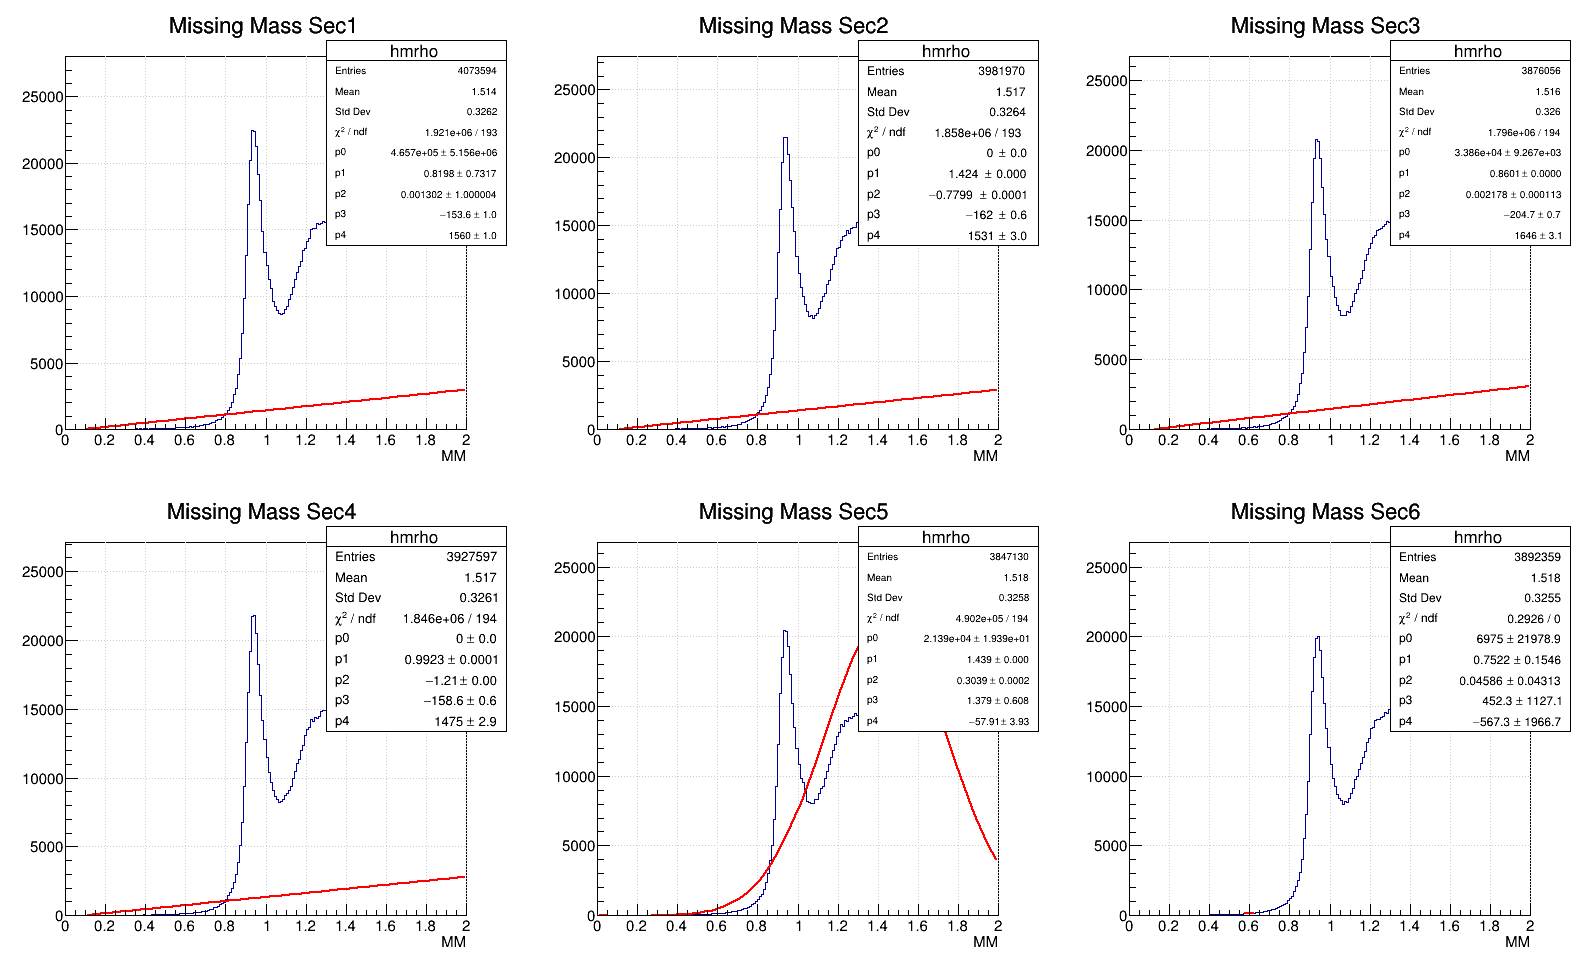

In [3]:

c1 = ROOT.TCanvas("c1","c1", 1600,1000)
c1.Divide(3,2,.01,0.01)
c1.Draw()

for i in range(0,6):
    c1.cd(i+1)
    MM[i].Draw()
#c1.cd(1)
#MMsec1.Draw()

# Kinematic Plots

In [4]:
fdf = rdf.Filter("MM > 0.85 && MM < 1.1")

hpimpth = fdf.Histo2D(("hpimpth","#pi- Momentum Vs #theta;p;polar angle", 100,0,10,100,0,70), "ppim","thpim")
hpimpfi = fdf.Histo2D(("hpimpth","#pi- Momentum Vs #phi;p;#phi angle", 100,0,10,100,-40,70), "ppim","fipim")
hpimthfi = fdf.Histo2D(("hpimthfi","#pi- #phi Vs #theta;#phi;polar angle", 100,-35,35,100,0,60), "fipim","thpim")

#hppim=rdf.Histo1D(("hq2", "#pi- momentum (Q^{2} Bin 1);momentum [GeV]",400,-10,10), "ppim")
htpim=(rdf.Histo1D(("hq2", "#pi- #theta (Q^{2} Bin 1);#theta [#circ]",400,0,50), "thpim"))

Error in <THashList::Delete>: A list is accessing an object (0x56493749f130) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x564937f57080) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x56493792b8b0) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x5649378e6be0) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x5649378f2170) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x564937924d90) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x5649378ea080) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x5649375be140) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x5

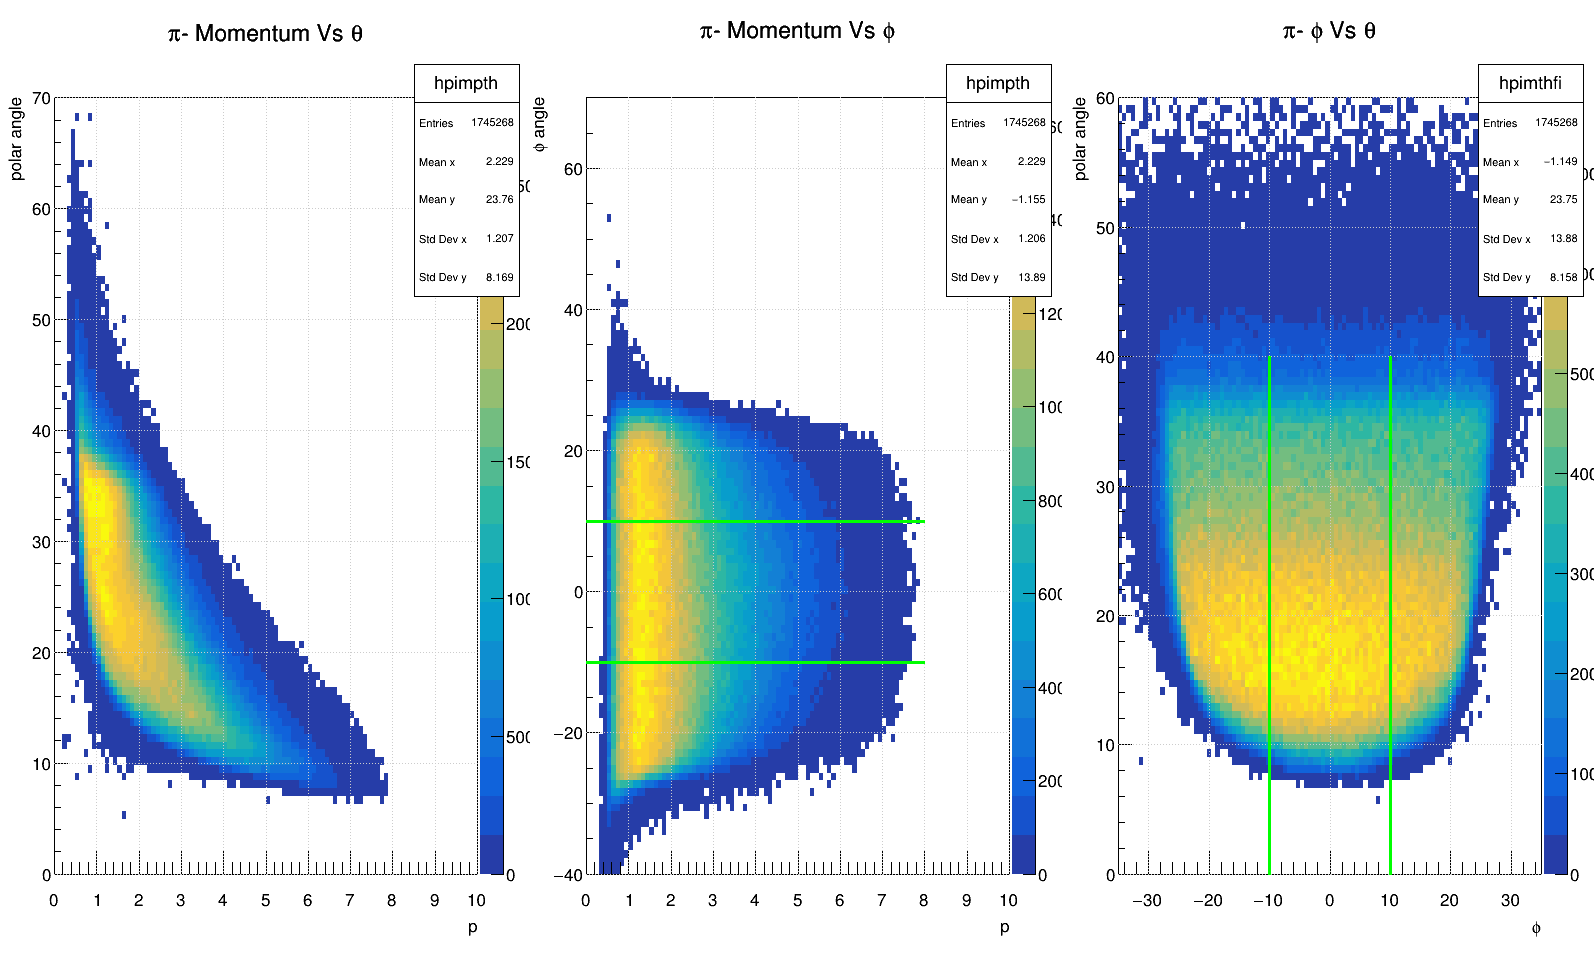

In [5]:
lineH_pos =  ROOT.TLine(0,10,8,10)
lineH_neg =  ROOT.TLine(0,-10,8,-10)

lineV_pos =  ROOT.TLine(10,0,10,40)
lineV_neg =  ROOT.TLine(-10,0,-10,40)




c1 = ROOT.TCanvas("c1","c1", 1600,1000)
c1.Divide(3,1,.001,0.001)
c1.Draw()
c1.cd(1)
#htpim.Draw()
hpimpth.Draw("colz")
c1.cd(2)
hpimpfi.Draw("colz")
lineH_pos.SetLineColor(3)
lineH_neg.SetLineColor(3)
lineH_pos.SetLineWidth(3)
lineH_neg.SetLineWidth(3)
lineH_pos.Draw()
lineH_neg.Draw()
c1.cd(3)
hpimthfi.Draw("colz")
lineV_pos.SetLineColor(3)
lineV_neg.SetLineColor(3)
lineV_pos.SetLineWidth(3)
lineV_neg.SetLineWidth(3)
lineV_pos.Draw()
lineV_neg.Draw()

# $\Delta$P

In [1]:
%reset -f 
import ROOT, numpy 

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

#rdf = ROOT.RDataFrame("h22","/volatile/clas12/kenjo/ntuple_epippimp/inb/skim8_005*")
#fname = "/lustre19/expphy/volatile/clas12/trotta/wagon/RhoWagon/PyAnalysis/data/inb/epPipPim.inb.qa.nSidis_005*"


fname = "/work/clas12/trottan/rhoAnalysis/Pass2/FD/inData/*.root"
rdf = ROOT.RDataFrame("h22",fname)



rdf = rdf.Define("vals","""
auto ele = ROOT::Math::PxPyPzMVector(ex,ey,ez,0);
auto pip = ROOT::Math::PxPyPzMVector(pipx,pipy,pipz,0.1395);
auto pim = ROOT::Math::PxPyPzMVector(pimx,pimy,pimz,0.1395);
auto beam = ROOT::Math::PxPyPzMVector(0,0,10.6041,0);
auto targ = ROOT::Math::PxPyPzMVector(0,0,0,0.938);

auto eloss_pip = [&](double pion_p, double pip_theta, double pion_det, bool outbending){
    // momentum loss correction for low momentum pions:
    // input: p = pion momentum in GeV, pip_theta = pion theta in degree, 
    //        pion_det = pion detector (2 = FD, 3 = CD),  outbending = torus polarity
    // output: dp_pion = generated momentum - reconstructed momentum = momentum loss (+) / gain (-)

    double dp_pion = 0.0;

    if(outbending == false){ // INBENDING
        if(pion_det == 2){   // Forward Detector
            if(pip_theta < 27){                                       dp_pion =  0.00342646 + (-0.00282934) *pion_p + (0.00205983)   *pow(pion_p,2) + (-0.00043158)  *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta < 27 && pion_p >= 2.5){                      dp_pion =  0.00342646 + (-0.00282934) *2.5    + (0.00205983)   *pow(2.5,2)    + (-0.00043158)  *pow(2.5,3)    + (0) *pow(2.5,4);}
            if(pip_theta > 27 && pip_theta < 28){                     dp_pion =  0.00328565 + (-0.00376042) *pion_p + (0.00433886)   *pow(pion_p,2) + (-0.00141614)  *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 27 && pip_theta < 28 && pion_p >= 1.83){   dp_pion =  0.00328565 + (-0.00376042) *1.83   + (0.00433886)   *pow(1.83,2)   + (-0.00141614)  *pow(1.83,3)   + (0) *pow(1.83,4);}
            if(pip_theta > 28 && pip_theta < 29){                     dp_pion =  0.00328579 + (-0.00281121) *pion_p + (0.00342749)   *pow(pion_p,2) + (-0.000932614) *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 28 && pip_theta < 29 && pion_p >= 2){      dp_pion =  0.00328579 + (-0.00281121) *2      + (0.00342749)   *pow(2,2)      + (-0.000932614) *pow(2,3)      + (0) *pow(2,4);}
            if(pip_theta > 29 && pip_theta < 30){                     dp_pion =  0.00167358 + (0.00441871)  *pion_p + (-0.000834667) *pow(pion_p,2) + (-0.000137968) *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 29 && pip_theta < 30 && pion_p >= 1.9){    dp_pion =  0.00167358 + (0.00441871)  *1.9    + (-0.000834667) *pow(1.9,2)    + (-0.000137968) *pow(1.9,3)    + (0) *pow(1.9,4);}
            if(pip_theta > 30 && pip_theta < 31){                     dp_pion =  0.00274159 + (0.00635686)  *pion_p + (-0.00380977)  *pow(pion_p,2) + (0.00071627)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 30 && pip_theta < 31 && pion_p >= 1.9){    dp_pion =  0.00274159 + (0.00635686)  *1.9    + (-0.00380977)  *pow(1.9,2)    + (0.00071627)   *pow(1.9,3)    + (0) *pow(1.9,4);}
            if(pip_theta > 31 && pip_theta < 32){                     dp_pion =  0.00450241 + (0.00248969)  *pion_p + (-0.00336795)  *pow(pion_p,2) + (0.00111193)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 31 && pip_theta < 32 && pion_p >= 1.8){    dp_pion =  0.00450241 + (0.00248969)  *1.8    + (-0.00336795)  *pow(1.8,2)    + (0.00111193)   *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 32 && pip_theta < 33){                     dp_pion =  0.00505593 + (-0.00246203) *pion_p + (0.00172984)   *pow(pion_p,2) + (-0.000406701) *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 32 && pip_theta < 33 && pion_p >= 1.8){    dp_pion =  0.00505593 + (-0.00246203) *1.8    + (0.00172984)   *pow(1.8,2)    + (-0.000406701) *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 33 && pip_theta < 34){                     dp_pion =  0.00273402 + (0.00440449)  *pion_p + (-0.00373488)  *pow(pion_p,2) + (0.000996612)  *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 33 && pip_theta < 34 && pion_p >= 1.8){    dp_pion =  0.00273402 + (0.00440449)  *1.8    + (-0.00373488)  *pow(1.8,2)    + (0.000996612)  *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 34 && pip_theta < 35){                     dp_pion =  0.00333542 + (0.00439874)  *pion_p + (-0.00397776)  *pow(pion_p,2) + (0.00105586)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 34 && pip_theta < 35 && pion_p >= 1.8){    dp_pion =  0.00333542 + (0.00439874)  *1.8    + (-0.00397776)  *pow(1.8,2)    + (0.00105586)   *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 35 && pip_theta < 36){                     dp_pion =  0.00354663 + (0.00565397)  *pion_p + (-0.00513503)  *pow(pion_p,2) + (0.00153346)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 35 && pip_theta < 36 && pion_p >= 1.8){    dp_pion =  0.00354663 + (0.00565397)  *1.8    + (-0.00513503)  *pow(1.8,2)    + (0.00153346)   *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 36 && pip_theta < 37){                     dp_pion =  0.00333909 + (0.00842367)  *pion_p + (-0.0077321)   *pow(pion_p,2) + (0.0022489)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 36 && pip_theta < 37 && pion_p >= 1.8){    dp_pion =  0.00333909 + (0.00842367)  *1.8    + (-0.0077321)   *pow(1.8,2)    + (0.0022489)    *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 37 && pip_theta < 38){                     dp_pion =  0.00358828 + (0.0112108)   *pion_p + (-0.0133854)   *pow(pion_p,2) + (0.00486924)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 37 && pip_theta < 38 && pion_p >= 1.4){    dp_pion =  0.00358828 + (0.0112108)   *1.4    + (-0.0133854)   *pow(1.4,2)    + (0.00486924)   *pow(1.4,3)    + (0) *pow(1.4,4);}
            if(pip_theta > 38 && pip_theta < 39){                     dp_pion =  0.00354343 + (0.0117121)   *pion_p + (-0.0129649)   *pow(pion_p,2) + (0.00455602)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 38 && pip_theta < 39 && pion_p >= 1.3){    dp_pion =  0.00354343 + (0.0117121)   *1.3    + (-0.0129649)   *pow(1.3,2)    + (0.00455602)   *pow(1.3,3)    + (0) *pow(1.3,4);}
            if(pip_theta > 39 && pip_theta < 40){                     dp_pion = -0.00194951 + (0.0409713)   *pion_p + (-0.0595861)   *pow(pion_p,2) + (0.0281588)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 39 && pip_theta < 40 && pion_p >= 0.9){    dp_pion = -0.00194951 + (0.0409713)   *0.9    + (-0.0595861)   *pow(0.9,2)    + (0.0281588)    *pow(0.9,3)    + (0) *pow(0.9,4);}
            if(pip_theta > 40 && pip_theta < 41){                     dp_pion = -0.0099217  + (0.0808096)   *pion_p + (-0.119836)    *pow(pion_p,2) + (0.0559553)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 40 && pip_theta < 41 && pion_p >= 0.75){   dp_pion = -0.0099217  + (0.0808096)   *0.75   + (-0.119836)    *pow(0.75,2)   + (0.0559553)    *pow(0.75,3)   + (0) *pow(0.75,4);}
            if(pip_theta > 41 && pip_theta < 42){                     dp_pion =  0.00854898 + (0.00025037)  *pion_p + (-0.0113992)   *pow(pion_p,2) + (0.0145178)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 41 && pip_theta < 42 && pion_p >= 0.65){   dp_pion =  0.00854898 + (0.00025037)  *0.65   + (-0.0113992)   *pow(0.65,2)   + (0.0145178)    *pow(0.65,3)   + (0) *pow(0.65,4);}
            if(pip_theta > 42){                                       dp_pion =  0.00564818 + (0.00706606)  *pion_p + (0.0042602)    *pow(pion_p,2) + (-0.01141)     *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 42 && pion_p >= 0.65){                     dp_pion =  0.00564818 + (0.00706606)  *0.65   + (0.0042602)    *pow(0.65,2)   + (-0.01141)     *pow(0.65,3)   + (0) *pow(0.65,4);}
        }
        if(pion_det == 3){  // Central Detector
            if(pip_theta < 39){                                       dp_pion = -0.045      + (-0.102652) + (0.455589) *pion_p + (-0.671635)   *pow(pion_p,2) + (0.303814)   *pow(pion_p,3);}
            if(pip_theta < 39  && pion_p >= 0.7){                     dp_pion = -0.045      + (-0.102652) + (0.455589) *0.7    + (-0.671635)   *pow(0.7,2)    + (0.303814)   *pow(0.7,3);}
            if(pip_theta > 39  && pip_theta < 40){                    dp_pion =  0.0684552  + (-0.766492)              *pion_p + (1.73092)     *pow(pion_p,2) + (-1.46215)   *pow(pion_p,3) + (0.420127) *pow(pion_p,4);}
            if(pip_theta > 39  && pip_theta < 40 && pion_p >= 1.4){   dp_pion =  0.0684552  + (-0.766492)              *1.4    + (1.73092)     *pow(1.4,2)    + (-1.46215)   *pow(1.4,3)    + (0.420127) *pow(1.4,4);}
            if(pip_theta > 40  && pip_theta < 41){                    dp_pion =  0.751549   + (-7.4593)                *pion_p + (26.8037)     *pow(pion_p,2) + (-47.1576)   *pow(pion_p,3) + (43.8527)  *pow(pion_p,4) + (-20.7039) *pow(pion_p,5) + (3.90931)  *pow(pion_p,6);}
            if(pip_theta > 40  && pip_theta < 41 && pion_p >= 1.45){  dp_pion =  0.751549   + (-7.4593)                *1.45   + (26.8037)     *pow(1.45,2)   + (-47.1576)   *pow(1.45,3)   + (43.8527)  *pow(1.45,4)   + (-20.7039) *pow(1.45,5)   + (3.90931)  *pow(1.45,6);}
            if(pip_theta > 41  && pip_theta < 42){                    dp_pion = -1.35043    + (10.0788)                *pion_p + (-30.4829)    *pow(pion_p,2) + (47.7792)    *pow(pion_p,3) + (-40.996)  *pow(pion_p,4) + (18.2662)  *pow(pion_p,5) + (-3.30449) *pow(pion_p,6);}
            if(pip_theta > 41  && pip_theta < 42 && pion_p >= 1.2){   dp_pion = -1.35043    + (10.0788)                *1.2    + (-30.4829)    *pow(1.2,2)    + (47.7792)    *pow(1.2,3)    + (-40.996)  *pow(1.2,4)    + (18.2662)  *pow(1.2,5)    + (-3.30449) *pow(1.2,6);}
            if(pip_theta > 42  && pip_theta < 43){                    dp_pion = -0.0231195  + (0.0744589)              *pion_p + (-0.0807029)  *pow(pion_p,2) + (0.0264266)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 42  && pip_theta < 43 && pion_p >= 1.3){   dp_pion = -0.0231195  + (0.0744589)              *1.3    + (-0.0807029)  *pow(1.3,2)    + (0.0264266)  *pow(1.3,3)    + (0)        *pow(1.3,4);}
            if(pip_theta > 43  && pip_theta < 44){                    dp_pion = -0.00979928 + (0.0351043)              *pion_p + (-0.0365865)  *pow(pion_p,2) + (0.00977218) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 43  && pip_theta < 44 && pion_p >= 1.1){   dp_pion = -0.00979928 + (0.0351043)              *1.1    + (-0.0365865)  *pow(1.1,2)    + (0.00977218) *pow(1.1,3)    + (0)        *pow(1.1,4);}
            if(pip_theta > 44  && pip_theta < 45){                    dp_pion =  0.00108491 + (-0.00924885)            *pion_p + (0.0216431)   *pow(pion_p,2) + (-0.0137762) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 44  && pip_theta < 45 && pion_p >= 1.1){   dp_pion =  0.00108491 + (-0.00924885)            *1.1    + (0.0216431)   *pow(1.1,2)    + (-0.0137762) *pow(1.1,3)    + (0)        *pow(1.1,4);}
            if(pip_theta > 45  && pip_theta < 55){                    dp_pion =  0.0092263  + (-0.0676178)             *pion_p + (0.168778)    *pow(pion_p,2) + (-0.167463)  *pow(pion_p,3) + (0.05661)  *pow(pion_p,4);}
            if(pip_theta > 45  && pip_theta < 55 && pion_p >= 1.3){   dp_pion =  0.0092263  + (-0.0676178)             *1.3    + (0.168778)    *pow(1.3,2)    + (-0.167463)  *pow(1.3,3)    + (0.05661)  *pow(1.3,4);}
            if(pip_theta > 55  && pip_theta < 65){                    dp_pion =  0.00805642 + (-0.0670962)             *pion_p + (0.188536)    *pow(pion_p,2) + (-0.20571)   *pow(pion_p,3) + (0.0765)   *pow(pion_p,4);}
            if(pip_theta > 55  && pip_theta < 65 && pion_p >= 1.05){  dp_pion =  0.00805642 + (-0.0670962)             *1.05   + (0.188536)    *pow(1.05,2)   + (-0.20571)   *pow(1.05,3)   + (0.0765)   *pow(1.05,4);}
            if(pip_theta > 65  && pip_theta < 75){                    dp_pion =  0.00312202 + (-0.0269717)             *pion_p + (0.0715236)   *pow(pion_p,2) + (-0.0545622) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 65  && pip_theta < 75 && pion_p >= 0.75){  dp_pion =  0.00312202 + (-0.0269717)             *0.75   + (0.0715236)   *pow(0.75,2)   + (-0.0545622) *pow(0.75,3)   + (0)        *pow(0.75,4);}
            if(pip_theta > 75  && pip_theta < 85){                    dp_pion =  0.00424971 + (-0.0367683)             *pion_p + (0.10417)     *pow(pion_p,2) + (-0.0899651) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 75  && pip_theta < 85 && pion_p >= 0.65){  dp_pion =  0.00424971 + (-0.0367683)             *0.65   + (0.10417)     *pow(0.65,2)   + (-0.0899651) *pow(0.65,3)   + (0)        *pow(0.65,4);}
            if(pip_theta > 85  && pip_theta < 95){                    dp_pion =  0.00654123 + (-0.0517915)             *pion_p + (0.147888)    *pow(pion_p,2) + (-0.14253)   *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 85  && pip_theta < 95 && pion_p >= 0.5){   dp_pion =  0.00654123 + (-0.0517915)             *0.5    + (0.147888)    *pow(0.5,2)    + (-0.14253)   *pow(0.5,3)    + (0)        *pow(0.5,4);}
            if(pip_theta > 95  && pip_theta < 105){                   dp_pion = -0.00111721 + (0.00478119)             *pion_p + (0.0158753)   *pow(pion_p,2) + (-0.052902)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 95  && pip_theta < 105 && pion_p >= 0.45){ dp_pion = -0.00111721 + (0.00478119)             *0.45   + (0.0158753)   *pow(0.45,2)   + (-0.052902)  *pow(0.45,3)   + (0)        *pow(0.45,4);}
            if(pip_theta > 105 && pip_theta < 115){                   dp_pion = -0.00239839 + (0.00790738)             *pion_p + (0.0311713)   *pow(pion_p,2) + (-0.104157)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 105 && pip_theta < 115 && pion_p >= 0.35){ dp_pion = -0.00239839 + (0.00790738)             *0.35   + (0.0311713)   *pow(0.35,2)   + (-0.104157)  *pow(0.35,3)   + (0)        *pow(0.35,4);}
            if(pip_theta > 115 && pip_theta < 125){                   dp_pion = -0.00778793 + (0.0256774)              *pion_p + (0.0932503)   *pow(pion_p,2) + (-0.32771)   *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 115 && pip_theta < 125 && pion_p >= 0.35){ dp_pion = -0.00778793 + (0.0256774)              *0.35   + (0.0932503)   *pow(0.35,2)   + (-0.32771)   *pow(0.35,3)   + (0)        *pow(0.35,4);}
            if(pip_theta > 125 && pip_theta < 135){                   dp_pion = -0.00292778 + (-0.00536697)            *pion_p + (-0.00414351) *pow(pion_p,2) + (0.0196431)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 125 && pip_theta < 135 && pion_p >= 0.35){ dp_pion = -0.00292778 + (-0.00536697)            *0.35   + (-0.00414351) *pow(0.35,2)   + (0.0196431)  *pow(0.35,3)   + (0)        *pow(0.35,4);}
        }
    }
    if(outbending == true){ // OUTBENDING
        if(pion_det == 2){  // Forward Detector
            if(pip_theta < 27){                                       dp_pion = 0.00389945  + (-0.004062)    *pion_p + (0.00321842)  *pow(pion_p,2) + (-0.000698299) *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta < 27 && pion_p >= 2.3){                      dp_pion = 0.00389945  + (-0.004062)    *2.3    + (0.00321842)  *pow(2.3,2)    + (-0.000698299) *pow(2.3,3)    + (0)          *pow(2.3,4);}
            if(pip_theta > 27 && pip_theta < 28){                     dp_pion = 0.00727132  + (-0.0117989)   *pion_p + (0.00962999)  *pow(pion_p,2) + (-0.00267005)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 27 && pip_theta < 28 && pion_p >= 1.7){    dp_pion = 0.00727132  + (-0.0117989)   *1.7    + (0.00962999)  *pow(1.7,2)    + (-0.00267005)  *pow(1.7,3)    + (0)          *pow(1.7,4);}
            if(pip_theta > 28 && pip_theta < 29){                     dp_pion = 0.00844551  + (-0.0128097)   *pion_p + (0.00945956)  *pow(pion_p,2) + (-0.00237992)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 28 && pip_theta < 29 && pion_p >= 2){      dp_pion = 0.00844551  + (-0.0128097)   *2      + (0.00945956)  *pow(2,2)      + (-0.00237992)  *pow(2,3)      + (0)          *pow(2,4);}
            if(pip_theta > 29 && pip_theta < 30){                     dp_pion = 0.00959007  + (-0.0139218)   *pion_p + (0.0122966)   *pow(pion_p,2) + (-0.0034012)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 29 && pip_theta < 30 && pion_p >= 1.9){    dp_pion = 0.00959007  + (-0.0139218)   *1.9    + (0.0122966)   *pow(1.9,2)    + (-0.0034012)   *pow(1.9,3)    + (0)          *pow(1.9,4);}
            if(pip_theta > 30 && pip_theta < 31){                     dp_pion = 0.00542816  + (-5.10739e-05) *pion_p + (0.000572038) *pow(pion_p,2) + (-0.000488883) *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 30 && pip_theta < 31 && pion_p >= 1.9){    dp_pion = 0.00542816  + (-5.10739e-05) *1.9    + (0.000572038) *pow(1.9,2)    + (-0.000488883) *pow(1.9,3)    + (0)          *pow(1.9,4);}
            if(pip_theta > 31 && pip_theta < 32){                     dp_pion = 0.0060391   + (-0.000516936) *pion_p + (-0.00286595) *pow(pion_p,2) + (0.00136604)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 31 && pip_theta < 32 && pion_p >= 1.8){    dp_pion = 0.0060391   + (-0.000516936) *1.8    + (-0.00286595) *pow(1.8,2)    + (0.00136604)   *pow(1.8,3)    + (0)          *pow(1.8,4);}
            if(pip_theta > 32 && pip_theta < 33){                     dp_pion = 0.0140305   + (-0.0285832)   *pion_p + (0.0248799)   *pow(pion_p,2) + (-0.00701311)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 32 && pip_theta < 33 && pion_p >= 1.6){    dp_pion = 0.0140305   + (-0.0285832)   *1.6    + (0.0248799)   *pow(1.6,2)    + (-0.00701311)  *pow(1.6,3)    + (0)          *pow(1.6,4);}
            if(pip_theta > 33 && pip_theta < 34){                     dp_pion = 0.010815    + (-0.0194244)   *pion_p + (0.0174474)   *pow(pion_p,2) + (-0.0049764)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 33 && pip_theta < 34 && pion_p >= 1.5){    dp_pion = 0.010815    + (-0.0194244)   *1.5    + (0.0174474)   *pow(1.5,2)    + (-0.0049764)   *pow(1.5,3)    + (0)          *pow(1.5,4);}
            if(pip_theta > 34 && pip_theta < 35){                     dp_pion = 0.0105522   + (-0.0176248)   *pion_p + (0.0161142)   *pow(pion_p,2) + (-0.00472288)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 34 && pip_theta < 35 && pion_p >= 1.6){    dp_pion = 0.0105522   + (-0.0176248)   *1.6    + (0.0161142)   *pow(1.6,2)    + (-0.00472288)  *pow(1.6,3)    + (0)          *pow(1.6,4);}
            if(pip_theta > 35 && pip_theta < 36){                     dp_pion = 0.0103938   + (-0.0164003)   *pion_p + (0.0164045)   *pow(pion_p,2) + (-0.00517012)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 35 && pip_theta < 36 && pion_p >= 1.5){    dp_pion = 0.0103938   + (-0.0164003)   *1.5    + (0.0164045)   *pow(1.5,2)    + (-0.00517012)  *pow(1.5,3)    + (0)          *pow(1.5,4);}
            if(pip_theta > 36 && pip_theta < 37){                     dp_pion = 0.0441471   + (-0.183937)    *pion_p + (0.338784)    *pow(pion_p,2) + (-0.298985)    *pow(pion_p,3) + (0.126905)   *pow(pion_p,4) + (-0.0208286) *pow(pion_p,5);}
            if(pip_theta > 36 && pip_theta < 37 && pion_p >= 1.8){    dp_pion = 0.0441471   + (-0.183937)    *1.8    + (0.338784)    *pow(1.8,2)    + (-0.298985)    *pow(1.8,3)    + (0.126905)   *pow(1.8,4)    + (-0.0208286) *pow(1.8,5);}
            if(pip_theta > 37 && pip_theta < 38){                     dp_pion = 0.0726119   + (-0.345004)    *pion_p + (0.697789)    *pow(pion_p,2) + (-0.685948)    *pow(pion_p,3) + (0.327195)   *pow(pion_p,4) + (-0.0605621) *pow(pion_p,5);}
            if(pip_theta > 37 && pip_theta < 38 && pion_p >= 1.7){    dp_pion = 0.0726119   + (-0.345004)    *1.7    + (0.697789)    *pow(1.7,2)    + (-0.685948)    *pow(1.7,3)    + (0.327195)   *pow(1.7,4)    + (-0.0605621) *pow(1.7,5);}
            if(pip_theta > 38 && pip_theta < 39){                     dp_pion = 0.0247648   + (-0.0797376)   *pion_p + (0.126535)    *pow(pion_p,2) + (-0.086545)    *pow(pion_p,3) + (0.0219304)  *pow(pion_p,4);}
            if(pip_theta > 38 && pip_theta < 39 && pion_p >= 1.6){    dp_pion = 0.0247648   + (-0.0797376)   *1.6    + (0.126535)    *pow(1.6,2)    + (-0.086545)    *pow(1.6,3)    + (0.0219304)  *pow(1.6,4);}
            if(pip_theta > 39 && pip_theta < 40){                     dp_pion = 0.0208867   + (-0.0492068)   *pion_p + (0.0543187)   *pow(pion_p,2) + (-0.0183393)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 39 && pip_theta < 40 && pion_p >= 1.2){    dp_pion = 0.0208867   + (-0.0492068)   *1.2    + (0.0543187)   *pow(1.2,2)    + (-0.0183393)   *pow(1.2,3)    + (0)          *pow(1.2,4);}
            if(pip_theta > 40 && pip_theta < 41){                     dp_pion = 0.0148655   + (-0.0203483)   *pion_p + (0.00835867)  *pow(pion_p,2) + (0.00697134)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 40 && pip_theta < 41 && pion_p >= 1.0){    dp_pion = 0.0148655   + (-0.0203483)   *1.0    + (0.00835867)  *pow(1.0,2)    + (0.00697134)   *pow(1.0,3)    + (0)          *pow(1.0,4);}
            if(pip_theta > 41 && pip_theta < 42){                     dp_pion = 0.0223585   + (-0.0365262)   *pion_p + (-0.0150027)  *pow(pion_p,2) + (0.0854164)    *pow(pion_p,3) + (-0.0462718) *pow(pion_p,4);}
            if(pip_theta > 41 && pip_theta < 42 && pion_p >= 0.7){    dp_pion = 0.007617;}
            if(pip_theta > 42){                                       dp_pion = 0.0152373   + (-0.0106377)   *pion_p + (-0.0257573)  *pow(pion_p,2) + (0.0344851)    *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 42 && pion_p >= 0.75){                     dp_pion = 0.0152373   + (-0.0106377)   *0.75   + (-0.0257573)  *pow(0.75,2)   + (0.0344851)    *pow(0.75,3)   + (0)          *pow(0.75,4);}
        }
        if(pion_det == 3){ // Central Detector
            if(pip_theta < 39){                                       dp_pion = -0.05        + (-0.0758897) + (0.362231) *pion_p + (-0.542404)   *pow(pion_p,2) + (0.241344)   *pow(pion_p,3);}
            if(pip_theta < 39  && pion_p >= 0.8){                     dp_pion = -0.05        + (-0.0758897) + (0.362231) *0.8    + (-0.542404)   *pow(0.8,2)    + (0.241344)   *pow(0.8,3);}
            if(pip_theta > 39  && pip_theta < 40){                    dp_pion =  0.0355259   + (-0.589712)               *pion_p + (1.4206)      *pow(pion_p,2) + (-1.24179)   *pow(pion_p,3) + (0.365524)  *pow(pion_p,4);}
            if(pip_theta > 39  && pip_theta < 40  && pion_p >= 1.35){ dp_pion =  0.0355259   + (-0.589712)               *1.35   + (1.4206)      *pow(1.35,2)   + (-1.24179)   *pow(1.35,3)   + (0.365524)  *pow(1.35,4);}
            if(pip_theta > 40  && pip_theta < 41){                    dp_pion = -0.252336    + (1.02032)                 *pion_p + (-1.51461)    *pow(pion_p,2) + (0.967772)   *pow(pion_p,3) + (-0.226028) *pow(pion_p,4);}
            if(pip_theta > 40  && pip_theta < 41  && pion_p >= 1.4){  dp_pion = -0.252336    + (1.02032)                 *1.4    + (-1.51461)    *pow(1.4,2)    + (0.967772)   *pow(1.4,3)    + (-0.226028) *pow(1.4,4);}
            if(pip_theta > 41  && pip_theta < 42){                    dp_pion = -0.710129    + (4.49613)                 *pion_p + (-11.01)      *pow(pion_p,2) + (12.9945)    *pow(pion_p,3) + (-7.41641)  *pow(pion_p,4) + (1.63923)   *pow(pion_p,5);}
            if(pip_theta > 41  && pip_theta < 42  && pion_p >= 1.2){  dp_pion = -0.710129    + (4.49613)                 *1.2    + (-11.01)      *pow(1.2,2)    + (12.9945)    *pow(1.2,3)    + (-7.41641)  *pow(1.2,4)    + (1.63923)   *pow(1.2,5);}
            if(pip_theta > 42  && pip_theta < 43){                    dp_pion = -0.0254912   + (0.0851432)               *pion_p + (-0.0968583)  *pow(pion_p,2) + (0.0350334)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 42  && pip_theta < 43  && pion_p >= 1.2){  dp_pion = -0.0254912   + (0.0851432)               *1.2    + (-0.0968583)  *pow(1.2,2)    + (0.0350334)  *pow(1.2,3)    + (0)         *pow(1.2,4);}
            if(pip_theta > 43  && pip_theta < 44){                    dp_pion = -0.0115965   + (0.0438726)               *pion_p + (-0.0500474)  *pow(pion_p,2) + (0.0163627)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 43  && pip_theta < 44  && pion_p >= 1.4){  dp_pion = -0.0115965   + (0.0438726)               *1.4    + (-0.0500474)  *pow(1.4,2)    + (0.0163627)  *pow(1.4,3)    + (0)         *pow(1.4,4);}
            if(pip_theta > 44  && pip_theta < 45){                    dp_pion =  0.00273414  + (-0.01851)                *pion_p + (0.0377032)   *pow(pion_p,2) + (-0.0226696) *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 44  && pip_theta < 45  && pion_p >= 1){    dp_pion =  0.00273414  + (-0.01851)                *1      + (0.0377032)   *pow(1,2)      + (-0.0226696) *pow(1,3)      + (0)         *pow(1,4);}
            if(pip_theta > 45  && pip_theta < 55){                    dp_pion =  0.0271952   + (-0.25981)                *pion_p + (0.960051)    *pow(pion_p,2) + (-1.76651)   *pow(pion_p,3) + (1.72872)   *pow(pion_p,4) + (-0.856946) *pow(pion_p,5) + (0.167564) *pow(pion_p,6);}
            if(pip_theta > 45  && pip_theta < 55  && pion_p >= 1.4){  dp_pion =  0.0271952   + (-0.25981)                *1.4    + (0.960051)    *pow(1.4,2)    + (-1.76651)   *pow(1.4,3)    + (1.72872)   *pow(1.4,4)    + (-0.856946) *pow(1.4,5)    + (0.167564) *pow(1.4,6);}
            if(pip_theta > 55  && pip_theta < 65){                    dp_pion =  0.00734975  + (-0.0598841)              *pion_p + (0.161495)    *pow(pion_p,2) + (-0.1629)    *pow(pion_p,3) + (0.0530098) *pow(pion_p,4);}
            if(pip_theta > 55  && pip_theta < 65  && pion_p >= 1.2){  dp_pion =  0.00734975  + (-0.0598841)              *1.2    + (0.161495)    *pow(1.2,2)    + (-0.1629)    *pow(1.2,3)    + (0.0530098) *pow(1.2,4);}
            if(pip_theta > 65  && pip_theta < 75){                    dp_pion =  0.00321351  + (-0.0289322)              *pion_p + (0.0786484)   *pow(pion_p,2) + (-0.0607041) *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 65  && pip_theta < 75  && pion_p >= 0.95){ dp_pion =  0.00321351  + (-0.0289322)              *0.95   + (0.0786484)   *pow(0.95,2)   + (-0.0607041) *pow(0.95,3)   + (0)         *pow(0.95,4);}
            if(pip_theta > 75  && pip_theta < 85){                    dp_pion =  0.00644253  + (-0.0543896)              *pion_p + (0.148933)    *pow(pion_p,2) + (-0.1256)    *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 75  && pip_theta < 85  && pion_p >= 0.7){  dp_pion =  0.00644253  + (-0.0543896)              *0.7    + (0.148933)    *pow(0.7,2)    + (-0.1256)    *pow(0.7,3)    + (0)         *pow(0.7,4);}
            if(pip_theta > 85  && pip_theta < 95){                    dp_pion =  0.00671152  + (-0.0537269)              *pion_p + (0.154509)    *pow(pion_p,2) + (-0.147667)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 85  && pip_theta < 95  && pion_p >= 0.65){ dp_pion =  0.00671152  + (-0.0537269)              *0.65   + (0.154509)    *pow(0.65,2)   + (-0.147667)  *pow(0.65,3)   + (0)         *pow(0.65,4);}
            if(pip_theta > 95  && pip_theta < 105){                   dp_pion = -0.000709077 + (0.00331818)              *pion_p + (0.0109241)   *pow(pion_p,2) + (-0.0351682) *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 95  && pip_theta < 105 && pion_p >= 0.45){ dp_pion = -0.000709077 + (0.00331818)              *0.45   + (0.0109241)   *pow(0.45,2)   + (-0.0351682) *pow(0.45,3)   + (0)         *pow(0.45,4);}
            if(pip_theta > 105 && pip_theta < 115){                   dp_pion = -0.00260164  + (0.00846919)              *pion_p + (0.0315497)   *pow(pion_p,2) + (-0.105756)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 105 && pip_theta < 115 && pion_p >= 0.45){ dp_pion = -0.00260164  + (0.00846919)              *0.45   + (0.0315497)   *pow(0.45,2)   + (-0.105756)  *pow(0.45,3)   + (0)         *pow(0.45,4);}
            if(pip_theta > 115 && pip_theta < 125){                   dp_pion = -0.00544336  + (0.018256)                *pion_p + (0.0664618)   *pow(pion_p,2) + (-0.240312)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 115 && pip_theta < 125 && pion_p >= 0.45){ dp_pion = -0.00544336  + (0.018256)                *0.45   + (0.0664618)   *pow(0.45,2)   + (-0.240312)  *pow(0.45,3)   + (0)         *pow(0.45,4);}
            if(pip_theta > 125 && pip_theta < 135){                   dp_pion = -0.00281073  + (-0.00495863)             *pion_p + (-0.00362356) *pow(pion_p,2) + (0.0178764)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 125 && pip_theta < 135 && pion_p >= 0.35){ dp_pion = -0.00281073  + (-0.00495863)             *0.35   + (-0.00362356) *pow(0.35,2)   + (0.0178764)  *pow(0.35,3)   + (0)         *pow(0.35,4);}
        }
    }

    return dp_pion;
};


auto dppC = [&](float Px, float Py, float Pz, int sec, int ivec, int corEl, int corPip, int corPim, int corPro){
    
    // 'Px'/'Py'/'Pz'   ==> Corresponds to the Cartesian Components of the particle momentum being corrected
    // 'sec'            ==> Corresponds to the Forward Detector Sectors where the given particle is detected (6 total)
    // 'ivec'           ==> Corresponds to the particle being corrected (See below)    
        // (*) ivec = 0 --> Electron Corrections
        // (*) ivec = 1 --> Pi+ Corrections
        // (*) ivec = 2 --> Pi- Corrections
        // (*) ivec = 3 --> Proton Corrections
    // 'corEl'/'corPip'/'corPim'/'corPro' ==> Controls which version of the particle correction is used
        // Includes:
            // (*) Correction On/Off
            // (*) Pass Version
            // (*) Data Set (Fall 2018 or Spring 2019)
    // 'corEl'         ==> Controls the ELECTRON Corrections
        // corEl == 0  --> No Correction (Off)
        // corEl == 1  --> Fall  2018 - Pass 1
        // corEl == 2  --> Sping 2019 - Pass 2
        // corEl == 3  --> Fall  2018 - Pass 2
    // 'corPip'        ==> Controls the π+ PION Corrections
        // corPip == 0 --> No Correction
        // corPip == 1 --> Fall  2018 - Pass 1
        // corPip == 2 --> Sping 2019 - Pass 2
        // corPip == 3 --> Fall  2018 - Pass 2
    // 'corPim'        ==> Controls the π- PION Corrections
        // corPim == 0 --> No Correction
        // corPim == 1 --> Fall  2018 - Pass 1 (Created by Nick Trotta)
    // 'corPro'        ==> Controls the PROTON Corrections (Momentum)
        // corPro == 0 --> No Correction
        // corPro == 1 --> Fall  2018 - Pass 1

    // Momentum Magnitude
    double pp = sqrt(Px*Px + Py*Py + Pz*Pz);

    // Initializing the correction factor
    double dp = 0;

    // Defining Phi Angle
    double Phi = (180/3.1415926)*atan2(Py, Px);

    // Central Detector Corrections Not Included (Yet)

    // (Initial) Shift of the Phi Angle (done to realign sectors whose data is separated when plotted from ±180˚)
    if(((sec == 4 || sec == 3) && Phi < 0) || (sec > 4 && Phi < 90)){
        Phi += 360;
    }

    // Getting Local Phi Angle
    double PhiLocal = Phi - (sec - 1)*60;

    // Applying Shift Functions to Phi Angles (local shifted phi = phi)
    double phi = PhiLocal;

    // For Electron Shift
    if(ivec == 0){
        phi = PhiLocal - 30/pp;
    }

    // For π+ Pion/Proton Shift
    if(ivec == 1 || ivec == 3){
        phi = PhiLocal + (32/(pp-0.05));
    }

    // For π- Pion Shift
    if(ivec == 2){
        phi = PhiLocal - (32/(pp-0.05));
    }


    //===============//===============//     No Corrections     //===============//===============//
    if(corEl == 0 && ivec == 0){ // No Electron Correction
        return dp/pp;
    }
    if(corPip == 0 && ivec == 1){ // No π+ Pion Correction
        return dp/pp;
    }
    if(corPim == 0 && ivec == 2){ // No π- Pion Correction
        return dp/pp;
    }
    if(corPro == 0 && ivec == 3){ // No Proton Correction
        return dp/pp;
    }
    //==============//==============//     No Corrections (End)     //==============//==============//

    //==============================//     Electron Corrections     //==============================//
    if(corEl != 0 && ivec == 0){
        if(corEl == 1){ // Fall 2018 - Pass 1 Corrections
            if(sec == 1){
                dp = ((-4.3303e-06)*phi*phi +  (1.1006e-04)*phi + (-5.7235e-04))*pp*pp +  ((3.2555e-05)*phi*phi +  (-0.0014559)*phi +   (0.0014878))*pp + ((-1.9577e-05)*phi*phi +   (0.0017996)*phi + (0.025963));
            }
            if(sec == 2){
                dp = ((-9.8045e-07)*phi*phi +  (6.7395e-05)*phi + (-4.6757e-05))*pp*pp + ((-1.4958e-05)*phi*phi +  (-0.0011191)*phi +  (-0.0025143))*pp +  ((1.2699e-04)*phi*phi +   (0.0033121)*phi + (0.020819));
            }
            if(sec == 3){
                dp = ((-5.9459e-07)*phi*phi + (-2.8289e-05)*phi + (-4.3541e-04))*pp*pp + ((-1.5025e-05)*phi*phi +  (5.7730e-04)*phi +  (-0.0077582))*pp +  ((7.3348e-05)*phi*phi +   (-0.001102)*phi + (0.057052));
            }
            if(sec == 4){
                dp = ((-2.2714e-06)*phi*phi + (-3.0360e-05)*phi + (-8.9322e-04))*pp*pp +  ((2.9737e-05)*phi*phi +  (5.1142e-04)*phi +   (0.0045641))*pp + ((-1.0582e-04)*phi*phi + (-5.6852e-04)*phi + (0.027506));
            }
            if(sec == 5){
                dp = ((-1.1490e-06)*phi*phi + (-6.2147e-06)*phi + (-4.7235e-04))*pp*pp +  ((3.7039e-06)*phi*phi + (-1.5943e-04)*phi + (-8.5238e-04))*pp +  ((4.4069e-05)*phi*phi +   (0.0014152)*phi + (0.031933));
            }
            if(sec == 6){
                dp =  ((1.1076e-06)*phi*phi +  (4.0156e-05)*phi + (-1.6341e-04))*pp*pp + ((-2.8613e-05)*phi*phi + (-5.1861e-04)*phi +  (-0.0056437))*pp +  ((1.2419e-04)*phi*phi +  (4.9084e-04)*phi + (0.049976));
            }
        }

        if(corEl == 2){ // Spring 2019 - Pass 2 Corrections
            if(sec == 1){
                dp = ((-1.4215599999999998e-06)*phi*phi + (4.91084e-06)*phi + (-0.00012995999999999998))*pp*pp + ((1.6952059999999994e-05)*phi*phi + (-0.00033224299999999997)*phi + (-0.0018080400000000003))*pp + ((-3.1853499999999996e-05)*phi*phi + (0.0016001439999999997)*phi + (0.03187985));
            }
            if(sec == 2){
                dp =             ((-5.4471e-06)*phi*phi + (-4.69579e-05)*phi + (0.000462807))*pp*pp + ((5.0258819999999995e-05)*phi*phi + (0.00023192399999999994)*phi + (-0.01118006))*pp + ((-8.5754e-05)*phi*phi + (0.00017097299999999994)*phi + (0.05324023));
            }
            if(sec == 3){
                dp = ((-3.4392460000000005e-06)*phi*phi + (9.860100000000002e-06)*phi + (-3.8414000000000015e-05))*pp*pp + ((1.7492300000000002e-05)*phi*phi + (-4.111499999999996e-05)*phi + (-0.0052975509999999984))*pp + ((1.0045499999999984e-05)*phi*phi + (-2.1412000000000004e-05)*phi + (0.03514576));
            }
            if(sec == 4){
                dp =  ((2.4865599999999998e-06)*phi*phi + (2.9090599999999996e-05)*phi + (0.00016154500000000003))*pp*pp + ((-2.7148730000000002e-05)*phi*phi + (-0.000136352)*phi + (-0.00543832))*pp + ((4.917660000000001e-05)*phi*phi + (-0.0001558459999999999)*phi + (0.04322285000000001));
            }
            if(sec == 5){
                dp =  ((-5.340280000000001e-06)*phi*phi + (1.355319e-05)*phi + (0.001362661))*pp*pp + ((5.858976999999999e-05)*phi*phi + (-0.00024119909999999995)*phi + (-0.02025752))*pp + ((-0.0001475504)*phi*phi + (0.0005707250000000001)*phi + (0.07970399));
            }
            if(sec == 6){
                dp = ((-3.0325500000000003e-06)*phi*phi + (-4.7810870999999994e-05)*phi + (0.001092504))*pp*pp + ((2.4123071999999996e-05)*phi*phi + (0.00047091400000000007)*phi + (-0.01504266))*pp + ((-9.523899999999999e-06)*phi*phi + (-0.0008819019999999998)*phi + (0.048088700000000005));
            }
        }
        
        if(corEl == 3){ // Fall 2018 - Pass 2 Corrections
            if(sec == 1){
                dp            =                ((-9.82416e-06)*phi*phi +            (-2.29956e-05)*phi +  (0.00029664199999999996))*pp*pp +           ((0.0001113414)*phi*phi +  (-2.041300000000001e-05)*phi +            (-0.00862226))*pp +            ((-0.000281738)*phi*phi +             (0.00058712)*phi +              (0.0652737));
                if(pp < 7){dp = dp +            ((-3.4001e-06)*phi*phi +             (-2.2885e-05)*phi +              (9.9705e-04))*pp*pp +             ((2.1840e-05)*phi*phi +              (2.4238e-04)*phi +             (-0.0091904))*pp +             ((-2.9180e-05)*phi*phi +            (-6.4496e-04)*phi +               (0.022505));}
                else{      dp = dp +            ((-6.3656e-05)*phi*phi +              (1.7266e-04)*phi +              (-0.0017909))*pp*pp +                ((0.00104)*phi*phi +              (-0.0028401)*phi +                (0.02981))*pp +              ((-0.0041995)*phi*phi +               (0.011537)*phi +                (-0.1196));}
                dp            = dp + ((3.2780000000000006e-07)*phi*phi +              (6.7084e-07)*phi +  (-4.390000000000004e-05))*pp*pp + ((-7.230999999999999e-06)*phi*phi +            (-2.37482e-05)*phi +  (0.0004909000000000007))*pp +   ((3.285299999999999e-05)*phi*phi +            (9.63723e-05)*phi +               (-0.00115));
            }
            if(sec == 2){
                dp            =               ((-7.741952e-06)*phi*phi + (-2.2402167000000004e-05)*phi + (-0.00042652900000000004))*pp*pp +            ((7.54079e-05)*phi*phi + (-1.3333999999999984e-05)*phi +  (0.0002420100000000004))*pp +            ((-0.000147876)*phi*phi +             (0.00057905)*phi +              (0.0253551));
                if(pp < 7){dp = dp +             ((5.3611e-06)*phi*phi +              (8.1979e-06)*phi +              (5.9789e-04))*pp*pp +            ((-4.8185e-05)*phi*phi +             (-1.5188e-04)*phi +             (-0.0084675))*pp +              ((9.2324e-05)*phi*phi +             (6.4420e-04)*phi +               (0.026792));}
                else{      dp = dp +            ((-6.1139e-05)*phi*phi +              (5.4087e-06)*phi +              (-0.0021284))*pp*pp +              ((0.0010007)*phi*phi +              (9.3492e-05)*phi +               (0.039813))*pp +              ((-0.0040434)*phi*phi +             (-0.0010953)*phi +               (-0.18112));}
                dp            = dp +           ((6.221217e-07)*phi*phi +  (1.9596000000000003e-06)*phi +              (-9.826e-05))*pp*pp +           ((-1.28576e-05)*phi*phi +            (-4.36589e-05)*phi +             (0.00130342))*pp +             ((5.80399e-05)*phi*phi +            (0.000215388)*phi + (-0.0040414000000000005));
            }
            if(sec == 3){
                dp            =      ((-5.115364000000001e-06)*phi*phi + (-1.1983000000000004e-05)*phi +  (-0.0006832899999999999))*pp*pp +            ((4.52287e-05)*phi*phi +  (0.00020855000000000003)*phi +  (0.0034986999999999996))*pp +  ((-9.044610000000001e-05)*phi*phi +            (-0.00106657)*phi +   (0.017954199999999997));
                if(pp < 7){dp = dp +             ((9.9281e-07)*phi*phi +              (3.4879e-06)*phi +               (0.0011673))*pp*pp +            ((-2.0071e-05)*phi*phi +             (-3.1362e-05)*phi +              (-0.012329))*pp +              ((6.9463e-05)*phi*phi +             (3.5102e-05)*phi +               (0.037505));}
                else{      dp = dp +            ((-3.2178e-06)*phi*phi +              (4.0630e-05)*phi +               (-0.005209))*pp*pp +             ((2.0884e-05)*phi*phi +             (-6.8800e-04)*phi +               (0.086513))*pp +              ((3.9530e-05)*phi*phi +              (0.0029306)*phi +                (-0.3507));}
                dp            = dp + ((-4.045999999999999e-07)*phi*phi + (-1.3115999999999994e-06)*phi +  (3.9510000000000006e-05))*pp*pp +              ((5.521e-06)*phi*phi +  (2.4436999999999997e-05)*phi +             (-0.0016887))*pp + ((-1.0962999999999997e-05)*phi*phi +           (-0.000151944)*phi +   (0.009313599999999998));
            }
            if(sec == 4){
                dp            =     ((-3.9278116999999996e-06)*phi*phi +  (2.2289300000000004e-05)*phi +  (0.00012665000000000002))*pp*pp + ((4.8649299999999995e-05)*phi*phi +             (-0.00012554)*phi +  (-0.005955500000000001))*pp + ((-0.00014617199999999997)*phi*phi +            (-0.00028571)*phi +              (0.0606998));
                if(pp < 7){dp = dp +            ((-4.8455e-06)*phi*phi +             (-1.2074e-05)*phi +               (0.0013221))*pp*pp +             ((3.2207e-05)*phi*phi +              (1.3144e-04)*phi +              (-0.010451))*pp +             ((-3.7365e-05)*phi*phi +            (-4.2344e-04)*phi +               (0.019952));}
                else{      dp = dp +            ((-3.9554e-05)*phi*phi +              (5.5496e-06)*phi +              (-0.0058293))*pp*pp +             ((6.5077e-04)*phi*phi +              (2.6735e-05)*phi +               (0.095025))*pp +              ((-0.0026457)*phi*phi +            (-6.1394e-04)*phi +                (-0.3793));}
                dp            = dp +          ((-4.593089e-07)*phi*phi +             (1.40673e-05)*phi +                (6.69e-05))*pp*pp +             ((4.0239e-06)*phi*phi +            (-0.000180863)*phi + (-0.0008272199999999999))*pp + ((-5.1310000000000005e-06)*phi*phi +             (0.00049748)*phi +             (0.00255231));
            }
            if(sec == 5){
                dp            =       ((8.036599999999999e-07)*phi*phi +             (2.58072e-05)*phi +             (0.000360217))*pp*pp + ((-9.932400000000002e-06)*phi*phi +           (-0.0005168531)*phi +              (-0.010904))*pp +  ((1.8516299999999998e-05)*phi*phi +  (0.0015570900000000001)*phi +               (0.066493));
                if(pp < 7){dp = dp +             ((7.7156e-07)*phi*phi +             (-3.9566e-05)*phi +             (-2.3589e-04))*pp*pp +            ((-9.8309e-06)*phi*phi +              (3.7353e-04)*phi +              (0.0020382))*pp +              ((2.9506e-05)*phi*phi +            (-8.0409e-04)*phi +             (-0.0045615));}
                else{      dp = dp +            ((-3.2410e-05)*phi*phi +             (-4.3301e-05)*phi +              (-0.0028742))*pp*pp +             ((5.3787e-04)*phi*phi +              (6.8921e-04)*phi +               (0.049578))*pp +              ((-0.0021955)*phi*phi +             (-0.0027698)*phi +               (-0.21142));}
                dp            = dp +            ((-1.2151e-06)*phi*phi +             (-8.5087e-06)*phi +               (4.968e-05))*pp*pp +            ((1.46998e-05)*phi*phi +             (0.000115047)*phi +            (-0.00039269))*pp + ((-4.0368600000000005e-05)*phi*phi +            (-0.00037078)*phi +             (0.00073998));
            }
            if(sec == 6){
                dp            =     ((-1.9552099999999998e-06)*phi*phi +   (8.042199999999997e-06)*phi + (-2.1324000000000028e-05))*pp*pp + ((1.6969399999999997e-05)*phi*phi +  (-6.306600000000001e-05)*phi +            (-0.00485568))*pp +             ((-2.7723e-05)*phi*phi + (-6.828400000000003e-05)*phi +              (0.0447535));
                if(pp < 7){dp = dp +            ((-8.2535e-07)*phi*phi +              (9.1433e-06)*phi +              (3.5395e-04))*pp*pp +            ((-3.4272e-06)*phi*phi +             (-1.3012e-04)*phi +             (-0.0030724))*pp +              ((4.9211e-05)*phi*phi +             (4.5807e-04)*phi +              (0.0058932));}
                else{      dp = dp +            ((-4.9760e-05)*phi*phi +             (-7.2903e-05)*phi +              (-0.0020453))*pp*pp +             ((8.0918e-04)*phi*phi +               (0.0011688)*phi +               (0.037042))*pp +              ((-0.0032504)*phi*phi +             (-0.0046169)*phi +               (-0.16331));}
                dp            = dp + ((-7.153000000000002e-07)*phi*phi +             (1.62859e-05)*phi +               (8.129e-05))*pp*pp + ((7.2249999999999994e-06)*phi*phi +            (-0.000178946)*phi + (-0.0009485399999999999))*pp + ((-1.3018000000000003e-05)*phi*phi + (0.00046643000000000005)*phi +             (0.00266508));
            }
        }
    }
    //==============================//  Electron Corrections (End)  //==============================//
    
    //==============================//        π+ Corrections        //==============================//
    if(corPip != 0 && ivec == 1){
        if(corPip == 1){ // Fall 2018 - Pass 1 Corrections
            if(sec == 1){
                dp =      ((-5.4904e-07)*phi*phi + (-1.4436e-05)*phi +  (3.1534e-04))*pp*pp +  ((3.8231e-06)*phi*phi +  (3.6582e-04)*phi +  (-0.0046759))*pp + ((-5.4913e-06)*phi*phi + (-4.0157e-04)*phi +    (0.010767));
                dp = dp +  ((6.1103e-07)*phi*phi +  (5.5291e-06)*phi + (-1.9120e-04))*pp*pp + ((-3.2300e-06)*phi*phi +  (1.5377e-05)*phi +  (7.5279e-04))*pp +  ((2.1434e-06)*phi*phi + (-6.9572e-06)*phi + (-7.9333e-05));
                dp = dp + ((-1.3049e-06)*phi*phi +  (1.1295e-05)*phi +  (4.5797e-04))*pp*pp +  ((9.3122e-06)*phi*phi + (-5.1074e-05)*phi +  (-0.0030757))*pp + ((-1.3102e-05)*phi*phi +  (2.2153e-05)*phi +   (0.0040938));
            }
            if(sec == 2){
                dp =      ((-1.0087e-06)*phi*phi +  (2.1319e-05)*phi +  (7.8641e-04))*pp*pp +  ((6.7485e-06)*phi*phi +  (7.3716e-05)*phi +  (-0.0094591))*pp + ((-1.1820e-05)*phi*phi + (-3.8103e-04)*phi +    (0.018936));
                dp = dp +  ((8.8155e-07)*phi*phi + (-2.8257e-06)*phi + (-2.6729e-04))*pp*pp + ((-5.4499e-06)*phi*phi +  (3.8397e-05)*phi +   (0.0015914))*pp +  ((6.8926e-06)*phi*phi + (-5.9386e-05)*phi +  (-0.0021749));
                dp = dp + ((-2.0147e-07)*phi*phi +  (1.1061e-05)*phi +  (3.8827e-04))*pp*pp +  ((4.9294e-07)*phi*phi + (-6.0257e-05)*phi +  (-0.0022087))*pp +  ((9.8548e-07)*phi*phi +  (5.9047e-05)*phi +   (0.0022905));
            }
            if(sec == 3){
                dp =       ((8.6722e-08)*phi*phi + (-1.7975e-05)*phi +  (4.8118e-05))*pp*pp +  ((2.6273e-06)*phi*phi +  (3.1453e-05)*phi +  (-0.0015943))*pp + ((-6.4463e-06)*phi*phi + (-5.8990e-05)*phi +   (0.0041703));
                dp = dp +  ((9.6317e-07)*phi*phi + (-1.7659e-06)*phi + (-8.8318e-05))*pp*pp + ((-5.1346e-06)*phi*phi +  (8.3318e-06)*phi +  (3.7723e-04))*pp +  ((3.9548e-06)*phi*phi + (-6.9614e-05)*phi +  (2.1393e-04));
                dp = dp +  ((5.6438e-07)*phi*phi +  (8.1678e-06)*phi + (-9.4406e-05))*pp*pp + ((-3.9074e-06)*phi*phi + (-6.5174e-05)*phi +  (5.4218e-04))*pp +  ((6.3198e-06)*phi*phi +  (1.0611e-04)*phi + (-4.5749e-04));
            }
            if(sec == 4){
                dp =       ((4.3406e-07)*phi*phi + (-4.9036e-06)*phi +  (2.3064e-04))*pp*pp +  ((1.3624e-06)*phi*phi +  (3.2907e-05)*phi +  (-0.0034872))*pp + ((-5.1017e-06)*phi*phi +  (2.4593e-05)*phi +   (0.0092479));
                dp = dp +  ((6.0218e-07)*phi*phi + (-1.4383e-05)*phi + (-3.1999e-05))*pp*pp + ((-1.1243e-06)*phi*phi +  (9.3884e-05)*phi + (-4.1985e-04))*pp + ((-1.8808e-06)*phi*phi + (-1.2222e-04)*phi +   (0.0014037));
                dp = dp + ((-2.5490e-07)*phi*phi + (-8.5120e-07)*phi +  (7.9109e-05))*pp*pp +  ((2.5879e-06)*phi*phi +  (8.6108e-06)*phi + (-5.1533e-04))*pp + ((-4.4521e-06)*phi*phi + (-1.7012e-05)*phi +  (7.4848e-04));
            }
            if(sec == 5){
                dp =       ((2.4292e-07)*phi*phi +  (8.8741e-06)*phi +  (2.9482e-04))*pp*pp +  ((3.7229e-06)*phi*phi +  (7.3215e-06)*phi +  (-0.0050685))*pp + ((-1.1974e-05)*phi*phi + (-1.3043e-04)*phi +   (0.0078836));
                dp = dp +  ((1.0867e-06)*phi*phi + (-7.7630e-07)*phi + (-4.4930e-05))*pp*pp + ((-5.6564e-06)*phi*phi + (-1.3417e-05)*phi +  (2.5224e-04))*pp +  ((6.8460e-06)*phi*phi +  (9.0495e-05)*phi + (-4.6587e-04));
                dp = dp +  ((8.5720e-07)*phi*phi + (-6.7464e-06)*phi + (-4.0944e-05))*pp*pp + ((-4.7370e-06)*phi*phi +  (5.8808e-05)*phi +  (1.9047e-04))*pp +  ((5.7404e-06)*phi*phi + (-1.1105e-04)*phi + (-1.9392e-04));
            }
            if(sec == 6){
                dp =       ((2.1191e-06)*phi*phi + (-3.3710e-05)*phi +  (2.5741e-04))*pp*pp + ((-1.2915e-05)*phi*phi +  (2.3753e-04)*phi + (-2.6882e-04))*pp +  ((2.2676e-05)*phi*phi + (-2.3115e-04)*phi +   (-0.001283));
                dp = dp +  ((6.0270e-07)*phi*phi + (-6.8200e-06)*phi +  (1.3103e-04))*pp*pp + ((-1.8745e-06)*phi*phi +  (3.8646e-05)*phi + (-8.8056e-04))*pp +  ((2.0885e-06)*phi*phi + (-3.4932e-05)*phi +  (4.5895e-04));
                dp = dp +  ((4.7349e-08)*phi*phi + (-5.7528e-06)*phi + (-3.4097e-06))*pp*pp +  ((1.7731e-06)*phi*phi +  (3.5865e-05)*phi + (-5.7881e-04))*pp + ((-9.7008e-06)*phi*phi + (-4.1836e-05)*phi +   (0.0035403));
            }
        }
        
        if(corPip == 2){ // Spring 2019 - Pass 2 Corrections
            if(sec == 1){
                dp =                   ((1.07338e-06)*phi*phi + (0.00011237500000000001)*phi + (0.00046984999999999996))*pp*pp + ((-2.9323999999999997e-06)*phi*phi + (-0.000777199)*phi + (-0.0061279))*pp + ((3.7362e-06)*phi*phi + (0.00049608)*phi + (0.0156802));
                if(pp < 3.5){dp = dp + ((-8.0699e-06)*phi*phi + (3.3838e-04)*phi + (0.0051143))*pp*pp + ((3.0234e-05)*phi*phi + (-0.0015167)*phi + (-0.023081))*pp + ((-1.3818e-05)*phi*phi + (0.0011894)*phi + (0.015812));}
                else{        dp = dp +  ((2.8904e-07)*phi*phi + (-1.0534e-04)*phi + (-0.0023996))*pp*pp + ((2.3276e-06)*phi*phi + (0.0010502)*phi + (0.022682))*pp + ((-1.9319e-05)*phi*phi + (-0.0025179)*phi + (-0.050285));}
            }
            if(sec == 2){
                dp =                   ((2.97335e-06)*phi*phi + (7.68257e-05)*phi + (0.001132483))*pp*pp + ((-1.86553e-05)*phi*phi + (-0.000511963)*phi + (-0.0111051))*pp + ((2.16081e-05)*phi*phi + (0.000100984)*phi + (0.0189673));
                if(pp < 3.5){dp = dp + ((-1.4761e-06)*phi*phi + (4.9397e-06)*phi + (0.0014986))*pp*pp + ((6.4311e-06)*phi*phi + (-3.8570e-05)*phi + (-0.005309))*pp + ((2.2896e-06)*phi*phi + (-1.8426e-04)*phi + (-0.0030622));}
                else{        dp = dp +  ((3.3302e-06)*phi*phi + (-8.4794e-05)*phi + (-0.0020262))*pp*pp + ((-3.5962e-05)*phi*phi + (9.1367e-04)*phi + (0.019333))*pp + ((9.5116e-05)*phi*phi + (-0.0023371)*phi + (-0.045778));}
            }
            if(sec == 3){
                dp =        ((1.9689700000000002e-07)*phi*phi + (-6.73721e-05)*phi + (0.001145664))*pp*pp + ((-1.3357999999999998e-07)*phi*phi + (0.0004974620000000001)*phi + (-0.01087555))*pp + ((5.23389e-06)*phi*phi + (-0.00038631399999999996)*phi + (0.012021909999999999));
                if(pp < 3.5){dp = dp + ((-3.7071e-06)*phi*phi + (-6.7985e-05)*phi + (0.0073195))*pp*pp + ((1.2081e-05)*phi*phi + (4.0719e-04)*phi + (-0.032716))*pp + ((1.8109e-06)*phi*phi + (-5.6304e-04)*phi + (0.022124));}
                else{        dp = dp +  ((2.9228e-06)*phi*phi + (-7.4216e-07)*phi + (-0.0033922))*pp*pp + ((-2.7026e-05)*phi*phi + (-7.5709e-06)*phi + (0.03267))*pp + ((5.8592e-05)*phi*phi + (3.8319e-05)*phi + (-0.076661));}
            }
            if(sec == 4){
                dp =                    ((5.4899e-07)*phi*phi + (-1.82236e-05)*phi + (0.0007486388))*pp*pp + ((-1.0743e-06)*phi*phi + (0.000125103)*phi + (-0.00743795))*pp + ((1.9187e-06)*phi*phi + (-5.0545e-05)*phi + (0.01528271));
                if(pp < 3.5){dp = dp + ((-7.1834e-06)*phi*phi + (1.2815e-04)*phi + (0.004323))*pp*pp + ((2.7688e-05)*phi*phi + (-4.9122e-04)*phi + (-0.020112))*pp + ((-1.5879e-05)*phi*phi + (3.5148e-04)*phi + (0.013367));}
                else{        dp = dp + ((-2.2635e-06)*phi*phi + (3.3612e-05)*phi + (-0.0024779))*pp*pp + ((2.7765e-05)*phi*phi + (-4.4868e-04)*phi + (0.02433))*pp + ((-7.6567e-05)*phi*phi + (0.0013553)*phi + (-0.058136));}
            }
            if(sec == 5){
                dp =                    ((9.5628e-07)*phi*phi + (-1.4e-06)*phi + (0.00116279))*pp*pp + ((-3.723047e-06)*phi*phi + (2.09447e-05)*phi + (-0.0101853))*pp + ((9.326299999999999e-06)*phi*phi + (-0.0001111214)*phi + (0.0130134));
                if(pp < 3.5){dp = dp + ((-8.2807e-06)*phi*phi + (-1.2620e-04)*phi + (0.0060821))*pp*pp + ((3.8915e-05)*phi*phi + (6.3989e-04)*phi + (-0.028784))*pp + ((-3.7765e-05)*phi*phi + (-7.0844e-04)*phi + (0.021177));}
                else{        dp = dp + ((-8.7415e-08)*phi*phi + (3.5806e-05)*phi + (-0.0022065))*pp*pp + ((5.3612e-06)*phi*phi + (-4.2740e-04)*phi + (0.022369))*pp + ((-2.3587e-05)*phi*phi + (0.0011096)*phi + (-0.056773));}
            }
            if(sec == 6){
                dp =                   ((5.86478e-07)*phi*phi + (3.5833999999999994e-06)*phi + (0.00108574))*pp*pp + ((-4.433118e-06)*phi*phi + (-5.3565999999999995e-05)*phi + (-0.00873827))*pp + ((2.0270600000000002e-05)*phi*phi + (-7.0902e-05)*phi + (0.0077521));
                if(pp < 3.5){dp = dp +  ((1.4952e-06)*phi*phi + (1.3858e-05)*phi + (0.0028677))*pp*pp + ((-8.0852e-06)*phi*phi + (-1.1384e-04)*phi + (-0.015643))*pp + ((9.5078e-06)*phi*phi + (1.3285e-04)*phi + (0.014019));}
                else{        dp = dp + ((-5.7308e-07)*phi*phi + (-3.8697e-05)*phi + (-0.0030495))*pp*pp + ((1.0905e-05)*phi*phi + (3.8288e-04)*phi + (0.030355))*pp + ((-3.1873e-05)*phi*phi + (-9.6019e-04)*phi + (-0.074345));}
            }
        }
        
        if(corPip == 3){ // Fall 2018 - Pass 2 Corrections
            if(sec == 1){
                dp              =           ((1.338454e-06)*phi*phi +   (4.714629999999999e-05)*phi +  (0.00014719))*pp*pp + ((-2.8460000000000004e-06)*phi*phi +            (-0.000406925)*phi +           (-0.00367325))*pp +           ((-1.193548e-05)*phi*phi +            (-0.000225083)*phi +           (0.01544091));
                if(pp < 2.5){dp = dp +        ((1.0929e-05)*phi*phi +             (-3.8002e-04)*phi +    (-0.01412))*pp*pp +             ((-2.8491e-05)*phi*phi +              (5.0952e-04)*phi +              (0.037728))*pp +              ((1.6927e-05)*phi*phi +              (1.8165e-04)*phi +            (-0.027772));}
                else{        dp = dp +        ((4.3191e-07)*phi*phi +             (-9.0581e-05)*phi +  (-0.0011766))*pp*pp +             ((-3.6232e-06)*phi*phi +               (0.0010342)*phi +              (0.012454))*pp +              ((1.2235e-05)*phi*phi +              (-0.0025855)*phi +            (-0.035323));}
                dp              = dp +       ((-3.7494e-07)*phi*phi +             (-1.5439e-06)*phi +  (4.2760e-05))*pp*pp +              ((3.5348e-06)*phi*phi +              (4.8165e-05)*phi +           (-2.3799e-04))*pp +             ((-8.2116e-06)*phi*phi +             (-7.1750e-05)*phi +           (1.5984e-04));
            }
            if(sec == 2){
                dp              =             ((5.8222e-07)*phi*phi +  (5.0666599999999994e-05)*phi +  (0.00051782))*pp*pp +              ((3.3785e-06)*phi*phi +            (-0.000343093)*phi + (-0.007453400000000001))*pp + ((-2.2014899999999998e-05)*phi*phi + (-0.00027579899999999997)*phi + (0.015119099999999998));
                if(pp < 2.5){dp = dp +        ((9.2373e-06)*phi*phi +             (-3.3151e-04)*phi +   (-0.019254))*pp*pp +             ((-2.7546e-05)*phi*phi +              (5.3915e-04)*phi +              (0.052516))*pp +              ((2.5220e-05)*phi*phi +              (7.5362e-05)*phi +            (-0.033504));}
                else{        dp = dp +        ((2.2654e-08)*phi*phi +             (-8.8436e-05)*phi +  (-0.0013542))*pp*pp +              ((3.0630e-07)*phi*phi +              (9.4319e-04)*phi +                (0.0147))*pp +             ((-3.5941e-06)*phi*phi +              (-0.0022473)*phi +            (-0.036874));}
                dp              = dp +        ((4.3694e-07)*phi*phi +              (1.1476e-05)*phi +  (1.1123e-04))*pp*pp +             ((-2.4617e-06)*phi*phi +             (-7.5353e-05)*phi +           (-6.2511e-04))*pp +             ((-1.0387e-06)*phi*phi +              (5.8447e-05)*phi +           (6.4986e-04));
            }
            if(sec == 3){
                dp              =           ((-6.17815e-07)*phi*phi + (-1.4503600000000001e-05)*phi + (0.000584689))*pp*pp +             ((8.27871e-06)*phi*phi +              (9.2796e-05)*phi +         (-0.0078185692))*pp + ((-1.6866360000000002e-05)*phi*phi +  (-8.065000000000001e-05)*phi +            (0.0159476));
                if(pp < 2.5){dp = dp +        ((1.8595e-06)*phi*phi +              (3.6900e-04)*phi +  (-0.0099622))*pp*pp +              ((8.4410e-06)*phi*phi +              (-0.0010457)*phi +              (0.027038))*pp +             ((-1.2191e-05)*phi*phi +              (6.0203e-04)*phi +            (-0.019176));}
                else{        dp = dp +        ((6.8265e-07)*phi*phi +              (3.0246e-05)*phi +  (-0.0011116))*pp*pp +             ((-4.8481e-06)*phi*phi +             (-3.7082e-04)*phi +              (0.011452))*pp +              ((7.2478e-06)*phi*phi +              (9.9858e-04)*phi +            (-0.027972));}
                dp              = dp +        ((1.8639e-07)*phi*phi +              (4.9444e-06)*phi + (-2.9030e-05))*pp*pp +             ((-1.3752e-06)*phi*phi +             (-3.3709e-05)*phi +            (3.8288e-04))*pp +              ((1.0113e-06)*phi*phi +              (5.1273e-05)*phi +          (-6.7844e-04));
            }
            if(sec == 4){
                dp              =  ((9.379499999999998e-07)*phi*phi + (-2.8101700000000002e-05)*phi +  (0.00053373))*pp*pp + ((-1.6185199999999991e-06)*phi*phi +  (0.00017444500000000001)*phi + (-0.005648269999999999))*pp +  ((-3.495700000000003e-06)*phi*phi +  (-7.845739999999999e-05)*phi + (0.010768400000000001));
                if(pp < 2.5){dp = dp +        ((9.5779e-06)*phi*phi +              (3.5339e-04)*phi +    (-0.01054))*pp*pp +             ((-1.8077e-05)*phi*phi +              (-0.0010543)*phi +              (0.028379))*pp +              ((3.1773e-06)*phi*phi +              (5.6223e-04)*phi +            (-0.018865));}
                else{        dp = dp +        ((7.7000e-07)*phi*phi +              (4.1000e-06)*phi +  (-0.0010144))*pp*pp +             ((-8.1960e-06)*phi*phi +             (-4.7753e-05)*phi +              (0.010594))*pp +              ((2.0716e-05)*phi*phi +              (1.2151e-04)*phi +            (-0.028619));}
                dp              = dp +        ((4.8394e-07)*phi*phi +              (3.6342e-06)*phi + (-2.0136e-04))*pp*pp +             ((-3.2757e-06)*phi*phi +             (-3.5397e-05)*phi +             (0.0015599))*pp +              ((3.2095e-06)*phi*phi +              (7.9013e-05)*phi +            (-0.002012));
            }
            if(sec == 5){
                dp              = ((1.7566900000000006e-07)*phi*phi +             (2.21337e-05)*phi +   (0.0011632))*pp*pp +   ((2.812770000000001e-06)*phi*phi + (-0.00018654499999999998)*phi + (-0.011854620000000001))*pp +  ((-8.442900000000003e-06)*phi*phi + (-0.00011505800000000001)*phi +            (0.0176174));
                if(pp < 2.5){dp = dp +        ((3.3685e-05)*phi*phi +              (2.8972e-04)*phi +   (-0.017862))*pp*pp +             ((-8.4089e-05)*phi*phi +             (-9.8038e-04)*phi +              (0.050405))*pp +              ((4.3478e-05)*phi*phi +              (6.9924e-04)*phi +            (-0.033066));}
                else{        dp = dp +        ((4.6106e-07)*phi*phi +             (-3.6786e-05)*phi +  (-0.0015894))*pp*pp +             ((-4.4217e-06)*phi*phi +              (3.7321e-04)*phi +              (0.015917))*pp +              ((7.5188e-06)*phi*phi +             (-8.0676e-04)*phi +            (-0.036944));}
                dp              = dp +        ((4.3113e-07)*phi*phi +              (2.6869e-06)*phi + (-2.1326e-04))*pp*pp +             ((-3.1063e-06)*phi*phi +             (-2.7152e-05)*phi +             (0.0017964))*pp +              ((3.1946e-06)*phi*phi +              (4.2059e-05)*phi +           (-0.0031325));
            }
            if(sec == 6){
                dp              =            ((1.94354e-06)*phi*phi +  (1.3306000000000006e-05)*phi +  (0.00067634))*pp*pp +             ((-7.9584e-06)*phi*phi +  (-7.949999999999998e-05)*phi + (-0.005861990000000001))*pp +   ((6.994000000000005e-07)*phi*phi +             (-0.00022435)*phi +            (0.0118564));
                if(pp < 2.5){dp = dp +        ((1.7381e-05)*phi*phi +              (5.4630e-04)*phi +   (-0.019637))*pp*pp +             ((-3.8681e-05)*phi*phi +              (-0.0017358)*phi +                (0.0565))*pp +              ((1.2268e-05)*phi*phi +               (0.0011412)*phi +            (-0.035608));}
                else{        dp = dp +       ((-8.9398e-08)*phi*phi +             (-1.2347e-05)*phi +  (-0.0018442))*pp*pp +              ((7.8164e-08)*phi*phi +              (1.3063e-04)*phi +               (0.01783))*pp +              ((8.2374e-06)*phi*phi +             (-3.5862e-04)*phi +            (-0.047011));}
                dp              = dp +        ((4.9123e-07)*phi*phi +              (5.1828e-06)*phi + (-1.3898e-04))*pp*pp +             ((-3.4108e-06)*phi*phi +             (-5.0009e-05)*phi +             (0.0014879))*pp +              ((4.0320e-06)*phi*phi +              (6.5853e-05)*phi +           (-0.0032227));
            }
            
        }
    }
    //==============================//     π+ Corrections (End)     //==============================//
    
    //==============================//        π- Corrections        //==============================//
    if(corPim != 0 && ivec == 2){
        if(sec == 1){ // Fall 2018 - Pass 1 Corrections (Only)
            dp =      ((-4.0192658422317425e-06)*phi*phi -  (2.660222128967742e-05)*phi + 0.004774434682983547)*pp*pp;
            dp = dp +  ((1.9549520962477972e-05)*phi*phi -    0.0002456062756770577*phi - 0.03787692408323466)*pp; 
            dp = dp +   (-2.128953094937459e-05)*phi*phi +    0.0002461708852239913*phi + 0.08060704449822174 - 0.01;
        }
        if(sec == 2){
            dp =        ((1.193010521758372e-05)*phi*phi -  (5.996221756031922e-05)*phi + 0.0009093437955814359)*pp*pp;
            dp = dp +   ((-4.89113824430594e-05)*phi*phi +   0.00021676479488147118*phi - 0.01861892053916726)*pp;  
            dp = dp +    (4.446394152208071e-05)*phi*phi - (3.6592784167335244e-05)*phi + 0.05498710249944096 - 0.01;
        }
        if(sec == 3){
            dp =      ((-1.6596664895992133e-07)*phi*phi +  (6.317189710683516e-05)*phi + 0.0016364212312654086)*pp*pp;
            dp = dp +  ((-2.898409777520318e-07)*phi*phi -   0.00014531513577533802*phi - 0.025456145839203827)*pp;  
            dp = dp +   (2.6432552410603506e-06)*phi*phi +   0.00018447151306275443*phi + 0.06442602664627255 - 0.01;
        }
        if(sec == 4){
            dp =       ((2.4035259647558634e-07)*phi*phi -  (8.649647351491232e-06)*phi + 0.004558993439848128)*pp*pp;
            dp = dp +  ((-5.981498144060984e-06)*phi*phi +   0.00010582131454222416*phi - 0.033572004651981686)*pp;  
            dp = dp +     (8.70140266889548e-06)*phi*phi -   0.00020137414379966883*phi + 0.07258774523336173 - 0.01;   
        }
        if(sec == 5){
            dp =       ((2.5817024702834863e-06)*phi*phi +   0.00010132810066914441*phi + 0.003397314538804711)*pp*pp;
            dp = dp + ((-1.5116941263931812e-05)*phi*phi -   0.00040679799541839254*phi - 0.028144285760769876)*pp;  
            dp = dp +   (1.4701931057951464e-05)*phi*phi +    0.0002426350390593454*phi + 0.06781682510174941 - 0.01;
        }
        if(sec == 6){
            dp =       ((-8.196823669099362e-07)*phi*phi -  (5.280412421933636e-05)*phi + 0.0018457238328451137)*pp*pp;
            dp = dp +  ((5.2675062282094536e-06)*phi*phi +    0.0001515803461044587*phi - 0.02294371578470564)*pp;  
            dp = dp +   (-9.459454671739747e-06)*phi*phi -    0.0002389523716779765*phi + 0.06428970810739926 - 0.01;
        }
    }
    //==============================//     π- Corrections (End)     //==============================//
    
    //==============================//      Proton Corrections      //==============================//
    if(corPro != 0 && ivec == 3){
        if(sec == 1){ // Fall 2018 - Pass 1 Corrections (Only)
            dp = ((1 + TMath::Sign(1, (pp - 1.4)))/2)*((4.4034e-03)*pp   + (-0.01703))    + ((1 + TMath::Sign(1, -(pp - 1.4)))/2)*((-0.10898)*(pp  - 1.4)*(pp  - 1.4)  + (-0.09574)*(pp - 1.4)  + ((4.4034e-03)*1.4   + (-0.01703)));
        }
        if(sec == 2){
            dp = ((1 + TMath::Sign(1, (pp - 1.5)))/2)*((0.01318)*pp      + (-0.03403))    + ((1 + TMath::Sign(1, -(pp - 1.5)))/2)*((-0.09829)*(pp  - 1.5)*(pp  - 1.5)  +  (-0.0986)*(pp - 1.5)  + ((0.01318)*1.5      + (-0.03403)));
        }
        if(sec == 3){
            dp = ((1 + TMath::Sign(1, (pp - 1.05)))/2)*((-4.7052e-03)*pp + (1.2410e-03))  + ((1 + TMath::Sign(1, -(pp - 1.05)))/2)*((-0.22721)*(pp - 1.05)*(pp - 1.05) + (-0.09702)*(pp - 1.05) + ((-4.7052e-03)*1.05 + (1.2410e-03)));
        }
        if(sec == 4){
            dp = ((1 + TMath::Sign(1, (pp - 1.4)))/2)*((-1.0900e-03)*pp  + (-4.0573e-03)) + ((1 + TMath::Sign(1, -(pp - 1.4)))/2)*((-0.09236)*(pp  - 1.4)*(pp  - 1.4)  +   (-0.073)*(pp - 1.4)  + ((-1.0900e-03)*1.4  + (-4.0573e-03)));
        }
        if(sec == 5){
            dp = ((1 + TMath::Sign(1, (pp - 1.5)))/2)*((7.3965e-03)*pp   + (-0.02428))    + ((1 + TMath::Sign(1, -(pp - 1.5)))/2)*((-0.09539)*(pp  - 1.5)*(pp  - 1.5)  + (-0.09263)*(pp - 1.5)  + ((7.3965e-03)*1.5   + (-0.02428)));
        }
        if(sec == 6){
            dp = ((1 + TMath::Sign(1, (pp - 1.15)))/2)*((-7.6214e-03)*pp + (8.1014e-03))  + ((1 + TMath::Sign(1, -(pp - 1.15)))/2)*((-0.12718)*(pp - 1.15)*(pp - 1.15) + (-0.06626)*(pp - 1.15) + ((-7.6214e-03)*1.15 + (8.1014e-03)));
        }
    }
    //==============================//   End of Proton Correction   //==============================//

    return dp/pp;
};


auto p_pip_loss = eloss_pip(pip.P(), pip.Theta(), 2, false);
auto f_pip_loss = ((pip.P()+p_pip_loss)/pip.P());

auto fe = dppC(ex, ey, ez, esec, 0,3,3,1,0) + 1;
auto fpip = dppC(pipx, pipy, pipz, pipsec, 1,3,3,1,0) + 1;
auto fpim = dppC(pimx, pimy, pimz, pimsec, 2,3,3,1,0) + 1;

    
auto eleC = ROOT::Math::PxPyPzMVector(ex*fe, ey*fe, ez*fe, 0);
auto pipC = ROOT::Math::PxPyPzMVector(pipx*f_pip_loss*fpip, pipy*f_pip_loss*fpip, pipz*f_pip_loss*fpip, 0.13957);
auto pimC = ROOT::Math::PxPyPzMVector(pimx*fpim, pimy*fpim, pimz*fpim, 0.13957);

            
    



    
    
    



double pimPh = pim.Phi()*TMath::RadToDeg();
   /* if(pimsec >1 && pim.Phi() <0){
        pimPh = pim.Phi()*TMath::RadToDeg()+360-(pimsec-1)*60;
    } else {
        pimPh = pim.Phi()*TMath::RadToDeg()-(pimsec-1)*60;
    }*/
    
if(((pimsec == 4 || pimsec == 3) && pimPh < 0) || (pimsec > 4 && pimPh < 90)){
    pimPh = pim.Phi()*TMath::RadToDeg()+360;
}


pimPh = pimPh- (pimsec - 1)*60;


auto pimPhi = pimPh - (32/(pim.P()-0.05));







auto TbeamPim = ROOT::Math::VectorUtil::Angle(beam,pim);
auto TelePim = ROOT::Math::VectorUtil::Angle(eleC,pim);
auto TpipPim = ROOT::Math::VectorUtil::Angle(pipC,pim);
auto TbeamEle = ROOT::Math::VectorUtil::Angle(eleC,beam);
auto TbeamPip = ROOT::Math::VectorUtil::Angle(beam,pipC);
auto TelePip = ROOT::Math::VectorUtil::Angle(eleC,pipC);

auto K = 2*(eleC.E()+pipC.E()-beam.E()-targ.E());
auto Q = 2*(beam.P()*cos(TbeamPim)-eleC.P()*cos(TelePim)-pipC.P()*cos(TpipPim));
auto W1 = (pipC.M()*pipC.M()+pim.M()*pim.M()-2*beam.E()*eleC.E()+2*beam.P()*eleC.P()*cos(TbeamEle)-2*pipC.E()*beam.E()+2*beam.P()*pipC.P()*cos(TbeamPip));
auto W2 = -2*targ.E()*eleC.E()-2*targ.E()*pipC.E()+2*targ.E()*beam.E()+2*eleC.E()*pipC.E()-2*eleC.P()*pipC.P()*cos(TelePip);
auto W = W1+W2;


auto A = Q*Q-K*K;
auto B = 2*Q*W;
auto C = W*W - (pim.M()*pim.M())*(K*K);


auto pimP1 = (-B+sqrt(B*B-4*A*C))/(2*A);
auto pimP2 = (-B-sqrt(B*B-4*A*C))/(2*A);

auto dp = pimP1- pim.P();

if(abs(pimP1 - pim.P()) > abs(pimP2 - pim.P())){
    dp = pimP2- pim.P();
}

if(abs(pimP1 - pim.P()) < abs(pimP2 - pim.P())){
    dp =pimP1 - pim.P();
    
} 



auto ePipPimX = beam + targ - eleC - pipC - pim;



std::vector<double> vals = {dp,pim.P(),pimPhi,ePipPimX.M()};
return vals;
""")


rdf = rdf.Define("pimP","vals[1]")
rdf = rdf.Define("dp","vals[0]")
rdf = rdf.Define("pimphi","vals[2]")
rdf = rdf.Define("MM","vals[3]")



def fit2d(h2,sec):
    #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(0.5,3.5,0.5), numpy.arange(3.5, 4.5, 0.5)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.5,mx+0.5)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, 0.05) 
       # gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1)) 
        hy.Fit(fy,"QR")
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    fdp = ROOT.TF1("fdp","pol2(0)",0.5,5)
    fdp.SetParameters(0,0,0)
    setattr(h2,"fdp",fdp)
    fdp.SetLineColor(6)
    gr.Fit(fdp, "QR")
    


    
MMsec1  = rdf.Filter("MM >  0.8642366098397974 && MM <  1.0454116466842018 ")
MMsec2  = rdf.Filter("MM >  0.8627163232410117 && MM <  1.0402051367983691 ")
MMsec3  = rdf.Filter("MM >  0.8598029967105699 && MM <  1.0386833303876495 ")
MMsec4  = rdf.Filter("MM >  0.8669061197273249 && MM <  1.0404095719129092 ")
MMsec5  = rdf.Filter("MM >  0.8657434065027757 && MM <  1.040849723932079 ")
MMsec6  = rdf.Filter("MM >  0.86223416429431 && MM <  1.0433387039434638 ")
    
nbins = 350#350
d11 = MMsec1.Filter("pimsec == 1 && pimphi < -10")
dpp11 = d11.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d12 = MMsec1.Filter("pimsec == 1 && pimphi > -10 && pimphi < 10")
dpp12 = d12.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d13 = MMsec1.Filter("pimsec == 1 && pimphi > 10")
dpp13 = d13.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d21 = MMsec2.Filter("pimsec == 2 && pimphi < -10")
dpp21 = d21.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d22 = MMsec2.Filter("pimsec == 2 && pimphi > -10 && pimphi < 10")
dpp22 = d22.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d23 = MMsec2.Filter("pimsec == 2 && pimphi > 10")
dpp23 = d23.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")


d31 = MMsec3.Filter("pimsec == 3 && pimphi < -10")
dpp31 = d31.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d32 = MMsec3.Filter("pimsec == 3 && pimphi > -10 && pimphi < 10")
dpp32 = d32.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d33 = MMsec3.Filter("pimsec == 3 && pimphi > 10")
dpp33 = d33.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d41 = MMsec4.Filter("pimsec == 4 && pimphi < -10")
dpp41 = d41.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d42 = MMsec4.Filter("pimsec == 4 && pimphi > -10 && pimphi < 10")
dpp42 = d42.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d43 = MMsec4.Filter("pimsec == 4 && pimphi > 10")
dpp43 = d43.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d51 = MMsec5.Filter("pimsec == 5 && pimphi < -10")
dpp51 = d51.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 5 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d52 = MMsec5.Filter("pimsec == 5 && pimphi > -10 && pimphi < 10")
dpp52 = d52.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d53 = MMsec5.Filter("pimsec == 5 && pimphi > 10")
dpp53 = d53.Histo2D(("hpth","#DeltaP vs P for #pi- (sec5phi >10);p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d61 = MMsec6.Filter("pimsec == 6 && pimphi < -10")
dpp61 = d61.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d62 = MMsec6.Filter("pimsec == 6 && pimphi > -10 && pimphi < 10")
dpp62 = d62.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d63 = MMsec6.Filter("pimsec == 6 && pimphi > 10")
dpp63 = d63.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

fit2d(dpp11,1)
fit2d(dpp12,1)
fit2d(dpp13,1)

fit2d(dpp21,2)
fit2d(dpp22,2)
fit2d(dpp23,2)


fit2d(dpp31,3)
fit2d(dpp32,3)
fit2d(dpp33,3)

fit2d(dpp41,4)
fit2d(dpp42,4)
fit2d(dpp43,4)


fit2d(dpp51,5)
fit2d(dpp52,5)
fit2d(dpp53,5)

fit2d(dpp61,6)
fit2d(dpp62,6)
fit2d(dpp63,6)



Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [ ]:
#603 406
rdf.Count()
print(rdf.Count().GetValue())

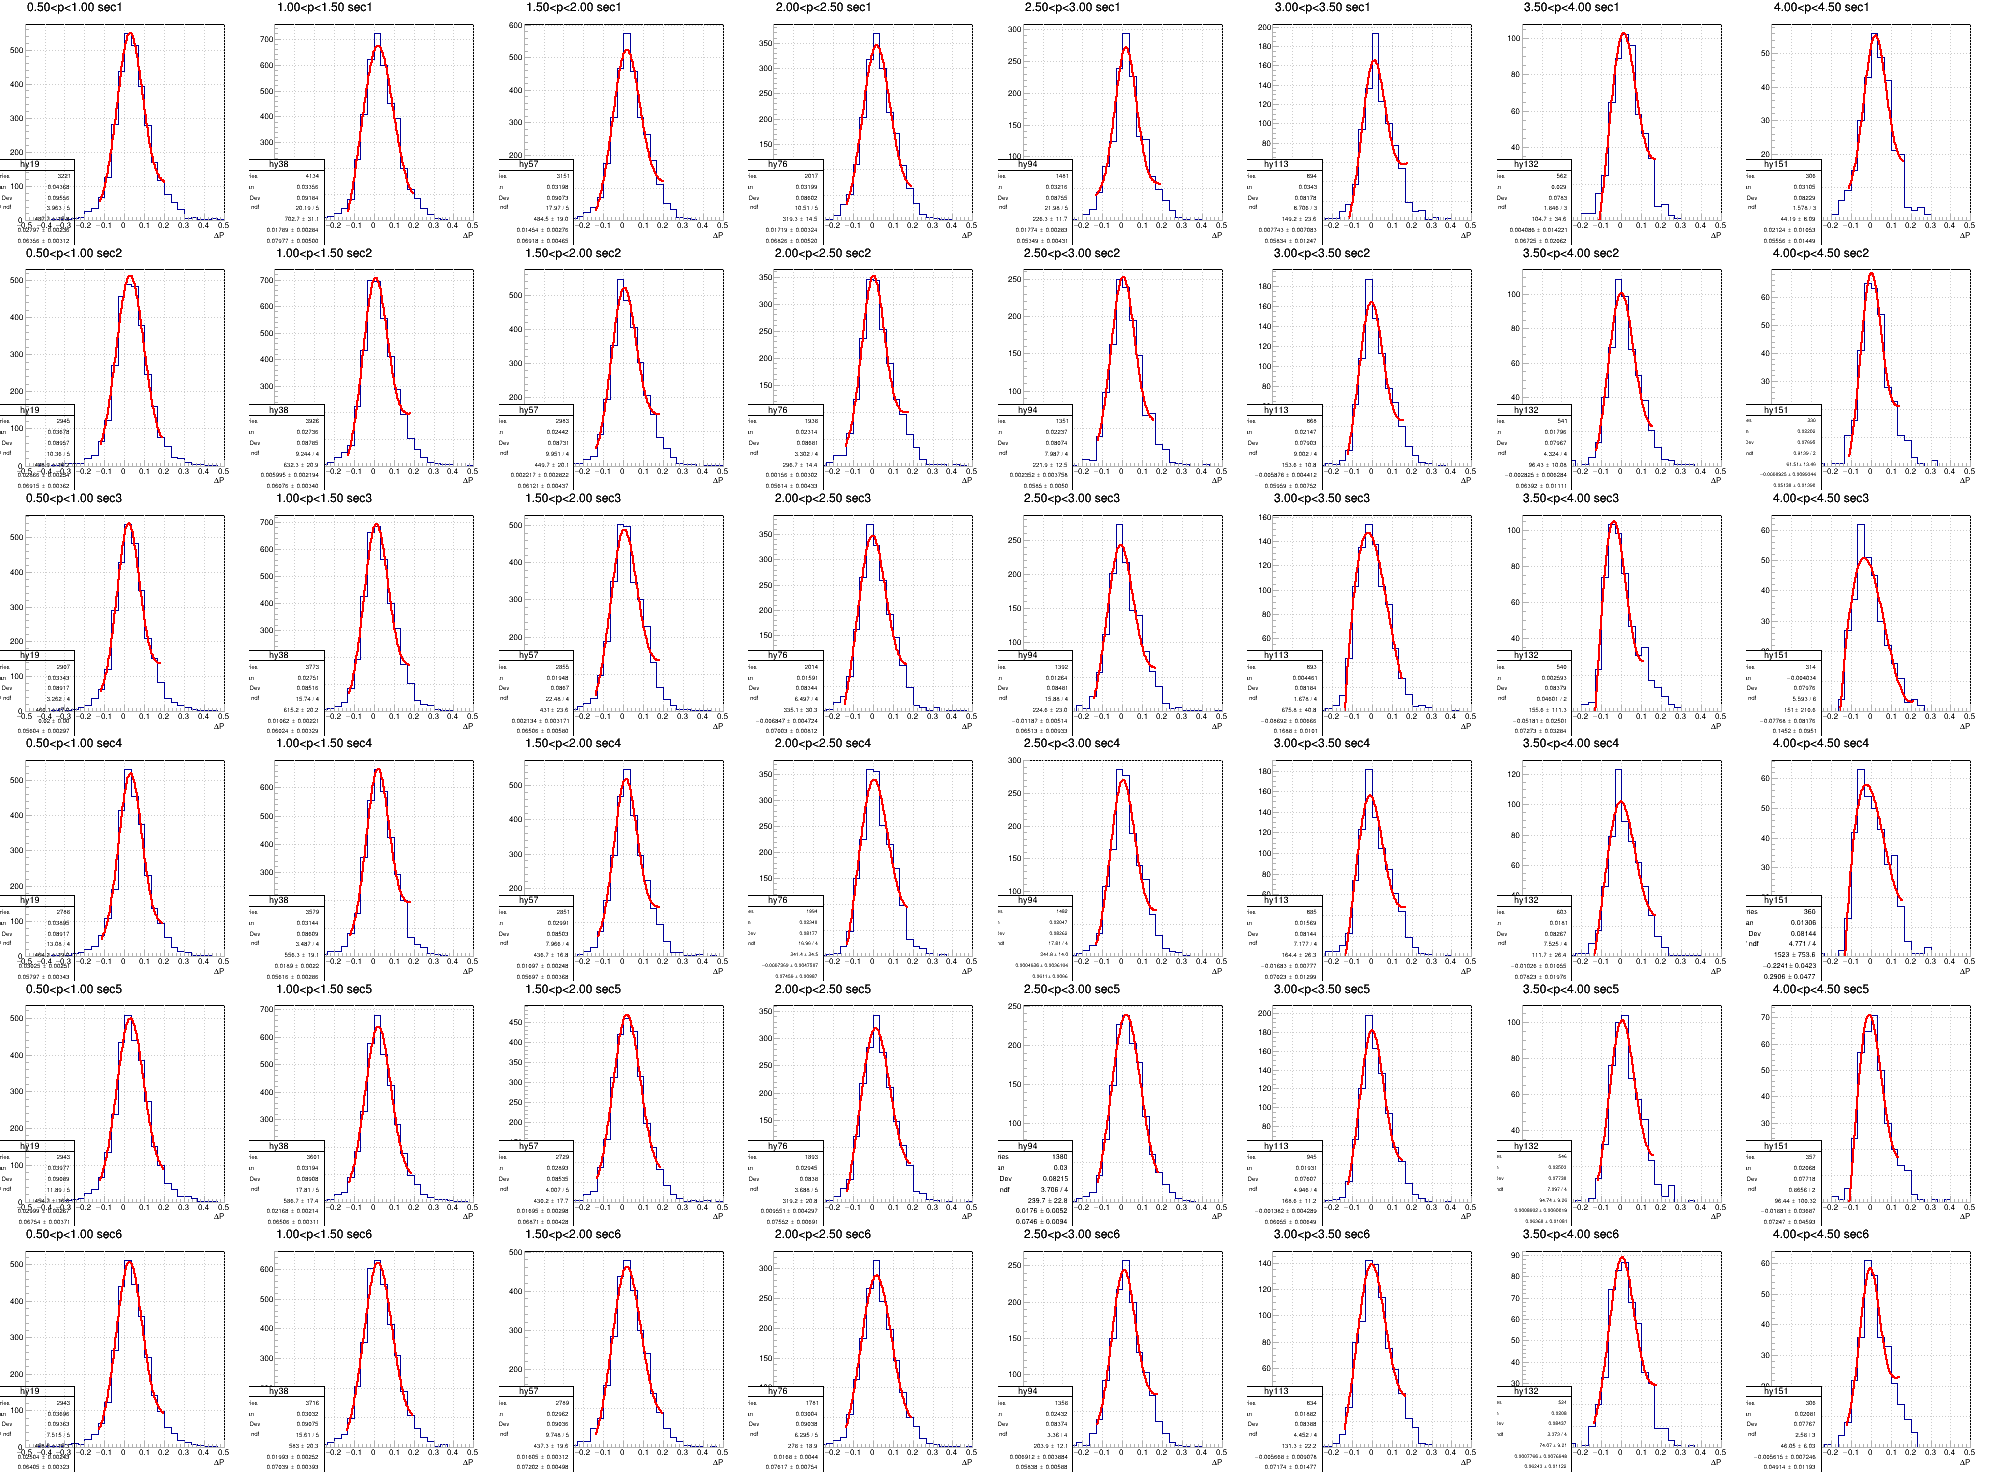

In [31]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(8,6,0.0001,0.0001)
c2.Draw()


for i in range(8):
    c2.cd(i+1)
    #dpp11.hys[i].Rebin(2)
    dpp11.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp11.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8+1)
    dpp21.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp21.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*2+1)
    dpp31.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp31.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*3+1)
    dpp41.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp41.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*4+1)
    dpp51.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp51.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*5+1)
    dpp61.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp61.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_New.png")

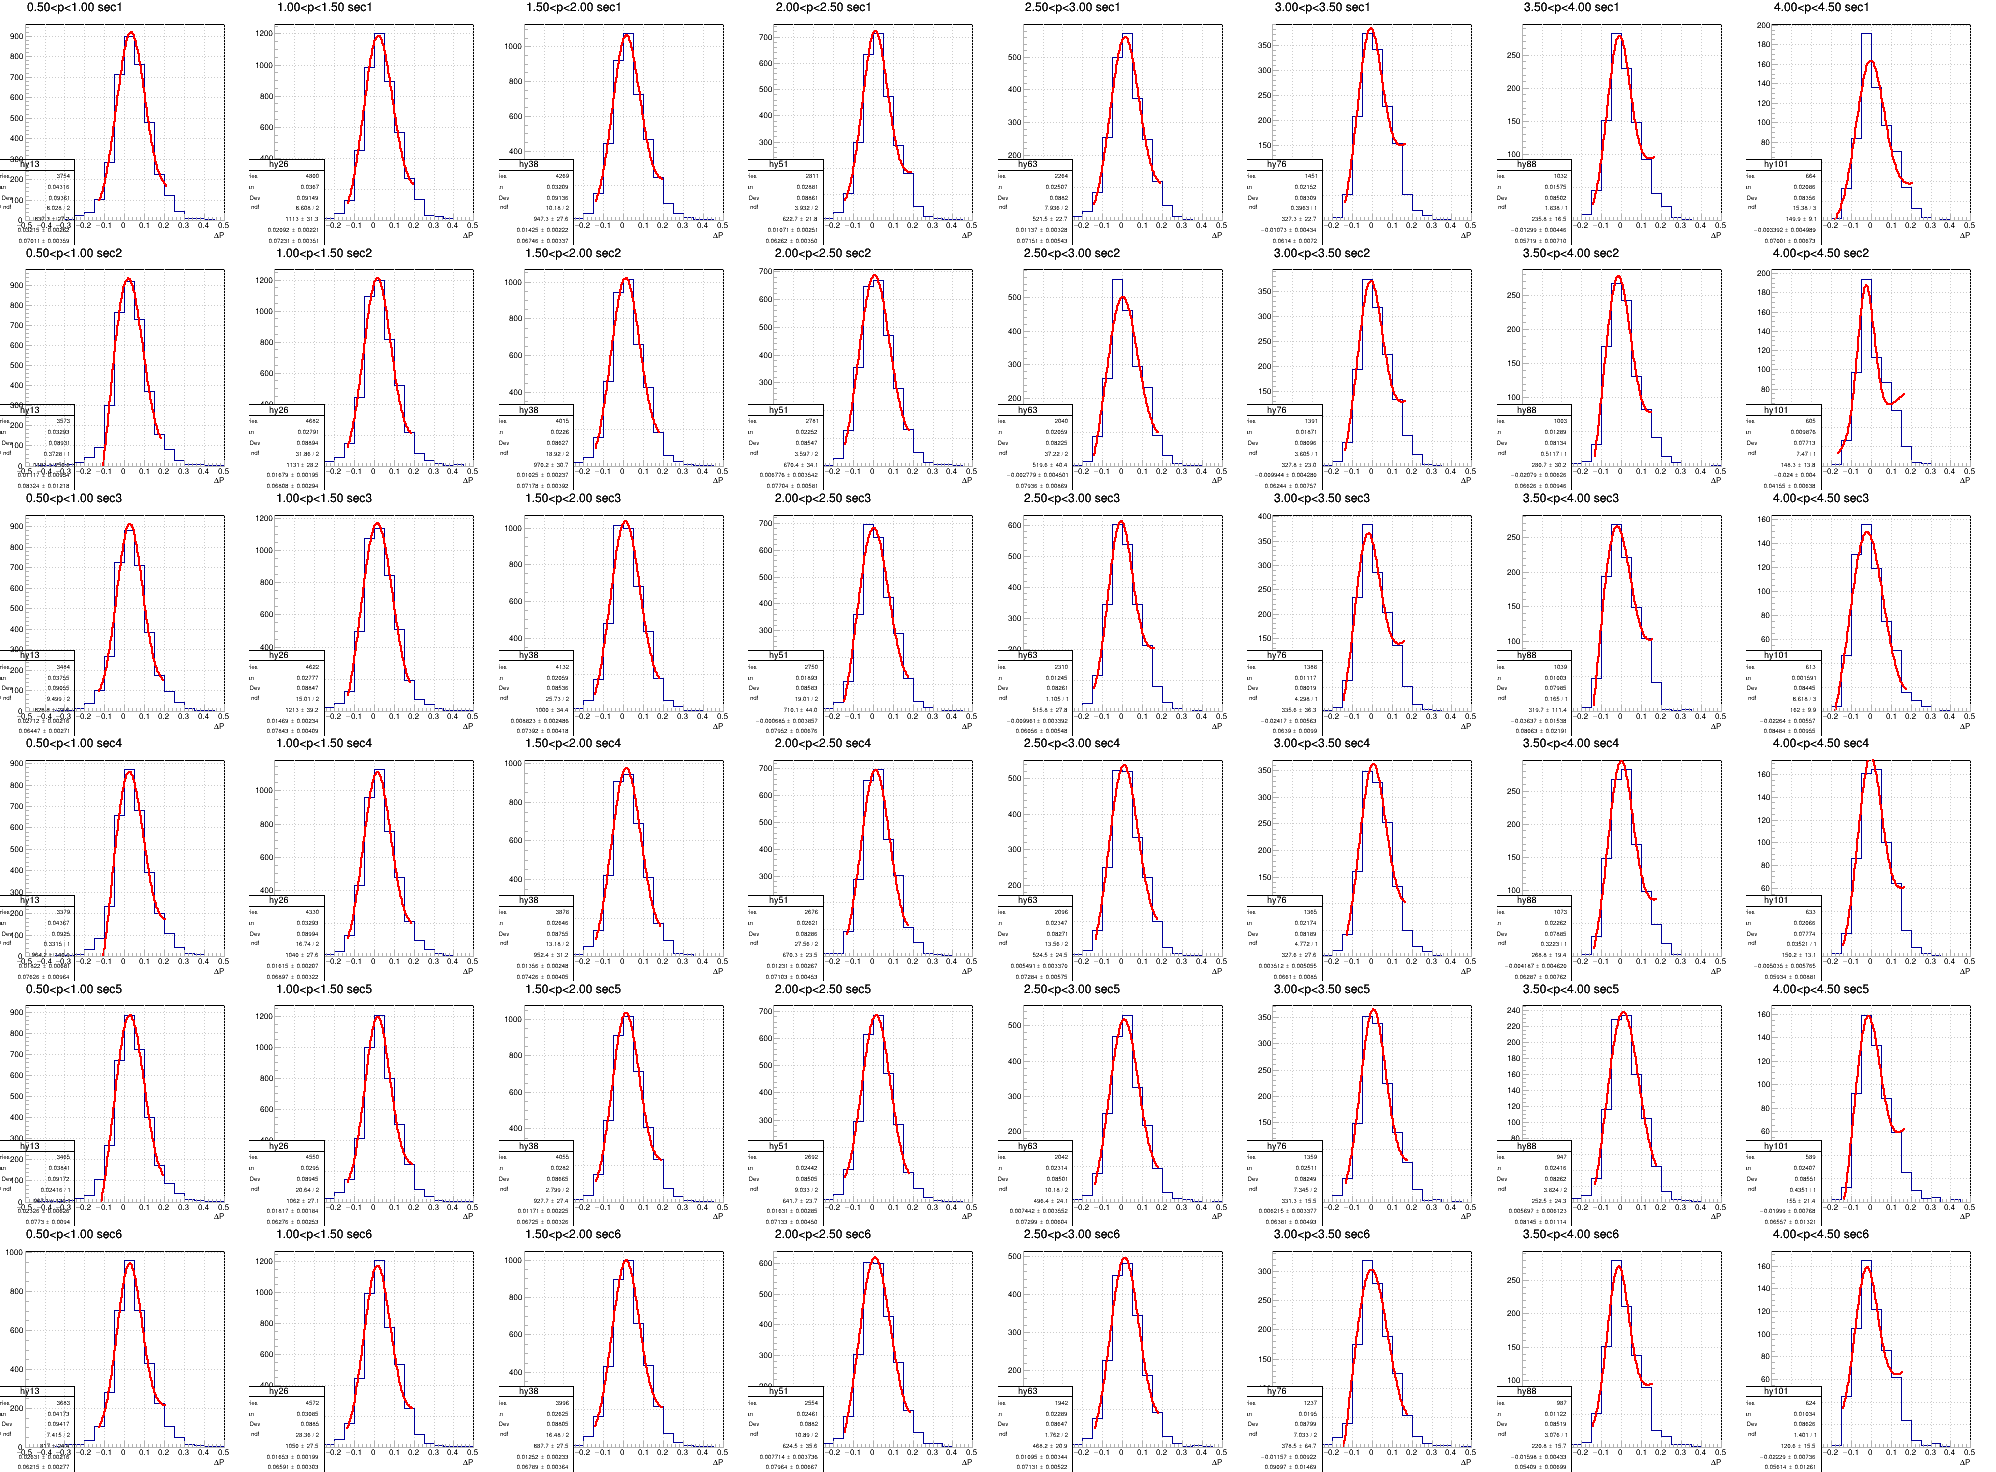

In [21]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(8,6,0.0001,0.0001)
c2.Draw()


for i in range(8):
    c2.cd(i+1)
    #dpp11.hys[i].Rebin(2)
    dpp12.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp12.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8+1)
    dpp22.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp22.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*2+1)
    dpp32.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp32.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*3+1)
    dpp42.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp42.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*4+1)
    dpp52.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp52.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*5+1)
    dpp62.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp62.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_New.png")

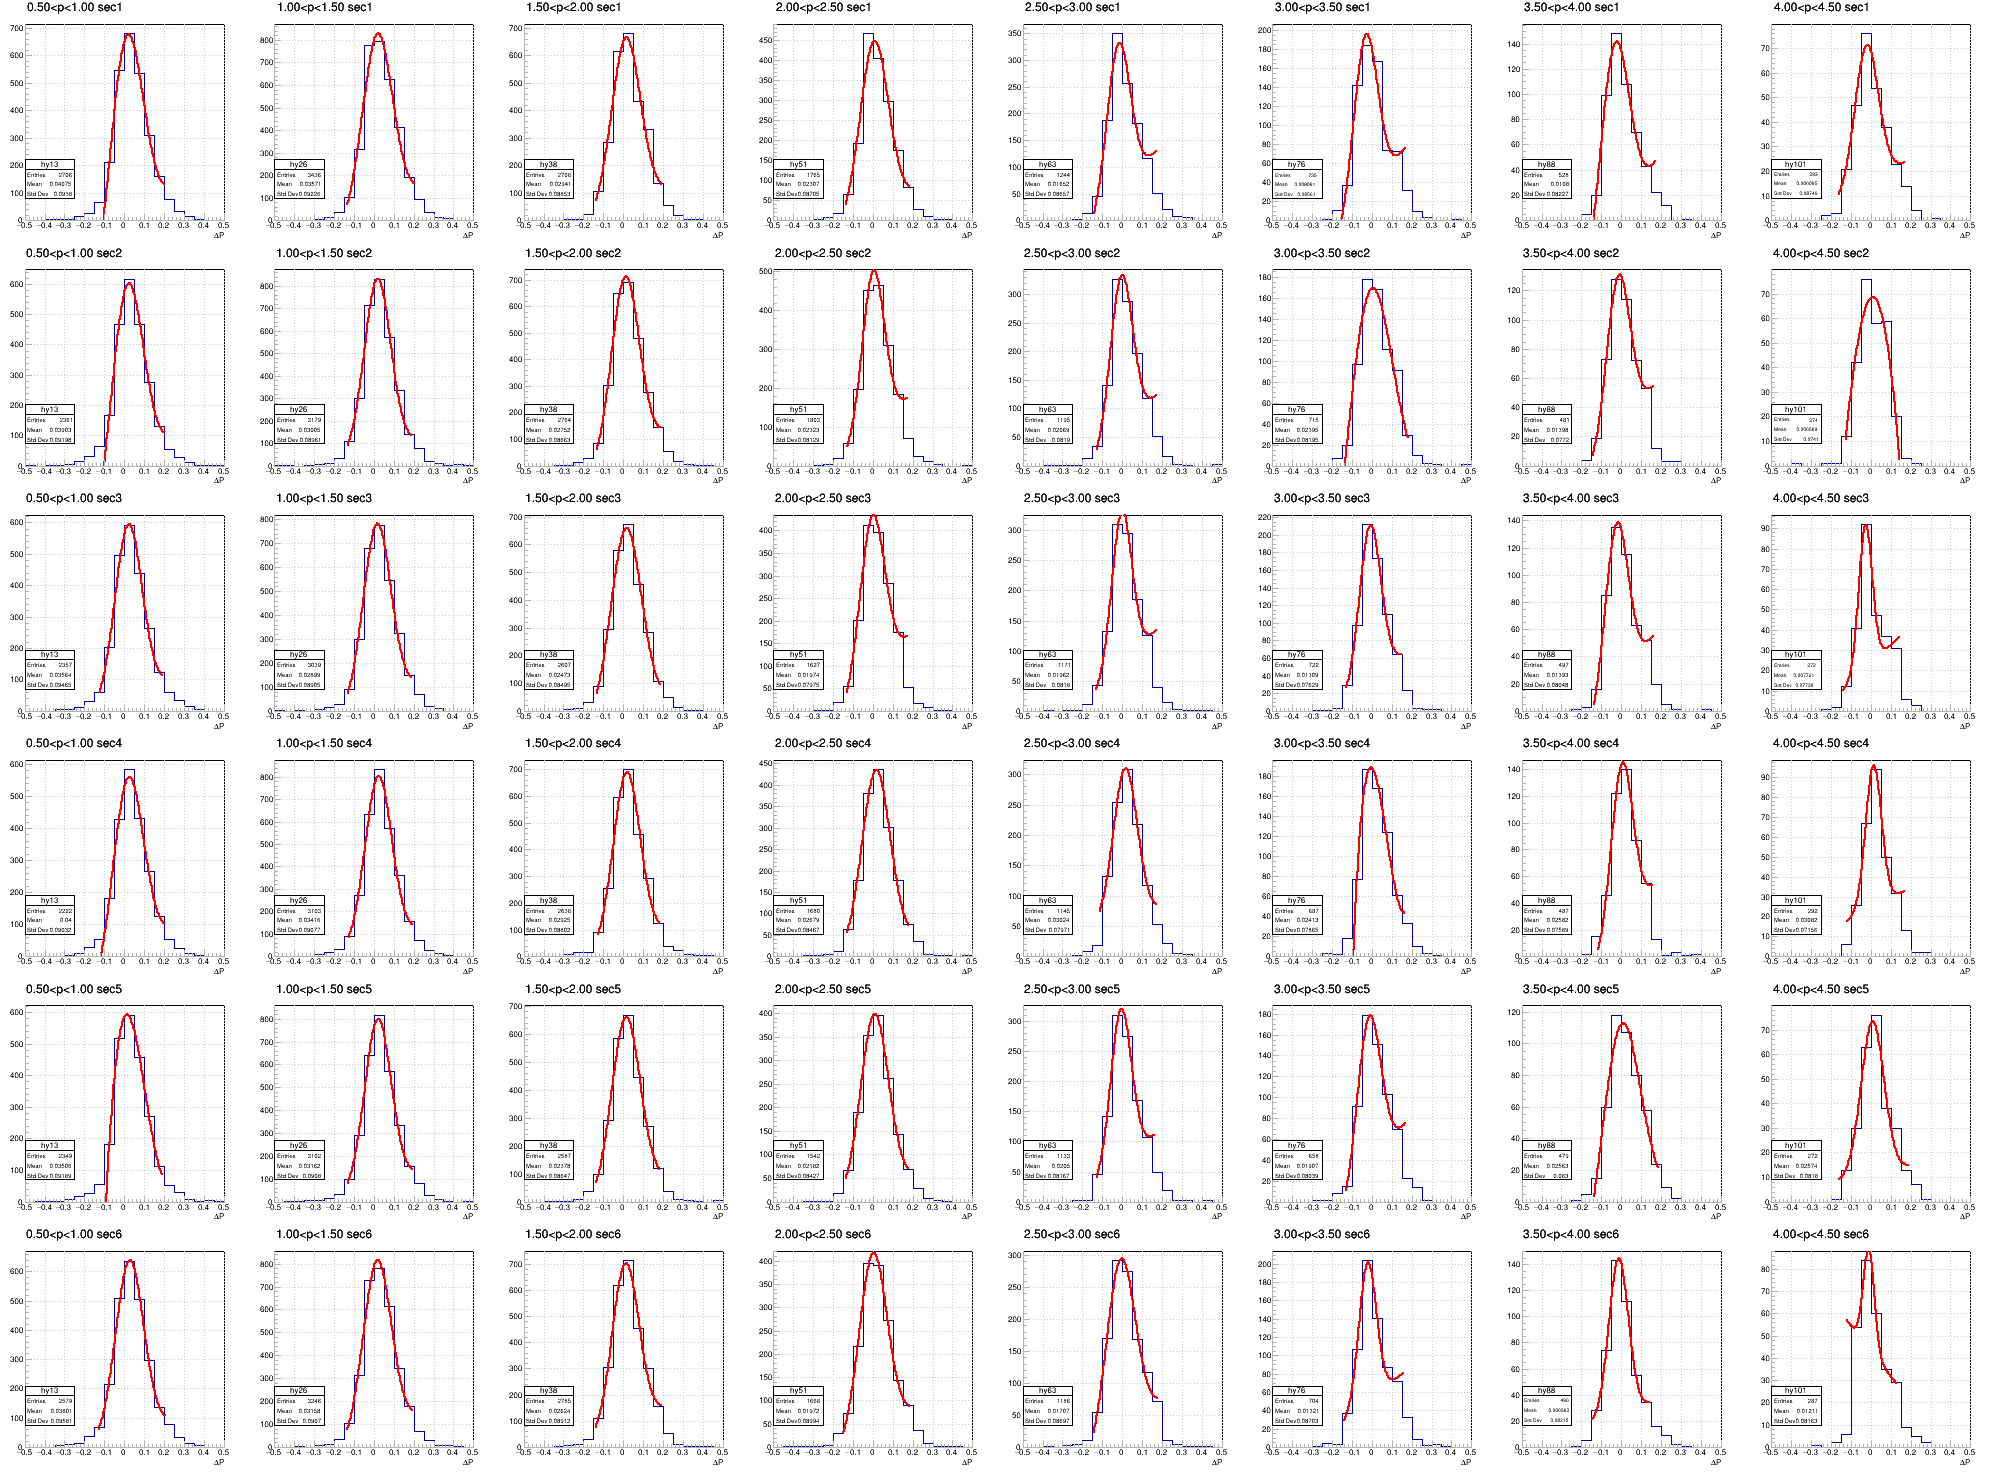

In [23]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(8,6,0.0001,0.0001)
c2.Draw()


for i in range(8):
    c2.cd(i+1)
    #dpp11.hys[i].Rebin(2)
    dpp13.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp13.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8+1)
    dpp23.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp23.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*2+1)
    dpp33.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp33.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*3+1)
    dpp43.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp43.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*4+1)
    dpp53.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp53.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*5+1)
    dpp63.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp63.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_New.png")

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
python ERROR: cannot open image file "pics/Cont_phi/phi_dp2d_1.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file pics/Cont_phi/phi_dp2d_1.png


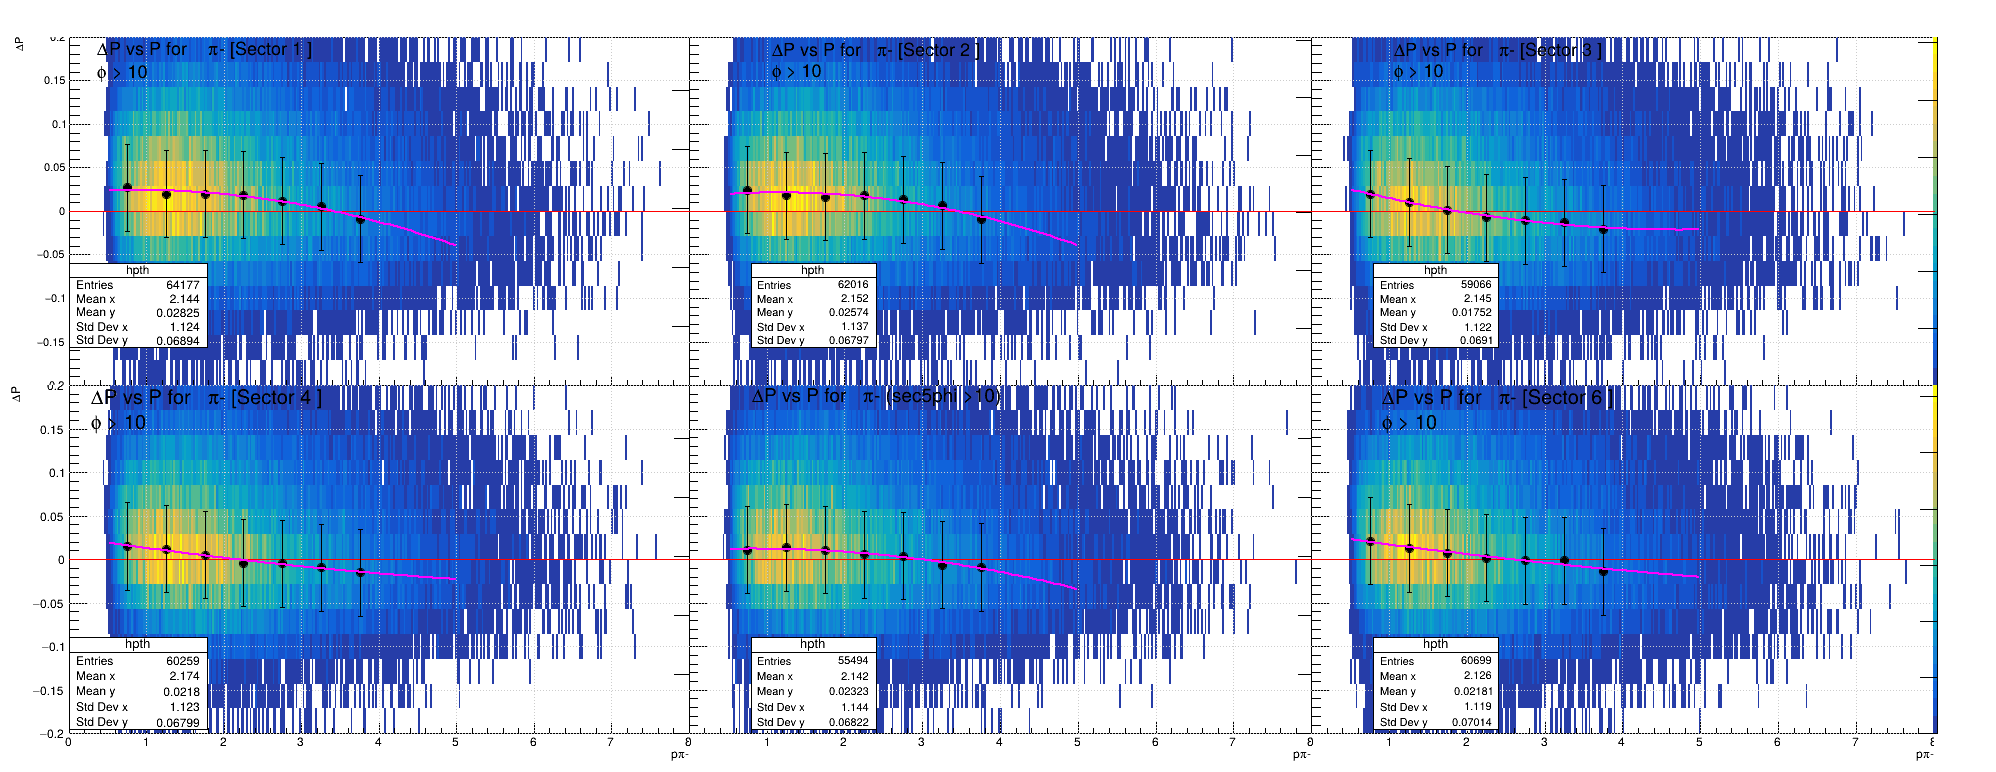

In [2]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
#ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)

ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
c1.Draw()
c1.cd(1)
dpp11.Draw("colz")
dpp11.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp11.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp11.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)





c1.cd(2)
dpp21.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp21.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp21.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp21.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp31.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp31.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp31.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp31.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(4)
dpp41.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp41.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp41.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp41.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp51.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp51.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp51.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp51.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(6)
dpp61.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp61.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp61.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp61.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)





c1.Print("pics/Cont_phi/phi_dp2d_1.png")

In [3]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)
c1.Draw()
c1.cd(1)
dpp12.Draw("colz")
dpp12.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp12.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp12.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)




c1.cd(2)
dpp22.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp22.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp22.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp22.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp32.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp32.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp32.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp32.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)

c1.cd(4)
dpp42.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp42.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp42.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp42.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp52.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp52.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp52.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp52.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)

c1.cd(6)
dpp62.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp62.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp62.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp62.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.Print("pics/Cont_phi/phi_dp2d_2.png")


0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
python ERROR: cannot open image file "pics/Cont_phi/phi_dp2d_2.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file pics/Cont_phi/phi_dp2d_2.png


In [4]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)
c1.Draw()
c1.cd(1)
dpp13.Draw("colz")
dpp13.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp13.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp13.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)




c1.cd(2)
dpp23.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp23.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp23.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp23.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp33.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp33.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp33.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp33.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(4)
dpp43.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp43.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp43.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp43.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp53.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp53.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp53.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp53.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(6)
dpp63.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp63.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp63.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp63.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.Print("pics/Cont_phi/phi_dp2d_3.png")



0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
python ERROR: cannot open image file "pics/Cont_phi/phi_dp2d_3.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file pics/Cont_phi/phi_dp2d_3.png


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Warning in <Minimize>: TLinearFitter failed in finding the solution
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Warning in <Minimize>: TLinearFitter failed in finding the solution
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Warning in <Minimize>: TLinearFitter failed in finding the solution
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Warning in <Minimize>:

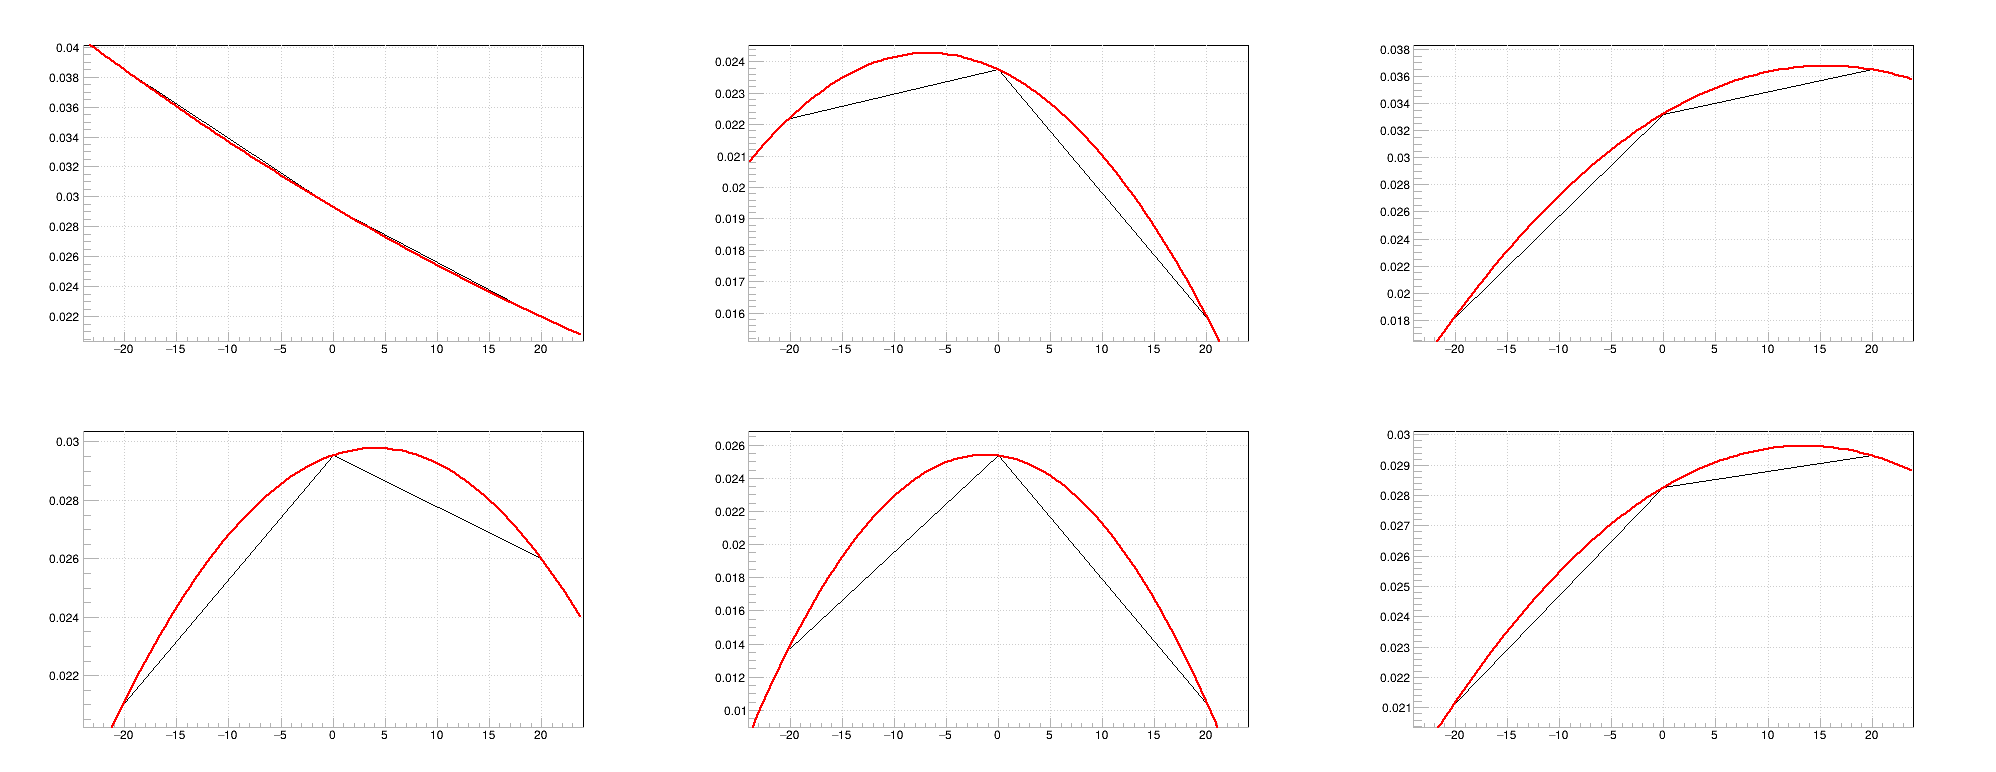

In [5]:
line =  ROOT.TLine(-20, 0, 0, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0.01,0.01)
c1.Draw()
c1.cd(1)
xlims = [-20,0,20]
y1 = [dpp11.fdp.GetParameter(0),dpp12.fdp.GetParameter(0),dpp13.fdp.GetParameter(0)]

dpphi11 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi11.SetPoint(dpphi11.GetN(),x,y)
    count = count + 1
    t10 = ROOT.TF1("f1","pol2",-200,200)
    dpphi11.Fit(t10,"QA")#NewFit(dpphi11,y1)
dpphi11.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(2)
xlims = [-20,0,20]
y1 = [dpp21.fdp.GetParameter(0),dpp22.fdp.GetParameter(0),dpp23.fdp.GetParameter(0)]

dpphi21 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi21.SetPoint(dpphi21.GetN(),x,y)
    count = count + 1
    t20 = ROOT.TF1("f1","pol2",-200,200)
    dpphi21.Fit(t20,"QA")#NewFit(dpphi11,y1)
dpphi21.Draw("")
#line.SetLineColor(2)
#line.Draw("")


c1.cd(3)
xlims = [-20,0,20]
y1 = [dpp31.fdp.GetParameter(0),dpp32.fdp.GetParameter(0),dpp33.fdp.GetParameter(0)]

dpphi31 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi31.SetPoint(dpphi31.GetN(),x,y)
    count = count + 1
    t30 = ROOT.TF1("f1","pol2",-200,200)
    dpphi31.Fit(t30,"QA")#NewFit(dpphi11,y1)
#NewFit(dpphi11,y1)
dpphi31.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(4)
xlims = [-20,0,20]
y1 = [dpp41.fdp.GetParameter(0),dpp42.fdp.GetParameter(0),dpp43.fdp.GetParameter(0)]

dpphi41 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi41.SetPoint(dpphi41.GetN(),x,y)
    count = count + 1
    t40 = ROOT.TF1("f1","pol2",-200,200)
    dpphi41.Fit(t40,"QA")#NewFit(dpphi11,y1)
#NewFit(dpphi11,y1)
dpphi41.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(5)
xlims = [-20,0,20]
y1 = [dpp51.fdp.GetParameter(0),dpp52.fdp.GetParameter(0),dpp53.fdp.GetParameter(0)]

dpphi51 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi51.SetPoint(dpphi51.GetN(),x,y)
    count = count + 1
    t50 = ROOT.TF1("f1","pol2",-200,200)
    dpphi51.Fit(t50,"QA")#NewFit(dpphi11,y1)
#NewFit(dpphi11,y1)
dpphi51.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(6)
xlims = [-20,0,20]
y1 = [dpp61.fdp.GetParameter(0),dpp62.fdp.GetParameter(0),dpp63.fdp.GetParameter(0)]

dpphi61 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi61.SetPoint(dpphi61.GetN(),x,y)
    count = count + 1
    t60 = ROOT.TF1("f1","pol2",-200,200)
    dpphi61.Fit(t60,"QA")#NewFit(dpphi11,y1)
#NewFit(dpphi11,y1)
dpphi61.Draw("")
#line.SetLineColor(2)
#line.Draw("")


(-4.7480E-07*phi*phi + 6.4122E-04*phi + -6.5277E-03)*pp + 2.2650E-06*phi*phi + -4.1282E-04*phi + 2.9320E-02
(3.9123E-06*phi*phi + 4.4239E-04*phi + -9.0077E-04)*pp  + -1.1779E-05*phi*phi + -1.5770E-04*phi + 2.3742E-02
(1.3397E-05*phi*phi + -7.9996E-04*phi + -1.3805E-02)*pp  + -1.4627E-05*phi*phi + 4.5592E-04*phi + 3.3216E-02
(1.3347E-05*phi*phi + -5.2705E-04*phi + -8.5933E-03)*pp  + -1.4955E-05*phi*phi + 1.2368E-04*phi + 2.9520E-02
(3.3088E-05*phi*phi + -1.1610E-04*phi + -6.4649E-03)*pp  + -3.3106E-05*phi*phi + -8.2927E-05*phi + 2.5348E-02
(-6.4081E-07*phi*phi + -3.8667E-04*phi + -4.9498E-03)*pp  + -7.5488E-06*phi*phi + 2.0358E-04*phi + 2.8252E-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Warning in <Minimize>: TLinearFitter failed in finding the solution
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Warning in <Minimize>: TLinearFitter failed in finding the solution
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Warning in <Minimize>: TLinearFitter failed in finding the solution
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Warning in <Minimize>:

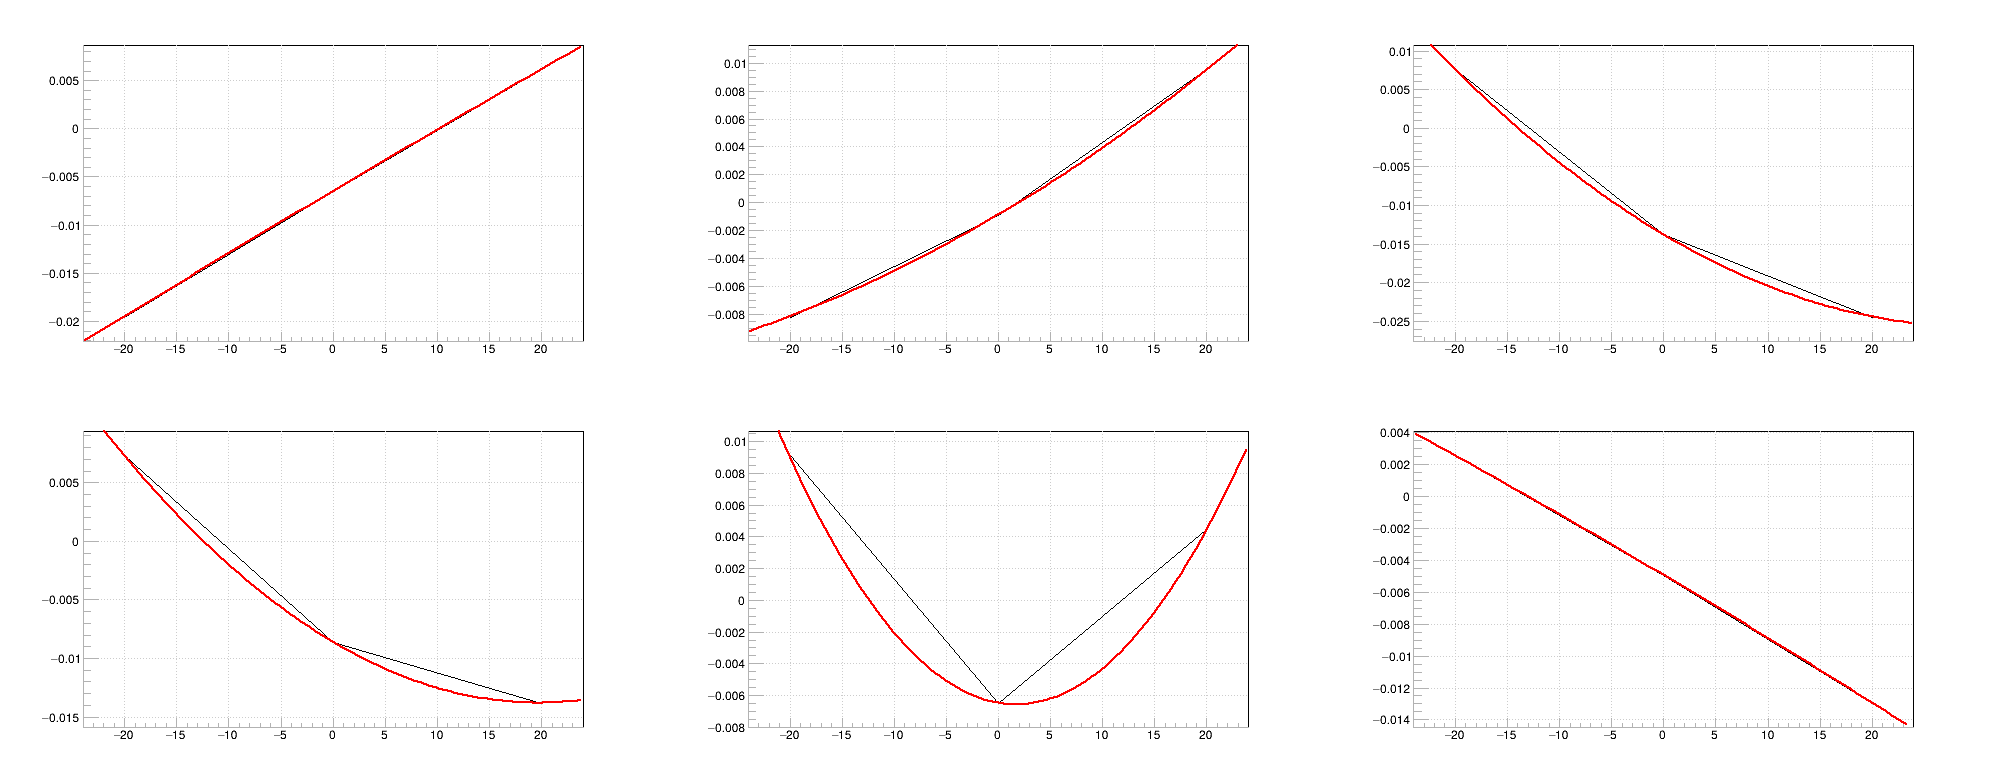

In [6]:
line =  ROOT.TLine(-20, 0, 0, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0.01,0.01)
c1.Draw()
c1.cd(1)
xlims = [-20,0,20]
y1 = [dpp11.fdp.GetParameter(1),dpp12.fdp.GetParameter(1),dpp13.fdp.GetParameter(1)]

dpphi11 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi11.SetPoint(dpphi11.GetN(),x,y)
    count = count + 1
    t1 = ROOT.TF1("f1","pol2",-200,200)
    dpphi11.Fit(t1,"QA")
#NewFit(dpphi11,y1)
dpphi11.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(2)
xlims = [-20,0,20]
y1 = [dpp21.fdp.GetParameter(1),dpp22.fdp.GetParameter(1),dpp23.fdp.GetParameter(1)]

dpphi21 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi21.SetPoint(dpphi21.GetN(),x,y)
    count = count + 1
    t2 = ROOT.TF1("f1","pol2",-200,200)
    dpphi21.Fit(t2,"QA")
#NewFit(dpphi11,y1)
dpphi21.Draw("")
#line.SetLineColor(2)
#line.Draw("")


c1.cd(3)
xlims = [-20,0,20]
y1 = [dpp31.fdp.GetParameter(1),dpp32.fdp.GetParameter(1),dpp33.fdp.GetParameter(1)]

dpphi31 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi31.SetPoint(dpphi31.GetN(),x,y)
    count = count + 1
    t3 = ROOT.TF1("f1","pol2",-200,200)
    dpphi31.Fit(t3,"QA")
#NewFit(dpphi11,y1)
dpphi31.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(4)
xlims = [-20,0,20]
y1 = [dpp41.fdp.GetParameter(1),dpp42.fdp.GetParameter(1),dpp43.fdp.GetParameter(1)]

dpphi41 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi41.SetPoint(dpphi41.GetN(),x,y)
    count = count + 1
    t4 = ROOT.TF1("f1","pol2",-200,200)
    dpphi41.Fit(t4,"QA")
#NewFit(dpphi11,y1)
dpphi41.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(5)
xlims = [-20,0,20]
y1 = [dpp51.fdp.GetParameter(1),dpp52.fdp.GetParameter(1),dpp53.fdp.GetParameter(1)]

dpphi51 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi51.SetPoint(dpphi51.GetN(),x,y)
    count = count + 1
    t5 = ROOT.TF1("f1","pol2",-200,200)
    dpphi51.Fit(t5,"QA")
#NewFit(dpphi11,y1)
dpphi51.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(6)
xlims = [-20,0,20]
y1 = [dpp61.fdp.GetParameter(1),dpp62.fdp.GetParameter(1),dpp63.fdp.GetParameter(1)]

dpphi61 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi61.SetPoint(dpphi61.GetN(),x,y)
    count = count + 1
    t6 = ROOT.TF1("f1","pol2",-200,200)
    dpphi61.Fit(t6,"QA")
#NewFit(dpphi11,y1)
dpphi61.Draw("")
#line.SetLineColor(2)
#line.Draw("")

print1 = "("+str(format(t1.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t1.GetParameter(1),".4E") )+ "*phi + " + str(format(t1.GetParameter(0),".4E")) + ")*pp + " +str(format(t10.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t10.GetParameter(1),".4E"))+ "*phi + " +str(format(t10.GetParameter(0),".4E"))
print2 = "("+str(format(t2.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t2.GetParameter(1),".4E"))+ "*phi + " + str(format(t2.GetParameter(0),".4E")) + ")*pp  + " +str(format(t20.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t20.GetParameter(1),".4E"))+ "*phi + " +str(format(t20.GetParameter(0),".4E"))
print3 = "("+str(format(t3.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t3.GetParameter(1),".4E") )+ "*phi + " + str(format(t3.GetParameter(0),".4E")) + ")*pp  + " +str(format(t30.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t30.GetParameter(1),".4E"))+ "*phi + " +str(format(t30.GetParameter(0),".4E"))
print4 = "("+str(format(t4.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t4.GetParameter(1),".4E") )+ "*phi + " + str(format(t4.GetParameter(0),".4E")) + ")*pp  + " +str(format(t40.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t40.GetParameter(1),".4E"))+ "*phi + " +str(format(t40.GetParameter(0),".4E"))
print5 = "("+str(format(t5.GetParameter(2),".4E"))+"*phi*phi + " +str(format(t5.GetParameter(1),".4E") )+ "*phi + " + str(format(t5.GetParameter(0),".4E")) + ")*pp  + " +str(format(t50.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t50.GetParameter(1),".4E"))+ "*phi + " +str(format(t50.GetParameter(0),".4E"))
print6 = "("+str(format(t6.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t6.GetParameter(1),".4E") )+ "*phi + " + str(format(t6.GetParameter(0),".4E")) + ")*pp  + " +str(format(t60.GetParameter(2),".4E"))+"*phi*phi + " +str(format(t60.GetParameter(1),".4E"))+ "*phi + " +str(format(t60.GetParameter(0),".4E"))


print(print1)
print(print2)
print(print3)
print(print4)
print(print5)
print(print6)

dp = (6.8363E-07*phi*phi + -1.5092E-04*phi + -9.4563E-04)*pp*pp +(-4.7480E-07*phi*phi + 6.4122E-04*phi + -6.5277E-03)*pp + 2.2650E-06*phi*phi + -4.1282E-04*phi + 2.9320E-02;
dp =(9.2123E-07*phi*phi + -1.1242E-04*phi + -2.2345E-03)*pp*pp +(3.9123E-06*phi*phi + 4.4239E-04*phi + -9.0077E-04)*pp  + -1.1779E-05*phi*phi + -1.5770E-04*phi + 2.3742E-02;
dp =(-1.9121E-06*phi*phi + 1.4175E-04*phi + 5.1337E-04)*pp*pp +(1.3397E-05*phi*phi + -7.9996E-04*phi + -1.3805E-02)*pp  + -1.4627E-05*phi*phi + 4.5592E-04*phi + 3.3216E-02;
dp =(-2.0142E-06*phi*phi + 1.0540E-04*phi + -4.9625E-04)*pp*pp +(1.3347E-05*phi*phi + -5.2705E-04*phi + -8.5933E-03)*pp  + -1.4955E-05*phi*phi + 1.2368E-04*phi + 2.9520E-02;
dp =(-5.8715E-06*phi*phi + 2.9272E-05*phi + -9.1832E-04)*pp*pp +(3.3088E-05*phi*phi + -1.1610E-04*phi + -6.4649E-03)*pp  + -3.3106E-05*phi*phi + -8.2927E-05*phi + 2.5348E-02;
dp =(2.7818E-06*phi*phi + 7.8680E-05*phi + -2.0775E-03)*pp*pp +(-6.4081E-07*phi*phi + -3.8667E-04*phi + -4.9498E-03)*pp  + -7.5488

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Warning in <Minimize>: TLinearFitter failed in finding the solution
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Warning in <Minimize>: TLinearFitter failed in finding the solution
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Warning in <Minimize>: TLinearFitter failed in finding the solution
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Warning in <Minimize>:

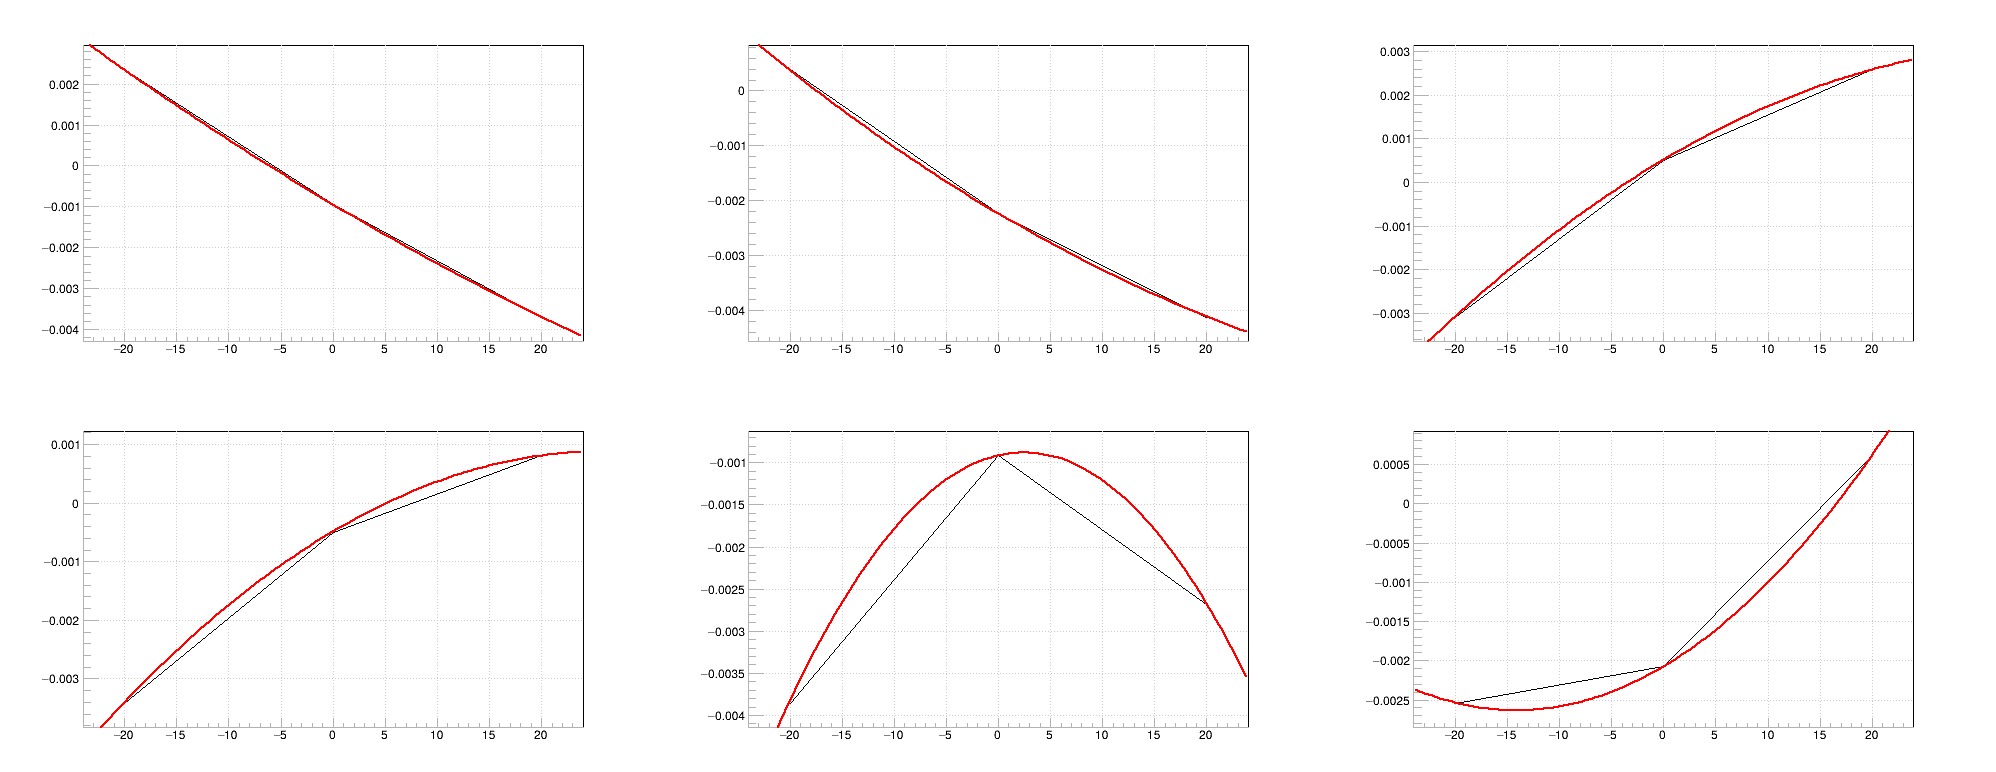

In [7]:
line =  ROOT.TLine(-20, 0, 0, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0.01,0.01)
c1.Draw()
c1.cd(1)
xlims = [-20,0,20]
y1 = [dpp11.fdp.GetParameter(2),dpp12.fdp.GetParameter(2),dpp13.fdp.GetParameter(2)]

dpphi11 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi11.SetPoint(dpphi11.GetN(),x,y)
    count = count + 1
    t21 = ROOT.TF1("f1","pol2",-200,200)
    dpphi11.Fit(t21,"QA")
#NewFit(dpphi11,y1)
dpphi11.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(2)
xlims = [-20,0,20]
y1 = [dpp21.fdp.GetParameter(2),dpp22.fdp.GetParameter(2),dpp23.fdp.GetParameter(2)]

dpphi21 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi21.SetPoint(dpphi21.GetN(),x,y)
    count = count + 1
    t22 = ROOT.TF1("f1","pol2",-200,200)
    dpphi21.Fit(t22,"QA")
#NewFit(dpphi11,y1)
dpphi21.Draw("")
#line.SetLineColor(2)
#line.Draw("")


c1.cd(3)
xlims = [-20,0,20]
y1 = [dpp31.fdp.GetParameter(2),dpp32.fdp.GetParameter(2),dpp33.fdp.GetParameter(2)]

dpphi31 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi31.SetPoint(dpphi31.GetN(),x,y)
    count = count + 1
    t23 = ROOT.TF1("f1","pol2",-200,200)
    dpphi31.Fit(t23,"QA")
#NewFit(dpphi11,y1)
dpphi31.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(4)
xlims = [-20,0,20]
y1 = [dpp41.fdp.GetParameter(2),dpp42.fdp.GetParameter(2),dpp43.fdp.GetParameter(2)]

dpphi41 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi41.SetPoint(dpphi41.GetN(),x,y)
    count = count + 1
    t24 = ROOT.TF1("f1","pol2",-200,200)
    dpphi41.Fit(t24,"QA")
#NewFit(dpphi11,y1)
dpphi41.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(5)
xlims = [-20,0,20]
y1 = [dpp51.fdp.GetParameter(2),dpp52.fdp.GetParameter(2),dpp53.fdp.GetParameter(2)]

dpphi51 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi51.SetPoint(dpphi51.GetN(),x,y)
    count = count + 1
    t25 = ROOT.TF1("f1","pol2",-200,200)
    dpphi51.Fit(t25,"QA")
#NewFit(dpphi11,y1)
dpphi51.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(6)
xlims = [-20,0,20]
y1 = [dpp61.fdp.GetParameter(2),dpp62.fdp.GetParameter(2),dpp63.fdp.GetParameter(2)]

dpphi61 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi61.SetPoint(dpphi61.GetN(),x,y)
    count = count + 1
    t26 = ROOT.TF1("f1","pol2",-200,200)
    dpphi61.Fit(t26,"QA")
#NewFit(dpphi11,y1)
dpphi61.Draw("")
#line.SetLineColor(2)
#line.Draw("")

print("dp = ("+str(format(t21.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t21.GetParameter(1),".4E") )+ "*phi + " + str(format(t21.GetParameter(0),".4E") ) +")*pp*pp +" + print1 + ";")
print("dp =("+str(format(t22.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t22.GetParameter(1),".4E") )+ "*phi + " + str(format(t22.GetParameter(0),".4E")) +")*pp*pp +" + print2 + ";")
print("dp =("+str(format(t23.GetParameter(2),".4E"))+"*phi*phi + " +str(format(t23.GetParameter(1),".4E")  )+ "*phi + " + str(format(t23.GetParameter(0),".4E")) +")*pp*pp +" +  print3 + ";")
print("dp =("+str(format(t24.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t24.GetParameter(1),".4E")  )+ "*phi + " + str(format(t24.GetParameter(0),".4E")) +")*pp*pp +" +  print4 + ";")
print("dp =("+str(format(t25.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t25.GetParameter(1),".4E")  )+ "*phi + " + str(format(t25.GetParameter(0),".4E")) +")*pp*pp +" +  print5 + ";")
print("dp =("+str(format(t26.GetParameter(2),".4E"))+"*phi*phi + " +str(format(t26.GetParameter(1),".4E")  )+ "*phi + " + str(format(t26.GetParameter(0),".4E")) +")*pp*pp +" +  print6 + ";")



# e-, $\pi^+$ , $\pi^-$ corrected

In [1]:
%reset -f 
import ROOT, numpy

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

#rdf = ROOT.RDataFrame("h22","/volatile/clas12/kenjo/ntuple_epippimp/inb/skim8_005*")
#rdf = ROOT.RDataFrame("h22","/volatile/clas12/kenjo/ntuple_epippimp/inb/lvl1_eppimpip.skim4_005*")
fname = "/work/clas12/trottan/rhoAnalysis/Pass2/FD/inData/*.root"
rdf = ROOT.RDataFrame("h22",fname)



rdf = rdf.Define("vals","""
auto ele = ROOT::Math::PxPyPzMVector(ex,ey,ez,0);
auto pip = ROOT::Math::PxPyPzMVector(pipx,pipy,pipz,0.1395);
auto pim = ROOT::Math::PxPyPzMVector(pimx,pimy,pimz,0.1395);
auto beam = ROOT::Math::PxPyPzMVector(0,0,10.6041,0);
auto targ = ROOT::Math::PxPyPzMVector(0,0,0,0.938);

auto eloss_pip = [&](double pion_p, double pip_theta, double pion_det, bool outbending){
    // momentum loss correction for low momentum pions:
    // input: p = pion momentum in GeV, pip_theta = pion theta in degree, 
    //        pion_det = pion detector (2 = FD, 3 = CD),  outbending = torus polarity
    // output: dp_pion = generated momentum - reconstructed momentum = momentum loss (+) / gain (-)

    double dp_pion = 0.0;

    if(outbending == false){ // INBENDING
        if(pion_det == 2){   // Forward Detector
            if(pip_theta < 27){                                       dp_pion =  0.00342646 + (-0.00282934) *pion_p + (0.00205983)   *pow(pion_p,2) + (-0.00043158)  *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta < 27 && pion_p >= 2.5){                      dp_pion =  0.00342646 + (-0.00282934) *2.5    + (0.00205983)   *pow(2.5,2)    + (-0.00043158)  *pow(2.5,3)    + (0) *pow(2.5,4);}
            if(pip_theta > 27 && pip_theta < 28){                     dp_pion =  0.00328565 + (-0.00376042) *pion_p + (0.00433886)   *pow(pion_p,2) + (-0.00141614)  *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 27 && pip_theta < 28 && pion_p >= 1.83){   dp_pion =  0.00328565 + (-0.00376042) *1.83   + (0.00433886)   *pow(1.83,2)   + (-0.00141614)  *pow(1.83,3)   + (0) *pow(1.83,4);}
            if(pip_theta > 28 && pip_theta < 29){                     dp_pion =  0.00328579 + (-0.00281121) *pion_p + (0.00342749)   *pow(pion_p,2) + (-0.000932614) *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 28 && pip_theta < 29 && pion_p >= 2){      dp_pion =  0.00328579 + (-0.00281121) *2      + (0.00342749)   *pow(2,2)      + (-0.000932614) *pow(2,3)      + (0) *pow(2,4);}
            if(pip_theta > 29 && pip_theta < 30){                     dp_pion =  0.00167358 + (0.00441871)  *pion_p + (-0.000834667) *pow(pion_p,2) + (-0.000137968) *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 29 && pip_theta < 30 && pion_p >= 1.9){    dp_pion =  0.00167358 + (0.00441871)  *1.9    + (-0.000834667) *pow(1.9,2)    + (-0.000137968) *pow(1.9,3)    + (0) *pow(1.9,4);}
            if(pip_theta > 30 && pip_theta < 31){                     dp_pion =  0.00274159 + (0.00635686)  *pion_p + (-0.00380977)  *pow(pion_p,2) + (0.00071627)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 30 && pip_theta < 31 && pion_p >= 1.9){    dp_pion =  0.00274159 + (0.00635686)  *1.9    + (-0.00380977)  *pow(1.9,2)    + (0.00071627)   *pow(1.9,3)    + (0) *pow(1.9,4);}
            if(pip_theta > 31 && pip_theta < 32){                     dp_pion =  0.00450241 + (0.00248969)  *pion_p + (-0.00336795)  *pow(pion_p,2) + (0.00111193)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 31 && pip_theta < 32 && pion_p >= 1.8){    dp_pion =  0.00450241 + (0.00248969)  *1.8    + (-0.00336795)  *pow(1.8,2)    + (0.00111193)   *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 32 && pip_theta < 33){                     dp_pion =  0.00505593 + (-0.00246203) *pion_p + (0.00172984)   *pow(pion_p,2) + (-0.000406701) *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 32 && pip_theta < 33 && pion_p >= 1.8){    dp_pion =  0.00505593 + (-0.00246203) *1.8    + (0.00172984)   *pow(1.8,2)    + (-0.000406701) *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 33 && pip_theta < 34){                     dp_pion =  0.00273402 + (0.00440449)  *pion_p + (-0.00373488)  *pow(pion_p,2) + (0.000996612)  *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 33 && pip_theta < 34 && pion_p >= 1.8){    dp_pion =  0.00273402 + (0.00440449)  *1.8    + (-0.00373488)  *pow(1.8,2)    + (0.000996612)  *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 34 && pip_theta < 35){                     dp_pion =  0.00333542 + (0.00439874)  *pion_p + (-0.00397776)  *pow(pion_p,2) + (0.00105586)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 34 && pip_theta < 35 && pion_p >= 1.8){    dp_pion =  0.00333542 + (0.00439874)  *1.8    + (-0.00397776)  *pow(1.8,2)    + (0.00105586)   *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 35 && pip_theta < 36){                     dp_pion =  0.00354663 + (0.00565397)  *pion_p + (-0.00513503)  *pow(pion_p,2) + (0.00153346)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 35 && pip_theta < 36 && pion_p >= 1.8){    dp_pion =  0.00354663 + (0.00565397)  *1.8    + (-0.00513503)  *pow(1.8,2)    + (0.00153346)   *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 36 && pip_theta < 37){                     dp_pion =  0.00333909 + (0.00842367)  *pion_p + (-0.0077321)   *pow(pion_p,2) + (0.0022489)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 36 && pip_theta < 37 && pion_p >= 1.8){    dp_pion =  0.00333909 + (0.00842367)  *1.8    + (-0.0077321)   *pow(1.8,2)    + (0.0022489)    *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 37 && pip_theta < 38){                     dp_pion =  0.00358828 + (0.0112108)   *pion_p + (-0.0133854)   *pow(pion_p,2) + (0.00486924)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 37 && pip_theta < 38 && pion_p >= 1.4){    dp_pion =  0.00358828 + (0.0112108)   *1.4    + (-0.0133854)   *pow(1.4,2)    + (0.00486924)   *pow(1.4,3)    + (0) *pow(1.4,4);}
            if(pip_theta > 38 && pip_theta < 39){                     dp_pion =  0.00354343 + (0.0117121)   *pion_p + (-0.0129649)   *pow(pion_p,2) + (0.00455602)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 38 && pip_theta < 39 && pion_p >= 1.3){    dp_pion =  0.00354343 + (0.0117121)   *1.3    + (-0.0129649)   *pow(1.3,2)    + (0.00455602)   *pow(1.3,3)    + (0) *pow(1.3,4);}
            if(pip_theta > 39 && pip_theta < 40){                     dp_pion = -0.00194951 + (0.0409713)   *pion_p + (-0.0595861)   *pow(pion_p,2) + (0.0281588)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 39 && pip_theta < 40 && pion_p >= 0.9){    dp_pion = -0.00194951 + (0.0409713)   *0.9    + (-0.0595861)   *pow(0.9,2)    + (0.0281588)    *pow(0.9,3)    + (0) *pow(0.9,4);}
            if(pip_theta > 40 && pip_theta < 41){                     dp_pion = -0.0099217  + (0.0808096)   *pion_p + (-0.119836)    *pow(pion_p,2) + (0.0559553)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 40 && pip_theta < 41 && pion_p >= 0.75){   dp_pion = -0.0099217  + (0.0808096)   *0.75   + (-0.119836)    *pow(0.75,2)   + (0.0559553)    *pow(0.75,3)   + (0) *pow(0.75,4);}
            if(pip_theta > 41 && pip_theta < 42){                     dp_pion =  0.00854898 + (0.00025037)  *pion_p + (-0.0113992)   *pow(pion_p,2) + (0.0145178)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 41 && pip_theta < 42 && pion_p >= 0.65){   dp_pion =  0.00854898 + (0.00025037)  *0.65   + (-0.0113992)   *pow(0.65,2)   + (0.0145178)    *pow(0.65,3)   + (0) *pow(0.65,4);}
            if(pip_theta > 42){                                       dp_pion =  0.00564818 + (0.00706606)  *pion_p + (0.0042602)    *pow(pion_p,2) + (-0.01141)     *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 42 && pion_p >= 0.65){                     dp_pion =  0.00564818 + (0.00706606)  *0.65   + (0.0042602)    *pow(0.65,2)   + (-0.01141)     *pow(0.65,3)   + (0) *pow(0.65,4);}
        }
        if(pion_det == 3){  // Central Detector
            if(pip_theta < 39){                                       dp_pion = -0.045      + (-0.102652) + (0.455589) *pion_p + (-0.671635)   *pow(pion_p,2) + (0.303814)   *pow(pion_p,3);}
            if(pip_theta < 39  && pion_p >= 0.7){                     dp_pion = -0.045      + (-0.102652) + (0.455589) *0.7    + (-0.671635)   *pow(0.7,2)    + (0.303814)   *pow(0.7,3);}
            if(pip_theta > 39  && pip_theta < 40){                    dp_pion =  0.0684552  + (-0.766492)              *pion_p + (1.73092)     *pow(pion_p,2) + (-1.46215)   *pow(pion_p,3) + (0.420127) *pow(pion_p,4);}
            if(pip_theta > 39  && pip_theta < 40 && pion_p >= 1.4){   dp_pion =  0.0684552  + (-0.766492)              *1.4    + (1.73092)     *pow(1.4,2)    + (-1.46215)   *pow(1.4,3)    + (0.420127) *pow(1.4,4);}
            if(pip_theta > 40  && pip_theta < 41){                    dp_pion =  0.751549   + (-7.4593)                *pion_p + (26.8037)     *pow(pion_p,2) + (-47.1576)   *pow(pion_p,3) + (43.8527)  *pow(pion_p,4) + (-20.7039) *pow(pion_p,5) + (3.90931)  *pow(pion_p,6);}
            if(pip_theta > 40  && pip_theta < 41 && pion_p >= 1.45){  dp_pion =  0.751549   + (-7.4593)                *1.45   + (26.8037)     *pow(1.45,2)   + (-47.1576)   *pow(1.45,3)   + (43.8527)  *pow(1.45,4)   + (-20.7039) *pow(1.45,5)   + (3.90931)  *pow(1.45,6);}
            if(pip_theta > 41  && pip_theta < 42){                    dp_pion = -1.35043    + (10.0788)                *pion_p + (-30.4829)    *pow(pion_p,2) + (47.7792)    *pow(pion_p,3) + (-40.996)  *pow(pion_p,4) + (18.2662)  *pow(pion_p,5) + (-3.30449) *pow(pion_p,6);}
            if(pip_theta > 41  && pip_theta < 42 && pion_p >= 1.2){   dp_pion = -1.35043    + (10.0788)                *1.2    + (-30.4829)    *pow(1.2,2)    + (47.7792)    *pow(1.2,3)    + (-40.996)  *pow(1.2,4)    + (18.2662)  *pow(1.2,5)    + (-3.30449) *pow(1.2,6);}
            if(pip_theta > 42  && pip_theta < 43){                    dp_pion = -0.0231195  + (0.0744589)              *pion_p + (-0.0807029)  *pow(pion_p,2) + (0.0264266)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 42  && pip_theta < 43 && pion_p >= 1.3){   dp_pion = -0.0231195  + (0.0744589)              *1.3    + (-0.0807029)  *pow(1.3,2)    + (0.0264266)  *pow(1.3,3)    + (0)        *pow(1.3,4);}
            if(pip_theta > 43  && pip_theta < 44){                    dp_pion = -0.00979928 + (0.0351043)              *pion_p + (-0.0365865)  *pow(pion_p,2) + (0.00977218) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 43  && pip_theta < 44 && pion_p >= 1.1){   dp_pion = -0.00979928 + (0.0351043)              *1.1    + (-0.0365865)  *pow(1.1,2)    + (0.00977218) *pow(1.1,3)    + (0)        *pow(1.1,4);}
            if(pip_theta > 44  && pip_theta < 45){                    dp_pion =  0.00108491 + (-0.00924885)            *pion_p + (0.0216431)   *pow(pion_p,2) + (-0.0137762) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 44  && pip_theta < 45 && pion_p >= 1.1){   dp_pion =  0.00108491 + (-0.00924885)            *1.1    + (0.0216431)   *pow(1.1,2)    + (-0.0137762) *pow(1.1,3)    + (0)        *pow(1.1,4);}
            if(pip_theta > 45  && pip_theta < 55){                    dp_pion =  0.0092263  + (-0.0676178)             *pion_p + (0.168778)    *pow(pion_p,2) + (-0.167463)  *pow(pion_p,3) + (0.05661)  *pow(pion_p,4);}
            if(pip_theta > 45  && pip_theta < 55 && pion_p >= 1.3){   dp_pion =  0.0092263  + (-0.0676178)             *1.3    + (0.168778)    *pow(1.3,2)    + (-0.167463)  *pow(1.3,3)    + (0.05661)  *pow(1.3,4);}
            if(pip_theta > 55  && pip_theta < 65){                    dp_pion =  0.00805642 + (-0.0670962)             *pion_p + (0.188536)    *pow(pion_p,2) + (-0.20571)   *pow(pion_p,3) + (0.0765)   *pow(pion_p,4);}
            if(pip_theta > 55  && pip_theta < 65 && pion_p >= 1.05){  dp_pion =  0.00805642 + (-0.0670962)             *1.05   + (0.188536)    *pow(1.05,2)   + (-0.20571)   *pow(1.05,3)   + (0.0765)   *pow(1.05,4);}
            if(pip_theta > 65  && pip_theta < 75){                    dp_pion =  0.00312202 + (-0.0269717)             *pion_p + (0.0715236)   *pow(pion_p,2) + (-0.0545622) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 65  && pip_theta < 75 && pion_p >= 0.75){  dp_pion =  0.00312202 + (-0.0269717)             *0.75   + (0.0715236)   *pow(0.75,2)   + (-0.0545622) *pow(0.75,3)   + (0)        *pow(0.75,4);}
            if(pip_theta > 75  && pip_theta < 85){                    dp_pion =  0.00424971 + (-0.0367683)             *pion_p + (0.10417)     *pow(pion_p,2) + (-0.0899651) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 75  && pip_theta < 85 && pion_p >= 0.65){  dp_pion =  0.00424971 + (-0.0367683)             *0.65   + (0.10417)     *pow(0.65,2)   + (-0.0899651) *pow(0.65,3)   + (0)        *pow(0.65,4);}
            if(pip_theta > 85  && pip_theta < 95){                    dp_pion =  0.00654123 + (-0.0517915)             *pion_p + (0.147888)    *pow(pion_p,2) + (-0.14253)   *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 85  && pip_theta < 95 && pion_p >= 0.5){   dp_pion =  0.00654123 + (-0.0517915)             *0.5    + (0.147888)    *pow(0.5,2)    + (-0.14253)   *pow(0.5,3)    + (0)        *pow(0.5,4);}
            if(pip_theta > 95  && pip_theta < 105){                   dp_pion = -0.00111721 + (0.00478119)             *pion_p + (0.0158753)   *pow(pion_p,2) + (-0.052902)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 95  && pip_theta < 105 && pion_p >= 0.45){ dp_pion = -0.00111721 + (0.00478119)             *0.45   + (0.0158753)   *pow(0.45,2)   + (-0.052902)  *pow(0.45,3)   + (0)        *pow(0.45,4);}
            if(pip_theta > 105 && pip_theta < 115){                   dp_pion = -0.00239839 + (0.00790738)             *pion_p + (0.0311713)   *pow(pion_p,2) + (-0.104157)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 105 && pip_theta < 115 && pion_p >= 0.35){ dp_pion = -0.00239839 + (0.00790738)             *0.35   + (0.0311713)   *pow(0.35,2)   + (-0.104157)  *pow(0.35,3)   + (0)        *pow(0.35,4);}
            if(pip_theta > 115 && pip_theta < 125){                   dp_pion = -0.00778793 + (0.0256774)              *pion_p + (0.0932503)   *pow(pion_p,2) + (-0.32771)   *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 115 && pip_theta < 125 && pion_p >= 0.35){ dp_pion = -0.00778793 + (0.0256774)              *0.35   + (0.0932503)   *pow(0.35,2)   + (-0.32771)   *pow(0.35,3)   + (0)        *pow(0.35,4);}
            if(pip_theta > 125 && pip_theta < 135){                   dp_pion = -0.00292778 + (-0.00536697)            *pion_p + (-0.00414351) *pow(pion_p,2) + (0.0196431)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 125 && pip_theta < 135 && pion_p >= 0.35){ dp_pion = -0.00292778 + (-0.00536697)            *0.35   + (-0.00414351) *pow(0.35,2)   + (0.0196431)  *pow(0.35,3)   + (0)        *pow(0.35,4);}
        }
    }
    if(outbending == true){ // OUTBENDING
        if(pion_det == 2){  // Forward Detector
            if(pip_theta < 27){                                       dp_pion = 0.00389945  + (-0.004062)    *pion_p + (0.00321842)  *pow(pion_p,2) + (-0.000698299) *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta < 27 && pion_p >= 2.3){                      dp_pion = 0.00389945  + (-0.004062)    *2.3    + (0.00321842)  *pow(2.3,2)    + (-0.000698299) *pow(2.3,3)    + (0)          *pow(2.3,4);}
            if(pip_theta > 27 && pip_theta < 28){                     dp_pion = 0.00727132  + (-0.0117989)   *pion_p + (0.00962999)  *pow(pion_p,2) + (-0.00267005)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 27 && pip_theta < 28 && pion_p >= 1.7){    dp_pion = 0.00727132  + (-0.0117989)   *1.7    + (0.00962999)  *pow(1.7,2)    + (-0.00267005)  *pow(1.7,3)    + (0)          *pow(1.7,4);}
            if(pip_theta > 28 && pip_theta < 29){                     dp_pion = 0.00844551  + (-0.0128097)   *pion_p + (0.00945956)  *pow(pion_p,2) + (-0.00237992)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 28 && pip_theta < 29 && pion_p >= 2){      dp_pion = 0.00844551  + (-0.0128097)   *2      + (0.00945956)  *pow(2,2)      + (-0.00237992)  *pow(2,3)      + (0)          *pow(2,4);}
            if(pip_theta > 29 && pip_theta < 30){                     dp_pion = 0.00959007  + (-0.0139218)   *pion_p + (0.0122966)   *pow(pion_p,2) + (-0.0034012)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 29 && pip_theta < 30 && pion_p >= 1.9){    dp_pion = 0.00959007  + (-0.0139218)   *1.9    + (0.0122966)   *pow(1.9,2)    + (-0.0034012)   *pow(1.9,3)    + (0)          *pow(1.9,4);}
            if(pip_theta > 30 && pip_theta < 31){                     dp_pion = 0.00542816  + (-5.10739e-05) *pion_p + (0.000572038) *pow(pion_p,2) + (-0.000488883) *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 30 && pip_theta < 31 && pion_p >= 1.9){    dp_pion = 0.00542816  + (-5.10739e-05) *1.9    + (0.000572038) *pow(1.9,2)    + (-0.000488883) *pow(1.9,3)    + (0)          *pow(1.9,4);}
            if(pip_theta > 31 && pip_theta < 32){                     dp_pion = 0.0060391   + (-0.000516936) *pion_p + (-0.00286595) *pow(pion_p,2) + (0.00136604)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 31 && pip_theta < 32 && pion_p >= 1.8){    dp_pion = 0.0060391   + (-0.000516936) *1.8    + (-0.00286595) *pow(1.8,2)    + (0.00136604)   *pow(1.8,3)    + (0)          *pow(1.8,4);}
            if(pip_theta > 32 && pip_theta < 33){                     dp_pion = 0.0140305   + (-0.0285832)   *pion_p + (0.0248799)   *pow(pion_p,2) + (-0.00701311)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 32 && pip_theta < 33 && pion_p >= 1.6){    dp_pion = 0.0140305   + (-0.0285832)   *1.6    + (0.0248799)   *pow(1.6,2)    + (-0.00701311)  *pow(1.6,3)    + (0)          *pow(1.6,4);}
            if(pip_theta > 33 && pip_theta < 34){                     dp_pion = 0.010815    + (-0.0194244)   *pion_p + (0.0174474)   *pow(pion_p,2) + (-0.0049764)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 33 && pip_theta < 34 && pion_p >= 1.5){    dp_pion = 0.010815    + (-0.0194244)   *1.5    + (0.0174474)   *pow(1.5,2)    + (-0.0049764)   *pow(1.5,3)    + (0)          *pow(1.5,4);}
            if(pip_theta > 34 && pip_theta < 35){                     dp_pion = 0.0105522   + (-0.0176248)   *pion_p + (0.0161142)   *pow(pion_p,2) + (-0.00472288)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 34 && pip_theta < 35 && pion_p >= 1.6){    dp_pion = 0.0105522   + (-0.0176248)   *1.6    + (0.0161142)   *pow(1.6,2)    + (-0.00472288)  *pow(1.6,3)    + (0)          *pow(1.6,4);}
            if(pip_theta > 35 && pip_theta < 36){                     dp_pion = 0.0103938   + (-0.0164003)   *pion_p + (0.0164045)   *pow(pion_p,2) + (-0.00517012)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 35 && pip_theta < 36 && pion_p >= 1.5){    dp_pion = 0.0103938   + (-0.0164003)   *1.5    + (0.0164045)   *pow(1.5,2)    + (-0.00517012)  *pow(1.5,3)    + (0)          *pow(1.5,4);}
            if(pip_theta > 36 && pip_theta < 37){                     dp_pion = 0.0441471   + (-0.183937)    *pion_p + (0.338784)    *pow(pion_p,2) + (-0.298985)    *pow(pion_p,3) + (0.126905)   *pow(pion_p,4) + (-0.0208286) *pow(pion_p,5);}
            if(pip_theta > 36 && pip_theta < 37 && pion_p >= 1.8){    dp_pion = 0.0441471   + (-0.183937)    *1.8    + (0.338784)    *pow(1.8,2)    + (-0.298985)    *pow(1.8,3)    + (0.126905)   *pow(1.8,4)    + (-0.0208286) *pow(1.8,5);}
            if(pip_theta > 37 && pip_theta < 38){                     dp_pion = 0.0726119   + (-0.345004)    *pion_p + (0.697789)    *pow(pion_p,2) + (-0.685948)    *pow(pion_p,3) + (0.327195)   *pow(pion_p,4) + (-0.0605621) *pow(pion_p,5);}
            if(pip_theta > 37 && pip_theta < 38 && pion_p >= 1.7){    dp_pion = 0.0726119   + (-0.345004)    *1.7    + (0.697789)    *pow(1.7,2)    + (-0.685948)    *pow(1.7,3)    + (0.327195)   *pow(1.7,4)    + (-0.0605621) *pow(1.7,5);}
            if(pip_theta > 38 && pip_theta < 39){                     dp_pion = 0.0247648   + (-0.0797376)   *pion_p + (0.126535)    *pow(pion_p,2) + (-0.086545)    *pow(pion_p,3) + (0.0219304)  *pow(pion_p,4);}
            if(pip_theta > 38 && pip_theta < 39 && pion_p >= 1.6){    dp_pion = 0.0247648   + (-0.0797376)   *1.6    + (0.126535)    *pow(1.6,2)    + (-0.086545)    *pow(1.6,3)    + (0.0219304)  *pow(1.6,4);}
            if(pip_theta > 39 && pip_theta < 40){                     dp_pion = 0.0208867   + (-0.0492068)   *pion_p + (0.0543187)   *pow(pion_p,2) + (-0.0183393)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 39 && pip_theta < 40 && pion_p >= 1.2){    dp_pion = 0.0208867   + (-0.0492068)   *1.2    + (0.0543187)   *pow(1.2,2)    + (-0.0183393)   *pow(1.2,3)    + (0)          *pow(1.2,4);}
            if(pip_theta > 40 && pip_theta < 41){                     dp_pion = 0.0148655   + (-0.0203483)   *pion_p + (0.00835867)  *pow(pion_p,2) + (0.00697134)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 40 && pip_theta < 41 && pion_p >= 1.0){    dp_pion = 0.0148655   + (-0.0203483)   *1.0    + (0.00835867)  *pow(1.0,2)    + (0.00697134)   *pow(1.0,3)    + (0)          *pow(1.0,4);}
            if(pip_theta > 41 && pip_theta < 42){                     dp_pion = 0.0223585   + (-0.0365262)   *pion_p + (-0.0150027)  *pow(pion_p,2) + (0.0854164)    *pow(pion_p,3) + (-0.0462718) *pow(pion_p,4);}
            if(pip_theta > 41 && pip_theta < 42 && pion_p >= 0.7){    dp_pion = 0.007617;}
            if(pip_theta > 42){                                       dp_pion = 0.0152373   + (-0.0106377)   *pion_p + (-0.0257573)  *pow(pion_p,2) + (0.0344851)    *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 42 && pion_p >= 0.75){                     dp_pion = 0.0152373   + (-0.0106377)   *0.75   + (-0.0257573)  *pow(0.75,2)   + (0.0344851)    *pow(0.75,3)   + (0)          *pow(0.75,4);}
        }
        if(pion_det == 3){ // Central Detector
            if(pip_theta < 39){                                       dp_pion = -0.05        + (-0.0758897) + (0.362231) *pion_p + (-0.542404)   *pow(pion_p,2) + (0.241344)   *pow(pion_p,3);}
            if(pip_theta < 39  && pion_p >= 0.8){                     dp_pion = -0.05        + (-0.0758897) + (0.362231) *0.8    + (-0.542404)   *pow(0.8,2)    + (0.241344)   *pow(0.8,3);}
            if(pip_theta > 39  && pip_theta < 40){                    dp_pion =  0.0355259   + (-0.589712)               *pion_p + (1.4206)      *pow(pion_p,2) + (-1.24179)   *pow(pion_p,3) + (0.365524)  *pow(pion_p,4);}
            if(pip_theta > 39  && pip_theta < 40  && pion_p >= 1.35){ dp_pion =  0.0355259   + (-0.589712)               *1.35   + (1.4206)      *pow(1.35,2)   + (-1.24179)   *pow(1.35,3)   + (0.365524)  *pow(1.35,4);}
            if(pip_theta > 40  && pip_theta < 41){                    dp_pion = -0.252336    + (1.02032)                 *pion_p + (-1.51461)    *pow(pion_p,2) + (0.967772)   *pow(pion_p,3) + (-0.226028) *pow(pion_p,4);}
            if(pip_theta > 40  && pip_theta < 41  && pion_p >= 1.4){  dp_pion = -0.252336    + (1.02032)                 *1.4    + (-1.51461)    *pow(1.4,2)    + (0.967772)   *pow(1.4,3)    + (-0.226028) *pow(1.4,4);}
            if(pip_theta > 41  && pip_theta < 42){                    dp_pion = -0.710129    + (4.49613)                 *pion_p + (-11.01)      *pow(pion_p,2) + (12.9945)    *pow(pion_p,3) + (-7.41641)  *pow(pion_p,4) + (1.63923)   *pow(pion_p,5);}
            if(pip_theta > 41  && pip_theta < 42  && pion_p >= 1.2){  dp_pion = -0.710129    + (4.49613)                 *1.2    + (-11.01)      *pow(1.2,2)    + (12.9945)    *pow(1.2,3)    + (-7.41641)  *pow(1.2,4)    + (1.63923)   *pow(1.2,5);}
            if(pip_theta > 42  && pip_theta < 43){                    dp_pion = -0.0254912   + (0.0851432)               *pion_p + (-0.0968583)  *pow(pion_p,2) + (0.0350334)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 42  && pip_theta < 43  && pion_p >= 1.2){  dp_pion = -0.0254912   + (0.0851432)               *1.2    + (-0.0968583)  *pow(1.2,2)    + (0.0350334)  *pow(1.2,3)    + (0)         *pow(1.2,4);}
            if(pip_theta > 43  && pip_theta < 44){                    dp_pion = -0.0115965   + (0.0438726)               *pion_p + (-0.0500474)  *pow(pion_p,2) + (0.0163627)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 43  && pip_theta < 44  && pion_p >= 1.4){  dp_pion = -0.0115965   + (0.0438726)               *1.4    + (-0.0500474)  *pow(1.4,2)    + (0.0163627)  *pow(1.4,3)    + (0)         *pow(1.4,4);}
            if(pip_theta > 44  && pip_theta < 45){                    dp_pion =  0.00273414  + (-0.01851)                *pion_p + (0.0377032)   *pow(pion_p,2) + (-0.0226696) *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 44  && pip_theta < 45  && pion_p >= 1){    dp_pion =  0.00273414  + (-0.01851)                *1      + (0.0377032)   *pow(1,2)      + (-0.0226696) *pow(1,3)      + (0)         *pow(1,4);}
            if(pip_theta > 45  && pip_theta < 55){                    dp_pion =  0.0271952   + (-0.25981)                *pion_p + (0.960051)    *pow(pion_p,2) + (-1.76651)   *pow(pion_p,3) + (1.72872)   *pow(pion_p,4) + (-0.856946) *pow(pion_p,5) + (0.167564) *pow(pion_p,6);}
            if(pip_theta > 45  && pip_theta < 55  && pion_p >= 1.4){  dp_pion =  0.0271952   + (-0.25981)                *1.4    + (0.960051)    *pow(1.4,2)    + (-1.76651)   *pow(1.4,3)    + (1.72872)   *pow(1.4,4)    + (-0.856946) *pow(1.4,5)    + (0.167564) *pow(1.4,6);}
            if(pip_theta > 55  && pip_theta < 65){                    dp_pion =  0.00734975  + (-0.0598841)              *pion_p + (0.161495)    *pow(pion_p,2) + (-0.1629)    *pow(pion_p,3) + (0.0530098) *pow(pion_p,4);}
            if(pip_theta > 55  && pip_theta < 65  && pion_p >= 1.2){  dp_pion =  0.00734975  + (-0.0598841)              *1.2    + (0.161495)    *pow(1.2,2)    + (-0.1629)    *pow(1.2,3)    + (0.0530098) *pow(1.2,4);}
            if(pip_theta > 65  && pip_theta < 75){                    dp_pion =  0.00321351  + (-0.0289322)              *pion_p + (0.0786484)   *pow(pion_p,2) + (-0.0607041) *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 65  && pip_theta < 75  && pion_p >= 0.95){ dp_pion =  0.00321351  + (-0.0289322)              *0.95   + (0.0786484)   *pow(0.95,2)   + (-0.0607041) *pow(0.95,3)   + (0)         *pow(0.95,4);}
            if(pip_theta > 75  && pip_theta < 85){                    dp_pion =  0.00644253  + (-0.0543896)              *pion_p + (0.148933)    *pow(pion_p,2) + (-0.1256)    *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 75  && pip_theta < 85  && pion_p >= 0.7){  dp_pion =  0.00644253  + (-0.0543896)              *0.7    + (0.148933)    *pow(0.7,2)    + (-0.1256)    *pow(0.7,3)    + (0)         *pow(0.7,4);}
            if(pip_theta > 85  && pip_theta < 95){                    dp_pion =  0.00671152  + (-0.0537269)              *pion_p + (0.154509)    *pow(pion_p,2) + (-0.147667)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 85  && pip_theta < 95  && pion_p >= 0.65){ dp_pion =  0.00671152  + (-0.0537269)              *0.65   + (0.154509)    *pow(0.65,2)   + (-0.147667)  *pow(0.65,3)   + (0)         *pow(0.65,4);}
            if(pip_theta > 95  && pip_theta < 105){                   dp_pion = -0.000709077 + (0.00331818)              *pion_p + (0.0109241)   *pow(pion_p,2) + (-0.0351682) *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 95  && pip_theta < 105 && pion_p >= 0.45){ dp_pion = -0.000709077 + (0.00331818)              *0.45   + (0.0109241)   *pow(0.45,2)   + (-0.0351682) *pow(0.45,3)   + (0)         *pow(0.45,4);}
            if(pip_theta > 105 && pip_theta < 115){                   dp_pion = -0.00260164  + (0.00846919)              *pion_p + (0.0315497)   *pow(pion_p,2) + (-0.105756)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 105 && pip_theta < 115 && pion_p >= 0.45){ dp_pion = -0.00260164  + (0.00846919)              *0.45   + (0.0315497)   *pow(0.45,2)   + (-0.105756)  *pow(0.45,3)   + (0)         *pow(0.45,4);}
            if(pip_theta > 115 && pip_theta < 125){                   dp_pion = -0.00544336  + (0.018256)                *pion_p + (0.0664618)   *pow(pion_p,2) + (-0.240312)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 115 && pip_theta < 125 && pion_p >= 0.45){ dp_pion = -0.00544336  + (0.018256)                *0.45   + (0.0664618)   *pow(0.45,2)   + (-0.240312)  *pow(0.45,3)   + (0)         *pow(0.45,4);}
            if(pip_theta > 125 && pip_theta < 135){                   dp_pion = -0.00281073  + (-0.00495863)             *pion_p + (-0.00362356) *pow(pion_p,2) + (0.0178764)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 125 && pip_theta < 135 && pion_p >= 0.35){ dp_pion = -0.00281073  + (-0.00495863)             *0.35   + (-0.00362356) *pow(0.35,2)   + (0.0178764)  *pow(0.35,3)   + (0)         *pow(0.35,4);}
        }
    }

    return dp_pion;
};


auto dppC = [&](float Px, float Py, float Pz, int sec, int ivec, int corEl, int corPip, int corPim, int corPro){
    
    // 'Px'/'Py'/'Pz'   ==> Corresponds to the Cartesian Components of the particle momentum being corrected
    // 'sec'            ==> Corresponds to the Forward Detector Sectors where the given particle is detected (6 total)
    // 'ivec'           ==> Corresponds to the particle being corrected (See below)    
        // (*) ivec = 0 --> Electron Corrections
        // (*) ivec = 1 --> Pi+ Corrections
        // (*) ivec = 2 --> Pi- Corrections
        // (*) ivec = 3 --> Proton Corrections
    // 'corEl'/'corPip'/'corPim'/'corPro' ==> Controls which version of the particle correction is used
        // Includes:
            // (*) Correction On/Off
            // (*) Pass Version
            // (*) Data Set (Fall 2018 or Spring 2019)
    // 'corEl'         ==> Controls the ELECTRON Corrections
        // corEl == 0  --> No Correction (Off)
        // corEl == 1  --> Fall  2018 - Pass 1
        // corEl == 2  --> Sping 2019 - Pass 2
        // corEl == 3  --> Fall  2018 - Pass 2
    // 'corPip'        ==> Controls the π+ PION Corrections
        // corPip == 0 --> No Correction
        // corPip == 1 --> Fall  2018 - Pass 1
        // corPip == 2 --> Sping 2019 - Pass 2
        // corPip == 3 --> Fall  2018 - Pass 2
    // 'corPim'        ==> Controls the π- PION Corrections
        // corPim == 0 --> No Correction
        // corPim == 1 --> Fall  2018 - Pass 1 (Created by Nick Trotta)
    // 'corPro'        ==> Controls the PROTON Corrections (Momentum)
        // corPro == 0 --> No Correction
        // corPro == 1 --> Fall  2018 - Pass 1

    // Momentum Magnitude
    double pp = sqrt(Px*Px + Py*Py + Pz*Pz);

    // Initializing the correction factor
    double dp = 0;

    // Defining Phi Angle
    double Phi = (180/3.1415926)*atan2(Py, Px);

    // Central Detector Corrections Not Included (Yet)

    // (Initial) Shift of the Phi Angle (done to realign sectors whose data is separated when plotted from ±180˚)
    if(((sec == 4 || sec == 3) && Phi < 0) || (sec > 4 && Phi < 90)){
        Phi += 360;
    }

    // Getting Local Phi Angle
    double PhiLocal = Phi - (sec - 1)*60;

    // Applying Shift Functions to Phi Angles (local shifted phi = phi)
    double phi = PhiLocal;

    // For Electron Shift
    if(ivec == 0){
        phi = PhiLocal - 30/pp;
    }

    // For π+ Pion/Proton Shift
    if(ivec == 1 || ivec == 3){
        phi = PhiLocal + (32/(pp-0.05));
    }

    // For π- Pion Shift
    if(ivec == 2){
        phi = PhiLocal - (32/(pp-0.05));
    }


    //===============//===============//     No Corrections     //===============//===============//
    if(corEl == 0 && ivec == 0){ // No Electron Correction
        return dp/pp;
    }
    if(corPip == 0 && ivec == 1){ // No π+ Pion Correction
        return dp/pp;
    }
    if(corPim == 0 && ivec == 2){ // No π- Pion Correction
        return dp/pp;
    }
    if(corPro == 0 && ivec == 3){ // No Proton Correction
        return dp/pp;
    }
    //==============//==============//     No Corrections (End)     //==============//==============//

    //==============================//     Electron Corrections     //==============================//
    if(corEl != 0 && ivec == 0){
        if(corEl == 1){ // Fall 2018 - Pass 1 Corrections
            if(sec == 1){
                dp = ((-4.3303e-06)*phi*phi +  (1.1006e-04)*phi + (-5.7235e-04))*pp*pp +  ((3.2555e-05)*phi*phi +  (-0.0014559)*phi +   (0.0014878))*pp + ((-1.9577e-05)*phi*phi +   (0.0017996)*phi + (0.025963));
            }
            if(sec == 2){
                dp = ((-9.8045e-07)*phi*phi +  (6.7395e-05)*phi + (-4.6757e-05))*pp*pp + ((-1.4958e-05)*phi*phi +  (-0.0011191)*phi +  (-0.0025143))*pp +  ((1.2699e-04)*phi*phi +   (0.0033121)*phi + (0.020819));
            }
            if(sec == 3){
                dp = ((-5.9459e-07)*phi*phi + (-2.8289e-05)*phi + (-4.3541e-04))*pp*pp + ((-1.5025e-05)*phi*phi +  (5.7730e-04)*phi +  (-0.0077582))*pp +  ((7.3348e-05)*phi*phi +   (-0.001102)*phi + (0.057052));
            }
            if(sec == 4){
                dp = ((-2.2714e-06)*phi*phi + (-3.0360e-05)*phi + (-8.9322e-04))*pp*pp +  ((2.9737e-05)*phi*phi +  (5.1142e-04)*phi +   (0.0045641))*pp + ((-1.0582e-04)*phi*phi + (-5.6852e-04)*phi + (0.027506));
            }
            if(sec == 5){
                dp = ((-1.1490e-06)*phi*phi + (-6.2147e-06)*phi + (-4.7235e-04))*pp*pp +  ((3.7039e-06)*phi*phi + (-1.5943e-04)*phi + (-8.5238e-04))*pp +  ((4.4069e-05)*phi*phi +   (0.0014152)*phi + (0.031933));
            }
            if(sec == 6){
                dp =  ((1.1076e-06)*phi*phi +  (4.0156e-05)*phi + (-1.6341e-04))*pp*pp + ((-2.8613e-05)*phi*phi + (-5.1861e-04)*phi +  (-0.0056437))*pp +  ((1.2419e-04)*phi*phi +  (4.9084e-04)*phi + (0.049976));
            }
        }

        if(corEl == 2){ // Spring 2019 - Pass 2 Corrections
            if(sec == 1){
                dp = ((-1.4215599999999998e-06)*phi*phi + (4.91084e-06)*phi + (-0.00012995999999999998))*pp*pp + ((1.6952059999999994e-05)*phi*phi + (-0.00033224299999999997)*phi + (-0.0018080400000000003))*pp + ((-3.1853499999999996e-05)*phi*phi + (0.0016001439999999997)*phi + (0.03187985));
            }
            if(sec == 2){
                dp =             ((-5.4471e-06)*phi*phi + (-4.69579e-05)*phi + (0.000462807))*pp*pp + ((5.0258819999999995e-05)*phi*phi + (0.00023192399999999994)*phi + (-0.01118006))*pp + ((-8.5754e-05)*phi*phi + (0.00017097299999999994)*phi + (0.05324023));
            }
            if(sec == 3){
                dp = ((-3.4392460000000005e-06)*phi*phi + (9.860100000000002e-06)*phi + (-3.8414000000000015e-05))*pp*pp + ((1.7492300000000002e-05)*phi*phi + (-4.111499999999996e-05)*phi + (-0.0052975509999999984))*pp + ((1.0045499999999984e-05)*phi*phi + (-2.1412000000000004e-05)*phi + (0.03514576));
            }
            if(sec == 4){
                dp =  ((2.4865599999999998e-06)*phi*phi + (2.9090599999999996e-05)*phi + (0.00016154500000000003))*pp*pp + ((-2.7148730000000002e-05)*phi*phi + (-0.000136352)*phi + (-0.00543832))*pp + ((4.917660000000001e-05)*phi*phi + (-0.0001558459999999999)*phi + (0.04322285000000001));
            }
            if(sec == 5){
                dp =  ((-5.340280000000001e-06)*phi*phi + (1.355319e-05)*phi + (0.001362661))*pp*pp + ((5.858976999999999e-05)*phi*phi + (-0.00024119909999999995)*phi + (-0.02025752))*pp + ((-0.0001475504)*phi*phi + (0.0005707250000000001)*phi + (0.07970399));
            }
            if(sec == 6){
                dp = ((-3.0325500000000003e-06)*phi*phi + (-4.7810870999999994e-05)*phi + (0.001092504))*pp*pp + ((2.4123071999999996e-05)*phi*phi + (0.00047091400000000007)*phi + (-0.01504266))*pp + ((-9.523899999999999e-06)*phi*phi + (-0.0008819019999999998)*phi + (0.048088700000000005));
            }
        }
        
        if(corEl == 3){ // Fall 2018 - Pass 2 Corrections
            if(sec == 1){
                dp            =                ((-9.82416e-06)*phi*phi +            (-2.29956e-05)*phi +  (0.00029664199999999996))*pp*pp +           ((0.0001113414)*phi*phi +  (-2.041300000000001e-05)*phi +            (-0.00862226))*pp +            ((-0.000281738)*phi*phi +             (0.00058712)*phi +              (0.0652737));
                if(pp < 7){dp = dp +            ((-3.4001e-06)*phi*phi +             (-2.2885e-05)*phi +              (9.9705e-04))*pp*pp +             ((2.1840e-05)*phi*phi +              (2.4238e-04)*phi +             (-0.0091904))*pp +             ((-2.9180e-05)*phi*phi +            (-6.4496e-04)*phi +               (0.022505));}
                else{      dp = dp +            ((-6.3656e-05)*phi*phi +              (1.7266e-04)*phi +              (-0.0017909))*pp*pp +                ((0.00104)*phi*phi +              (-0.0028401)*phi +                (0.02981))*pp +              ((-0.0041995)*phi*phi +               (0.011537)*phi +                (-0.1196));}
                dp            = dp + ((3.2780000000000006e-07)*phi*phi +              (6.7084e-07)*phi +  (-4.390000000000004e-05))*pp*pp + ((-7.230999999999999e-06)*phi*phi +            (-2.37482e-05)*phi +  (0.0004909000000000007))*pp +   ((3.285299999999999e-05)*phi*phi +            (9.63723e-05)*phi +               (-0.00115));
            }
            if(sec == 2){
                dp            =               ((-7.741952e-06)*phi*phi + (-2.2402167000000004e-05)*phi + (-0.00042652900000000004))*pp*pp +            ((7.54079e-05)*phi*phi + (-1.3333999999999984e-05)*phi +  (0.0002420100000000004))*pp +            ((-0.000147876)*phi*phi +             (0.00057905)*phi +              (0.0253551));
                if(pp < 7){dp = dp +             ((5.3611e-06)*phi*phi +              (8.1979e-06)*phi +              (5.9789e-04))*pp*pp +            ((-4.8185e-05)*phi*phi +             (-1.5188e-04)*phi +             (-0.0084675))*pp +              ((9.2324e-05)*phi*phi +             (6.4420e-04)*phi +               (0.026792));}
                else{      dp = dp +            ((-6.1139e-05)*phi*phi +              (5.4087e-06)*phi +              (-0.0021284))*pp*pp +              ((0.0010007)*phi*phi +              (9.3492e-05)*phi +               (0.039813))*pp +              ((-0.0040434)*phi*phi +             (-0.0010953)*phi +               (-0.18112));}
                dp            = dp +           ((6.221217e-07)*phi*phi +  (1.9596000000000003e-06)*phi +              (-9.826e-05))*pp*pp +           ((-1.28576e-05)*phi*phi +            (-4.36589e-05)*phi +             (0.00130342))*pp +             ((5.80399e-05)*phi*phi +            (0.000215388)*phi + (-0.0040414000000000005));
            }
            if(sec == 3){
                dp            =      ((-5.115364000000001e-06)*phi*phi + (-1.1983000000000004e-05)*phi +  (-0.0006832899999999999))*pp*pp +            ((4.52287e-05)*phi*phi +  (0.00020855000000000003)*phi +  (0.0034986999999999996))*pp +  ((-9.044610000000001e-05)*phi*phi +            (-0.00106657)*phi +   (0.017954199999999997));
                if(pp < 7){dp = dp +             ((9.9281e-07)*phi*phi +              (3.4879e-06)*phi +               (0.0011673))*pp*pp +            ((-2.0071e-05)*phi*phi +             (-3.1362e-05)*phi +              (-0.012329))*pp +              ((6.9463e-05)*phi*phi +             (3.5102e-05)*phi +               (0.037505));}
                else{      dp = dp +            ((-3.2178e-06)*phi*phi +              (4.0630e-05)*phi +               (-0.005209))*pp*pp +             ((2.0884e-05)*phi*phi +             (-6.8800e-04)*phi +               (0.086513))*pp +              ((3.9530e-05)*phi*phi +              (0.0029306)*phi +                (-0.3507));}
                dp            = dp + ((-4.045999999999999e-07)*phi*phi + (-1.3115999999999994e-06)*phi +  (3.9510000000000006e-05))*pp*pp +              ((5.521e-06)*phi*phi +  (2.4436999999999997e-05)*phi +             (-0.0016887))*pp + ((-1.0962999999999997e-05)*phi*phi +           (-0.000151944)*phi +   (0.009313599999999998));
            }
            if(sec == 4){
                dp            =     ((-3.9278116999999996e-06)*phi*phi +  (2.2289300000000004e-05)*phi +  (0.00012665000000000002))*pp*pp + ((4.8649299999999995e-05)*phi*phi +             (-0.00012554)*phi +  (-0.005955500000000001))*pp + ((-0.00014617199999999997)*phi*phi +            (-0.00028571)*phi +              (0.0606998));
                if(pp < 7){dp = dp +            ((-4.8455e-06)*phi*phi +             (-1.2074e-05)*phi +               (0.0013221))*pp*pp +             ((3.2207e-05)*phi*phi +              (1.3144e-04)*phi +              (-0.010451))*pp +             ((-3.7365e-05)*phi*phi +            (-4.2344e-04)*phi +               (0.019952));}
                else{      dp = dp +            ((-3.9554e-05)*phi*phi +              (5.5496e-06)*phi +              (-0.0058293))*pp*pp +             ((6.5077e-04)*phi*phi +              (2.6735e-05)*phi +               (0.095025))*pp +              ((-0.0026457)*phi*phi +            (-6.1394e-04)*phi +                (-0.3793));}
                dp            = dp +          ((-4.593089e-07)*phi*phi +             (1.40673e-05)*phi +                (6.69e-05))*pp*pp +             ((4.0239e-06)*phi*phi +            (-0.000180863)*phi + (-0.0008272199999999999))*pp + ((-5.1310000000000005e-06)*phi*phi +             (0.00049748)*phi +             (0.00255231));
            }
            if(sec == 5){
                dp            =       ((8.036599999999999e-07)*phi*phi +             (2.58072e-05)*phi +             (0.000360217))*pp*pp + ((-9.932400000000002e-06)*phi*phi +           (-0.0005168531)*phi +              (-0.010904))*pp +  ((1.8516299999999998e-05)*phi*phi +  (0.0015570900000000001)*phi +               (0.066493));
                if(pp < 7){dp = dp +             ((7.7156e-07)*phi*phi +             (-3.9566e-05)*phi +             (-2.3589e-04))*pp*pp +            ((-9.8309e-06)*phi*phi +              (3.7353e-04)*phi +              (0.0020382))*pp +              ((2.9506e-05)*phi*phi +            (-8.0409e-04)*phi +             (-0.0045615));}
                else{      dp = dp +            ((-3.2410e-05)*phi*phi +             (-4.3301e-05)*phi +              (-0.0028742))*pp*pp +             ((5.3787e-04)*phi*phi +              (6.8921e-04)*phi +               (0.049578))*pp +              ((-0.0021955)*phi*phi +             (-0.0027698)*phi +               (-0.21142));}
                dp            = dp +            ((-1.2151e-06)*phi*phi +             (-8.5087e-06)*phi +               (4.968e-05))*pp*pp +            ((1.46998e-05)*phi*phi +             (0.000115047)*phi +            (-0.00039269))*pp + ((-4.0368600000000005e-05)*phi*phi +            (-0.00037078)*phi +             (0.00073998));
            }
            if(sec == 6){
                dp            =     ((-1.9552099999999998e-06)*phi*phi +   (8.042199999999997e-06)*phi + (-2.1324000000000028e-05))*pp*pp + ((1.6969399999999997e-05)*phi*phi +  (-6.306600000000001e-05)*phi +            (-0.00485568))*pp +             ((-2.7723e-05)*phi*phi + (-6.828400000000003e-05)*phi +              (0.0447535));
                if(pp < 7){dp = dp +            ((-8.2535e-07)*phi*phi +              (9.1433e-06)*phi +              (3.5395e-04))*pp*pp +            ((-3.4272e-06)*phi*phi +             (-1.3012e-04)*phi +             (-0.0030724))*pp +              ((4.9211e-05)*phi*phi +             (4.5807e-04)*phi +              (0.0058932));}
                else{      dp = dp +            ((-4.9760e-05)*phi*phi +             (-7.2903e-05)*phi +              (-0.0020453))*pp*pp +             ((8.0918e-04)*phi*phi +               (0.0011688)*phi +               (0.037042))*pp +              ((-0.0032504)*phi*phi +             (-0.0046169)*phi +               (-0.16331));}
                dp            = dp + ((-7.153000000000002e-07)*phi*phi +             (1.62859e-05)*phi +               (8.129e-05))*pp*pp + ((7.2249999999999994e-06)*phi*phi +            (-0.000178946)*phi + (-0.0009485399999999999))*pp + ((-1.3018000000000003e-05)*phi*phi + (0.00046643000000000005)*phi +             (0.00266508));
            }
        }
    }
    //==============================//  Electron Corrections (End)  //==============================//
    
    //==============================//        π+ Corrections        //==============================//
    if(corPip != 0 && ivec == 1){
        if(corPip == 1){ // Fall 2018 - Pass 1 Corrections
            if(sec == 1){
                dp =      ((-5.4904e-07)*phi*phi + (-1.4436e-05)*phi +  (3.1534e-04))*pp*pp +  ((3.8231e-06)*phi*phi +  (3.6582e-04)*phi +  (-0.0046759))*pp + ((-5.4913e-06)*phi*phi + (-4.0157e-04)*phi +    (0.010767));
                dp = dp +  ((6.1103e-07)*phi*phi +  (5.5291e-06)*phi + (-1.9120e-04))*pp*pp + ((-3.2300e-06)*phi*phi +  (1.5377e-05)*phi +  (7.5279e-04))*pp +  ((2.1434e-06)*phi*phi + (-6.9572e-06)*phi + (-7.9333e-05));
                dp = dp + ((-1.3049e-06)*phi*phi +  (1.1295e-05)*phi +  (4.5797e-04))*pp*pp +  ((9.3122e-06)*phi*phi + (-5.1074e-05)*phi +  (-0.0030757))*pp + ((-1.3102e-05)*phi*phi +  (2.2153e-05)*phi +   (0.0040938));
            }
            if(sec == 2){
                dp =      ((-1.0087e-06)*phi*phi +  (2.1319e-05)*phi +  (7.8641e-04))*pp*pp +  ((6.7485e-06)*phi*phi +  (7.3716e-05)*phi +  (-0.0094591))*pp + ((-1.1820e-05)*phi*phi + (-3.8103e-04)*phi +    (0.018936));
                dp = dp +  ((8.8155e-07)*phi*phi + (-2.8257e-06)*phi + (-2.6729e-04))*pp*pp + ((-5.4499e-06)*phi*phi +  (3.8397e-05)*phi +   (0.0015914))*pp +  ((6.8926e-06)*phi*phi + (-5.9386e-05)*phi +  (-0.0021749));
                dp = dp + ((-2.0147e-07)*phi*phi +  (1.1061e-05)*phi +  (3.8827e-04))*pp*pp +  ((4.9294e-07)*phi*phi + (-6.0257e-05)*phi +  (-0.0022087))*pp +  ((9.8548e-07)*phi*phi +  (5.9047e-05)*phi +   (0.0022905));
            }
            if(sec == 3){
                dp =       ((8.6722e-08)*phi*phi + (-1.7975e-05)*phi +  (4.8118e-05))*pp*pp +  ((2.6273e-06)*phi*phi +  (3.1453e-05)*phi +  (-0.0015943))*pp + ((-6.4463e-06)*phi*phi + (-5.8990e-05)*phi +   (0.0041703));
                dp = dp +  ((9.6317e-07)*phi*phi + (-1.7659e-06)*phi + (-8.8318e-05))*pp*pp + ((-5.1346e-06)*phi*phi +  (8.3318e-06)*phi +  (3.7723e-04))*pp +  ((3.9548e-06)*phi*phi + (-6.9614e-05)*phi +  (2.1393e-04));
                dp = dp +  ((5.6438e-07)*phi*phi +  (8.1678e-06)*phi + (-9.4406e-05))*pp*pp + ((-3.9074e-06)*phi*phi + (-6.5174e-05)*phi +  (5.4218e-04))*pp +  ((6.3198e-06)*phi*phi +  (1.0611e-04)*phi + (-4.5749e-04));
            }
            if(sec == 4){
                dp =       ((4.3406e-07)*phi*phi + (-4.9036e-06)*phi +  (2.3064e-04))*pp*pp +  ((1.3624e-06)*phi*phi +  (3.2907e-05)*phi +  (-0.0034872))*pp + ((-5.1017e-06)*phi*phi +  (2.4593e-05)*phi +   (0.0092479));
                dp = dp +  ((6.0218e-07)*phi*phi + (-1.4383e-05)*phi + (-3.1999e-05))*pp*pp + ((-1.1243e-06)*phi*phi +  (9.3884e-05)*phi + (-4.1985e-04))*pp + ((-1.8808e-06)*phi*phi + (-1.2222e-04)*phi +   (0.0014037));
                dp = dp + ((-2.5490e-07)*phi*phi + (-8.5120e-07)*phi +  (7.9109e-05))*pp*pp +  ((2.5879e-06)*phi*phi +  (8.6108e-06)*phi + (-5.1533e-04))*pp + ((-4.4521e-06)*phi*phi + (-1.7012e-05)*phi +  (7.4848e-04));
            }
            if(sec == 5){
                dp =       ((2.4292e-07)*phi*phi +  (8.8741e-06)*phi +  (2.9482e-04))*pp*pp +  ((3.7229e-06)*phi*phi +  (7.3215e-06)*phi +  (-0.0050685))*pp + ((-1.1974e-05)*phi*phi + (-1.3043e-04)*phi +   (0.0078836));
                dp = dp +  ((1.0867e-06)*phi*phi + (-7.7630e-07)*phi + (-4.4930e-05))*pp*pp + ((-5.6564e-06)*phi*phi + (-1.3417e-05)*phi +  (2.5224e-04))*pp +  ((6.8460e-06)*phi*phi +  (9.0495e-05)*phi + (-4.6587e-04));
                dp = dp +  ((8.5720e-07)*phi*phi + (-6.7464e-06)*phi + (-4.0944e-05))*pp*pp + ((-4.7370e-06)*phi*phi +  (5.8808e-05)*phi +  (1.9047e-04))*pp +  ((5.7404e-06)*phi*phi + (-1.1105e-04)*phi + (-1.9392e-04));
            }
            if(sec == 6){
                dp =       ((2.1191e-06)*phi*phi + (-3.3710e-05)*phi +  (2.5741e-04))*pp*pp + ((-1.2915e-05)*phi*phi +  (2.3753e-04)*phi + (-2.6882e-04))*pp +  ((2.2676e-05)*phi*phi + (-2.3115e-04)*phi +   (-0.001283));
                dp = dp +  ((6.0270e-07)*phi*phi + (-6.8200e-06)*phi +  (1.3103e-04))*pp*pp + ((-1.8745e-06)*phi*phi +  (3.8646e-05)*phi + (-8.8056e-04))*pp +  ((2.0885e-06)*phi*phi + (-3.4932e-05)*phi +  (4.5895e-04));
                dp = dp +  ((4.7349e-08)*phi*phi + (-5.7528e-06)*phi + (-3.4097e-06))*pp*pp +  ((1.7731e-06)*phi*phi +  (3.5865e-05)*phi + (-5.7881e-04))*pp + ((-9.7008e-06)*phi*phi + (-4.1836e-05)*phi +   (0.0035403));
            }
        }
        
        if(corPip == 2){ // Spring 2019 - Pass 2 Corrections
            if(sec == 1){
                dp =                   ((1.07338e-06)*phi*phi + (0.00011237500000000001)*phi + (0.00046984999999999996))*pp*pp + ((-2.9323999999999997e-06)*phi*phi + (-0.000777199)*phi + (-0.0061279))*pp + ((3.7362e-06)*phi*phi + (0.00049608)*phi + (0.0156802));
                if(pp < 3.5){dp = dp + ((-8.0699e-06)*phi*phi + (3.3838e-04)*phi + (0.0051143))*pp*pp + ((3.0234e-05)*phi*phi + (-0.0015167)*phi + (-0.023081))*pp + ((-1.3818e-05)*phi*phi + (0.0011894)*phi + (0.015812));}
                else{        dp = dp +  ((2.8904e-07)*phi*phi + (-1.0534e-04)*phi + (-0.0023996))*pp*pp + ((2.3276e-06)*phi*phi + (0.0010502)*phi + (0.022682))*pp + ((-1.9319e-05)*phi*phi + (-0.0025179)*phi + (-0.050285));}
            }
            if(sec == 2){
                dp =                   ((2.97335e-06)*phi*phi + (7.68257e-05)*phi + (0.001132483))*pp*pp + ((-1.86553e-05)*phi*phi + (-0.000511963)*phi + (-0.0111051))*pp + ((2.16081e-05)*phi*phi + (0.000100984)*phi + (0.0189673));
                if(pp < 3.5){dp = dp + ((-1.4761e-06)*phi*phi + (4.9397e-06)*phi + (0.0014986))*pp*pp + ((6.4311e-06)*phi*phi + (-3.8570e-05)*phi + (-0.005309))*pp + ((2.2896e-06)*phi*phi + (-1.8426e-04)*phi + (-0.0030622));}
                else{        dp = dp +  ((3.3302e-06)*phi*phi + (-8.4794e-05)*phi + (-0.0020262))*pp*pp + ((-3.5962e-05)*phi*phi + (9.1367e-04)*phi + (0.019333))*pp + ((9.5116e-05)*phi*phi + (-0.0023371)*phi + (-0.045778));}
            }
            if(sec == 3){
                dp =        ((1.9689700000000002e-07)*phi*phi + (-6.73721e-05)*phi + (0.001145664))*pp*pp + ((-1.3357999999999998e-07)*phi*phi + (0.0004974620000000001)*phi + (-0.01087555))*pp + ((5.23389e-06)*phi*phi + (-0.00038631399999999996)*phi + (0.012021909999999999));
                if(pp < 3.5){dp = dp + ((-3.7071e-06)*phi*phi + (-6.7985e-05)*phi + (0.0073195))*pp*pp + ((1.2081e-05)*phi*phi + (4.0719e-04)*phi + (-0.032716))*pp + ((1.8109e-06)*phi*phi + (-5.6304e-04)*phi + (0.022124));}
                else{        dp = dp +  ((2.9228e-06)*phi*phi + (-7.4216e-07)*phi + (-0.0033922))*pp*pp + ((-2.7026e-05)*phi*phi + (-7.5709e-06)*phi + (0.03267))*pp + ((5.8592e-05)*phi*phi + (3.8319e-05)*phi + (-0.076661));}
            }
            if(sec == 4){
                dp =                    ((5.4899e-07)*phi*phi + (-1.82236e-05)*phi + (0.0007486388))*pp*pp + ((-1.0743e-06)*phi*phi + (0.000125103)*phi + (-0.00743795))*pp + ((1.9187e-06)*phi*phi + (-5.0545e-05)*phi + (0.01528271));
                if(pp < 3.5){dp = dp + ((-7.1834e-06)*phi*phi + (1.2815e-04)*phi + (0.004323))*pp*pp + ((2.7688e-05)*phi*phi + (-4.9122e-04)*phi + (-0.020112))*pp + ((-1.5879e-05)*phi*phi + (3.5148e-04)*phi + (0.013367));}
                else{        dp = dp + ((-2.2635e-06)*phi*phi + (3.3612e-05)*phi + (-0.0024779))*pp*pp + ((2.7765e-05)*phi*phi + (-4.4868e-04)*phi + (0.02433))*pp + ((-7.6567e-05)*phi*phi + (0.0013553)*phi + (-0.058136));}
            }
            if(sec == 5){
                dp =                    ((9.5628e-07)*phi*phi + (-1.4e-06)*phi + (0.00116279))*pp*pp + ((-3.723047e-06)*phi*phi + (2.09447e-05)*phi + (-0.0101853))*pp + ((9.326299999999999e-06)*phi*phi + (-0.0001111214)*phi + (0.0130134));
                if(pp < 3.5){dp = dp + ((-8.2807e-06)*phi*phi + (-1.2620e-04)*phi + (0.0060821))*pp*pp + ((3.8915e-05)*phi*phi + (6.3989e-04)*phi + (-0.028784))*pp + ((-3.7765e-05)*phi*phi + (-7.0844e-04)*phi + (0.021177));}
                else{        dp = dp + ((-8.7415e-08)*phi*phi + (3.5806e-05)*phi + (-0.0022065))*pp*pp + ((5.3612e-06)*phi*phi + (-4.2740e-04)*phi + (0.022369))*pp + ((-2.3587e-05)*phi*phi + (0.0011096)*phi + (-0.056773));}
            }
            if(sec == 6){
                dp =                   ((5.86478e-07)*phi*phi + (3.5833999999999994e-06)*phi + (0.00108574))*pp*pp + ((-4.433118e-06)*phi*phi + (-5.3565999999999995e-05)*phi + (-0.00873827))*pp + ((2.0270600000000002e-05)*phi*phi + (-7.0902e-05)*phi + (0.0077521));
                if(pp < 3.5){dp = dp +  ((1.4952e-06)*phi*phi + (1.3858e-05)*phi + (0.0028677))*pp*pp + ((-8.0852e-06)*phi*phi + (-1.1384e-04)*phi + (-0.015643))*pp + ((9.5078e-06)*phi*phi + (1.3285e-04)*phi + (0.014019));}
                else{        dp = dp + ((-5.7308e-07)*phi*phi + (-3.8697e-05)*phi + (-0.0030495))*pp*pp + ((1.0905e-05)*phi*phi + (3.8288e-04)*phi + (0.030355))*pp + ((-3.1873e-05)*phi*phi + (-9.6019e-04)*phi + (-0.074345));}
            }
        }
        
        if(corPip == 3){ // Fall 2018 - Pass 2 Corrections
            if(sec == 1){
                dp              =           ((1.338454e-06)*phi*phi +   (4.714629999999999e-05)*phi +  (0.00014719))*pp*pp + ((-2.8460000000000004e-06)*phi*phi +            (-0.000406925)*phi +           (-0.00367325))*pp +           ((-1.193548e-05)*phi*phi +            (-0.000225083)*phi +           (0.01544091));
                if(pp < 2.5){dp = dp +        ((1.0929e-05)*phi*phi +             (-3.8002e-04)*phi +    (-0.01412))*pp*pp +             ((-2.8491e-05)*phi*phi +              (5.0952e-04)*phi +              (0.037728))*pp +              ((1.6927e-05)*phi*phi +              (1.8165e-04)*phi +            (-0.027772));}
                else{        dp = dp +        ((4.3191e-07)*phi*phi +             (-9.0581e-05)*phi +  (-0.0011766))*pp*pp +             ((-3.6232e-06)*phi*phi +               (0.0010342)*phi +              (0.012454))*pp +              ((1.2235e-05)*phi*phi +              (-0.0025855)*phi +            (-0.035323));}
                dp              = dp +       ((-3.7494e-07)*phi*phi +             (-1.5439e-06)*phi +  (4.2760e-05))*pp*pp +              ((3.5348e-06)*phi*phi +              (4.8165e-05)*phi +           (-2.3799e-04))*pp +             ((-8.2116e-06)*phi*phi +             (-7.1750e-05)*phi +           (1.5984e-04));
            }
            if(sec == 2){
                dp              =             ((5.8222e-07)*phi*phi +  (5.0666599999999994e-05)*phi +  (0.00051782))*pp*pp +              ((3.3785e-06)*phi*phi +            (-0.000343093)*phi + (-0.007453400000000001))*pp + ((-2.2014899999999998e-05)*phi*phi + (-0.00027579899999999997)*phi + (0.015119099999999998));
                if(pp < 2.5){dp = dp +        ((9.2373e-06)*phi*phi +             (-3.3151e-04)*phi +   (-0.019254))*pp*pp +             ((-2.7546e-05)*phi*phi +              (5.3915e-04)*phi +              (0.052516))*pp +              ((2.5220e-05)*phi*phi +              (7.5362e-05)*phi +            (-0.033504));}
                else{        dp = dp +        ((2.2654e-08)*phi*phi +             (-8.8436e-05)*phi +  (-0.0013542))*pp*pp +              ((3.0630e-07)*phi*phi +              (9.4319e-04)*phi +                (0.0147))*pp +             ((-3.5941e-06)*phi*phi +              (-0.0022473)*phi +            (-0.036874));}
                dp              = dp +        ((4.3694e-07)*phi*phi +              (1.1476e-05)*phi +  (1.1123e-04))*pp*pp +             ((-2.4617e-06)*phi*phi +             (-7.5353e-05)*phi +           (-6.2511e-04))*pp +             ((-1.0387e-06)*phi*phi +              (5.8447e-05)*phi +           (6.4986e-04));
            }
            if(sec == 3){
                dp              =           ((-6.17815e-07)*phi*phi + (-1.4503600000000001e-05)*phi + (0.000584689))*pp*pp +             ((8.27871e-06)*phi*phi +              (9.2796e-05)*phi +         (-0.0078185692))*pp + ((-1.6866360000000002e-05)*phi*phi +  (-8.065000000000001e-05)*phi +            (0.0159476));
                if(pp < 2.5){dp = dp +        ((1.8595e-06)*phi*phi +              (3.6900e-04)*phi +  (-0.0099622))*pp*pp +              ((8.4410e-06)*phi*phi +              (-0.0010457)*phi +              (0.027038))*pp +             ((-1.2191e-05)*phi*phi +              (6.0203e-04)*phi +            (-0.019176));}
                else{        dp = dp +        ((6.8265e-07)*phi*phi +              (3.0246e-05)*phi +  (-0.0011116))*pp*pp +             ((-4.8481e-06)*phi*phi +             (-3.7082e-04)*phi +              (0.011452))*pp +              ((7.2478e-06)*phi*phi +              (9.9858e-04)*phi +            (-0.027972));}
                dp              = dp +        ((1.8639e-07)*phi*phi +              (4.9444e-06)*phi + (-2.9030e-05))*pp*pp +             ((-1.3752e-06)*phi*phi +             (-3.3709e-05)*phi +            (3.8288e-04))*pp +              ((1.0113e-06)*phi*phi +              (5.1273e-05)*phi +          (-6.7844e-04));
            }
            if(sec == 4){
                dp              =  ((9.379499999999998e-07)*phi*phi + (-2.8101700000000002e-05)*phi +  (0.00053373))*pp*pp + ((-1.6185199999999991e-06)*phi*phi +  (0.00017444500000000001)*phi + (-0.005648269999999999))*pp +  ((-3.495700000000003e-06)*phi*phi +  (-7.845739999999999e-05)*phi + (0.010768400000000001));
                if(pp < 2.5){dp = dp +        ((9.5779e-06)*phi*phi +              (3.5339e-04)*phi +    (-0.01054))*pp*pp +             ((-1.8077e-05)*phi*phi +              (-0.0010543)*phi +              (0.028379))*pp +              ((3.1773e-06)*phi*phi +              (5.6223e-04)*phi +            (-0.018865));}
                else{        dp = dp +        ((7.7000e-07)*phi*phi +              (4.1000e-06)*phi +  (-0.0010144))*pp*pp +             ((-8.1960e-06)*phi*phi +             (-4.7753e-05)*phi +              (0.010594))*pp +              ((2.0716e-05)*phi*phi +              (1.2151e-04)*phi +            (-0.028619));}
                dp              = dp +        ((4.8394e-07)*phi*phi +              (3.6342e-06)*phi + (-2.0136e-04))*pp*pp +             ((-3.2757e-06)*phi*phi +             (-3.5397e-05)*phi +             (0.0015599))*pp +              ((3.2095e-06)*phi*phi +              (7.9013e-05)*phi +            (-0.002012));
            }
            if(sec == 5){
                dp              = ((1.7566900000000006e-07)*phi*phi +             (2.21337e-05)*phi +   (0.0011632))*pp*pp +   ((2.812770000000001e-06)*phi*phi + (-0.00018654499999999998)*phi + (-0.011854620000000001))*pp +  ((-8.442900000000003e-06)*phi*phi + (-0.00011505800000000001)*phi +            (0.0176174));
                if(pp < 2.5){dp = dp +        ((3.3685e-05)*phi*phi +              (2.8972e-04)*phi +   (-0.017862))*pp*pp +             ((-8.4089e-05)*phi*phi +             (-9.8038e-04)*phi +              (0.050405))*pp +              ((4.3478e-05)*phi*phi +              (6.9924e-04)*phi +            (-0.033066));}
                else{        dp = dp +        ((4.6106e-07)*phi*phi +             (-3.6786e-05)*phi +  (-0.0015894))*pp*pp +             ((-4.4217e-06)*phi*phi +              (3.7321e-04)*phi +              (0.015917))*pp +              ((7.5188e-06)*phi*phi +             (-8.0676e-04)*phi +            (-0.036944));}
                dp              = dp +        ((4.3113e-07)*phi*phi +              (2.6869e-06)*phi + (-2.1326e-04))*pp*pp +             ((-3.1063e-06)*phi*phi +             (-2.7152e-05)*phi +             (0.0017964))*pp +              ((3.1946e-06)*phi*phi +              (4.2059e-05)*phi +           (-0.0031325));
            }
            if(sec == 6){
                dp              =            ((1.94354e-06)*phi*phi +  (1.3306000000000006e-05)*phi +  (0.00067634))*pp*pp +             ((-7.9584e-06)*phi*phi +  (-7.949999999999998e-05)*phi + (-0.005861990000000001))*pp +   ((6.994000000000005e-07)*phi*phi +             (-0.00022435)*phi +            (0.0118564));
                if(pp < 2.5){dp = dp +        ((1.7381e-05)*phi*phi +              (5.4630e-04)*phi +   (-0.019637))*pp*pp +             ((-3.8681e-05)*phi*phi +              (-0.0017358)*phi +                (0.0565))*pp +              ((1.2268e-05)*phi*phi +               (0.0011412)*phi +            (-0.035608));}
                else{        dp = dp +       ((-8.9398e-08)*phi*phi +             (-1.2347e-05)*phi +  (-0.0018442))*pp*pp +              ((7.8164e-08)*phi*phi +              (1.3063e-04)*phi +               (0.01783))*pp +              ((8.2374e-06)*phi*phi +             (-3.5862e-04)*phi +            (-0.047011));}
                dp              = dp +        ((4.9123e-07)*phi*phi +              (5.1828e-06)*phi + (-1.3898e-04))*pp*pp +             ((-3.4108e-06)*phi*phi +             (-5.0009e-05)*phi +             (0.0014879))*pp +              ((4.0320e-06)*phi*phi +              (6.5853e-05)*phi +           (-0.0032227));
            }
            
        }
    }
    //==============================//     π+ Corrections (End)     //==============================//
    
    //==============================//        π- Corrections        //==============================//
    if(corPim != 0 && ivec == 2){
         if(corPim == 1){
            if(sec == 1){ // Fall 2018 - Pass 1 Corrections (Only)
                dp =      ((-4.0192658422317425e-06)*phi*phi -  (2.660222128967742e-05)*phi + 0.004774434682983547)*pp*pp;
                dp = dp +  ((1.9549520962477972e-05)*phi*phi -    0.0002456062756770577*phi - 0.03787692408323466)*pp; 
                dp = dp +   (-2.128953094937459e-05)*phi*phi +    0.0002461708852239913*phi + 0.08060704449822174 - 0.01;
            }
            if(sec == 2){
                dp =        ((1.193010521758372e-05)*phi*phi -  (5.996221756031922e-05)*phi + 0.0009093437955814359)*pp*pp;
                dp = dp +   ((-4.89113824430594e-05)*phi*phi +   0.00021676479488147118*phi - 0.01861892053916726)*pp;  
                dp = dp +    (4.446394152208071e-05)*phi*phi - (3.6592784167335244e-05)*phi + 0.05498710249944096 - 0.01;
            }
            if(sec == 3){
                dp =      ((-1.6596664895992133e-07)*phi*phi +  (6.317189710683516e-05)*phi + 0.0016364212312654086)*pp*pp;
                dp = dp +  ((-2.898409777520318e-07)*phi*phi -   0.00014531513577533802*phi - 0.025456145839203827)*pp;  
                dp = dp +   (2.6432552410603506e-06)*phi*phi +   0.00018447151306275443*phi + 0.06442602664627255 - 0.01;
            }
            if(sec == 4){
                dp =       ((2.4035259647558634e-07)*phi*phi -  (8.649647351491232e-06)*phi + 0.004558993439848128)*pp*pp;
                dp = dp +  ((-5.981498144060984e-06)*phi*phi +   0.00010582131454222416*phi - 0.033572004651981686)*pp;  
                dp = dp +     (8.70140266889548e-06)*phi*phi -   0.00020137414379966883*phi + 0.07258774523336173 - 0.01;   
            }
            if(sec == 5){
                dp =       ((2.5817024702834863e-06)*phi*phi +   0.00010132810066914441*phi + 0.003397314538804711)*pp*pp;
                dp = dp + ((-1.5116941263931812e-05)*phi*phi -   0.00040679799541839254*phi - 0.028144285760769876)*pp;  
                dp = dp +   (1.4701931057951464e-05)*phi*phi +    0.0002426350390593454*phi + 0.06781682510174941 - 0.01;
            }
            if(sec == 6){
                dp =       ((-8.196823669099362e-07)*phi*phi -  (5.280412421933636e-05)*phi + 0.0018457238328451137)*pp*pp;
                dp = dp +  ((5.2675062282094536e-06)*phi*phi +    0.0001515803461044587*phi - 0.02294371578470564)*pp;  
                dp = dp +   (-9.459454671739747e-06)*phi*phi -    0.0002389523716779765*phi + 0.06428970810739926 - 0.01;
            }
        }
    
        if(corPim == 3){ // Fall 2018 - Pass 2 Corrections
                if(sec == 1){
                
                dp = (6.9146E-07*phi*phi + -1.5092E-04*phi + -9.4808E-04)*pp*pp +(-5.1024E-07*phi*phi + 6.4123E-04*phi + -6.5162E-03+0.0005)*pp + 2.2973E-06*phi*phi + -4.1286E-04*phi + 2.9309E-02-0.005;
                }
                if(sec == 2){
                dp =(9.2131E-07*phi*phi + -1.1244E-04*phi + -2.2340E-03)*pp*pp +(3.9077E-06*phi*phi + 4.4248E-04*phi + -9.0149E-04+0.0005)*pp  + -1.1772E-05*phi*phi + -1.5779E-04*phi + 2.3741E-02-0.005;
                }
                if(sec == 3){
                dp =(-1.9080E-06*phi*phi + 1.4174E-04*phi + 5.1208E-04)*pp*pp +(1.3378E-05*phi*phi + -7.9992E-04*phi + -1.3799E-02+0.0005)*pp  + -1.4611E-05*phi*phi + 4.5592E-04*phi + 3.3211E-02-0.005;  
    
                }
                if(sec == 4){
                dp =(-2.0143E-06*phi*phi + 1.0543E-04*phi + -4.9656E-04)*pp*pp +(1.3347E-05*phi*phi + -5.2722E-04*phi + -8.5912E-03+0.0005)*pp  + -1.4954E-05*phi*phi + 1.2390E-04*phi + 2.9517E-02-0.005;
   
                }
                if(sec == 5){
                dp =(-5.8723E-06*phi*phi + 2.9329E-05*phi + -9.1761E-04)*pp*pp +(3.3092E-05*phi*phi + -1.1637E-04*phi + -6.4689E-03+0.0005)*pp  + -3.3110E-05*phi*phi + -8.2647E-05*phi + 2.5352E-02-0.005;
   
                }   
                if(sec == 6){
                dp =(2.7815E-06*phi*phi + 7.8696E-05*phi + -2.0778E-03)*pp*pp +(-6.4001E-07*phi*phi + -3.8675E-04*phi + -4.9488E-03+0.0005)*pp  + -7.5491E-06*phi*phi + 2.0364E-04*phi + 2.8251E-02-0.005;


            }
        }
    }
    //==============================//     π- Corrections (End)     //==============================//
    
    //==============================//      Proton Corrections      //==============================//
    if(corPro != 0 && ivec == 3){
        if(sec == 1){ // Fall 2018 - Pass 1 Corrections (Only)
            dp = ((1 + TMath::Sign(1, (pp - 1.4)))/2)*((4.4034e-03)*pp   + (-0.01703))    + ((1 + TMath::Sign(1, -(pp - 1.4)))/2)*((-0.10898)*(pp  - 1.4)*(pp  - 1.4)  + (-0.09574)*(pp - 1.4)  + ((4.4034e-03)*1.4   + (-0.01703)));
        }
        if(sec == 2){
            dp = ((1 + TMath::Sign(1, (pp - 1.5)))/2)*((0.01318)*pp      + (-0.03403))    + ((1 + TMath::Sign(1, -(pp - 1.5)))/2)*((-0.09829)*(pp  - 1.5)*(pp  - 1.5)  +  (-0.0986)*(pp - 1.5)  + ((0.01318)*1.5      + (-0.03403)));
        }
        if(sec == 3){
            dp = ((1 + TMath::Sign(1, (pp - 1.05)))/2)*((-4.7052e-03)*pp + (1.2410e-03))  + ((1 + TMath::Sign(1, -(pp - 1.05)))/2)*((-0.22721)*(pp - 1.05)*(pp - 1.05) + (-0.09702)*(pp - 1.05) + ((-4.7052e-03)*1.05 + (1.2410e-03)));
        }
        if(sec == 4){
            dp = ((1 + TMath::Sign(1, (pp - 1.4)))/2)*((-1.0900e-03)*pp  + (-4.0573e-03)) + ((1 + TMath::Sign(1, -(pp - 1.4)))/2)*((-0.09236)*(pp  - 1.4)*(pp  - 1.4)  +   (-0.073)*(pp - 1.4)  + ((-1.0900e-03)*1.4  + (-4.0573e-03)));
        }
        if(sec == 5){
            dp = ((1 + TMath::Sign(1, (pp - 1.5)))/2)*((7.3965e-03)*pp   + (-0.02428))    + ((1 + TMath::Sign(1, -(pp - 1.5)))/2)*((-0.09539)*(pp  - 1.5)*(pp  - 1.5)  + (-0.09263)*(pp - 1.5)  + ((7.3965e-03)*1.5   + (-0.02428)));
        }
        if(sec == 6){
            dp = ((1 + TMath::Sign(1, (pp - 1.15)))/2)*((-7.6214e-03)*pp + (8.1014e-03))  + ((1 + TMath::Sign(1, -(pp - 1.15)))/2)*((-0.12718)*(pp - 1.15)*(pp - 1.15) + (-0.06626)*(pp - 1.15) + ((-7.6214e-03)*1.15 + (8.1014e-03)));
        }
    }
    //==============================//   End of Proton Correction   //==============================//

    return dp/pp;
};


auto p_pip_loss = eloss_pip(pip.P(), pip.Theta(), 2, false);
auto f_pip_loss = ((pip.P()+p_pip_loss)/pip.P());

auto fe = dppC(ex, ey, ez, esec, 0,3,0,0,0) + 1;
auto fpip = dppC(pipx, pipy, pipz, pipsec, 1,0,3,0,0) + 1;
auto fpim = dppC(pimx, pimy, pimz, pimsec, 2,0,0,3,0) + 1;


auto eleC = ROOT::Math::PxPyPzMVector(ex*fe, ey*fe, ez*fe, 0);
auto pipC = ROOT::Math::PxPyPzMVector(pipx*f_pip_loss*fpip, pipy*f_pip_loss*fpip, pipz*f_pip_loss*fpip, 0.13957);
auto pimC = ROOT::Math::PxPyPzMVector(pimx*fpim, pimy*fpim, pimz*fpim, 0.13957);
            
    

auto ppPim = pim.P();

 double pimPh = pim.Phi()*TMath::RadToDeg();
   /* if(pimsec >1 && pim.Phi() <0){
        pimPh = pim.Phi()*TMath::RadToDeg()+360-(pimsec-1)*60;
    } else {
        pimPh = pim.Phi()*TMath::RadToDeg()-(pimsec-1)*60;
    }*/
    
    if(((pimsec == 4 || pimsec == 3) && pimPh < 0) || (pimsec > 4 && pimPh < 90)){
          pimPh = pim.Phi()*TMath::RadToDeg()+360;
    }


    pimPh = pimPh- (pimsec - 1)*60;


auto pimPhi = pimPh - (32/(pim.P()-0.05));


auto ePipPimX = beam + targ - eleC- pipC - pim;
auto ePipPimXC = beam + targ - eleC - pipC - pimC;



std::vector<double> vals = {ePipPimXC.M(),pim.P(),pimPhi,ePipPimX.M(),pimC.P(),eleC.P(),ele.P(),pipC.P(),pip.P()};
return vals;
""")


rdf = rdf.Define("eppxMC","vals[0]")
rdf = rdf.Define("pimP","vals[1]")
rdf = rdf.Define("pimphi","vals[2]")
rdf = rdf.Define("eppxM","vals[3]")
rdf = rdf.Define("pimPC","vals[4]")

rdf = rdf.Define("elePC","vals[5]")
rdf = rdf.Define("eleP","vals[6]")
rdf = rdf.Define("pipPC","vals[7]")
rdf = rdf.Define("pipP","vals[8]")


















def fit2d(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(1,3.5,0.5), numpy.arange(3.5, 4.5,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.4,mx+0.4)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        fy.SetParLimits(1,mx-0.15,mx+0.15)
        fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)






MMsec1  = rdf.Filter("eppxMC >  0.8642366098397974 && eppxMC <  1.0454116466842018 ")
MMsec2  = rdf.Filter("eppxMC >  0.8627163232410117 && eppxMC <  1.0402051367983691 ")
MMsec3  = rdf.Filter("eppxMC >  0.8598029967105699 && eppxMC <  1.0386833303876495 ")
MMsec4  = rdf.Filter("eppxMC >  0.8669061197273249 && eppxMC <  1.0404095719129092 ")
MMsec5  = rdf.Filter("eppxMC >  0.8657434065027757 && eppxMC <  1.040849723932079 ")
MMsec6  = rdf.Filter("eppxMC >  0.86223416429431 && eppxMC <  1.0433387039434638 ")


MM1 = []
MM2 = []
MM3 = []
nbins = 350
sec1E1 = MMsec1.Filter("pimphi < -10 && pimsec == 1")
MM1.append(sec1E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi-}  [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))
sec1E2 = MMsec1.Filter("pimphi > -10 && pimphi < 10 && pimsec == 1")
MM2.append(sec1E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))
sec1E3 = MMsec1.Filter("pimphi > 10 && pimsec == 1")
MM3.append(sec1E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))

sec2E1 = MMsec2.Filter("pimphi < -10 && pimsec == 2")
MM1.append(sec2E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi-} [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))
sec2E2 = MMsec2.Filter("pimphi > -10 && pimphi < 10 && pimsec == 2")
MM2.append(sec2E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))
sec2E3 = MMsec2.Filter("pimphi > 10 && pimsec == 2")
MM3.append(sec2E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))

sec3E1 = MMsec3.Filter("pimphi < -10 && pimsec == 3")
MM1.append(sec3E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi-} [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))
sec3E2 = MMsec3.Filter("pimphi > -10 && pimphi < 10 && pimsec == 3")
MM2.append(sec3E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))
sec3E3 = MMsec3.Filter("pimphi > 10 && pimsec == 3")
MM3.append(sec3E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))

sec4E1 = MMsec4.Filter("pimphi < -10 && pimsec == 4")
MM1.append(sec4E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi-} [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))
sec4E2 = MMsec4.Filter("pimphi > -10 && pimphi < 10 && pimsec == 4")
MM2.append(sec4E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))
sec4E3 = MMsec4.Filter("pimphi > 10 && pimsec == 4")
MM3.append(sec4E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))


sec5E1 = MMsec5.Filter("pimphi < -10 && pimsec == 5")
MM1.append(sec5E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi-} [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))
sec5E2 = MMsec5.Filter("pimphi > -10 && pimphi < 10 && pimsec == 5")
MM2.append(sec5E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))
sec5E3 = MMsec5.Filter("pimphi > 10 && pimsec == 5")
MM3.append(sec5E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))

sec6E1 = MMsec6.Filter("pimphi < -10 && pimsec == 6")
MM1.append(sec6E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi-} [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))
sec6E2 = MMsec6.Filter("pimphi > -10 && pimphi < 10 && pimsec == 6")
MM2.append(sec6E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))
sec6E3 = MMsec6.Filter("pimphi >10 && pimsec == 6")
MM3.append(sec6E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimPC","eppxMC"))

line =  ROOT.TLine(0, 0.938, 6, 0.938)



hMM = [MM1,MM2,MM3]
for i in hMM:
    count= 1
    for j in i:
        fit2d(j,count)
        count +=1

Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Mat

In [2]:

ucMM1 = []
ucMM2 = []
ucMM3 = []

ucMM1.append(sec1E1.Histo2D(("hpth","MM Momentum #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))
ucMM2.append(sec1E2.Histo2D(("hpth","MM Momentum #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))
ucMM3.append(sec1E3.Histo2D(("hpth","MM Momentum #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))


ucMM1.append(sec2E1.Histo2D(("hpth","MM Momentum #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))
ucMM2.append(sec2E2.Histo2D(("hpth","MM Momentum #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))
ucMM3.append(sec2E3.Histo2D(("hpth","MM Momentum #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))

ucMM1.append(sec3E1.Histo2D(("hpth","MM Momentum #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))
ucMM2.append(sec3E2.Histo2D(("hpth","MM Momentum #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))
ucMM3.append(sec3E3.Histo2D(("hpth","MM Momentum #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))

ucMM1.append(sec4E1.Histo2D(("hpth","MM Momentum #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))
ucMM2.append(sec4E2.Histo2D(("hpth","MM Momentum #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))
ucMM3.append(sec4E3.Histo2D(("hpth","MM Momentum #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))


ucMM1.append(sec5E1.Histo2D(("hpth","MM Momentum #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))
ucMM2.append(sec5E2.Histo2D(("hpth","MM Momentum #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))
ucMM3.append(sec5E3.Histo2D(("hpth","MM Momentum #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))

ucMM1.append(sec6E1.Histo2D(("hpth","MM Momentum #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))
ucMM2.append(sec6E2.Histo2D(("hpth","MM Momentum #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))
ucMM3.append(sec6E3.Histo2D(("hpth","MM Momentum #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,1,4,nbins,0.4,1.5),"pimP","eppxM"))

hucMM = [ucMM1,ucMM2,ucMM3]
for i in hucMM:
    count= 1
    for j in i:
        fit2d(j,count)
        count +=1

Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter valu

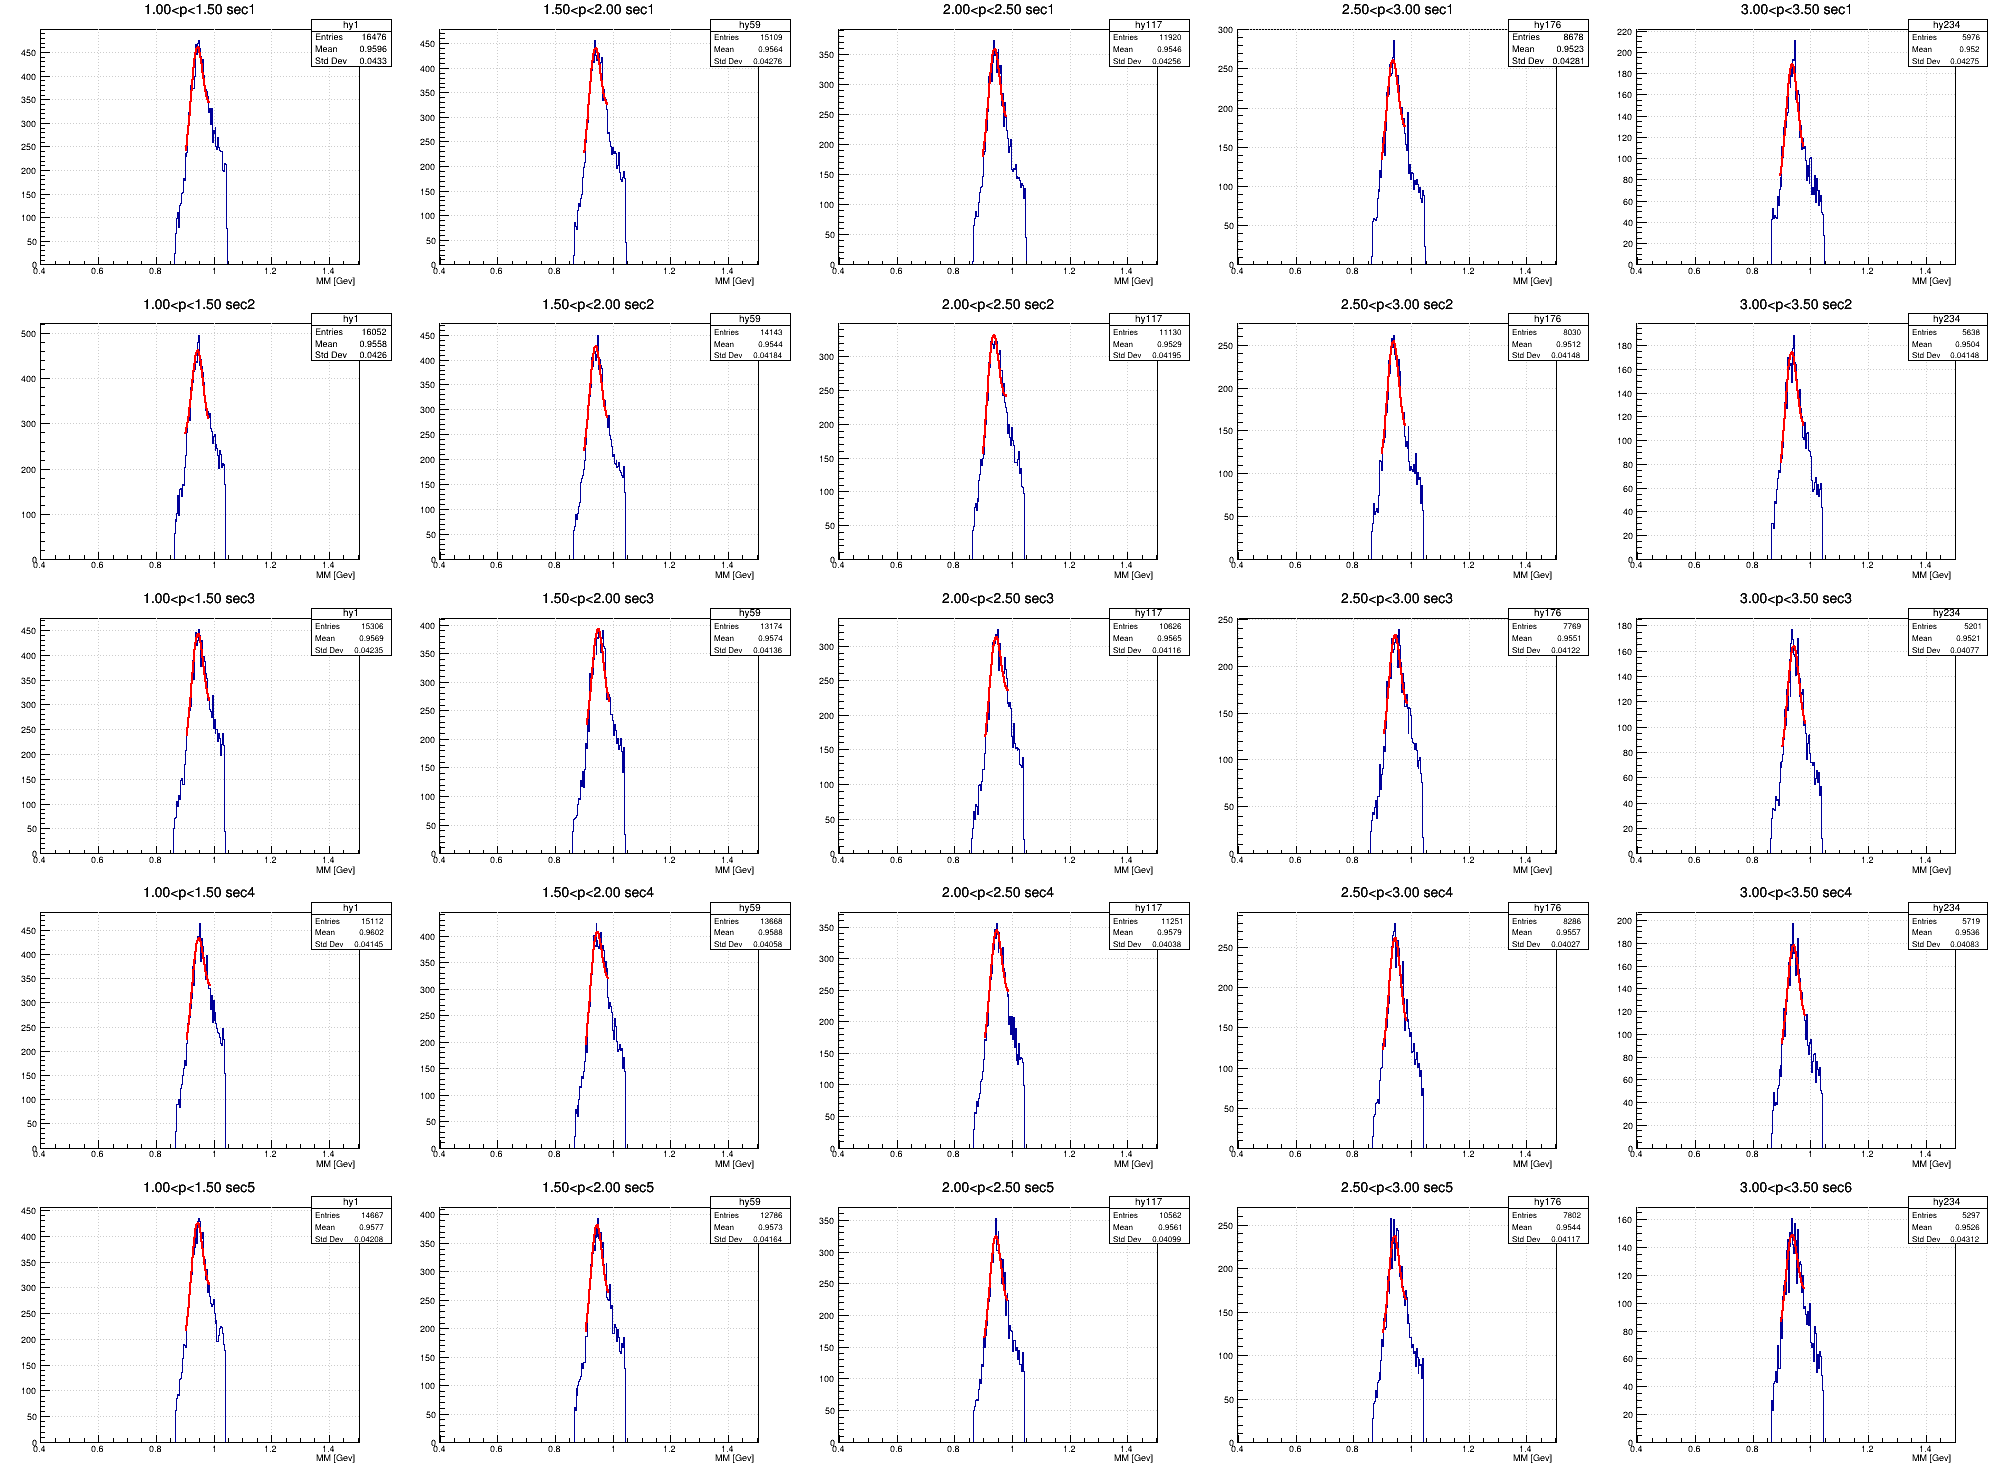

In [ ]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(5,5,0.0001,0.0001)
c2.Draw()


for i in range(5):
    c2.cd(i+1)
    hMM[0][0].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[0][0].hys[i].Draw()   
for i in range(5):
    c2.cd(i+6)
    hMM[0][1].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[0][1].hys[i].Draw()   
for i in range(5):
    c2.cd(i+11)
    hMM[0][2].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[0][2].hys[i].Draw()   
for i in range(5):
    c2.cd(i+16)
    hMM[0][3].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[0][3].hys[i].Draw()   
for i in range(5):
    c2.cd(i+21)
    hMM[0][4].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[0][4].hys[i].Draw()   
for i in range(5):
    c2.cd(i+26)
    hMM[0][5].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[0][5].hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

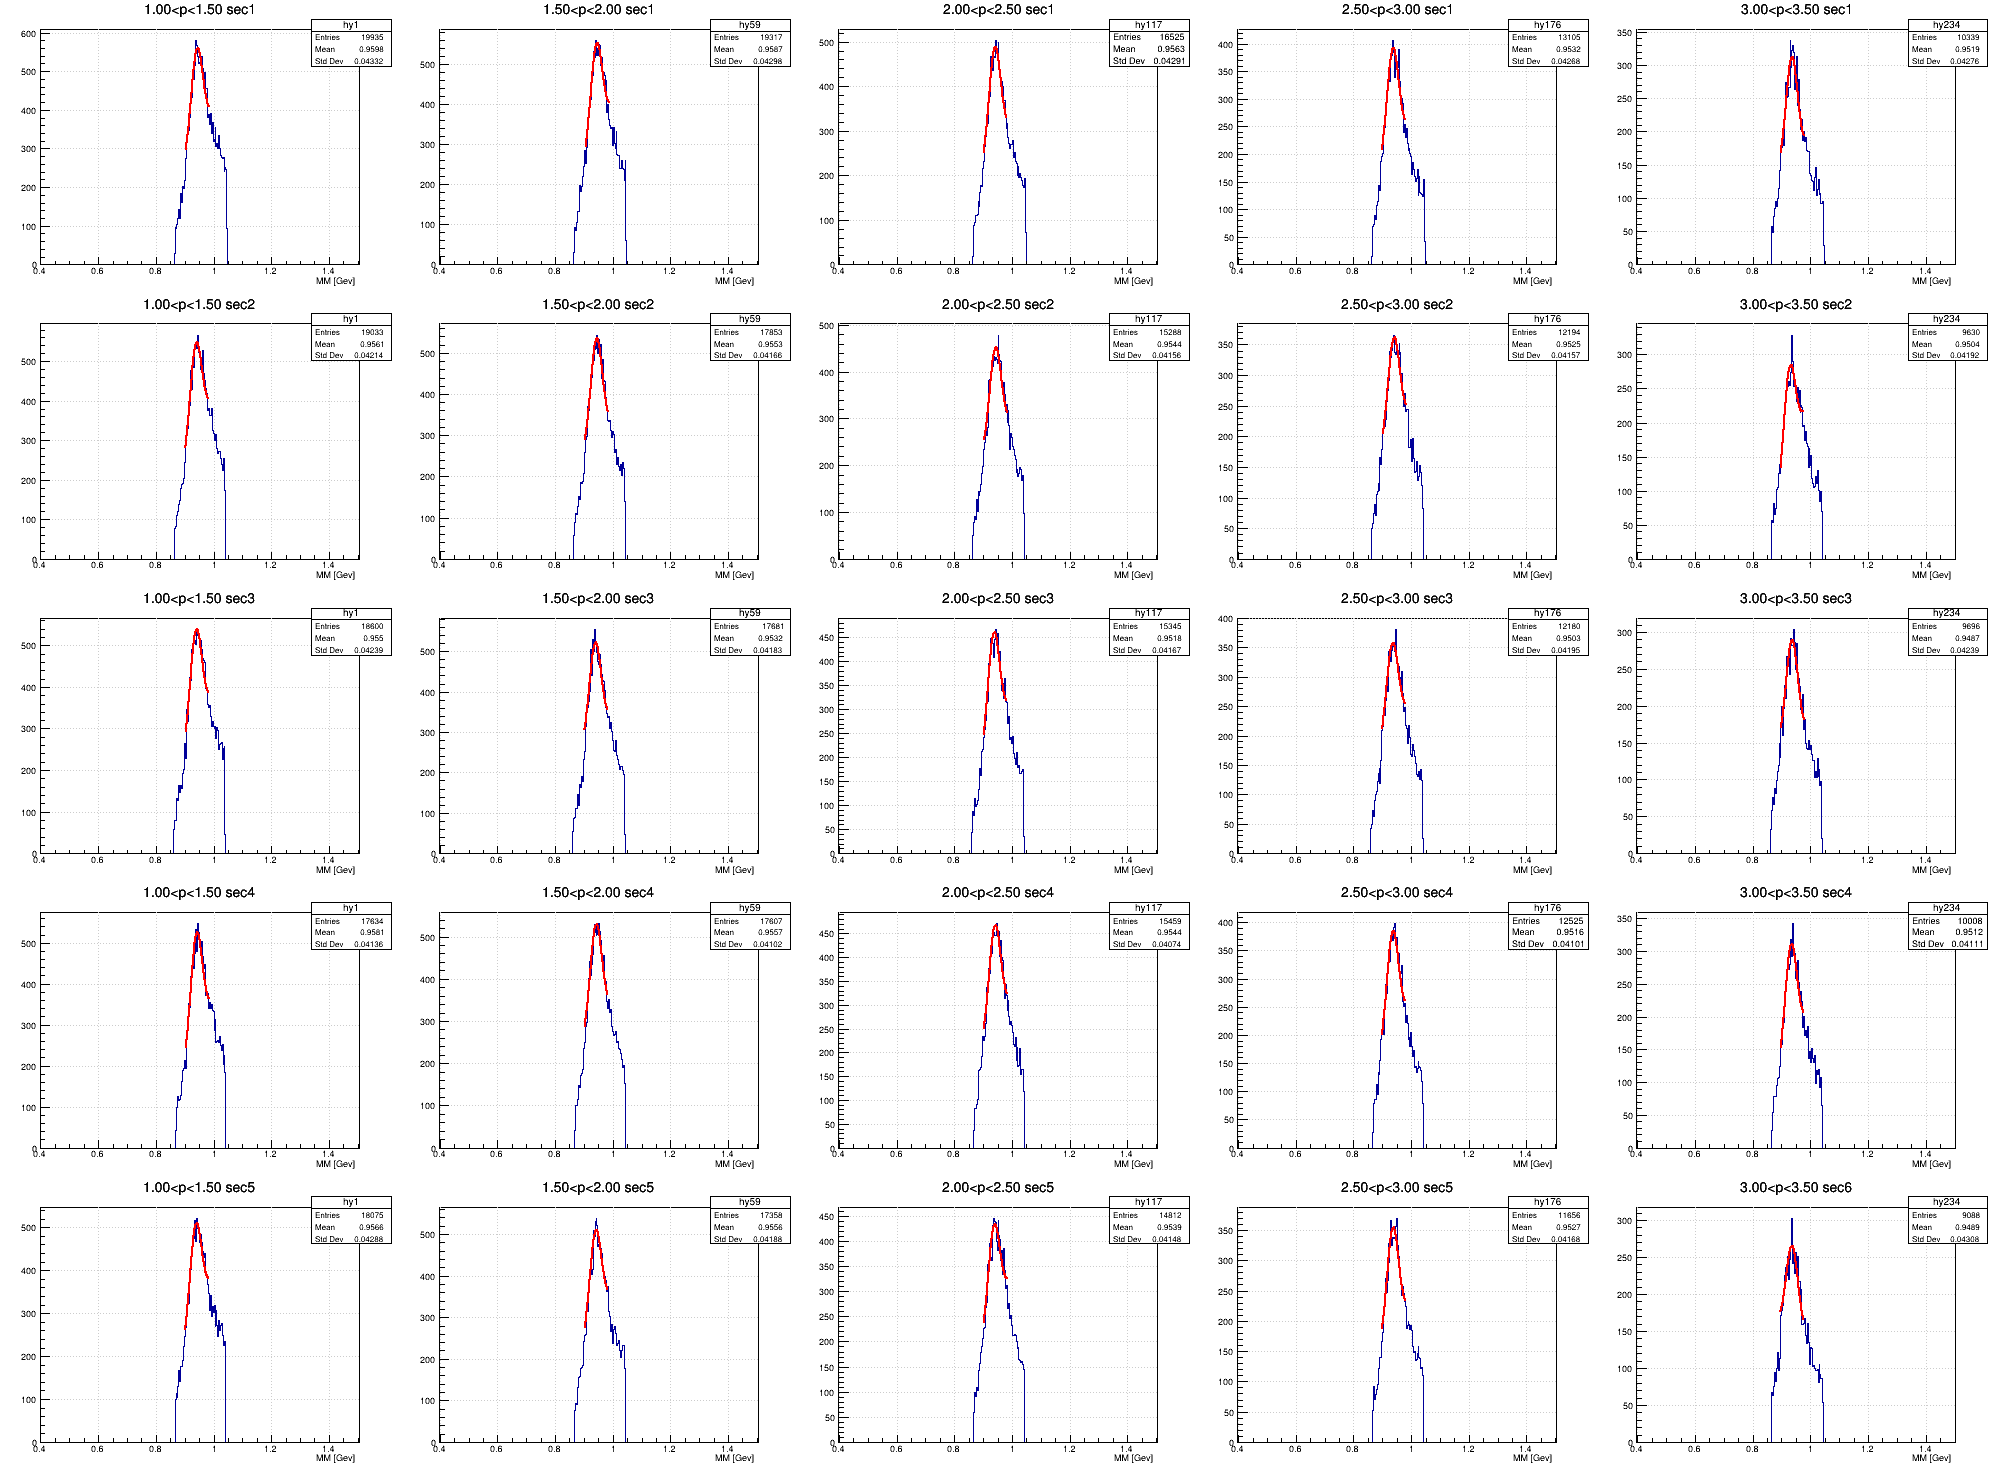

In [5]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(5,5,0.0001,0.0001)
c2.Draw()


for i in range(5):
    c2.cd(i+1)
    hMM[1][0].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[1][0].hys[i].Draw()   
for i in range(5):
    c2.cd(i+6)
    hMM[1][1].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[1][1].hys[i].Draw()   
for i in range(5):
    c2.cd(i+11)
    hMM[1][2].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[1][2].hys[i].Draw()   
for i in range(5):
    c2.cd(i+16)
    hMM[1][3].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[1][3].hys[i].Draw()   
for i in range(5):
    c2.cd(i+21)
    hMM[1][4].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[1][4].hys[i].Draw()   
for i in range(5):
    c2.cd(i+26)
    hMM[1][5].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[1][5].hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

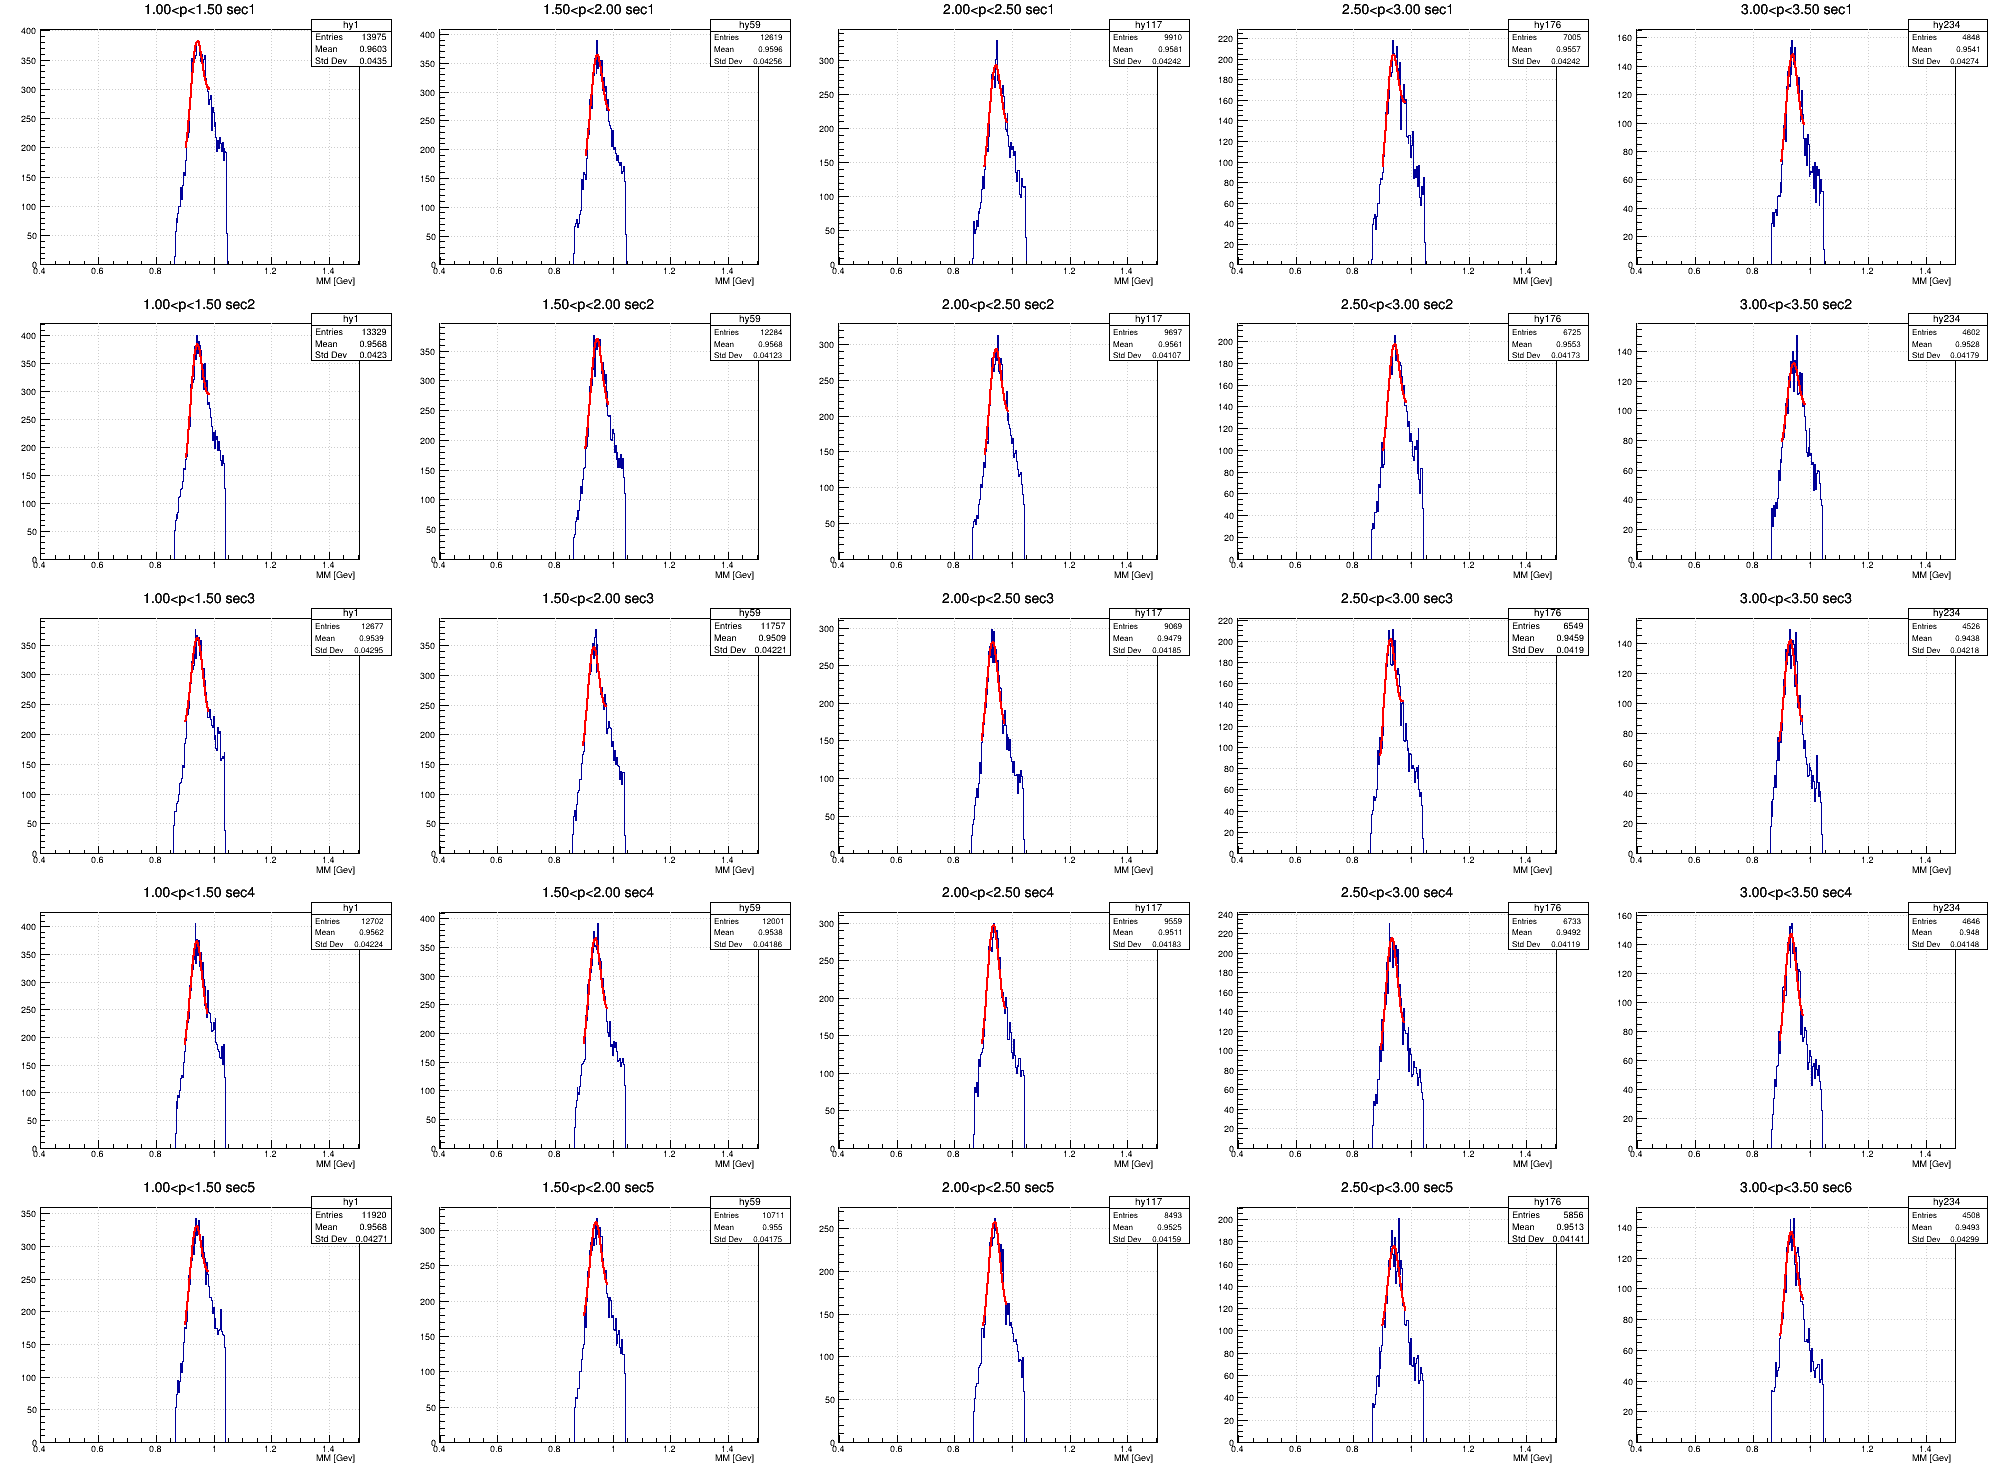

In [6]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(5,5,0.0001,0.0001)
c2.Draw()


for i in range(5):
    c2.cd(i+1)
    hMM[2][0].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[2][0].hys[i].Draw()   
for i in range(5):
    c2.cd(i+6)
    hMM[2][1].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[2][1].hys[i].Draw()   
for i in range(5):
    c2.cd(i+11)
    hMM[2][2].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[2][2].hys[i].Draw()   
for i in range(5):
    c2.cd(i+16)
    hMM[2][3].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[2][3].hys[i].Draw()   
for i in range(5):
    c2.cd(i+21)
    hMM[2][4].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[2][4].hys[i].Draw()   
for i in range(5):
    c2.cd(i+26)
    hMM[2][5].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[2][5].hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file correctionMM.pdf has been created


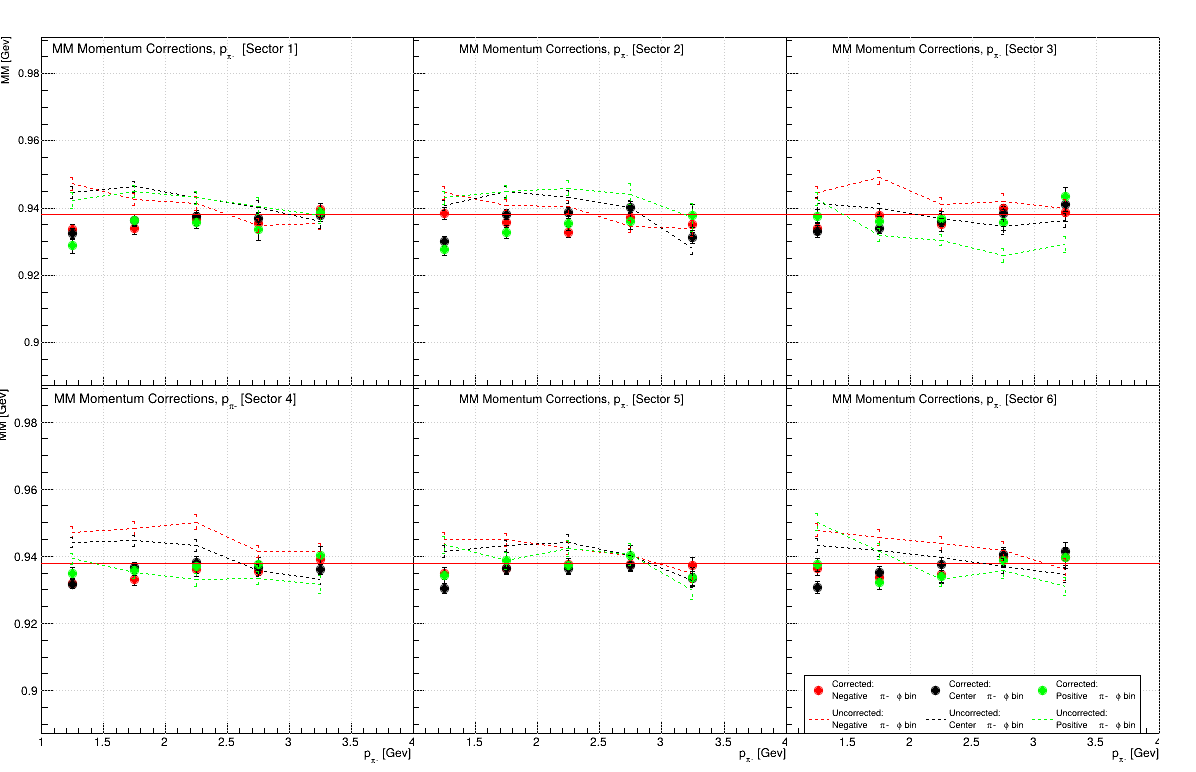

In [3]:
c3 = ROOT.TCanvas("c1","Inbending",1200,800)
c3.Divide(3, 2, 0.000, 0.000)
c3.SetGrid()
ROOT.gStyle.SetAxisColor(16,'xy')
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.45)
ROOT.gStyle.SetLegendTextSize(0.0275)
c3.Draw()

line =  ROOT.TLine(1, 0.938, 4, 0.938)

#legend = ROOT.TLegend(0.6,0.7,0.9,0.9);
legend = ROOT.TLegend(0.05, 0.25, 0.95, 0.1)
legend.SetNColumns(3)
legend.AddEntry(hMM[0][0].gr,"#splitline{Corrected:}{Negative #pi- #phi bin}","P")
legend.AddEntry(hMM[1][0].gr,"#splitline{Corrected:}{Center #pi- #phi bin}","P")
legend.AddEntry(hMM[2][0].gr,"#splitline{Corrected:}{Positive #pi- #phi bin}","P")
legend.AddEntry(hucMM[0][0].gr,"#splitline{Uncorrected:}{Negative #pi- #phi bin}","l")
legend.AddEntry(hucMM[1][0].gr,"#splitline{Uncorrected:}{Center #pi- #phi bin}","l")
legend.AddEntry(hucMM[2][0].gr,"#splitline{Uncorrected:}{Positive #pi- #phi bin}","l")


count = 1

for j in range(0,6):
    c3.cd(count)
    hMM[0][j].Draw("axis")
    hMM[0][j].GetYaxis().SetRangeUser(0.89,0.99)
    hMM[0][j].SetStats(False)
    hMM[0][j].gr.SetMarkerColor(2)
    hMM[0][j].gr.Draw("P")
    hMM[1][j].gr.SetMarkerColor(1)
    hMM[1][j].gr.Draw("P")
    hMM[2][j].gr.SetMarkerColor(3)
    hMM[2][j].gr.Draw("P")
    
    line.SetLineColor(2)
    line.Draw("")
    
    hucMM[0][j].gr.SetLineStyle(2)
    hucMM[0][j].gr.SetLineColor(2)
    hucMM[0][j].gr.Draw("same")
    hucMM[1][j].gr.SetLineStyle(2)
    hucMM[1][j].gr.SetLineColor(1)
    hucMM[1][j].gr.Draw("same")
    hucMM[2][j].gr.SetLineStyle(2)
    hucMM[2][j].gr.SetLineColor(3)
    hucMM[2][j].gr.Draw("same")
    count +=1
    if j ==5:
        legend.Draw()
c3.SaveAs("correctionMM.pdf")

In [10]:
def fit2d3(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(3,6,1), numpy.arange(6, 8,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.25,mx+0.25)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    
    

    
    
def fit2d5(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(3,6,1), numpy.arange(6, 8,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.5,mx+0.5)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    
def fit2d6(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(3,6,1), numpy.arange(6, 8,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-1,mx+1)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    
MMsec1  = rdf.Filter("eppxMC >  0.8642366098397974 && eppxMC <  1.0454116466842018 ")
MMsec2  = rdf.Filter("eppxMC >  0.8627163232410117 && eppxMC <  1.0402051367983691 ")
MMsec3  = rdf.Filter("eppxMC >  0.8598029967105699 && eppxMC <  1.0386833303876495 ")
MMsec4  = rdf.Filter("eppxMC >  0.8669061197273249 && eppxMC <  1.0404095719129092 ")
MMsec5  = rdf.Filter("eppxMC >  0.8657434065027757 && eppxMC <  1.040849723932079 ")
MMsec6  = rdf.Filter("eppxMC >  0.86223416429431 && eppxMC <  1.0433387039434638 ")


sec1E1 = MMsec1.Filter("pimphi < -10 && pimsec == 1")
MMsec1E1e = sec1E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-}  [Sector 1]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec1E2 = MMsec1.Filter("pimphi > -10 && pimphi < 10 && pimsec == 1")
MMsec1E2e = sec1E2.Histo2D(("hpth","MM Momentum Corrections e- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec1E3 = MMsec1.Filter("pimphi > 10 && pimsec == 1")
MMsec1E3e = sec1E3.Histo2D(("hpth","MM Momentum Corrections e- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")

sec2E1 = MMsec2.Filter("pimphi < -10 && pimsec == 2")
MMsec2E1e = sec2E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-}  [Sector 2]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec2E2 = MMsec2.Filter("pimphi > -10 && pimphi < 10 && pimsec == 2")
MMsec2E2e = sec2E2.Histo2D(("hpth","MM Momentum Corrections e- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec2E3 = MMsec2.Filter("pimphi > 10 && pimsec == 2")
MMsec2E3e = sec2E3.Histo2D(("hpth","MM Momentum Corrections e- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")

sec3E1 = MMsec3.Filter("pimphi < -10 && pimsec == 3")
MMsec3E1e = sec3E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-} [Sector 3]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec3E2 = MMsec3.Filter("pimphi > -10 && pimphi < 10 && pimsec == 3")
MMsec3E2e = sec3E2.Histo2D(("hpth","MM Momentum Corrections e- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec3E3 = MMsec3.Filter("pimphi > 10 && pimsec == 3")
MMsec3E3e = sec3E3.Histo2D(("hpth","MM Momentum Corrections e- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")

sec4E1 = MMsec4.Filter("pimphi < -10 && pimsec == 4")
MMsec4E1e = sec4E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-}  [Sector 4]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec4E2 = MMsec4.Filter("pimphi > -10 && pimphi < 10 && pimsec == 4")
MMsec4E2e = sec4E2.Histo2D(("hpth","MM Momentum Corrections e- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec4E3 = MMsec4.Filter("pimphi > 10 && pimsec == 4")
MMsec4E3e = sec4E3.Histo2D(("hpth","MM Momentum Corrections e- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")


sec5E1 = MMsec5.Filter("pimphi < -10 && pimsec == 5")
MMsec5E1e = sec5E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-} [Sector 5]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec5E2 = MMsec5.Filter("pimphi > -10 && pimphi < 10 && pimsec == 5")
MMsec5E2e = sec5E2.Histo2D(("hpth","MM Momentum Corrections e- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec5E3 = MMsec5.Filter("pimphi > 10 && pimsec == 5")
MMsec5E3e = sec5E3.Histo2D(("hpth","MM Momentum Corrections e- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")

sec6E1 = MMsec6.Filter("pimphi < -10 && pimsec == 6")
MMsec6E1e = sec6E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-}  [Sector 6]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec6E2 = MMsec6.Filter("pimphi > -10 && pimphi < 10 && pimsec == 6")
MMsec6E2e = sec6E2.Histo2D(("hpth","MM Momentum Corrections e- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec6E3 = MMsec6.Filter("pimphi >10 && pimsec == 6")
MMsec6E3e = sec6E3.Histo2D(("hpth","MM Momentum Corrections e- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")

line =  ROOT.TLine(2, 0.938, 9, 0.938)
fit2d3(MMsec1E1e,1)
fit2d3(MMsec1E2e,1)
fit2d3(MMsec1E3e,1)

fit2d3(MMsec2E1e,2)
fit2d3(MMsec2E2e,2)
fit2d3(MMsec2E3e,2)

fit2d3(MMsec3E1e,3)
fit2d3(MMsec3E2e,3)
fit2d3(MMsec3E3e,3)

fit2d3(MMsec4E1e,4)
fit2d6(MMsec4E2e,4)
fit2d3(MMsec4E3e,4)

fit2d3(MMsec5E1e,5)
fit2d3(MMsec5E2e,5)
fit2d3(MMsec5E3e,5)

fit2d3(MMsec6E1e,6)
fit2d5(MMsec6E2e,6)
fit2d3(MMsec6E3e,6)
def fit2d3(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(3,6,1), numpy.arange(6, 8,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.15,mx+0.15)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)



MMsec1E1Pe = sec1E1.Histo2D(("hpth","MM Momentum e- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec1E2Pe = sec1E2.Histo2D(("hpth","MM Momentum e- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec1E3Pe = sec1E3.Histo2D(("hpth","MM Momentum e- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")


MMsec2E1Pe = sec2E1.Histo2D(("hpth","MM Momentum e- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec2E2Pe = sec2E2.Histo2D(("hpth","MM Momentum e- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec2E3Pe = sec2E3.Histo2D(("hpth","MM Momentum e- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")

MMsec3E1Pe = sec3E1.Histo2D(("hpth","MM Momentum e- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec3E2Pe = sec3E2.Histo2D(("hpth","MM Momentum e- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec3E3Pe = sec3E3.Histo2D(("hpth","MM Momentum e- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")

MMsec4E1Pe = sec4E1.Histo2D(("hpth","MM Momentum e- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec4E2Pe = sec4E2.Histo2D(("hpth","MM Momentum e- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec4E3Pe = sec4E3.Histo2D(("hpth","MM Momentum e- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")


MMsec5E1Pe = sec5E1.Histo2D(("hpth","MM Momentum e- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec5E2Pe = sec5E2.Histo2D(("hpth","MM Momentum e- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec5E3Pe = sec5E3.Histo2D(("hpth","MM Momentum e- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")

MMsec6E1Pe = sec6E1.Histo2D(("hpth","MM Momentum e- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec6E2Pe = sec6E2.Histo2D(("hpth","MM Momentum e- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec6E3Pe = sec6E3.Histo2D(("hpth","MM Momentum e- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")

fit2d3(MMsec1E1Pe,1)
fit2d3(MMsec1E2Pe,1)
fit2d3(MMsec1E3Pe,1)

fit2d3(MMsec2E1Pe,2)
fit2d3(MMsec2E2Pe,2)
fit2d3(MMsec2E3Pe,2)

fit2d3(MMsec3E1Pe,3)
fit2d3(MMsec3E2Pe,3)
fit2d3(MMsec3E3Pe,3)

fit2d3(MMsec4E1Pe,4)
fit2d3(MMsec4E2Pe,4)
fit2d3(MMsec4E3Pe,4)

fit2d3(MMsec5E1Pe,5)
fit2d3(MMsec5E2Pe,5)
fit2d3(MMsec5E3Pe,5)

fit2d3(MMsec6E1Pe,6)
fit2d3(MMsec6E2Pe,6)
fit2d3(MMsec6E3Pe,6)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <T

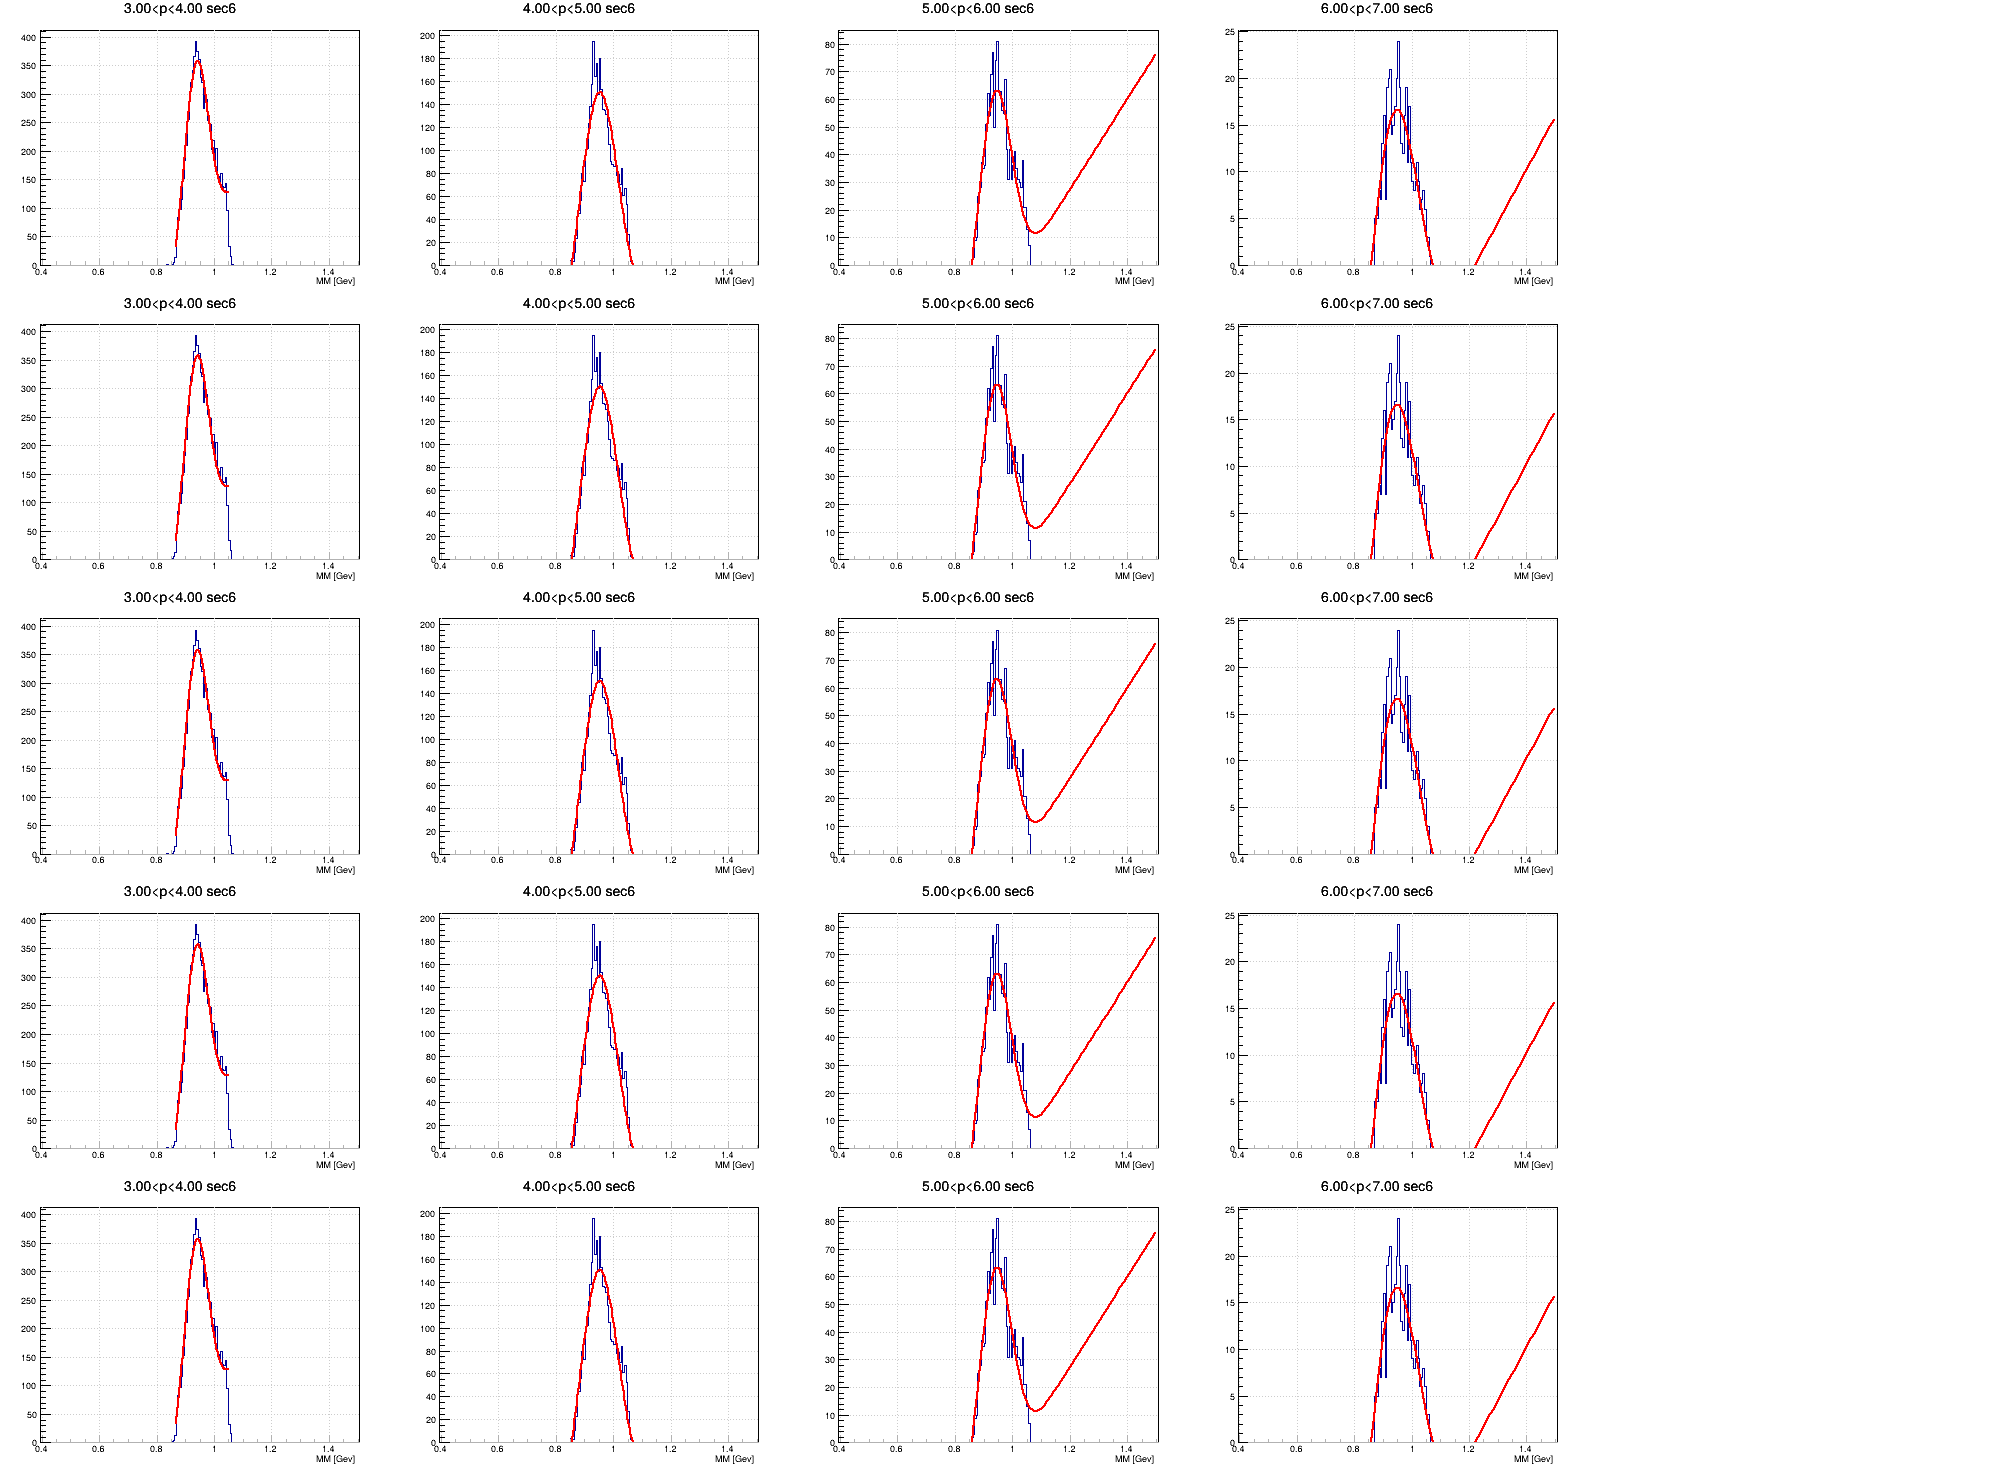

In [11]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(5,5,0.0001,0.0001)
c2.Draw()


for i in range(4):
    c2.cd(i+1)
    MMsec1E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec1E1e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+6)
    MMsec2E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec2E1e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+11)
    MMsec3E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec3E1e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+16)
    MMsec4E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec4E1e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+21)
    MMsec5E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec5E1e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+26)
    MMsec6E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec6E1e.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <T

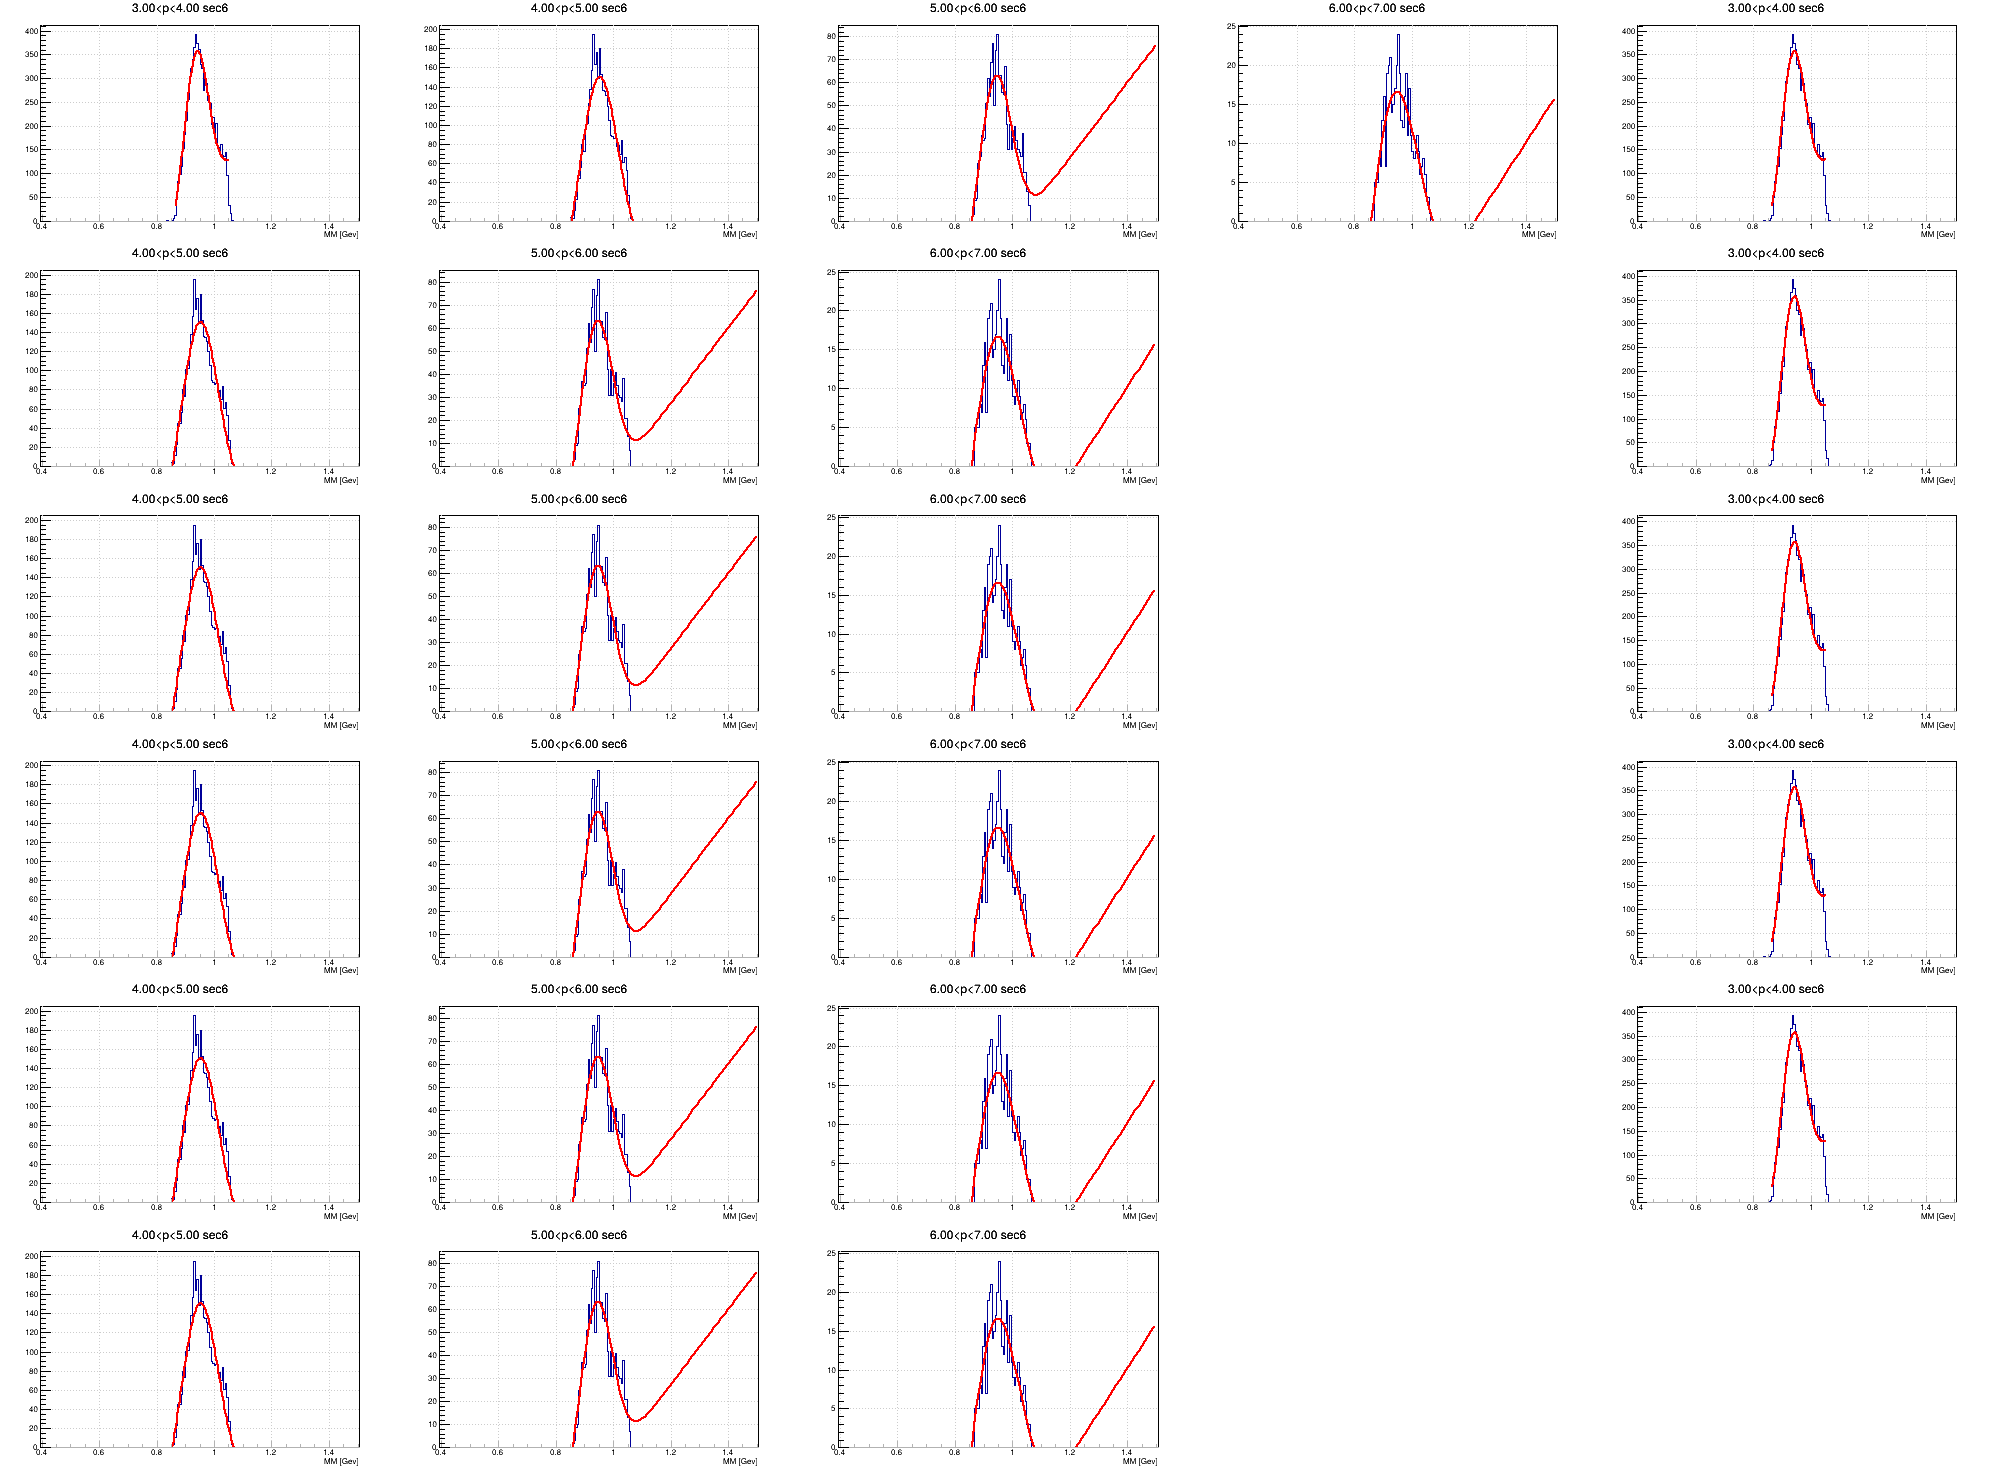

In [12]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(5,6,0.0001,0.0001)
c2.Draw()


for i in range(4):
    c2.cd(i+1)
    MMsec1E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec1E2e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+5)
    MMsec2E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec2E2e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+10)
    MMsec3E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec3E2e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+15)
    MMsec4E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec4E2e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+20)
    MMsec5E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec5E2e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+25)
    MMsec6E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec6E2e.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <T

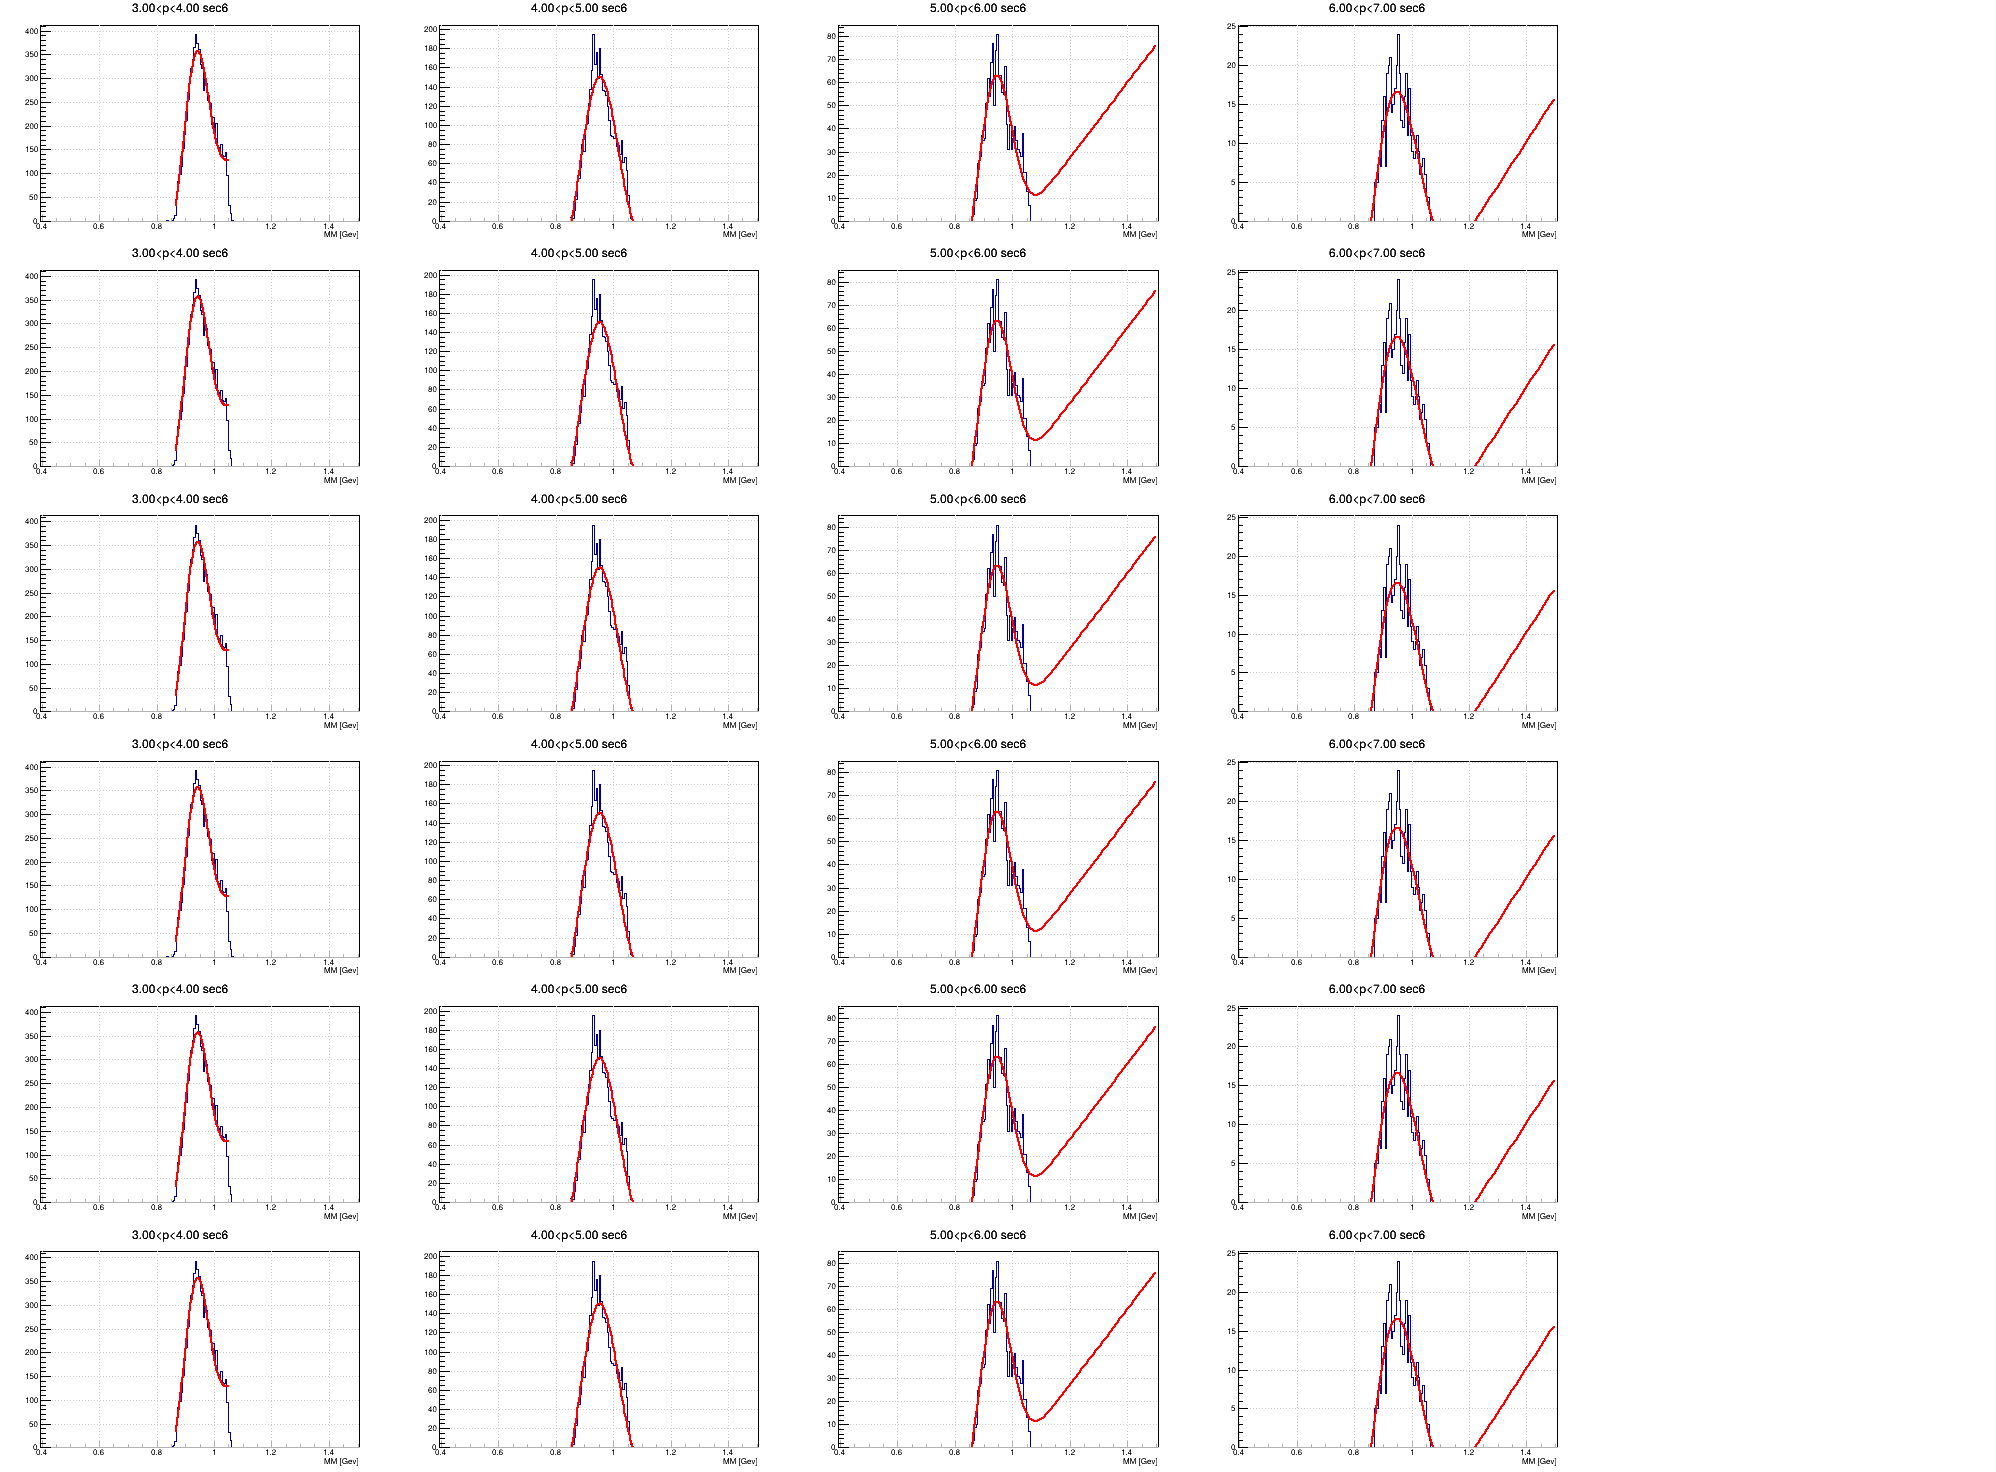

In [13]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(5,6,0.0001,0.0001)
c2.Draw()


for i in range(4):
    c2.cd(i+1)
    MMsec1E3e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec1E3e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+6)
    MMsec2E3e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec2E3e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+11)
    MMsec3E3e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec3E3e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+16)
    MMsec4E3e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec4E3e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+21)
    MMsec5E3e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec5E3e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+26)
    MMsec6E3e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec6E3e.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

In [17]:
c3 = ROOT.TCanvas("c1","Inbending",1200,800)
c3.Divide(3, 2, 0.000, 0.000)
c3.SetGrid()
ROOT.gStyle.SetAxisColor(16,'xy')
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.45)
ROOT.gStyle.SetLegendTextSize(0.0275)
c3.Draw()

line =  ROOT.TLine(2, 0.938, 9, 0.938)

#legend = ROOT.TLegend(0.6,0.7,0.9,0.9);
legend = ROOT.TLegend(0.05, 0.25, 0.95, 0.1)
legend.SetNColumns(3)
legend.AddEntry(MMsec1E1e.gr,"#splitline{Corrected:}{Negative #pi- #phi bin}","P")
legend.AddEntry(MMsec1E2e.gr,"#splitline{Corrected:}{Center #pi- #phi bin}","P")
legend.AddEntry(MMsec1E3e.gr,"#splitline{Corrected:}{Positive #pi- #phi bin}","P")
legend.AddEntry(MMsec1E1Pe.gr,"#splitline{Uncorrected:}{Negative #pi- #phi bin}","l")
legend.AddEntry(MMsec1E2Pe.gr,"#splitline{Uncorrected:}{Center #pi- #phi bin}","l")
legend.AddEntry(MMsec1E3Pe.gr,"#splitline{Uncorrected:}{Positive #pi- #phi bin}","l")


c3.cd(1)
MMsec1E1e.Draw("axis")
MMsec1E1e.GetYaxis().SetRangeUser(0.89,0.99)
MMsec1E1e.SetStats(False)
MMsec1E1e.gr.SetMarkerColor(2)
MMsec1E1e.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec1E2e.gr.Draw("P")
MMsec1E3e.gr.SetMarkerColor(3)
MMsec1E3e.gr.Draw("P")

MMsec1E1Pe.gr.SetLineColor(2)
MMsec1E1Pe.gr.SetLineStyle(2)
MMsec1E1Pe.gr.Draw("L")
MMsec1E2Pe.gr.SetLineStyle(2)
MMsec1E2Pe.gr.Draw("L")
MMsec1E3Pe.gr.SetLineColor(3)
MMsec1E3Pe.gr.SetLineStyle(2)
MMsec1E3Pe.gr.Draw("L")
#legend.Draw() 

c3.cd(2)
MMsec2E1e.Draw("axis")
MMsec2E1e.GetYaxis().SetRangeUser(0.89,0.99)
MMsec2E1e.SetStats(False)
MMsec2E1e.gr.SetMarkerColor(2)
MMsec2E1e.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec2E2e.gr.Draw("P")
MMsec2E3e.gr.SetMarkerColor(3)
MMsec2E3e.gr.Draw("P")


MMsec2E1Pe.gr.SetLineColor(2)
MMsec2E1Pe.gr.SetLineStyle(2)
MMsec2E1Pe.gr.Draw("L")
MMsec2E2Pe.gr.SetLineStyle(2)
MMsec2E2Pe.gr.Draw("L")
MMsec2E3Pe.gr.SetLineColor(3)
MMsec2E3Pe.gr.SetLineStyle(2)
MMsec2E3Pe.gr.Draw("L")
#legend.Draw() 

c3.cd(3)
MMsec3E1e.Draw("axis")
MMsec3E1e.GetYaxis().SetRangeUser(0.89,0.99)
MMsec3E1e.SetStats(False)
MMsec3E1e.gr.SetMarkerColor(2)
MMsec3E1e.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec3E2e.gr.Draw("P")
MMsec3E3e.gr.SetMarkerColor(3)
MMsec3E3e.gr.Draw("P") 

MMsec3E1Pe.gr.SetLineColor(2)
MMsec3E1Pe.gr.SetLineStyle(2)
MMsec3E1Pe.gr.Draw("L")
MMsec3E2Pe.gr.SetLineStyle(2)
MMsec3E2Pe.gr.Draw("L")
MMsec3E3Pe.gr.SetLineColor(3)
MMsec3E3Pe.gr.SetLineStyle(2)
MMsec3E3Pe.gr.Draw("L")
#legend.Draw() 


c3.cd(4)
MMsec4E1e.Draw("axis")
MMsec4E1e.GetYaxis().SetRangeUser(0.89,0.99)
MMsec4E1e.SetStats(False)
MMsec4E1e.gr.SetMarkerColor(2)
MMsec4E1e.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec4E2e.gr.Draw("P")
MMsec4E3e.gr.SetMarkerColor(3)
MMsec4E3e.gr.Draw("P")




MMsec4E1Pe.gr.SetLineColor(2)
MMsec4E1Pe.gr.SetLineStyle(2)
MMsec4E1Pe.gr.Draw("L")
MMsec4E2Pe.gr.SetLineStyle(2)
MMsec4E2Pe.gr.Draw("L")
MMsec4E3Pe.gr.SetLineColor(3)
MMsec4E3Pe.gr.SetLineStyle(2)
MMsec4E3Pe.gr.Draw("L")
#legend.Draw() 

c3.cd(5)
MMsec5E1e.Draw("axis")
MMsec5E1e.GetYaxis().SetRangeUser(0.89,0.99)
MMsec5E1e.SetStats(False)
MMsec5E1e.gr.SetMarkerColor(2)
MMsec5E1e.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec5E2e.gr.Draw("P")
MMsec5E3e.gr.SetMarkerColor(3)
MMsec5E3e.gr.Draw("P")



MMsec5E1Pe.gr.SetLineColor(2)
MMsec5E1Pe.gr.SetLineStyle(2)
MMsec5E1Pe.gr.Draw("L")
MMsec5E2Pe.gr.SetLineStyle(2)
MMsec5E2Pe.gr.Draw("L")
MMsec5E3Pe.gr.SetLineColor(3)
MMsec5E3Pe.gr.SetLineStyle(2)
MMsec5E3Pe.gr.Draw("L")
#legend.Draw() 

c3.cd(6)
MMsec6E1e.Draw("axis")
MMsec6E1e.GetYaxis().SetRangeUser(0.89,0.99)
MMsec6E1e.SetStats(False)
MMsec6E1e.gr.SetMarkerColor(2)
MMsec6E1e.gr.Draw(" P")
line.SetLineColor(2)
line.Draw("")
MMsec6E2e.gr.Draw(" P")
MMsec6E3e.gr.SetMarkerColor(3)
MMsec6E3e.gr.Draw(" P")

MMsec6E1Pe.gr.SetLineColor(2)
MMsec6E1Pe.gr.SetLineStyle(2)
MMsec6E1Pe.gr.Draw(" L")
MMsec6E2Pe.gr.SetLineStyle(2)
MMsec6E2Pe.gr.Draw(" L")
MMsec6E3Pe.gr.SetLineColor(3)
MMsec6E3Pe.gr.SetLineStyle(2)
MMsec6E3Pe.gr.Draw(" L")
legend.Draw() 
c3.Print("pics/Cout_phi/Ele_phi_correction.png")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file pics/Cout_phi/Ele_phi_correction.png has been created


In [2]:


def fit2d2(h2,sec):
    #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(1,3,0.5), numpy.arange(3, 5,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.2,mx+0.2)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1)) 
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    

def fit2d3(h2,sec):
    #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(1,3,0.5), numpy.arange(3, 5,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.15,mx+0.15)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1)) 
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    
    
def fit2d4(h2,sec):
    #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(1,3,0.5), numpy.arange(3, 5,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.5,mx+0.5)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1)) 
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)


MMsec1  = rdf.Filter("eppxMC >  0.8642366098397974 && eppxMC <  1.0454116466842018 ")
MMsec2  = rdf.Filter("eppxMC >  0.8627163232410117 && eppxMC <  1.0402051367983691 ")
MMsec3  = rdf.Filter("eppxMC >  0.8598029967105699 && eppxMC <  1.0386833303876495 ")
MMsec4  = rdf.Filter("eppxMC >  0.8669061197273249 && eppxMC <  1.0404095719129092 ")
MMsec5  = rdf.Filter("eppxMC >  0.8657434065027757 && eppxMC <  1.040849723932079 ")
MMsec6  = rdf.Filter("eppxMC >  0.86223416429431 && eppxMC <  1.0433387039434638 ")



sec1E1 = MMsec1.Filter("pimphi < -10 && pimsec == 1")
MMsec1E1p = sec1E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec1E2 = MMsec1.Filter("pimphi > -10 && pimphi < 10 && pimsec == 1")
MMsec1E2p = sec1E2.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec1E3 = MMsec1.Filter("pimphi > 10 && pimsec == 1")
MMsec1E3p = sec1E3.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

sec2E1 = MMsec2.Filter("pimphi < -10 && pimsec == 2")
MMsec2E1p = sec2E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec2E2 = MMsec2.Filter("pimphi > -10 && pimphi < 10 && pimsec == 2")
MMsec2E2p = sec2E2.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec2E3 = MMsec2.Filter("pimphi > 10 && pimsec == 2")
MMsec2E3p = sec2E3.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

sec3E1 = MMsec3.Filter("pimphi < -10 && pimsec == 3")
MMsec3E1p = sec3E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec3E2 = MMsec3.Filter("pimphi > -10 && pimphi < 10 && pimsec == 3")
MMsec3E2p= sec3E2.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec3E3 = MMsec3.Filter("pimphi > 10 && pimsec == 3")
MMsec3E3p = sec3E3.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

sec4E1 = MMsec4.Filter("pimphi < -10 && pimsec == 4")
MMsec4E1p = sec4E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec4E2 = MMsec4.Filter("pimphi > -10 && pimphi < 10 && pimsec == 4")
MMsec4E2p = sec4E2.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec4E3 = MMsec4.Filter("pimphi > 10 && pimsec == 4")
MMsec4E3p = sec4E3.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")


sec5E1 = MMsec5.Filter("pimphi < -10 && pimsec == 5")
MMsec5E1p = sec5E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec5E2 = MMsec5.Filter("pimphi > -10 && pimphi < 10 && pimsec == 5")
MMsec5E2p = sec5E2.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec5E3 = MMsec5.Filter("pimphi > 10 && pimsec == 5")
MMsec5E3p = sec5E3.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

sec6E1 = MMsec6.Filter("pimphi < -10 && pimsec == 6")
MMsec6E1p = sec6E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec6E2 = MMsec6.Filter("pimphi > -10 && pimphi < 10 && pimsec == 6")
MMsec6E2p = sec6E2.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec6E3 = MMsec6.Filter("pimphi >10 && pimsec == 6")
MMsec6E3p = sec6E3.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

line =  ROOT.TLine(0, 0.938, 6, 0.938)
fit2d2(MMsec1E1p,1)
fit2d2(MMsec1E2p,1)
fit2d2(MMsec1E3p,1)

fit2d3(MMsec2E1p,2)
fit2d4(MMsec2E2p,2)
fit2d2(MMsec2E3p,2)

fit2d2(MMsec3E1p,3)
fit2d2(MMsec3E2p,3)
fit2d2(MMsec3E3p,3)

fit2d2(MMsec4E1p,4)
fit2d2(MMsec4E2p,4)
fit2d2(MMsec4E3p,4)

fit2d2(MMsec5E1p,5)
fit2d2(MMsec5E2p,5)
fit2d2(MMsec5E3p,5)

fit2d2(MMsec6E1p,6)
fit2d2(MMsec6E2p,6)
fit2d2(MMsec6E3p,6)


def fit2d2(h2,sec):
    #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(1,3,0.5), numpy.arange(3, 5,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.15,mx+0.15)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1)) 
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)

MMsec1E1Pp = sec1E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec1E2Pp = sec1E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec1E3Pp = sec1E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")


MMsec2E1Pp = sec2E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec2E2Pp = sec2E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec2E3Pp = sec2E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")

MMsec3E1Pp = sec3E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec3E2Pp = sec3E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec3E3Pp = sec3E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")

MMsec4E1Pp = sec4E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec4E2Pp = sec4E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec4E3Pp = sec4E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")


MMsec5E1Pp = sec5E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec5E2Pp = sec5E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec5E3Pp = sec5E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")

MMsec6E1Pp = sec6E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec6E2Pp = sec6E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec6E3Pp = sec6E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")

fit2d2(MMsec1E1Pp,1)
fit2d2(MMsec1E2Pp,1)
fit2d2(MMsec1E3Pp,1)

fit2d2(MMsec2E1Pp,2)
fit2d2(MMsec2E2Pp,2)
fit2d2(MMsec2E3Pp,2)

fit2d2(MMsec3E1Pp,3)
fit2d4(MMsec3E2Pp,3)
fit2d2(MMsec3E3Pp,3)

fit2d2(MMsec4E1Pp,4)
fit2d2(MMsec4E2Pp,4)
fit2d2(MMsec4E3Pp,4)

fit2d2(MMsec5E1Pp,5)
fit2d(MMsec5E2Pp,5)
fit2d2(MMsec5E3Pp,5)

fit2d2(MMsec6E1Pp,6)
fit2d2(MMsec6E2Pp,6)
fit2d2(MMsec6E3Pp,6)


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 


Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <T

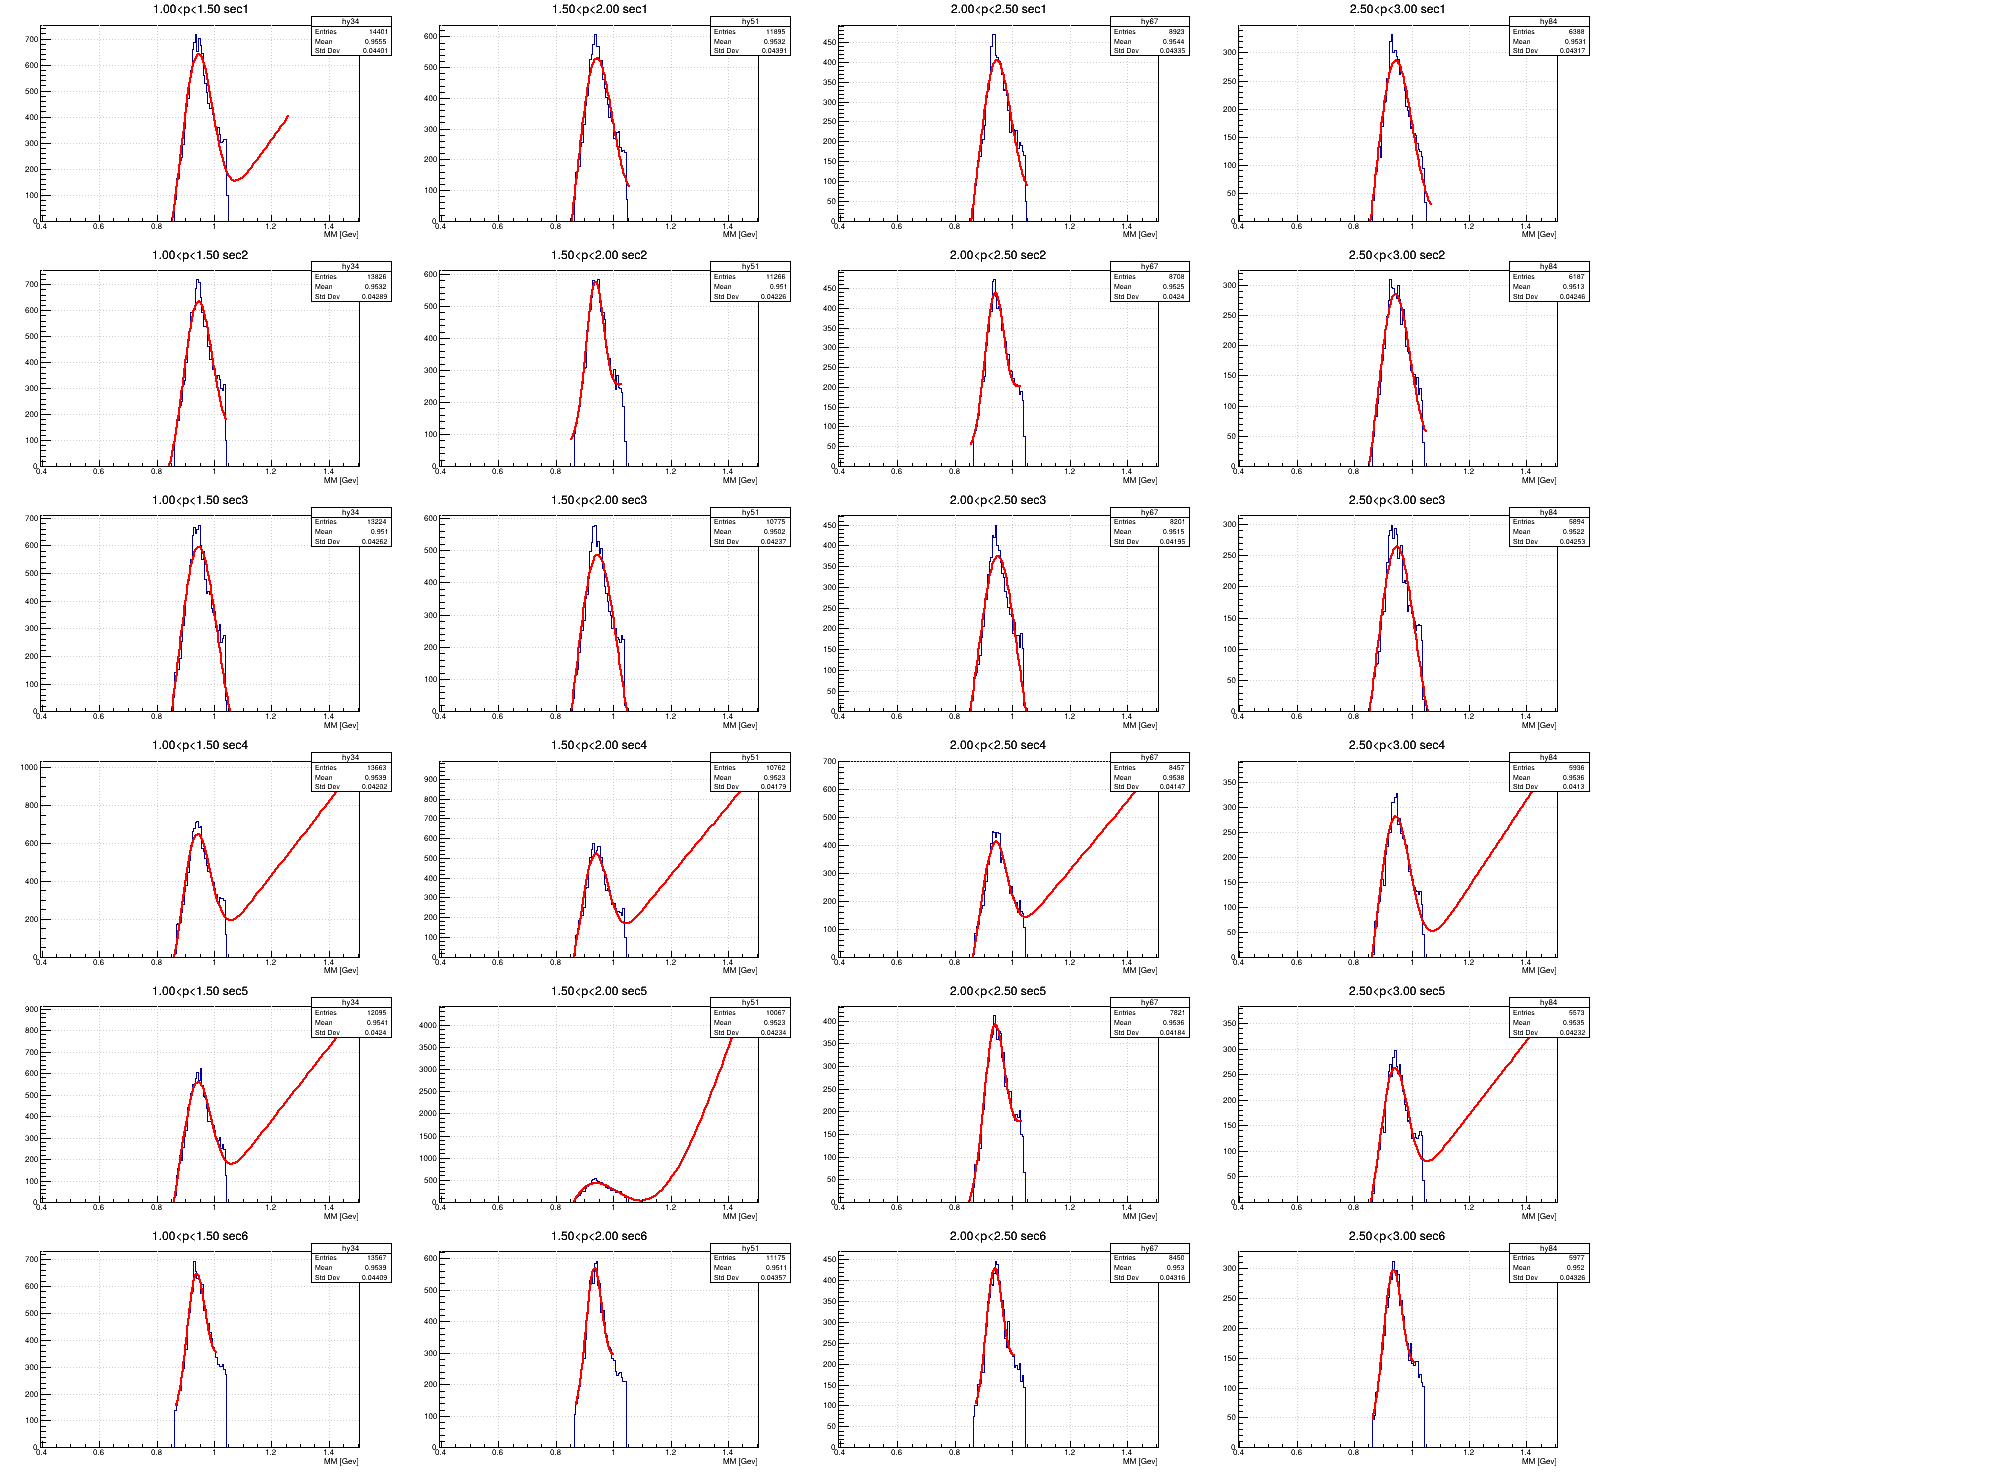

In [3]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(5,6,0.0001,0.0001)
c2.Draw()


for i in range(4):
    c2.cd(i+1)
    MMsec1E3p.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec1E3p.hys[i].Draw()   
for i in range(4):
    c2.cd(i+6)
    MMsec2E3p.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec2E3p.hys[i].Draw()   
for i in range(4):
    c2.cd(i+11)
    MMsec3E3p.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec3E3p.hys[i].Draw()   
for i in range(4):
    c2.cd(i+16)
    MMsec4E3p.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec4E3p.hys[i].Draw()   
for i in range(4):
    c2.cd(i+21)
    MMsec5E3p.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec5E3p.hys[i].Draw()   
for i in range(4):
    c2.cd(i+26)
    MMsec6E3p.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec6E3p.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file pics/Cout_phi/Pip_phi_correction.png has been created


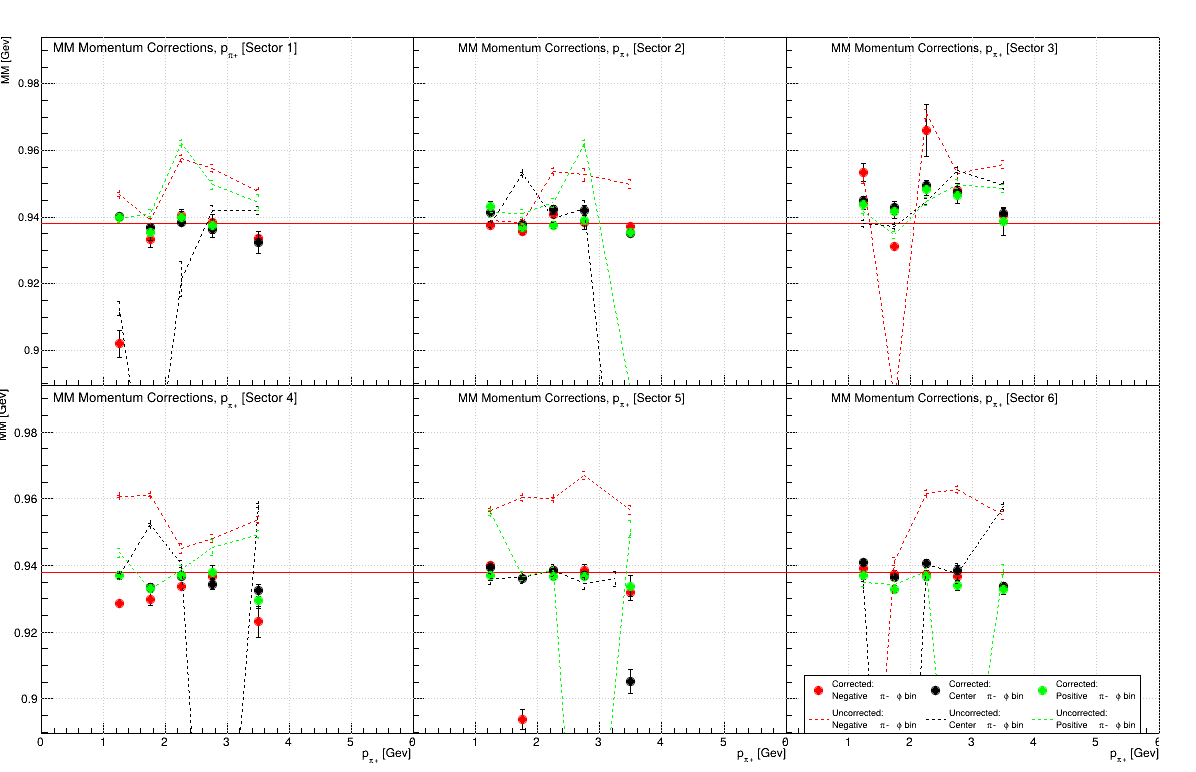

In [4]:
c3 = ROOT.TCanvas("c1","Inbending",1200,800)
c3.Divide(3, 2, 0.000, 0.000)
c3.SetGrid()
ROOT.gStyle.SetAxisColor(16,'xy')
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.45)
ROOT.gStyle.SetLegendTextSize(0.0275)
c3.Draw()

line =  ROOT.TLine(0, 0.938, 6, 0.938)

#legend = ROOT.TLegend(0.6,0.7,0.9,0.9);
legend = ROOT.TLegend(0.05, 0.25, 0.95, 0.1)
legend.SetNColumns(3)
legend.AddEntry(MMsec1E1p.gr,"#splitline{Corrected:}{Negative #pi- #phi bin}","P")
legend.AddEntry(MMsec1E2p.gr,"#splitline{Corrected:}{Center #pi- #phi bin}","P")
legend.AddEntry(MMsec1E3p.gr,"#splitline{Corrected:}{Positive #pi- #phi bin}","P")
legend.AddEntry(MMsec1E1Pp.gr,"#splitline{Uncorrected:}{Negative #pi- #phi bin}","l")
legend.AddEntry(MMsec1E2Pp.gr,"#splitline{Uncorrected:}{Center #pi- #phi bin}","l")
legend.AddEntry(MMsec1E3Pp.gr,"#splitline{Uncorrected:}{Positive #pi- #phi bin}","l")



c3.cd(1)
MMsec1E1p.Draw("axis")
MMsec1E1p.GetYaxis().SetRangeUser(0.89,0.99)
MMsec1E1p.SetStats(False)
MMsec1E1p.gr.SetMarkerColor(2)
MMsec1E1p.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec1E2p.gr.Draw("P")
MMsec1E3p.gr.SetMarkerColor(3)
MMsec1E3p.gr.Draw("P")

MMsec1E1Pp.gr.SetLineColor(2)
MMsec1E1Pp.gr.SetLineStyle(2)
MMsec1E1Pp.gr.Draw("L")
MMsec1E2Pp.gr.SetLineStyle(2)
MMsec1E2Pp.gr.Draw("L")
MMsec1E3Pp.gr.SetLineColor(3)
MMsec1E3Pp.gr.SetLineStyle(2)
MMsec1E3Pp.gr.Draw("L")
#legend.Draw() 

c3.cd(2)
MMsec2E1p.Draw("axis")
MMsec2E1p.GetYaxis().SetRangeUser(0.89,0.99)
MMsec2E1p.SetStats(False)
MMsec2E1p.gr.SetMarkerColor(2)
MMsec2E1p.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec2E2p.gr.Draw("P")
MMsec2E3p.gr.SetMarkerColor(3)
MMsec2E3p.gr.Draw("P")
 


MMsec2E1Pp.gr.SetLineColor(2)
MMsec2E1Pp.gr.SetLineStyle(2)
MMsec2E1Pp.gr.Draw("L")
MMsec2E2Pp.gr.SetLineStyle(2)
MMsec2E2Pp.gr.Draw("L")
MMsec2E3Pp.gr.SetLineColor(3)
MMsec2E3Pp.gr.SetLineStyle(2)
MMsec2E3Pp.gr.Draw("L")
#legend.Draw() 

c3.cd(3)
MMsec3E1p.Draw("axis")
MMsec3E1p.GetYaxis().SetRangeUser(0.89,0.99)
MMsec3E1p.SetStats(False)
MMsec3E1p.gr.SetMarkerColor(2)
MMsec3E1p.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec3E2p.gr.Draw("P")
MMsec3E3p.gr.SetMarkerColor(3)
MMsec3E3p.gr.Draw("P")
 

MMsec3E1Pp.gr.SetLineColor(2)
MMsec3E1Pp.gr.SetLineStyle(2)
MMsec3E1Pp.gr.Draw("L")
MMsec3E2Pp.gr.SetLineStyle(2)
MMsec3E2Pp.gr.Draw("L")
MMsec3E3Pp.gr.SetLineColor(3)
MMsec3E3Pp.gr.SetLineStyle(2)
MMsec3E3Pp.gr.Draw("L")
#legend.Draw() 


c3.cd(4)
MMsec4E1p.Draw("axis")
MMsec4E1p.GetYaxis().SetRangeUser(0.89,0.99)
MMsec4E1p.SetStats(False)
MMsec4E1p.gr.SetMarkerColor(2)
MMsec4E1p.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec4E2p.gr.Draw("P")
MMsec4E3p.gr.SetMarkerColor(3)
MMsec4E3p.gr.Draw("P")
 



MMsec4E1Pp.gr.SetLineColor(2)
MMsec4E1Pp.gr.SetLineStyle(2)
MMsec4E1Pp.gr.Draw("L")
MMsec4E2Pp.gr.SetLineStyle(2)
MMsec4E2Pp.gr.Draw("L")
MMsec4E3Pp.gr.SetLineColor(3)
MMsec4E3Pp.gr.SetLineStyle(2)
MMsec4E3Pp.gr.Draw("L")
#legend.Draw() 

c3.cd(5)
MMsec5E1p.Draw("axis")
MMsec5E1p.GetYaxis().SetRangeUser(0.89,0.99)
MMsec5E1p.SetStats(False)
MMsec5E1p.gr.SetMarkerColor(2)
MMsec5E1p.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec5E2p.gr.Draw("P")
MMsec5E3p.gr.SetMarkerColor(3)
MMsec5E3p.gr.Draw("P")



MMsec5E1Pp.gr.SetLineColor(2)
MMsec5E1Pp.gr.SetLineStyle(2)
MMsec5E1Pp.gr.Draw("L")
MMsec5E2Pp.gr.SetLineStyle(2)
MMsec5E2Pp.gr.Draw("L")
MMsec5E3Pp.gr.SetLineColor(3)
MMsec5E3Pp.gr.SetLineStyle(2)
MMsec5E3Pp.gr.Draw("L")
#legend.Draw() 

c3.cd(6)
MMsec6E1p.Draw("axis")
MMsec6E1p.GetYaxis().SetRangeUser(0.89,0.99)
MMsec6E1p.SetStats(False)
MMsec6E1p.gr.SetMarkerColor(2)
MMsec6E1p.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")

MMsec6E2p.gr.Draw("P")
MMsec6E3p.gr.SetMarkerColor(3)
MMsec6E3p.gr.Draw("P")

MMsec6E1Pp.gr.SetLineColor(2)
MMsec6E1Pp.gr.SetLineStyle(2)
MMsec6E1Pp.gr.Draw("L")

MMsec6E2Pp.gr.SetLineStyle(2)
MMsec6E2Pp.gr.Draw("L")
MMsec6E3Pp.gr.SetLineColor(3)
MMsec6E3Pp.gr.SetLineStyle(2)
MMsec6E3Pp.gr.Draw("L")
legend.Draw() 
c3.Print("pics/Cout_phi/Pip_phi_correction.png")


## delta P Correction

In [ ]:
%reset -f 
import ROOT, numpy

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

#rdf = ROOT.RDataFrame("h22","/volatile/clas12/kenjo/ntuple_epippimp/inb/skim8_005*")
#rdf = ROOT.RDataFrame("h22","/volatile/clas12/kenjo/ntuple_epippimp/inb/lvl1_eppimpip.skim4_005*")
#fname = "/lustre19/expphy/volatile/clas12/trotta/wagon/RhoWagon/PyAnalysis/data/inb/epPipPim.inb.qa.nSidis_005*"
fname = "/work/clas12/trottan/rhoAnalysis/Pass2/FD/inData/*.root"



rdf = ROOT.RDataFrame("h22",fname)


rdf = rdf.Define("vals","""
auto ele = ROOT::Math::PxPyPzMVector(ex,ey,ez,0);
auto pip = ROOT::Math::PxPyPzMVector(pipx,pipy,pipz,0.1395);
auto pim = ROOT::Math::PxPyPzMVector(pimx,pimy,pimz,0.1395);
auto beam = ROOT::Math::PxPyPzMVector(0,0,10.6041,0);
auto targ = ROOT::Math::PxPyPzMVector(0,0,0,0.938);

 auto eloss_pip = [&](double pion_p, double pip_theta, double pion_det, bool outbending){
    // momentum loss correction for low momentum pions:
    // input: p = pion momentum in GeV, pip_theta = pion theta in degree, 
    //        pion_det = pion detector (2 = FD, 3 = CD),  outbending = torus polarity
    // output: dp_pion = generated momentum - reconstructed momentum = momentum loss (+) / gain (-)

    double dp_pion = 0.0;

    if(outbending == false){ // INBENDING
        if(pion_det == 2){   // Forward Detector
            if(pip_theta < 27){                                       dp_pion =  0.00342646 + (-0.00282934) *pion_p + (0.00205983)   *pow(pion_p,2) + (-0.00043158)  *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta < 27 && pion_p >= 2.5){                      dp_pion =  0.00342646 + (-0.00282934) *2.5    + (0.00205983)   *pow(2.5,2)    + (-0.00043158)  *pow(2.5,3)    + (0) *pow(2.5,4);}
            if(pip_theta > 27 && pip_theta < 28){                     dp_pion =  0.00328565 + (-0.00376042) *pion_p + (0.00433886)   *pow(pion_p,2) + (-0.00141614)  *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 27 && pip_theta < 28 && pion_p >= 1.83){   dp_pion =  0.00328565 + (-0.00376042) *1.83   + (0.00433886)   *pow(1.83,2)   + (-0.00141614)  *pow(1.83,3)   + (0) *pow(1.83,4);}
            if(pip_theta > 28 && pip_theta < 29){                     dp_pion =  0.00328579 + (-0.00281121) *pion_p + (0.00342749)   *pow(pion_p,2) + (-0.000932614) *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 28 && pip_theta < 29 && pion_p >= 2){      dp_pion =  0.00328579 + (-0.00281121) *2      + (0.00342749)   *pow(2,2)      + (-0.000932614) *pow(2,3)      + (0) *pow(2,4);}
            if(pip_theta > 29 && pip_theta < 30){                     dp_pion =  0.00167358 + (0.00441871)  *pion_p + (-0.000834667) *pow(pion_p,2) + (-0.000137968) *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 29 && pip_theta < 30 && pion_p >= 1.9){    dp_pion =  0.00167358 + (0.00441871)  *1.9    + (-0.000834667) *pow(1.9,2)    + (-0.000137968) *pow(1.9,3)    + (0) *pow(1.9,4);}
            if(pip_theta > 30 && pip_theta < 31){                     dp_pion =  0.00274159 + (0.00635686)  *pion_p + (-0.00380977)  *pow(pion_p,2) + (0.00071627)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 30 && pip_theta < 31 && pion_p >= 1.9){    dp_pion =  0.00274159 + (0.00635686)  *1.9    + (-0.00380977)  *pow(1.9,2)    + (0.00071627)   *pow(1.9,3)    + (0) *pow(1.9,4);}
            if(pip_theta > 31 && pip_theta < 32){                     dp_pion =  0.00450241 + (0.00248969)  *pion_p + (-0.00336795)  *pow(pion_p,2) + (0.00111193)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 31 && pip_theta < 32 && pion_p >= 1.8){    dp_pion =  0.00450241 + (0.00248969)  *1.8    + (-0.00336795)  *pow(1.8,2)    + (0.00111193)   *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 32 && pip_theta < 33){                     dp_pion =  0.00505593 + (-0.00246203) *pion_p + (0.00172984)   *pow(pion_p,2) + (-0.000406701) *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 32 && pip_theta < 33 && pion_p >= 1.8){    dp_pion =  0.00505593 + (-0.00246203) *1.8    + (0.00172984)   *pow(1.8,2)    + (-0.000406701) *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 33 && pip_theta < 34){                     dp_pion =  0.00273402 + (0.00440449)  *pion_p + (-0.00373488)  *pow(pion_p,2) + (0.000996612)  *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 33 && pip_theta < 34 && pion_p >= 1.8){    dp_pion =  0.00273402 + (0.00440449)  *1.8    + (-0.00373488)  *pow(1.8,2)    + (0.000996612)  *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 34 && pip_theta < 35){                     dp_pion =  0.00333542 + (0.00439874)  *pion_p + (-0.00397776)  *pow(pion_p,2) + (0.00105586)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 34 && pip_theta < 35 && pion_p >= 1.8){    dp_pion =  0.00333542 + (0.00439874)  *1.8    + (-0.00397776)  *pow(1.8,2)    + (0.00105586)   *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 35 && pip_theta < 36){                     dp_pion =  0.00354663 + (0.00565397)  *pion_p + (-0.00513503)  *pow(pion_p,2) + (0.00153346)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 35 && pip_theta < 36 && pion_p >= 1.8){    dp_pion =  0.00354663 + (0.00565397)  *1.8    + (-0.00513503)  *pow(1.8,2)    + (0.00153346)   *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 36 && pip_theta < 37){                     dp_pion =  0.00333909 + (0.00842367)  *pion_p + (-0.0077321)   *pow(pion_p,2) + (0.0022489)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 36 && pip_theta < 37 && pion_p >= 1.8){    dp_pion =  0.00333909 + (0.00842367)  *1.8    + (-0.0077321)   *pow(1.8,2)    + (0.0022489)    *pow(1.8,3)    + (0) *pow(1.8,4);}
            if(pip_theta > 37 && pip_theta < 38){                     dp_pion =  0.00358828 + (0.0112108)   *pion_p + (-0.0133854)   *pow(pion_p,2) + (0.00486924)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 37 && pip_theta < 38 && pion_p >= 1.4){    dp_pion =  0.00358828 + (0.0112108)   *1.4    + (-0.0133854)   *pow(1.4,2)    + (0.00486924)   *pow(1.4,3)    + (0) *pow(1.4,4);}
            if(pip_theta > 38 && pip_theta < 39){                     dp_pion =  0.00354343 + (0.0117121)   *pion_p + (-0.0129649)   *pow(pion_p,2) + (0.00455602)   *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 38 && pip_theta < 39 && pion_p >= 1.3){    dp_pion =  0.00354343 + (0.0117121)   *1.3    + (-0.0129649)   *pow(1.3,2)    + (0.00455602)   *pow(1.3,3)    + (0) *pow(1.3,4);}
            if(pip_theta > 39 && pip_theta < 40){                     dp_pion = -0.00194951 + (0.0409713)   *pion_p + (-0.0595861)   *pow(pion_p,2) + (0.0281588)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 39 && pip_theta < 40 && pion_p >= 0.9){    dp_pion = -0.00194951 + (0.0409713)   *0.9    + (-0.0595861)   *pow(0.9,2)    + (0.0281588)    *pow(0.9,3)    + (0) *pow(0.9,4);}
            if(pip_theta > 40 && pip_theta < 41){                     dp_pion = -0.0099217  + (0.0808096)   *pion_p + (-0.119836)    *pow(pion_p,2) + (0.0559553)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 40 && pip_theta < 41 && pion_p >= 0.75){   dp_pion = -0.0099217  + (0.0808096)   *0.75   + (-0.119836)    *pow(0.75,2)   + (0.0559553)    *pow(0.75,3)   + (0) *pow(0.75,4);}
            if(pip_theta > 41 && pip_theta < 42){                     dp_pion =  0.00854898 + (0.00025037)  *pion_p + (-0.0113992)   *pow(pion_p,2) + (0.0145178)    *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 41 && pip_theta < 42 && pion_p >= 0.65){   dp_pion =  0.00854898 + (0.00025037)  *0.65   + (-0.0113992)   *pow(0.65,2)   + (0.0145178)    *pow(0.65,3)   + (0) *pow(0.65,4);}
            if(pip_theta > 42){                                       dp_pion =  0.00564818 + (0.00706606)  *pion_p + (0.0042602)    *pow(pion_p,2) + (-0.01141)     *pow(pion_p,3) + (0) *pow(pion_p,4);}
            if(pip_theta > 42 && pion_p >= 0.65){                     dp_pion =  0.00564818 + (0.00706606)  *0.65   + (0.0042602)    *pow(0.65,2)   + (-0.01141)     *pow(0.65,3)   + (0) *pow(0.65,4);}
        }
        if(pion_det == 3){  // Central Detector
            if(pip_theta < 39){                                       dp_pion = -0.045      + (-0.102652) + (0.455589) *pion_p + (-0.671635)   *pow(pion_p,2) + (0.303814)   *pow(pion_p,3);}
            if(pip_theta < 39  && pion_p >= 0.7){                     dp_pion = -0.045      + (-0.102652) + (0.455589) *0.7    + (-0.671635)   *pow(0.7,2)    + (0.303814)   *pow(0.7,3);}
            if(pip_theta > 39  && pip_theta < 40){                    dp_pion =  0.0684552  + (-0.766492)              *pion_p + (1.73092)     *pow(pion_p,2) + (-1.46215)   *pow(pion_p,3) + (0.420127) *pow(pion_p,4);}
            if(pip_theta > 39  && pip_theta < 40 && pion_p >= 1.4){   dp_pion =  0.0684552  + (-0.766492)              *1.4    + (1.73092)     *pow(1.4,2)    + (-1.46215)   *pow(1.4,3)    + (0.420127) *pow(1.4,4);}
            if(pip_theta > 40  && pip_theta < 41){                    dp_pion =  0.751549   + (-7.4593)                *pion_p + (26.8037)     *pow(pion_p,2) + (-47.1576)   *pow(pion_p,3) + (43.8527)  *pow(pion_p,4) + (-20.7039) *pow(pion_p,5) + (3.90931)  *pow(pion_p,6);}
            if(pip_theta > 40  && pip_theta < 41 && pion_p >= 1.45){  dp_pion =  0.751549   + (-7.4593)                *1.45   + (26.8037)     *pow(1.45,2)   + (-47.1576)   *pow(1.45,3)   + (43.8527)  *pow(1.45,4)   + (-20.7039) *pow(1.45,5)   + (3.90931)  *pow(1.45,6);}
            if(pip_theta > 41  && pip_theta < 42){                    dp_pion = -1.35043    + (10.0788)                *pion_p + (-30.4829)    *pow(pion_p,2) + (47.7792)    *pow(pion_p,3) + (-40.996)  *pow(pion_p,4) + (18.2662)  *pow(pion_p,5) + (-3.30449) *pow(pion_p,6);}
            if(pip_theta > 41  && pip_theta < 42 && pion_p >= 1.2){   dp_pion = -1.35043    + (10.0788)                *1.2    + (-30.4829)    *pow(1.2,2)    + (47.7792)    *pow(1.2,3)    + (-40.996)  *pow(1.2,4)    + (18.2662)  *pow(1.2,5)    + (-3.30449) *pow(1.2,6);}
            if(pip_theta > 42  && pip_theta < 43){                    dp_pion = -0.0231195  + (0.0744589)              *pion_p + (-0.0807029)  *pow(pion_p,2) + (0.0264266)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 42  && pip_theta < 43 && pion_p >= 1.3){   dp_pion = -0.0231195  + (0.0744589)              *1.3    + (-0.0807029)  *pow(1.3,2)    + (0.0264266)  *pow(1.3,3)    + (0)        *pow(1.3,4);}
            if(pip_theta > 43  && pip_theta < 44){                    dp_pion = -0.00979928 + (0.0351043)              *pion_p + (-0.0365865)  *pow(pion_p,2) + (0.00977218) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 43  && pip_theta < 44 && pion_p >= 1.1){   dp_pion = -0.00979928 + (0.0351043)              *1.1    + (-0.0365865)  *pow(1.1,2)    + (0.00977218) *pow(1.1,3)    + (0)        *pow(1.1,4);}
            if(pip_theta > 44  && pip_theta < 45){                    dp_pion =  0.00108491 + (-0.00924885)            *pion_p + (0.0216431)   *pow(pion_p,2) + (-0.0137762) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 44  && pip_theta < 45 && pion_p >= 1.1){   dp_pion =  0.00108491 + (-0.00924885)            *1.1    + (0.0216431)   *pow(1.1,2)    + (-0.0137762) *pow(1.1,3)    + (0)        *pow(1.1,4);}
            if(pip_theta > 45  && pip_theta < 55){                    dp_pion =  0.0092263  + (-0.0676178)             *pion_p + (0.168778)    *pow(pion_p,2) + (-0.167463)  *pow(pion_p,3) + (0.05661)  *pow(pion_p,4);}
            if(pip_theta > 45  && pip_theta < 55 && pion_p >= 1.3){   dp_pion =  0.0092263  + (-0.0676178)             *1.3    + (0.168778)    *pow(1.3,2)    + (-0.167463)  *pow(1.3,3)    + (0.05661)  *pow(1.3,4);}
            if(pip_theta > 55  && pip_theta < 65){                    dp_pion =  0.00805642 + (-0.0670962)             *pion_p + (0.188536)    *pow(pion_p,2) + (-0.20571)   *pow(pion_p,3) + (0.0765)   *pow(pion_p,4);}
            if(pip_theta > 55  && pip_theta < 65 && pion_p >= 1.05){  dp_pion =  0.00805642 + (-0.0670962)             *1.05   + (0.188536)    *pow(1.05,2)   + (-0.20571)   *pow(1.05,3)   + (0.0765)   *pow(1.05,4);}
            if(pip_theta > 65  && pip_theta < 75){                    dp_pion =  0.00312202 + (-0.0269717)             *pion_p + (0.0715236)   *pow(pion_p,2) + (-0.0545622) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 65  && pip_theta < 75 && pion_p >= 0.75){  dp_pion =  0.00312202 + (-0.0269717)             *0.75   + (0.0715236)   *pow(0.75,2)   + (-0.0545622) *pow(0.75,3)   + (0)        *pow(0.75,4);}
            if(pip_theta > 75  && pip_theta < 85){                    dp_pion =  0.00424971 + (-0.0367683)             *pion_p + (0.10417)     *pow(pion_p,2) + (-0.0899651) *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 75  && pip_theta < 85 && pion_p >= 0.65){  dp_pion =  0.00424971 + (-0.0367683)             *0.65   + (0.10417)     *pow(0.65,2)   + (-0.0899651) *pow(0.65,3)   + (0)        *pow(0.65,4);}
            if(pip_theta > 85  && pip_theta < 95){                    dp_pion =  0.00654123 + (-0.0517915)             *pion_p + (0.147888)    *pow(pion_p,2) + (-0.14253)   *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 85  && pip_theta < 95 && pion_p >= 0.5){   dp_pion =  0.00654123 + (-0.0517915)             *0.5    + (0.147888)    *pow(0.5,2)    + (-0.14253)   *pow(0.5,3)    + (0)        *pow(0.5,4);}
            if(pip_theta > 95  && pip_theta < 105){                   dp_pion = -0.00111721 + (0.00478119)             *pion_p + (0.0158753)   *pow(pion_p,2) + (-0.052902)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 95  && pip_theta < 105 && pion_p >= 0.45){ dp_pion = -0.00111721 + (0.00478119)             *0.45   + (0.0158753)   *pow(0.45,2)   + (-0.052902)  *pow(0.45,3)   + (0)        *pow(0.45,4);}
            if(pip_theta > 105 && pip_theta < 115){                   dp_pion = -0.00239839 + (0.00790738)             *pion_p + (0.0311713)   *pow(pion_p,2) + (-0.104157)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 105 && pip_theta < 115 && pion_p >= 0.35){ dp_pion = -0.00239839 + (0.00790738)             *0.35   + (0.0311713)   *pow(0.35,2)   + (-0.104157)  *pow(0.35,3)   + (0)        *pow(0.35,4);}
            if(pip_theta > 115 && pip_theta < 125){                   dp_pion = -0.00778793 + (0.0256774)              *pion_p + (0.0932503)   *pow(pion_p,2) + (-0.32771)   *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 115 && pip_theta < 125 && pion_p >= 0.35){ dp_pion = -0.00778793 + (0.0256774)              *0.35   + (0.0932503)   *pow(0.35,2)   + (-0.32771)   *pow(0.35,3)   + (0)        *pow(0.35,4);}
            if(pip_theta > 125 && pip_theta < 135){                   dp_pion = -0.00292778 + (-0.00536697)            *pion_p + (-0.00414351) *pow(pion_p,2) + (0.0196431)  *pow(pion_p,3) + (0)        *pow(pion_p,4);}
            if(pip_theta > 125 && pip_theta < 135 && pion_p >= 0.35){ dp_pion = -0.00292778 + (-0.00536697)            *0.35   + (-0.00414351) *pow(0.35,2)   + (0.0196431)  *pow(0.35,3)   + (0)        *pow(0.35,4);}
        }
    }
    if(outbending == true){ // OUTBENDING
        if(pion_det == 2){  // Forward Detector
            if(pip_theta < 27){                                       dp_pion = 0.00389945  + (-0.004062)    *pion_p + (0.00321842)  *pow(pion_p,2) + (-0.000698299) *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta < 27 && pion_p >= 2.3){                      dp_pion = 0.00389945  + (-0.004062)    *2.3    + (0.00321842)  *pow(2.3,2)    + (-0.000698299) *pow(2.3,3)    + (0)          *pow(2.3,4);}
            if(pip_theta > 27 && pip_theta < 28){                     dp_pion = 0.00727132  + (-0.0117989)   *pion_p + (0.00962999)  *pow(pion_p,2) + (-0.00267005)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 27 && pip_theta < 28 && pion_p >= 1.7){    dp_pion = 0.00727132  + (-0.0117989)   *1.7    + (0.00962999)  *pow(1.7,2)    + (-0.00267005)  *pow(1.7,3)    + (0)          *pow(1.7,4);}
            if(pip_theta > 28 && pip_theta < 29){                     dp_pion = 0.00844551  + (-0.0128097)   *pion_p + (0.00945956)  *pow(pion_p,2) + (-0.00237992)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 28 && pip_theta < 29 && pion_p >= 2){      dp_pion = 0.00844551  + (-0.0128097)   *2      + (0.00945956)  *pow(2,2)      + (-0.00237992)  *pow(2,3)      + (0)          *pow(2,4);}
            if(pip_theta > 29 && pip_theta < 30){                     dp_pion = 0.00959007  + (-0.0139218)   *pion_p + (0.0122966)   *pow(pion_p,2) + (-0.0034012)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 29 && pip_theta < 30 && pion_p >= 1.9){    dp_pion = 0.00959007  + (-0.0139218)   *1.9    + (0.0122966)   *pow(1.9,2)    + (-0.0034012)   *pow(1.9,3)    + (0)          *pow(1.9,4);}
            if(pip_theta > 30 && pip_theta < 31){                     dp_pion = 0.00542816  + (-5.10739e-05) *pion_p + (0.000572038) *pow(pion_p,2) + (-0.000488883) *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 30 && pip_theta < 31 && pion_p >= 1.9){    dp_pion = 0.00542816  + (-5.10739e-05) *1.9    + (0.000572038) *pow(1.9,2)    + (-0.000488883) *pow(1.9,3)    + (0)          *pow(1.9,4);}
            if(pip_theta > 31 && pip_theta < 32){                     dp_pion = 0.0060391   + (-0.000516936) *pion_p + (-0.00286595) *pow(pion_p,2) + (0.00136604)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 31 && pip_theta < 32 && pion_p >= 1.8){    dp_pion = 0.0060391   + (-0.000516936) *1.8    + (-0.00286595) *pow(1.8,2)    + (0.00136604)   *pow(1.8,3)    + (0)          *pow(1.8,4);}
            if(pip_theta > 32 && pip_theta < 33){                     dp_pion = 0.0140305   + (-0.0285832)   *pion_p + (0.0248799)   *pow(pion_p,2) + (-0.00701311)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 32 && pip_theta < 33 && pion_p >= 1.6){    dp_pion = 0.0140305   + (-0.0285832)   *1.6    + (0.0248799)   *pow(1.6,2)    + (-0.00701311)  *pow(1.6,3)    + (0)          *pow(1.6,4);}
            if(pip_theta > 33 && pip_theta < 34){                     dp_pion = 0.010815    + (-0.0194244)   *pion_p + (0.0174474)   *pow(pion_p,2) + (-0.0049764)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 33 && pip_theta < 34 && pion_p >= 1.5){    dp_pion = 0.010815    + (-0.0194244)   *1.5    + (0.0174474)   *pow(1.5,2)    + (-0.0049764)   *pow(1.5,3)    + (0)          *pow(1.5,4);}
            if(pip_theta > 34 && pip_theta < 35){                     dp_pion = 0.0105522   + (-0.0176248)   *pion_p + (0.0161142)   *pow(pion_p,2) + (-0.00472288)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 34 && pip_theta < 35 && pion_p >= 1.6){    dp_pion = 0.0105522   + (-0.0176248)   *1.6    + (0.0161142)   *pow(1.6,2)    + (-0.00472288)  *pow(1.6,3)    + (0)          *pow(1.6,4);}
            if(pip_theta > 35 && pip_theta < 36){                     dp_pion = 0.0103938   + (-0.0164003)   *pion_p + (0.0164045)   *pow(pion_p,2) + (-0.00517012)  *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 35 && pip_theta < 36 && pion_p >= 1.5){    dp_pion = 0.0103938   + (-0.0164003)   *1.5    + (0.0164045)   *pow(1.5,2)    + (-0.00517012)  *pow(1.5,3)    + (0)          *pow(1.5,4);}
            if(pip_theta > 36 && pip_theta < 37){                     dp_pion = 0.0441471   + (-0.183937)    *pion_p + (0.338784)    *pow(pion_p,2) + (-0.298985)    *pow(pion_p,3) + (0.126905)   *pow(pion_p,4) + (-0.0208286) *pow(pion_p,5);}
            if(pip_theta > 36 && pip_theta < 37 && pion_p >= 1.8){    dp_pion = 0.0441471   + (-0.183937)    *1.8    + (0.338784)    *pow(1.8,2)    + (-0.298985)    *pow(1.8,3)    + (0.126905)   *pow(1.8,4)    + (-0.0208286) *pow(1.8,5);}
            if(pip_theta > 37 && pip_theta < 38){                     dp_pion = 0.0726119   + (-0.345004)    *pion_p + (0.697789)    *pow(pion_p,2) + (-0.685948)    *pow(pion_p,3) + (0.327195)   *pow(pion_p,4) + (-0.0605621) *pow(pion_p,5);}
            if(pip_theta > 37 && pip_theta < 38 && pion_p >= 1.7){    dp_pion = 0.0726119   + (-0.345004)    *1.7    + (0.697789)    *pow(1.7,2)    + (-0.685948)    *pow(1.7,3)    + (0.327195)   *pow(1.7,4)    + (-0.0605621) *pow(1.7,5);}
            if(pip_theta > 38 && pip_theta < 39){                     dp_pion = 0.0247648   + (-0.0797376)   *pion_p + (0.126535)    *pow(pion_p,2) + (-0.086545)    *pow(pion_p,3) + (0.0219304)  *pow(pion_p,4);}
            if(pip_theta > 38 && pip_theta < 39 && pion_p >= 1.6){    dp_pion = 0.0247648   + (-0.0797376)   *1.6    + (0.126535)    *pow(1.6,2)    + (-0.086545)    *pow(1.6,3)    + (0.0219304)  *pow(1.6,4);}
            if(pip_theta > 39 && pip_theta < 40){                     dp_pion = 0.0208867   + (-0.0492068)   *pion_p + (0.0543187)   *pow(pion_p,2) + (-0.0183393)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 39 && pip_theta < 40 && pion_p >= 1.2){    dp_pion = 0.0208867   + (-0.0492068)   *1.2    + (0.0543187)   *pow(1.2,2)    + (-0.0183393)   *pow(1.2,3)    + (0)          *pow(1.2,4);}
            if(pip_theta > 40 && pip_theta < 41){                     dp_pion = 0.0148655   + (-0.0203483)   *pion_p + (0.00835867)  *pow(pion_p,2) + (0.00697134)   *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 40 && pip_theta < 41 && pion_p >= 1.0){    dp_pion = 0.0148655   + (-0.0203483)   *1.0    + (0.00835867)  *pow(1.0,2)    + (0.00697134)   *pow(1.0,3)    + (0)          *pow(1.0,4);}
            if(pip_theta > 41 && pip_theta < 42){                     dp_pion = 0.0223585   + (-0.0365262)   *pion_p + (-0.0150027)  *pow(pion_p,2) + (0.0854164)    *pow(pion_p,3) + (-0.0462718) *pow(pion_p,4);}
            if(pip_theta > 41 && pip_theta < 42 && pion_p >= 0.7){    dp_pion = 0.007617;}
            if(pip_theta > 42){                                       dp_pion = 0.0152373   + (-0.0106377)   *pion_p + (-0.0257573)  *pow(pion_p,2) + (0.0344851)    *pow(pion_p,3) + (0)          *pow(pion_p,4);}
            if(pip_theta > 42 && pion_p >= 0.75){                     dp_pion = 0.0152373   + (-0.0106377)   *0.75   + (-0.0257573)  *pow(0.75,2)   + (0.0344851)    *pow(0.75,3)   + (0)          *pow(0.75,4);}
        }
        if(pion_det == 3){ // Central Detector
            if(pip_theta < 39){                                       dp_pion = -0.05        + (-0.0758897) + (0.362231) *pion_p + (-0.542404)   *pow(pion_p,2) + (0.241344)   *pow(pion_p,3);}
            if(pip_theta < 39  && pion_p >= 0.8){                     dp_pion = -0.05        + (-0.0758897) + (0.362231) *0.8    + (-0.542404)   *pow(0.8,2)    + (0.241344)   *pow(0.8,3);}
            if(pip_theta > 39  && pip_theta < 40){                    dp_pion =  0.0355259   + (-0.589712)               *pion_p + (1.4206)      *pow(pion_p,2) + (-1.24179)   *pow(pion_p,3) + (0.365524)  *pow(pion_p,4);}
            if(pip_theta > 39  && pip_theta < 40  && pion_p >= 1.35){ dp_pion =  0.0355259   + (-0.589712)               *1.35   + (1.4206)      *pow(1.35,2)   + (-1.24179)   *pow(1.35,3)   + (0.365524)  *pow(1.35,4);}
            if(pip_theta > 40  && pip_theta < 41){                    dp_pion = -0.252336    + (1.02032)                 *pion_p + (-1.51461)    *pow(pion_p,2) + (0.967772)   *pow(pion_p,3) + (-0.226028) *pow(pion_p,4);}
            if(pip_theta > 40  && pip_theta < 41  && pion_p >= 1.4){  dp_pion = -0.252336    + (1.02032)                 *1.4    + (-1.51461)    *pow(1.4,2)    + (0.967772)   *pow(1.4,3)    + (-0.226028) *pow(1.4,4);}
            if(pip_theta > 41  && pip_theta < 42){                    dp_pion = -0.710129    + (4.49613)                 *pion_p + (-11.01)      *pow(pion_p,2) + (12.9945)    *pow(pion_p,3) + (-7.41641)  *pow(pion_p,4) + (1.63923)   *pow(pion_p,5);}
            if(pip_theta > 41  && pip_theta < 42  && pion_p >= 1.2){  dp_pion = -0.710129    + (4.49613)                 *1.2    + (-11.01)      *pow(1.2,2)    + (12.9945)    *pow(1.2,3)    + (-7.41641)  *pow(1.2,4)    + (1.63923)   *pow(1.2,5);}
            if(pip_theta > 42  && pip_theta < 43){                    dp_pion = -0.0254912   + (0.0851432)               *pion_p + (-0.0968583)  *pow(pion_p,2) + (0.0350334)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 42  && pip_theta < 43  && pion_p >= 1.2){  dp_pion = -0.0254912   + (0.0851432)               *1.2    + (-0.0968583)  *pow(1.2,2)    + (0.0350334)  *pow(1.2,3)    + (0)         *pow(1.2,4);}
            if(pip_theta > 43  && pip_theta < 44){                    dp_pion = -0.0115965   + (0.0438726)               *pion_p + (-0.0500474)  *pow(pion_p,2) + (0.0163627)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 43  && pip_theta < 44  && pion_p >= 1.4){  dp_pion = -0.0115965   + (0.0438726)               *1.4    + (-0.0500474)  *pow(1.4,2)    + (0.0163627)  *pow(1.4,3)    + (0)         *pow(1.4,4);}
            if(pip_theta > 44  && pip_theta < 45){                    dp_pion =  0.00273414  + (-0.01851)                *pion_p + (0.0377032)   *pow(pion_p,2) + (-0.0226696) *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 44  && pip_theta < 45  && pion_p >= 1){    dp_pion =  0.00273414  + (-0.01851)                *1      + (0.0377032)   *pow(1,2)      + (-0.0226696) *pow(1,3)      + (0)         *pow(1,4);}
            if(pip_theta > 45  && pip_theta < 55){                    dp_pion =  0.0271952   + (-0.25981)                *pion_p + (0.960051)    *pow(pion_p,2) + (-1.76651)   *pow(pion_p,3) + (1.72872)   *pow(pion_p,4) + (-0.856946) *pow(pion_p,5) + (0.167564) *pow(pion_p,6);}
            if(pip_theta > 45  && pip_theta < 55  && pion_p >= 1.4){  dp_pion =  0.0271952   + (-0.25981)                *1.4    + (0.960051)    *pow(1.4,2)    + (-1.76651)   *pow(1.4,3)    + (1.72872)   *pow(1.4,4)    + (-0.856946) *pow(1.4,5)    + (0.167564) *pow(1.4,6);}
            if(pip_theta > 55  && pip_theta < 65){                    dp_pion =  0.00734975  + (-0.0598841)              *pion_p + (0.161495)    *pow(pion_p,2) + (-0.1629)    *pow(pion_p,3) + (0.0530098) *pow(pion_p,4);}
            if(pip_theta > 55  && pip_theta < 65  && pion_p >= 1.2){  dp_pion =  0.00734975  + (-0.0598841)              *1.2    + (0.161495)    *pow(1.2,2)    + (-0.1629)    *pow(1.2,3)    + (0.0530098) *pow(1.2,4);}
            if(pip_theta > 65  && pip_theta < 75){                    dp_pion =  0.00321351  + (-0.0289322)              *pion_p + (0.0786484)   *pow(pion_p,2) + (-0.0607041) *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 65  && pip_theta < 75  && pion_p >= 0.95){ dp_pion =  0.00321351  + (-0.0289322)              *0.95   + (0.0786484)   *pow(0.95,2)   + (-0.0607041) *pow(0.95,3)   + (0)         *pow(0.95,4);}
            if(pip_theta > 75  && pip_theta < 85){                    dp_pion =  0.00644253  + (-0.0543896)              *pion_p + (0.148933)    *pow(pion_p,2) + (-0.1256)    *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 75  && pip_theta < 85  && pion_p >= 0.7){  dp_pion =  0.00644253  + (-0.0543896)              *0.7    + (0.148933)    *pow(0.7,2)    + (-0.1256)    *pow(0.7,3)    + (0)         *pow(0.7,4);}
            if(pip_theta > 85  && pip_theta < 95){                    dp_pion =  0.00671152  + (-0.0537269)              *pion_p + (0.154509)    *pow(pion_p,2) + (-0.147667)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 85  && pip_theta < 95  && pion_p >= 0.65){ dp_pion =  0.00671152  + (-0.0537269)              *0.65   + (0.154509)    *pow(0.65,2)   + (-0.147667)  *pow(0.65,3)   + (0)         *pow(0.65,4);}
            if(pip_theta > 95  && pip_theta < 105){                   dp_pion = -0.000709077 + (0.00331818)              *pion_p + (0.0109241)   *pow(pion_p,2) + (-0.0351682) *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 95  && pip_theta < 105 && pion_p >= 0.45){ dp_pion = -0.000709077 + (0.00331818)              *0.45   + (0.0109241)   *pow(0.45,2)   + (-0.0351682) *pow(0.45,3)   + (0)         *pow(0.45,4);}
            if(pip_theta > 105 && pip_theta < 115){                   dp_pion = -0.00260164  + (0.00846919)              *pion_p + (0.0315497)   *pow(pion_p,2) + (-0.105756)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 105 && pip_theta < 115 && pion_p >= 0.45){ dp_pion = -0.00260164  + (0.00846919)              *0.45   + (0.0315497)   *pow(0.45,2)   + (-0.105756)  *pow(0.45,3)   + (0)         *pow(0.45,4);}
            if(pip_theta > 115 && pip_theta < 125){                   dp_pion = -0.00544336  + (0.018256)                *pion_p + (0.0664618)   *pow(pion_p,2) + (-0.240312)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 115 && pip_theta < 125 && pion_p >= 0.45){ dp_pion = -0.00544336  + (0.018256)                *0.45   + (0.0664618)   *pow(0.45,2)   + (-0.240312)  *pow(0.45,3)   + (0)         *pow(0.45,4);}
            if(pip_theta > 125 && pip_theta < 135){                   dp_pion = -0.00281073  + (-0.00495863)             *pion_p + (-0.00362356) *pow(pion_p,2) + (0.0178764)  *pow(pion_p,3) + (0)         *pow(pion_p,4);}
            if(pip_theta > 125 && pip_theta < 135 && pion_p >= 0.35){ dp_pion = -0.00281073  + (-0.00495863)             *0.35   + (-0.00362356) *pow(0.35,2)   + (0.0178764)  *pow(0.35,3)   + (0)         *pow(0.35,4);}
        }
    }

    return dp_pion;
};


auto dppC = [&](float Px, float Py, float Pz, int sec, int ivec, int corEl, int corPip, int corPim, int corPro){
    
    // 'Px'/'Py'/'Pz'   ==> Corresponds to the Cartesian Components of the particle momentum being corrected
    // 'sec'            ==> Corresponds to the Forward Detector Sectors where the given particle is detected (6 total)
    // 'ivec'           ==> Corresponds to the particle being corrected (See below)    
        // (*) ivec = 0 --> Electron Corrections
        // (*) ivec = 1 --> Pi+ Corrections
        // (*) ivec = 2 --> Pi- Corrections
        // (*) ivec = 3 --> Proton Corrections
    // 'corEl'/'corPip'/'corPim'/'corPro' ==> Controls which version of the particle correction is used
        // Includes:
            // (*) Correction On/Off
            // (*) Pass Version
            // (*) Data Set (Fall 2018 or Spring 2019)
    // 'corEl'         ==> Controls the ELECTRON Corrections
        // corEl == 0  --> No Correction (Off)
        // corEl == 1  --> Fall  2018 - Pass 1
        // corEl == 2  --> Sping 2019 - Pass 2
        // corEl == 3  --> Fall  2018 - Pass 2
    // 'corPip'        ==> Controls the π+ PION Corrections
        // corPip == 0 --> No Correction
        // corPip == 1 --> Fall  2018 - Pass 1
        // corPip == 2 --> Sping 2019 - Pass 2
        // corPip == 3 --> Fall  2018 - Pass 2
    // 'corPim'        ==> Controls the π- PION Corrections
        // corPim == 0 --> No Correction
        // corPim == 1 --> Fall  2018 - Pass 1 (Created by Nick Trotta)
    // 'corPro'        ==> Controls the PROTON Corrections (Momentum)
        // corPro == 0 --> No Correction
        // corPro == 1 --> Fall  2018 - Pass 1

    // Momentum Magnitude
    double pp = sqrt(Px*Px + Py*Py + Pz*Pz);

    // Initializing the correction factor
    double dp = 0;

    // Defining Phi Angle
    double Phi = (180/3.1415926)*atan2(Py, Px);

    // Central Detector Corrections Not Included (Yet)

    // (Initial) Shift of the Phi Angle (done to realign sectors whose data is separated when plotted from ±180˚)
    if(((sec == 4 || sec == 3) && Phi < 0) || (sec > 4 && Phi < 90)){
        Phi += 360;
    }

    // Getting Local Phi Angle
    double PhiLocal = Phi - (sec - 1)*60;

    // Applying Shift Functions to Phi Angles (local shifted phi = phi)
    double phi = PhiLocal;

    // For Electron Shift
    if(ivec == 0){
        phi = PhiLocal - 30/pp;
    }

    // For π+ Pion/Proton Shift
    if(ivec == 1 || ivec == 3){
        phi = PhiLocal + (32/(pp-0.05));
    }

    // For π- Pion Shift
    if(ivec == 2){
        phi = PhiLocal - (32/(pp-0.05));
    }


    //===============//===============//     No Corrections     //===============//===============//
    if(corEl == 0 && ivec == 0){ // No Electron Correction
        return dp/pp;
    }
    if(corPip == 0 && ivec == 1){ // No π+ Pion Correction
        return dp/pp;
    }
    if(corPim == 0 && ivec == 2){ // No π- Pion Correction
        return dp/pp;
    }
    if(corPro == 0 && ivec == 3){ // No Proton Correction
        return dp/pp;
    }
    //==============//==============//     No Corrections (End)     //==============//==============//

    //==============================//     Electron Corrections     //==============================//
    if(corEl != 0 && ivec == 0){
        if(corEl == 1){ // Fall 2018 - Pass 1 Corrections
            if(sec == 1){
                dp = ((-4.3303e-06)*phi*phi +  (1.1006e-04)*phi + (-5.7235e-04))*pp*pp +  ((3.2555e-05)*phi*phi +  (-0.0014559)*phi +   (0.0014878))*pp + ((-1.9577e-05)*phi*phi +   (0.0017996)*phi + (0.025963));
            }
            if(sec == 2){
                dp = ((-9.8045e-07)*phi*phi +  (6.7395e-05)*phi + (-4.6757e-05))*pp*pp + ((-1.4958e-05)*phi*phi +  (-0.0011191)*phi +  (-0.0025143))*pp +  ((1.2699e-04)*phi*phi +   (0.0033121)*phi + (0.020819));
            }
            if(sec == 3){
                dp = ((-5.9459e-07)*phi*phi + (-2.8289e-05)*phi + (-4.3541e-04))*pp*pp + ((-1.5025e-05)*phi*phi +  (5.7730e-04)*phi +  (-0.0077582))*pp +  ((7.3348e-05)*phi*phi +   (-0.001102)*phi + (0.057052));
            }
            if(sec == 4){
                dp = ((-2.2714e-06)*phi*phi + (-3.0360e-05)*phi + (-8.9322e-04))*pp*pp +  ((2.9737e-05)*phi*phi +  (5.1142e-04)*phi +   (0.0045641))*pp + ((-1.0582e-04)*phi*phi + (-5.6852e-04)*phi + (0.027506));
            }
            if(sec == 5){
                dp = ((-1.1490e-06)*phi*phi + (-6.2147e-06)*phi + (-4.7235e-04))*pp*pp +  ((3.7039e-06)*phi*phi + (-1.5943e-04)*phi + (-8.5238e-04))*pp +  ((4.4069e-05)*phi*phi +   (0.0014152)*phi + (0.031933));
            }
            if(sec == 6){
                dp =  ((1.1076e-06)*phi*phi +  (4.0156e-05)*phi + (-1.6341e-04))*pp*pp + ((-2.8613e-05)*phi*phi + (-5.1861e-04)*phi +  (-0.0056437))*pp +  ((1.2419e-04)*phi*phi +  (4.9084e-04)*phi + (0.049976));
            }
        }

        if(corEl == 2){ // Spring 2019 - Pass 2 Corrections
            if(sec == 1){
                dp = ((-1.4215599999999998e-06)*phi*phi + (4.91084e-06)*phi + (-0.00012995999999999998))*pp*pp + ((1.6952059999999994e-05)*phi*phi + (-0.00033224299999999997)*phi + (-0.0018080400000000003))*pp + ((-3.1853499999999996e-05)*phi*phi + (0.0016001439999999997)*phi + (0.03187985));
            }
            if(sec == 2){
                dp =             ((-5.4471e-06)*phi*phi + (-4.69579e-05)*phi + (0.000462807))*pp*pp + ((5.0258819999999995e-05)*phi*phi + (0.00023192399999999994)*phi + (-0.01118006))*pp + ((-8.5754e-05)*phi*phi + (0.00017097299999999994)*phi + (0.05324023));
            }
            if(sec == 3){
                dp = ((-3.4392460000000005e-06)*phi*phi + (9.860100000000002e-06)*phi + (-3.8414000000000015e-05))*pp*pp + ((1.7492300000000002e-05)*phi*phi + (-4.111499999999996e-05)*phi + (-0.0052975509999999984))*pp + ((1.0045499999999984e-05)*phi*phi + (-2.1412000000000004e-05)*phi + (0.03514576));
            }
            if(sec == 4){
                dp =  ((2.4865599999999998e-06)*phi*phi + (2.9090599999999996e-05)*phi + (0.00016154500000000003))*pp*pp + ((-2.7148730000000002e-05)*phi*phi + (-0.000136352)*phi + (-0.00543832))*pp + ((4.917660000000001e-05)*phi*phi + (-0.0001558459999999999)*phi + (0.04322285000000001));
            }
            if(sec == 5){
                dp =  ((-5.340280000000001e-06)*phi*phi + (1.355319e-05)*phi + (0.001362661))*pp*pp + ((5.858976999999999e-05)*phi*phi + (-0.00024119909999999995)*phi + (-0.02025752))*pp + ((-0.0001475504)*phi*phi + (0.0005707250000000001)*phi + (0.07970399));
            }
            if(sec == 6){
                dp = ((-3.0325500000000003e-06)*phi*phi + (-4.7810870999999994e-05)*phi + (0.001092504))*pp*pp + ((2.4123071999999996e-05)*phi*phi + (0.00047091400000000007)*phi + (-0.01504266))*pp + ((-9.523899999999999e-06)*phi*phi + (-0.0008819019999999998)*phi + (0.048088700000000005));
            }
        }
        
        if(corEl == 3){ // Fall 2018 - Pass 2 Corrections
            if(sec == 1){
                dp            =                ((-9.82416e-06)*phi*phi +            (-2.29956e-05)*phi +  (0.00029664199999999996))*pp*pp +           ((0.0001113414)*phi*phi +  (-2.041300000000001e-05)*phi +            (-0.00862226))*pp +            ((-0.000281738)*phi*phi +             (0.00058712)*phi +              (0.0652737));
                if(pp < 7){dp = dp +            ((-3.4001e-06)*phi*phi +             (-2.2885e-05)*phi +              (9.9705e-04))*pp*pp +             ((2.1840e-05)*phi*phi +              (2.4238e-04)*phi +             (-0.0091904))*pp +             ((-2.9180e-05)*phi*phi +            (-6.4496e-04)*phi +               (0.022505));}
                else{      dp = dp +            ((-6.3656e-05)*phi*phi +              (1.7266e-04)*phi +              (-0.0017909))*pp*pp +                ((0.00104)*phi*phi +              (-0.0028401)*phi +                (0.02981))*pp +              ((-0.0041995)*phi*phi +               (0.011537)*phi +                (-0.1196));}
                dp            = dp + ((3.2780000000000006e-07)*phi*phi +              (6.7084e-07)*phi +  (-4.390000000000004e-05))*pp*pp + ((-7.230999999999999e-06)*phi*phi +            (-2.37482e-05)*phi +  (0.0004909000000000007))*pp +   ((3.285299999999999e-05)*phi*phi +            (9.63723e-05)*phi +               (-0.00115));
            }
            if(sec == 2){
                dp            =               ((-7.741952e-06)*phi*phi + (-2.2402167000000004e-05)*phi + (-0.00042652900000000004))*pp*pp +            ((7.54079e-05)*phi*phi + (-1.3333999999999984e-05)*phi +  (0.0002420100000000004))*pp +            ((-0.000147876)*phi*phi +             (0.00057905)*phi +              (0.0253551));
                if(pp < 7){dp = dp +             ((5.3611e-06)*phi*phi +              (8.1979e-06)*phi +              (5.9789e-04))*pp*pp +            ((-4.8185e-05)*phi*phi +             (-1.5188e-04)*phi +             (-0.0084675))*pp +              ((9.2324e-05)*phi*phi +             (6.4420e-04)*phi +               (0.026792));}
                else{      dp = dp +            ((-6.1139e-05)*phi*phi +              (5.4087e-06)*phi +              (-0.0021284))*pp*pp +              ((0.0010007)*phi*phi +              (9.3492e-05)*phi +               (0.039813))*pp +              ((-0.0040434)*phi*phi +             (-0.0010953)*phi +               (-0.18112));}
                dp            = dp +           ((6.221217e-07)*phi*phi +  (1.9596000000000003e-06)*phi +              (-9.826e-05))*pp*pp +           ((-1.28576e-05)*phi*phi +            (-4.36589e-05)*phi +             (0.00130342))*pp +             ((5.80399e-05)*phi*phi +            (0.000215388)*phi + (-0.0040414000000000005));
            }
            if(sec == 3){
                dp            =      ((-5.115364000000001e-06)*phi*phi + (-1.1983000000000004e-05)*phi +  (-0.0006832899999999999))*pp*pp +            ((4.52287e-05)*phi*phi +  (0.00020855000000000003)*phi +  (0.0034986999999999996))*pp +  ((-9.044610000000001e-05)*phi*phi +            (-0.00106657)*phi +   (0.017954199999999997));
                if(pp < 7){dp = dp +             ((9.9281e-07)*phi*phi +              (3.4879e-06)*phi +               (0.0011673))*pp*pp +            ((-2.0071e-05)*phi*phi +             (-3.1362e-05)*phi +              (-0.012329))*pp +              ((6.9463e-05)*phi*phi +             (3.5102e-05)*phi +               (0.037505));}
                else{      dp = dp +            ((-3.2178e-06)*phi*phi +              (4.0630e-05)*phi +               (-0.005209))*pp*pp +             ((2.0884e-05)*phi*phi +             (-6.8800e-04)*phi +               (0.086513))*pp +              ((3.9530e-05)*phi*phi +              (0.0029306)*phi +                (-0.3507));}
                dp            = dp + ((-4.045999999999999e-07)*phi*phi + (-1.3115999999999994e-06)*phi +  (3.9510000000000006e-05))*pp*pp +              ((5.521e-06)*phi*phi +  (2.4436999999999997e-05)*phi +             (-0.0016887))*pp + ((-1.0962999999999997e-05)*phi*phi +           (-0.000151944)*phi +   (0.009313599999999998));
            }
            if(sec == 4){
                dp            =     ((-3.9278116999999996e-06)*phi*phi +  (2.2289300000000004e-05)*phi +  (0.00012665000000000002))*pp*pp + ((4.8649299999999995e-05)*phi*phi +             (-0.00012554)*phi +  (-0.005955500000000001))*pp + ((-0.00014617199999999997)*phi*phi +            (-0.00028571)*phi +              (0.0606998));
                if(pp < 7){dp = dp +            ((-4.8455e-06)*phi*phi +             (-1.2074e-05)*phi +               (0.0013221))*pp*pp +             ((3.2207e-05)*phi*phi +              (1.3144e-04)*phi +              (-0.010451))*pp +             ((-3.7365e-05)*phi*phi +            (-4.2344e-04)*phi +               (0.019952));}
                else{      dp = dp +            ((-3.9554e-05)*phi*phi +              (5.5496e-06)*phi +              (-0.0058293))*pp*pp +             ((6.5077e-04)*phi*phi +              (2.6735e-05)*phi +               (0.095025))*pp +              ((-0.0026457)*phi*phi +            (-6.1394e-04)*phi +                (-0.3793));}
                dp            = dp +          ((-4.593089e-07)*phi*phi +             (1.40673e-05)*phi +                (6.69e-05))*pp*pp +             ((4.0239e-06)*phi*phi +            (-0.000180863)*phi + (-0.0008272199999999999))*pp + ((-5.1310000000000005e-06)*phi*phi +             (0.00049748)*phi +             (0.00255231));
            }
            if(sec == 5){
                dp            =       ((8.036599999999999e-07)*phi*phi +             (2.58072e-05)*phi +             (0.000360217))*pp*pp + ((-9.932400000000002e-06)*phi*phi +           (-0.0005168531)*phi +              (-0.010904))*pp +  ((1.8516299999999998e-05)*phi*phi +  (0.0015570900000000001)*phi +               (0.066493));
                if(pp < 7){dp = dp +             ((7.7156e-07)*phi*phi +             (-3.9566e-05)*phi +             (-2.3589e-04))*pp*pp +            ((-9.8309e-06)*phi*phi +              (3.7353e-04)*phi +              (0.0020382))*pp +              ((2.9506e-05)*phi*phi +            (-8.0409e-04)*phi +             (-0.0045615));}
                else{      dp = dp +            ((-3.2410e-05)*phi*phi +             (-4.3301e-05)*phi +              (-0.0028742))*pp*pp +             ((5.3787e-04)*phi*phi +              (6.8921e-04)*phi +               (0.049578))*pp +              ((-0.0021955)*phi*phi +             (-0.0027698)*phi +               (-0.21142));}
                dp            = dp +            ((-1.2151e-06)*phi*phi +             (-8.5087e-06)*phi +               (4.968e-05))*pp*pp +            ((1.46998e-05)*phi*phi +             (0.000115047)*phi +            (-0.00039269))*pp + ((-4.0368600000000005e-05)*phi*phi +            (-0.00037078)*phi +             (0.00073998));
            }
            if(sec == 6){
                dp            =     ((-1.9552099999999998e-06)*phi*phi +   (8.042199999999997e-06)*phi + (-2.1324000000000028e-05))*pp*pp + ((1.6969399999999997e-05)*phi*phi +  (-6.306600000000001e-05)*phi +            (-0.00485568))*pp +             ((-2.7723e-05)*phi*phi + (-6.828400000000003e-05)*phi +              (0.0447535));
                if(pp < 7){dp = dp +            ((-8.2535e-07)*phi*phi +              (9.1433e-06)*phi +              (3.5395e-04))*pp*pp +            ((-3.4272e-06)*phi*phi +             (-1.3012e-04)*phi +             (-0.0030724))*pp +              ((4.9211e-05)*phi*phi +             (4.5807e-04)*phi +              (0.0058932));}
                else{      dp = dp +            ((-4.9760e-05)*phi*phi +             (-7.2903e-05)*phi +              (-0.0020453))*pp*pp +             ((8.0918e-04)*phi*phi +               (0.0011688)*phi +               (0.037042))*pp +              ((-0.0032504)*phi*phi +             (-0.0046169)*phi +               (-0.16331));}
                dp            = dp + ((-7.153000000000002e-07)*phi*phi +             (1.62859e-05)*phi +               (8.129e-05))*pp*pp + ((7.2249999999999994e-06)*phi*phi +            (-0.000178946)*phi + (-0.0009485399999999999))*pp + ((-1.3018000000000003e-05)*phi*phi + (0.00046643000000000005)*phi +             (0.00266508));
            }
        }
    }
    //==============================//  Electron Corrections (End)  //==============================//
    
    //==============================//        π+ Corrections        //==============================//
    if(corPip != 0 && ivec == 1){
        if(corPip == 1){ // Fall 2018 - Pass 1 Corrections
            if(sec == 1){
                dp =      ((-5.4904e-07)*phi*phi + (-1.4436e-05)*phi +  (3.1534e-04))*pp*pp +  ((3.8231e-06)*phi*phi +  (3.6582e-04)*phi +  (-0.0046759))*pp + ((-5.4913e-06)*phi*phi + (-4.0157e-04)*phi +    (0.010767));
                dp = dp +  ((6.1103e-07)*phi*phi +  (5.5291e-06)*phi + (-1.9120e-04))*pp*pp + ((-3.2300e-06)*phi*phi +  (1.5377e-05)*phi +  (7.5279e-04))*pp +  ((2.1434e-06)*phi*phi + (-6.9572e-06)*phi + (-7.9333e-05));
                dp = dp + ((-1.3049e-06)*phi*phi +  (1.1295e-05)*phi +  (4.5797e-04))*pp*pp +  ((9.3122e-06)*phi*phi + (-5.1074e-05)*phi +  (-0.0030757))*pp + ((-1.3102e-05)*phi*phi +  (2.2153e-05)*phi +   (0.0040938));
            }
            if(sec == 2){
                dp =      ((-1.0087e-06)*phi*phi +  (2.1319e-05)*phi +  (7.8641e-04))*pp*pp +  ((6.7485e-06)*phi*phi +  (7.3716e-05)*phi +  (-0.0094591))*pp + ((-1.1820e-05)*phi*phi + (-3.8103e-04)*phi +    (0.018936));
                dp = dp +  ((8.8155e-07)*phi*phi + (-2.8257e-06)*phi + (-2.6729e-04))*pp*pp + ((-5.4499e-06)*phi*phi +  (3.8397e-05)*phi +   (0.0015914))*pp +  ((6.8926e-06)*phi*phi + (-5.9386e-05)*phi +  (-0.0021749));
                dp = dp + ((-2.0147e-07)*phi*phi +  (1.1061e-05)*phi +  (3.8827e-04))*pp*pp +  ((4.9294e-07)*phi*phi + (-6.0257e-05)*phi +  (-0.0022087))*pp +  ((9.8548e-07)*phi*phi +  (5.9047e-05)*phi +   (0.0022905));
            }
            if(sec == 3){
                dp =       ((8.6722e-08)*phi*phi + (-1.7975e-05)*phi +  (4.8118e-05))*pp*pp +  ((2.6273e-06)*phi*phi +  (3.1453e-05)*phi +  (-0.0015943))*pp + ((-6.4463e-06)*phi*phi + (-5.8990e-05)*phi +   (0.0041703));
                dp = dp +  ((9.6317e-07)*phi*phi + (-1.7659e-06)*phi + (-8.8318e-05))*pp*pp + ((-5.1346e-06)*phi*phi +  (8.3318e-06)*phi +  (3.7723e-04))*pp +  ((3.9548e-06)*phi*phi + (-6.9614e-05)*phi +  (2.1393e-04));
                dp = dp +  ((5.6438e-07)*phi*phi +  (8.1678e-06)*phi + (-9.4406e-05))*pp*pp + ((-3.9074e-06)*phi*phi + (-6.5174e-05)*phi +  (5.4218e-04))*pp +  ((6.3198e-06)*phi*phi +  (1.0611e-04)*phi + (-4.5749e-04));
            }
            if(sec == 4){
                dp =       ((4.3406e-07)*phi*phi + (-4.9036e-06)*phi +  (2.3064e-04))*pp*pp +  ((1.3624e-06)*phi*phi +  (3.2907e-05)*phi +  (-0.0034872))*pp + ((-5.1017e-06)*phi*phi +  (2.4593e-05)*phi +   (0.0092479));
                dp = dp +  ((6.0218e-07)*phi*phi + (-1.4383e-05)*phi + (-3.1999e-05))*pp*pp + ((-1.1243e-06)*phi*phi +  (9.3884e-05)*phi + (-4.1985e-04))*pp + ((-1.8808e-06)*phi*phi + (-1.2222e-04)*phi +   (0.0014037));
                dp = dp + ((-2.5490e-07)*phi*phi + (-8.5120e-07)*phi +  (7.9109e-05))*pp*pp +  ((2.5879e-06)*phi*phi +  (8.6108e-06)*phi + (-5.1533e-04))*pp + ((-4.4521e-06)*phi*phi + (-1.7012e-05)*phi +  (7.4848e-04));
            }
            if(sec == 5){
                dp =       ((2.4292e-07)*phi*phi +  (8.8741e-06)*phi +  (2.9482e-04))*pp*pp +  ((3.7229e-06)*phi*phi +  (7.3215e-06)*phi +  (-0.0050685))*pp + ((-1.1974e-05)*phi*phi + (-1.3043e-04)*phi +   (0.0078836));
                dp = dp +  ((1.0867e-06)*phi*phi + (-7.7630e-07)*phi + (-4.4930e-05))*pp*pp + ((-5.6564e-06)*phi*phi + (-1.3417e-05)*phi +  (2.5224e-04))*pp +  ((6.8460e-06)*phi*phi +  (9.0495e-05)*phi + (-4.6587e-04));
                dp = dp +  ((8.5720e-07)*phi*phi + (-6.7464e-06)*phi + (-4.0944e-05))*pp*pp + ((-4.7370e-06)*phi*phi +  (5.8808e-05)*phi +  (1.9047e-04))*pp +  ((5.7404e-06)*phi*phi + (-1.1105e-04)*phi + (-1.9392e-04));
            }
            if(sec == 6){
                dp =       ((2.1191e-06)*phi*phi + (-3.3710e-05)*phi +  (2.5741e-04))*pp*pp + ((-1.2915e-05)*phi*phi +  (2.3753e-04)*phi + (-2.6882e-04))*pp +  ((2.2676e-05)*phi*phi + (-2.3115e-04)*phi +   (-0.001283));
                dp = dp +  ((6.0270e-07)*phi*phi + (-6.8200e-06)*phi +  (1.3103e-04))*pp*pp + ((-1.8745e-06)*phi*phi +  (3.8646e-05)*phi + (-8.8056e-04))*pp +  ((2.0885e-06)*phi*phi + (-3.4932e-05)*phi +  (4.5895e-04));
                dp = dp +  ((4.7349e-08)*phi*phi + (-5.7528e-06)*phi + (-3.4097e-06))*pp*pp +  ((1.7731e-06)*phi*phi +  (3.5865e-05)*phi + (-5.7881e-04))*pp + ((-9.7008e-06)*phi*phi + (-4.1836e-05)*phi +   (0.0035403));
            }
        }
        
        if(corPip == 2){ // Spring 2019 - Pass 2 Corrections
            if(sec == 1){
                dp =                   ((1.07338e-06)*phi*phi + (0.00011237500000000001)*phi + (0.00046984999999999996))*pp*pp + ((-2.9323999999999997e-06)*phi*phi + (-0.000777199)*phi + (-0.0061279))*pp + ((3.7362e-06)*phi*phi + (0.00049608)*phi + (0.0156802));
                if(pp < 3.5){dp = dp + ((-8.0699e-06)*phi*phi + (3.3838e-04)*phi + (0.0051143))*pp*pp + ((3.0234e-05)*phi*phi + (-0.0015167)*phi + (-0.023081))*pp + ((-1.3818e-05)*phi*phi + (0.0011894)*phi + (0.015812));}
                else{        dp = dp +  ((2.8904e-07)*phi*phi + (-1.0534e-04)*phi + (-0.0023996))*pp*pp + ((2.3276e-06)*phi*phi + (0.0010502)*phi + (0.022682))*pp + ((-1.9319e-05)*phi*phi + (-0.0025179)*phi + (-0.050285));}
            }
            if(sec == 2){
                dp =                   ((2.97335e-06)*phi*phi + (7.68257e-05)*phi + (0.001132483))*pp*pp + ((-1.86553e-05)*phi*phi + (-0.000511963)*phi + (-0.0111051))*pp + ((2.16081e-05)*phi*phi + (0.000100984)*phi + (0.0189673));
                if(pp < 3.5){dp = dp + ((-1.4761e-06)*phi*phi + (4.9397e-06)*phi + (0.0014986))*pp*pp + ((6.4311e-06)*phi*phi + (-3.8570e-05)*phi + (-0.005309))*pp + ((2.2896e-06)*phi*phi + (-1.8426e-04)*phi + (-0.0030622));}
                else{        dp = dp +  ((3.3302e-06)*phi*phi + (-8.4794e-05)*phi + (-0.0020262))*pp*pp + ((-3.5962e-05)*phi*phi + (9.1367e-04)*phi + (0.019333))*pp + ((9.5116e-05)*phi*phi + (-0.0023371)*phi + (-0.045778));}
            }
            if(sec == 3){
                dp =        ((1.9689700000000002e-07)*phi*phi + (-6.73721e-05)*phi + (0.001145664))*pp*pp + ((-1.3357999999999998e-07)*phi*phi + (0.0004974620000000001)*phi + (-0.01087555))*pp + ((5.23389e-06)*phi*phi + (-0.00038631399999999996)*phi + (0.012021909999999999));
                if(pp < 3.5){dp = dp + ((-3.7071e-06)*phi*phi + (-6.7985e-05)*phi + (0.0073195))*pp*pp + ((1.2081e-05)*phi*phi + (4.0719e-04)*phi + (-0.032716))*pp + ((1.8109e-06)*phi*phi + (-5.6304e-04)*phi + (0.022124));}
                else{        dp = dp +  ((2.9228e-06)*phi*phi + (-7.4216e-07)*phi + (-0.0033922))*pp*pp + ((-2.7026e-05)*phi*phi + (-7.5709e-06)*phi + (0.03267))*pp + ((5.8592e-05)*phi*phi + (3.8319e-05)*phi + (-0.076661));}
            }
            if(sec == 4){
                dp =                    ((5.4899e-07)*phi*phi + (-1.82236e-05)*phi + (0.0007486388))*pp*pp + ((-1.0743e-06)*phi*phi + (0.000125103)*phi + (-0.00743795))*pp + ((1.9187e-06)*phi*phi + (-5.0545e-05)*phi + (0.01528271));
                if(pp < 3.5){dp = dp + ((-7.1834e-06)*phi*phi + (1.2815e-04)*phi + (0.004323))*pp*pp + ((2.7688e-05)*phi*phi + (-4.9122e-04)*phi + (-0.020112))*pp + ((-1.5879e-05)*phi*phi + (3.5148e-04)*phi + (0.013367));}
                else{        dp = dp + ((-2.2635e-06)*phi*phi + (3.3612e-05)*phi + (-0.0024779))*pp*pp + ((2.7765e-05)*phi*phi + (-4.4868e-04)*phi + (0.02433))*pp + ((-7.6567e-05)*phi*phi + (0.0013553)*phi + (-0.058136));}
            }
            if(sec == 5){
                dp =                    ((9.5628e-07)*phi*phi + (-1.4e-06)*phi + (0.00116279))*pp*pp + ((-3.723047e-06)*phi*phi + (2.09447e-05)*phi + (-0.0101853))*pp + ((9.326299999999999e-06)*phi*phi + (-0.0001111214)*phi + (0.0130134));
                if(pp < 3.5){dp = dp + ((-8.2807e-06)*phi*phi + (-1.2620e-04)*phi + (0.0060821))*pp*pp + ((3.8915e-05)*phi*phi + (6.3989e-04)*phi + (-0.028784))*pp + ((-3.7765e-05)*phi*phi + (-7.0844e-04)*phi + (0.021177));}
                else{        dp = dp + ((-8.7415e-08)*phi*phi + (3.5806e-05)*phi + (-0.0022065))*pp*pp + ((5.3612e-06)*phi*phi + (-4.2740e-04)*phi + (0.022369))*pp + ((-2.3587e-05)*phi*phi + (0.0011096)*phi + (-0.056773));}
            }
            if(sec == 6){
                dp =                   ((5.86478e-07)*phi*phi + (3.5833999999999994e-06)*phi + (0.00108574))*pp*pp + ((-4.433118e-06)*phi*phi + (-5.3565999999999995e-05)*phi + (-0.00873827))*pp + ((2.0270600000000002e-05)*phi*phi + (-7.0902e-05)*phi + (0.0077521));
                if(pp < 3.5){dp = dp +  ((1.4952e-06)*phi*phi + (1.3858e-05)*phi + (0.0028677))*pp*pp + ((-8.0852e-06)*phi*phi + (-1.1384e-04)*phi + (-0.015643))*pp + ((9.5078e-06)*phi*phi + (1.3285e-04)*phi + (0.014019));}
                else{        dp = dp + ((-5.7308e-07)*phi*phi + (-3.8697e-05)*phi + (-0.0030495))*pp*pp + ((1.0905e-05)*phi*phi + (3.8288e-04)*phi + (0.030355))*pp + ((-3.1873e-05)*phi*phi + (-9.6019e-04)*phi + (-0.074345));}
            }
        }
        
        if(corPip == 3){ // Fall 2018 - Pass 2 Corrections
            if(sec == 1){
                dp              =           ((1.338454e-06)*phi*phi +   (4.714629999999999e-05)*phi +  (0.00014719))*pp*pp + ((-2.8460000000000004e-06)*phi*phi +            (-0.000406925)*phi +           (-0.00367325))*pp +           ((-1.193548e-05)*phi*phi +            (-0.000225083)*phi +           (0.01544091));
                if(pp < 2.5){dp = dp +        ((1.0929e-05)*phi*phi +             (-3.8002e-04)*phi +    (-0.01412))*pp*pp +             ((-2.8491e-05)*phi*phi +              (5.0952e-04)*phi +              (0.037728))*pp +              ((1.6927e-05)*phi*phi +              (1.8165e-04)*phi +            (-0.027772));}
                else{        dp = dp +        ((4.3191e-07)*phi*phi +             (-9.0581e-05)*phi +  (-0.0011766))*pp*pp +             ((-3.6232e-06)*phi*phi +               (0.0010342)*phi +              (0.012454))*pp +              ((1.2235e-05)*phi*phi +              (-0.0025855)*phi +            (-0.035323));}
                dp              = dp +       ((-3.7494e-07)*phi*phi +             (-1.5439e-06)*phi +  (4.2760e-05))*pp*pp +              ((3.5348e-06)*phi*phi +              (4.8165e-05)*phi +           (-2.3799e-04))*pp +             ((-8.2116e-06)*phi*phi +             (-7.1750e-05)*phi +           (1.5984e-04));
            }
            if(sec == 2){
                dp              =             ((5.8222e-07)*phi*phi +  (5.0666599999999994e-05)*phi +  (0.00051782))*pp*pp +              ((3.3785e-06)*phi*phi +            (-0.000343093)*phi + (-0.007453400000000001))*pp + ((-2.2014899999999998e-05)*phi*phi + (-0.00027579899999999997)*phi + (0.015119099999999998));
                if(pp < 2.5){dp = dp +        ((9.2373e-06)*phi*phi +             (-3.3151e-04)*phi +   (-0.019254))*pp*pp +             ((-2.7546e-05)*phi*phi +              (5.3915e-04)*phi +              (0.052516))*pp +              ((2.5220e-05)*phi*phi +              (7.5362e-05)*phi +            (-0.033504));}
                else{        dp = dp +        ((2.2654e-08)*phi*phi +             (-8.8436e-05)*phi +  (-0.0013542))*pp*pp +              ((3.0630e-07)*phi*phi +              (9.4319e-04)*phi +                (0.0147))*pp +             ((-3.5941e-06)*phi*phi +              (-0.0022473)*phi +            (-0.036874));}
                dp              = dp +        ((4.3694e-07)*phi*phi +              (1.1476e-05)*phi +  (1.1123e-04))*pp*pp +             ((-2.4617e-06)*phi*phi +             (-7.5353e-05)*phi +           (-6.2511e-04))*pp +             ((-1.0387e-06)*phi*phi +              (5.8447e-05)*phi +           (6.4986e-04));
            }
            if(sec == 3){
                dp              =           ((-6.17815e-07)*phi*phi + (-1.4503600000000001e-05)*phi + (0.000584689))*pp*pp +             ((8.27871e-06)*phi*phi +              (9.2796e-05)*phi +         (-0.0078185692))*pp + ((-1.6866360000000002e-05)*phi*phi +  (-8.065000000000001e-05)*phi +            (0.0159476));
                if(pp < 2.5){dp = dp +        ((1.8595e-06)*phi*phi +              (3.6900e-04)*phi +  (-0.0099622))*pp*pp +              ((8.4410e-06)*phi*phi +              (-0.0010457)*phi +              (0.027038))*pp +             ((-1.2191e-05)*phi*phi +              (6.0203e-04)*phi +            (-0.019176));}
                else{        dp = dp +        ((6.8265e-07)*phi*phi +              (3.0246e-05)*phi +  (-0.0011116))*pp*pp +             ((-4.8481e-06)*phi*phi +             (-3.7082e-04)*phi +              (0.011452))*pp +              ((7.2478e-06)*phi*phi +              (9.9858e-04)*phi +            (-0.027972));}
                dp              = dp +        ((1.8639e-07)*phi*phi +              (4.9444e-06)*phi + (-2.9030e-05))*pp*pp +             ((-1.3752e-06)*phi*phi +             (-3.3709e-05)*phi +            (3.8288e-04))*pp +              ((1.0113e-06)*phi*phi +              (5.1273e-05)*phi +          (-6.7844e-04));
            }
            if(sec == 4){
                dp              =  ((9.379499999999998e-07)*phi*phi + (-2.8101700000000002e-05)*phi +  (0.00053373))*pp*pp + ((-1.6185199999999991e-06)*phi*phi +  (0.00017444500000000001)*phi + (-0.005648269999999999))*pp +  ((-3.495700000000003e-06)*phi*phi +  (-7.845739999999999e-05)*phi + (0.010768400000000001));
                if(pp < 2.5){dp = dp +        ((9.5779e-06)*phi*phi +              (3.5339e-04)*phi +    (-0.01054))*pp*pp +             ((-1.8077e-05)*phi*phi +              (-0.0010543)*phi +              (0.028379))*pp +              ((3.1773e-06)*phi*phi +              (5.6223e-04)*phi +            (-0.018865));}
                else{        dp = dp +        ((7.7000e-07)*phi*phi +              (4.1000e-06)*phi +  (-0.0010144))*pp*pp +             ((-8.1960e-06)*phi*phi +             (-4.7753e-05)*phi +              (0.010594))*pp +              ((2.0716e-05)*phi*phi +              (1.2151e-04)*phi +            (-0.028619));}
                dp              = dp +        ((4.8394e-07)*phi*phi +              (3.6342e-06)*phi + (-2.0136e-04))*pp*pp +             ((-3.2757e-06)*phi*phi +             (-3.5397e-05)*phi +             (0.0015599))*pp +              ((3.2095e-06)*phi*phi +              (7.9013e-05)*phi +            (-0.002012));
            }
            if(sec == 5){
                dp              = ((1.7566900000000006e-07)*phi*phi +             (2.21337e-05)*phi +   (0.0011632))*pp*pp +   ((2.812770000000001e-06)*phi*phi + (-0.00018654499999999998)*phi + (-0.011854620000000001))*pp +  ((-8.442900000000003e-06)*phi*phi + (-0.00011505800000000001)*phi +            (0.0176174));
                if(pp < 2.5){dp = dp +        ((3.3685e-05)*phi*phi +              (2.8972e-04)*phi +   (-0.017862))*pp*pp +             ((-8.4089e-05)*phi*phi +             (-9.8038e-04)*phi +              (0.050405))*pp +              ((4.3478e-05)*phi*phi +              (6.9924e-04)*phi +            (-0.033066));}
                else{        dp = dp +        ((4.6106e-07)*phi*phi +             (-3.6786e-05)*phi +  (-0.0015894))*pp*pp +             ((-4.4217e-06)*phi*phi +              (3.7321e-04)*phi +              (0.015917))*pp +              ((7.5188e-06)*phi*phi +             (-8.0676e-04)*phi +            (-0.036944));}
                dp              = dp +        ((4.3113e-07)*phi*phi +              (2.6869e-06)*phi + (-2.1326e-04))*pp*pp +             ((-3.1063e-06)*phi*phi +             (-2.7152e-05)*phi +             (0.0017964))*pp +              ((3.1946e-06)*phi*phi +              (4.2059e-05)*phi +           (-0.0031325));
            }
            if(sec == 6){
                dp              =            ((1.94354e-06)*phi*phi +  (1.3306000000000006e-05)*phi +  (0.00067634))*pp*pp +             ((-7.9584e-06)*phi*phi +  (-7.949999999999998e-05)*phi + (-0.005861990000000001))*pp +   ((6.994000000000005e-07)*phi*phi +             (-0.00022435)*phi +            (0.0118564));
                if(pp < 2.5){dp = dp +        ((1.7381e-05)*phi*phi +              (5.4630e-04)*phi +   (-0.019637))*pp*pp +             ((-3.8681e-05)*phi*phi +              (-0.0017358)*phi +                (0.0565))*pp +              ((1.2268e-05)*phi*phi +               (0.0011412)*phi +            (-0.035608));}
                else{        dp = dp +       ((-8.9398e-08)*phi*phi +             (-1.2347e-05)*phi +  (-0.0018442))*pp*pp +              ((7.8164e-08)*phi*phi +              (1.3063e-04)*phi +               (0.01783))*pp +              ((8.2374e-06)*phi*phi +             (-3.5862e-04)*phi +            (-0.047011));}
                dp              = dp +        ((4.9123e-07)*phi*phi +              (5.1828e-06)*phi + (-1.3898e-04))*pp*pp +             ((-3.4108e-06)*phi*phi +             (-5.0009e-05)*phi +             (0.0014879))*pp +              ((4.0320e-06)*phi*phi +              (6.5853e-05)*phi +           (-0.0032227));
            }
            
        }
    }
    //==============================//     π+ Corrections (End)     //==============================//
    
    //==============================//        π- Corrections        //==============================//
    if(corPim != 0 && ivec == 2){
         if(corPim == 1){
            if(sec == 1){ // Fall 2018 - Pass 1 Corrections (Only)
                dp =      ((-4.0192658422317425e-06)*phi*phi -  (2.660222128967742e-05)*phi + 0.004774434682983547)*pp*pp;
                dp = dp +  ((1.9549520962477972e-05)*phi*phi -    0.0002456062756770577*phi - 0.03787692408323466)*pp; 
                dp = dp +   (-2.128953094937459e-05)*phi*phi +    0.0002461708852239913*phi + 0.08060704449822174 - 0.01;
            }
            if(sec == 2){
                dp =        ((1.193010521758372e-05)*phi*phi -  (5.996221756031922e-05)*phi + 0.0009093437955814359)*pp*pp;
                dp = dp +   ((-4.89113824430594e-05)*phi*phi +   0.00021676479488147118*phi - 0.01861892053916726)*pp;  
                dp = dp +    (4.446394152208071e-05)*phi*phi - (3.6592784167335244e-05)*phi + 0.05498710249944096 - 0.01;
            }
            if(sec == 3){
                dp =      ((-1.6596664895992133e-07)*phi*phi +  (6.317189710683516e-05)*phi + 0.0016364212312654086)*pp*pp;
                dp = dp +  ((-2.898409777520318e-07)*phi*phi -   0.00014531513577533802*phi - 0.025456145839203827)*pp;  
                dp = dp +   (2.6432552410603506e-06)*phi*phi +   0.00018447151306275443*phi + 0.06442602664627255 - 0.01;
            }
            if(sec == 4){
                dp =       ((2.4035259647558634e-07)*phi*phi -  (8.649647351491232e-06)*phi + 0.004558993439848128)*pp*pp;
                dp = dp +  ((-5.981498144060984e-06)*phi*phi +   0.00010582131454222416*phi - 0.033572004651981686)*pp;  
                dp = dp +     (8.70140266889548e-06)*phi*phi -   0.00020137414379966883*phi + 0.07258774523336173 - 0.01;   
            }
            if(sec == 5){
                dp =       ((2.5817024702834863e-06)*phi*phi +   0.00010132810066914441*phi + 0.003397314538804711)*pp*pp;
                dp = dp + ((-1.5116941263931812e-05)*phi*phi -   0.00040679799541839254*phi - 0.028144285760769876)*pp;  
                dp = dp +   (1.4701931057951464e-05)*phi*phi +    0.0002426350390593454*phi + 0.06781682510174941 - 0.01;
            }
            if(sec == 6){
                dp =       ((-8.196823669099362e-07)*phi*phi -  (5.280412421933636e-05)*phi + 0.0018457238328451137)*pp*pp;
                dp = dp +  ((5.2675062282094536e-06)*phi*phi +    0.0001515803461044587*phi - 0.02294371578470564)*pp;  
                dp = dp +   (-9.459454671739747e-06)*phi*phi -    0.0002389523716779765*phi + 0.06428970810739926 - 0.01;
            }
        }
    
    
        if(corPim == 3){ // Fall 2018 - Pass 2 Corrections
                if(sec == 1){
                
                dp = (6.9146E-07*phi*phi + -1.5092E-04*phi + -9.4808E-04)*pp*pp +(-5.1024E-07*phi*phi + 6.4123E-04*phi + -6.5162E-03)*pp + 2.2973E-06*phi*phi + -4.1286E-04*phi + 2.9309E-02;
                }
                if(sec == 2){
                dp =(9.2131E-07*phi*phi + -1.1244E-04*phi + -2.2340E-03)*pp*pp +(3.9077E-06*phi*phi + 4.4248E-04*phi + -9.0149E-04)*pp  + -1.1772E-05*phi*phi + -1.5779E-04*phi + 2.3741E-02;
                }
                if(sec == 3){
                dp =(-1.9080E-06*phi*phi + 1.4174E-04*phi + 5.1208E-04)*pp*pp +(1.3378E-05*phi*phi + -7.9992E-04*phi + -1.3799E-02)*pp  + -1.4611E-05*phi*phi + 4.5592E-04*phi + 3.3211E-02;  
    
                }
                if(sec == 4){
                dp =(-2.0143E-06*phi*phi + 1.0543E-04*phi + -4.9656E-04)*pp*pp +(1.3347E-05*phi*phi + -5.2722E-04*phi + -8.5912E-03)*pp  + -1.4954E-05*phi*phi + 1.2390E-04*phi + 2.9517E-02;
   
                }
                if(sec == 5){
                dp =(-5.8723E-06*phi*phi + 2.9329E-05*phi + -9.1761E-04)*pp*pp +(3.3092E-05*phi*phi + -1.1637E-04*phi + -6.4689E-03)*pp  + -3.3110E-05*phi*phi + -8.2647E-05*phi + 2.5352E-02;
   
                }   
                if(sec == 6){
                dp =(2.7815E-06*phi*phi + 7.8696E-05*phi + -2.0778E-03)*pp*pp +(-6.4001E-07*phi*phi + -3.8675E-04*phi + -4.9488E-03)*pp  + -7.5491E-06*phi*phi + 2.0364E-04*phi + 2.8251E-02;


            }
        }
    }
    //==============================//     π- Corrections (End)     //==============================//
    
    //==============================//      Proton Corrections      //==============================//
    if(corPro != 0 && ivec == 3){
        if(sec == 1){ // Fall 2018 - Pass 1 Corrections (Only)
            dp = ((1 + TMath::Sign(1, (pp - 1.4)))/2)*((4.4034e-03)*pp   + (-0.01703))    + ((1 + TMath::Sign(1, -(pp - 1.4)))/2)*((-0.10898)*(pp  - 1.4)*(pp  - 1.4)  + (-0.09574)*(pp - 1.4)  + ((4.4034e-03)*1.4   + (-0.01703)));
        }
        if(sec == 2){
            dp = ((1 + TMath::Sign(1, (pp - 1.5)))/2)*((0.01318)*pp      + (-0.03403))    + ((1 + TMath::Sign(1, -(pp - 1.5)))/2)*((-0.09829)*(pp  - 1.5)*(pp  - 1.5)  +  (-0.0986)*(pp - 1.5)  + ((0.01318)*1.5      + (-0.03403)));
        }
        if(sec == 3){
            dp = ((1 + TMath::Sign(1, (pp - 1.05)))/2)*((-4.7052e-03)*pp + (1.2410e-03))  + ((1 + TMath::Sign(1, -(pp - 1.05)))/2)*((-0.22721)*(pp - 1.05)*(pp - 1.05) + (-0.09702)*(pp - 1.05) + ((-4.7052e-03)*1.05 + (1.2410e-03)));
        }
        if(sec == 4){
            dp = ((1 + TMath::Sign(1, (pp - 1.4)))/2)*((-1.0900e-03)*pp  + (-4.0573e-03)) + ((1 + TMath::Sign(1, -(pp - 1.4)))/2)*((-0.09236)*(pp  - 1.4)*(pp  - 1.4)  +   (-0.073)*(pp - 1.4)  + ((-1.0900e-03)*1.4  + (-4.0573e-03)));
        }
        if(sec == 5){
            dp = ((1 + TMath::Sign(1, (pp - 1.5)))/2)*((7.3965e-03)*pp   + (-0.02428))    + ((1 + TMath::Sign(1, -(pp - 1.5)))/2)*((-0.09539)*(pp  - 1.5)*(pp  - 1.5)  + (-0.09263)*(pp - 1.5)  + ((7.3965e-03)*1.5   + (-0.02428)));
        }
        if(sec == 6){
            dp = ((1 + TMath::Sign(1, (pp - 1.15)))/2)*((-7.6214e-03)*pp + (8.1014e-03))  + ((1 + TMath::Sign(1, -(pp - 1.15)))/2)*((-0.12718)*(pp - 1.15)*(pp - 1.15) + (-0.06626)*(pp - 1.15) + ((-7.6214e-03)*1.15 + (8.1014e-03)));
        }
    }
    //==============================//   End of Proton Correction   //==============================//

    return dp/pp;
};


auto p_pip_loss = eloss_pip(pip.P(), pip.Theta(), 2, false);
auto f_pip_loss = ((pip.P()+p_pip_loss)/pip.P());

auto fe = dppC(ex, ey, ez, esec, 0,3,3,3,0) + 1;
auto fpip = dppC(pipx, pipy, pipz, pipsec, 1,3,3,3,0) + 1;
auto fpim = dppC(pimx, pimy, pimz, pimsec, 2,3,3,3,0) + 1;

auto eleC = ROOT::Math::PxPyPzMVector(ex*fe, ey*fe, ez*fe, 0);
auto pipC = ROOT::Math::PxPyPzMVector(pipx*f_pip_loss*fpip, pipy*f_pip_loss*fpip, pipz*f_pip_loss*fpip, 0.13957);
auto pimC = ROOT::Math::PxPyPzMVector(pimx*fpim, pimy*fpim, pimz*fpim, 0.13957);   

double pimPh = pimC.Phi()*TMath::RadToDeg();

if(((pimsec == 4 || pimsec == 3) && pimPh < 0) || (pimsec > 4 && pimPh < 90)){
          pimPh = pimC.Phi()*TMath::RadToDeg()+360;
    }


pimPh = pimPh- (pimsec - 1)*60;


auto pimPhi = pimPh - (32/(pim.P()-0.05));





auto TbeamPim = ROOT::Math::VectorUtil::Angle(beam,pimC);
auto TelePim = ROOT::Math::VectorUtil::Angle(eleC,pimC);
auto TpipPim = ROOT::Math::VectorUtil::Angle(pipC,pimC);
auto TbeamEle = ROOT::Math::VectorUtil::Angle(eleC,beam);
auto TbeamPip = ROOT::Math::VectorUtil::Angle(beam,pipC);
auto TelePip = ROOT::Math::VectorUtil::Angle(eleC,pipC);

auto K = 2*(eleC.E()+pipC.E()-beam.E()-targ.E());
auto Q = 2*(beam.P()*cos(TbeamPim)-eleC.P()*cos(TelePim)-pipC.P()*cos(TpipPim));
auto W1 = (pipC.M()*pipC.M()+pim.M()*pim.M()-2*beam.E()*eleC.E()+2*beam.P()*eleC.P()*cos(TbeamEle)-2*pipC.E()*beam.E()+2*beam.P()*pipC.P()*cos(TbeamPip));
auto W2 = -2*targ.E()*eleC.E()-2*targ.E()*pipC.E()+2*targ.E()*beam.E()+2*eleC.E()*pipC.E()-2*eleC.P()*pipC.P()*cos(TelePip);
auto W = W1+W2;


auto A = Q*Q-K*K;
auto B = 2*Q*W;
auto C = W*W - (pim.M()*pim.M())*(K*K);


auto pimP1 = (-B+sqrt(B*B-4*A*C))/(2*A);
auto pimP2 = (-B-sqrt(B*B-4*A*C))/(2*A);


auto ppPim = pim.P();
double dppim;



auto dp =pimP1- pimC.P();

if(abs(pimP1 - pimC.P()) > abs(pimP2 - pimC.P())){
    dp = pimP2- pimC.P();
}

if(abs(pimP1 - pimC.P()) < abs(pimP2 - pimC.P())){
    dp =pimP1 - pimC.P();
    
} 


auto ePipPimX = beam + targ - eleC- pip - pim;
auto ePipPimXC = beam + targ - eleC - pipC - pimC;



std::vector<double> vals = {ePipPimXC.M(),dp, pimC.P(),pimPhi};
return vals;
""")


rdf = rdf.Define("eppxMC","vals[0]")
rdf = rdf.Define("dp","vals[1]")
rdf = rdf.Define("pimP","vals[2]")
rdf = rdf.Define("pimphi","vals[3]")




def fit2d(h2,sec):
    #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(0.5,3.5,0.5), numpy.arange(3.5, 4.5, 0.5)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.75,mx+0.75)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        #gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1)) 
        gr.SetPointError(gr.GetN()-1, 0, 0.05) 
        hy.Fit(fy,"QR")
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    fdp = ROOT.TF1("fdp","pol2(0)",0.5,5)
    fdp.SetParameters(0,0,0)
    setattr(h2,"fdp",fdp)
    fdp.SetLineColor(6)
    gr.Fit(fdp, "QR")
    
    
MMsec1  = rdf.Filter("eppxMC >  0.8642366098397974 && eppxMC <  1.0454116466842018 ")
MMsec2  = rdf.Filter("eppxMC >  0.8627163232410117 && eppxMC <  1.0402051367983691 ")
MMsec3  = rdf.Filter("eppxMC >  0.8598029967105699 && eppxMC <  1.0386833303876495 ")
MMsec4  = rdf.Filter("eppxMC >  0.8669061197273249 && eppxMC <  1.0404095719129092 ")
MMsec5  = rdf.Filter("eppxMC >  0.8657434065027757 && eppxMC <  1.040849723932079 ")
MMsec6  = rdf.Filter("eppxMC >  0.86223416429431 && eppxMC <  1.0433387039434638 ")

nbins = 350#350


d11 = MMsec1.Filter("pimsec == 1 && pimphi < -10")
dpp11 = d11.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d12 = MMsec1.Filter("pimsec == 1 && pimphi > -10 && pimphi < 10")
dpp12 = d12.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d13 = MMsec1.Filter("pimsec == 1 && pimphi > 10")
dpp13 = d13.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d21 = MMsec2.Filter("pimsec == 2 && pimphi < -10")
dpp21 = d21.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d22 = MMsec2.Filter("pimsec == 2 && pimphi > -10 && pimphi < 10")
dpp22 = d22.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d23 = MMsec2.Filter("pimsec == 2 && pimphi > 10")
dpp23 = d23.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")


d31 = MMsec3.Filter("pimsec == 3 && pimphi < -10")
dpp31 = d31.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d32 = MMsec3.Filter("pimsec == 3 && pimphi > -10 && pimphi < 10")
dpp32 = d32.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d33 = MMsec3.Filter("pimsec == 3 && pimphi > 10")
dpp33 = d33.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d41 = MMsec4.Filter("pimsec == 4 && pimphi < -10")
dpp41 = d41.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d42 = MMsec4.Filter("pimsec == 4 && pimphi > -10 && pimphi < 10")
dpp42 = d42.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d43 = MMsec4.Filter("pimsec == 4 && pimphi > 10")
dpp43 = d43.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d51 = MMsec5.Filter("pimsec == 5 && pimphi < -10")
dpp51 = d51.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 5 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d52 = MMsec5.Filter("pimsec == 5 && pimphi > -10 && pimphi < 10")
dpp52 = d52.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d53 = MMsec5.Filter("pimsec == 5 && pimphi > 10")
dpp53 = d53.Histo2D(("hpth","#DeltaP vs P for #pi- (sec5phi >10);p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d61 = MMsec6.Filter("pimsec == 6 && pimphi < -10")
dpp61 = d61.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d62 = MMsec6.Filter("pimsec == 6 && pimphi > -10 && pimphi < 10")
dpp62 = d62.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d63 = MMsec6.Filter("pimsec == 6 && pimphi > 10")
dpp63 = d63.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")



fit2d(dpp11,1)
fit2d(dpp21,2)
fit2d(dpp31,3)
fit2d(dpp41,4)
fit2d(dpp51,5)
fit2d(dpp61,6)

fit2d(dpp12,1)
fit2d(dpp22,2)
fit2d(dpp32,3)
fit2d(dpp42,4)
fit2d(dpp52,5)
fit2d(dpp62,6)



fit2d(dpp13,1)
fit2d(dpp23,2)
fit2d(dpp33,3)
fit2d(dpp43,4)
fit2d(dpp53,5)
fit2d(dpp63,6)




Welcome to JupyROOT 6.22/06


In [ ]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(8,6,0.0001,0.0001)
c2.Draw()


for i in range(8):
    c2.cd(i+1)
    #dpp11.hys[i].Rebin(2)
    dpp11.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp11.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8+1)
    dpp21.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp21.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*2+1)
    dpp31.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp31.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*3+1)
    dpp41.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp41.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*4+1)
    dpp51.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp51.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*5+1)
    dpp61.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp61.hys[i].Draw()   
    
    
c2.Print("pics/Cont_phi/In_Corr_phi1_1d.png")

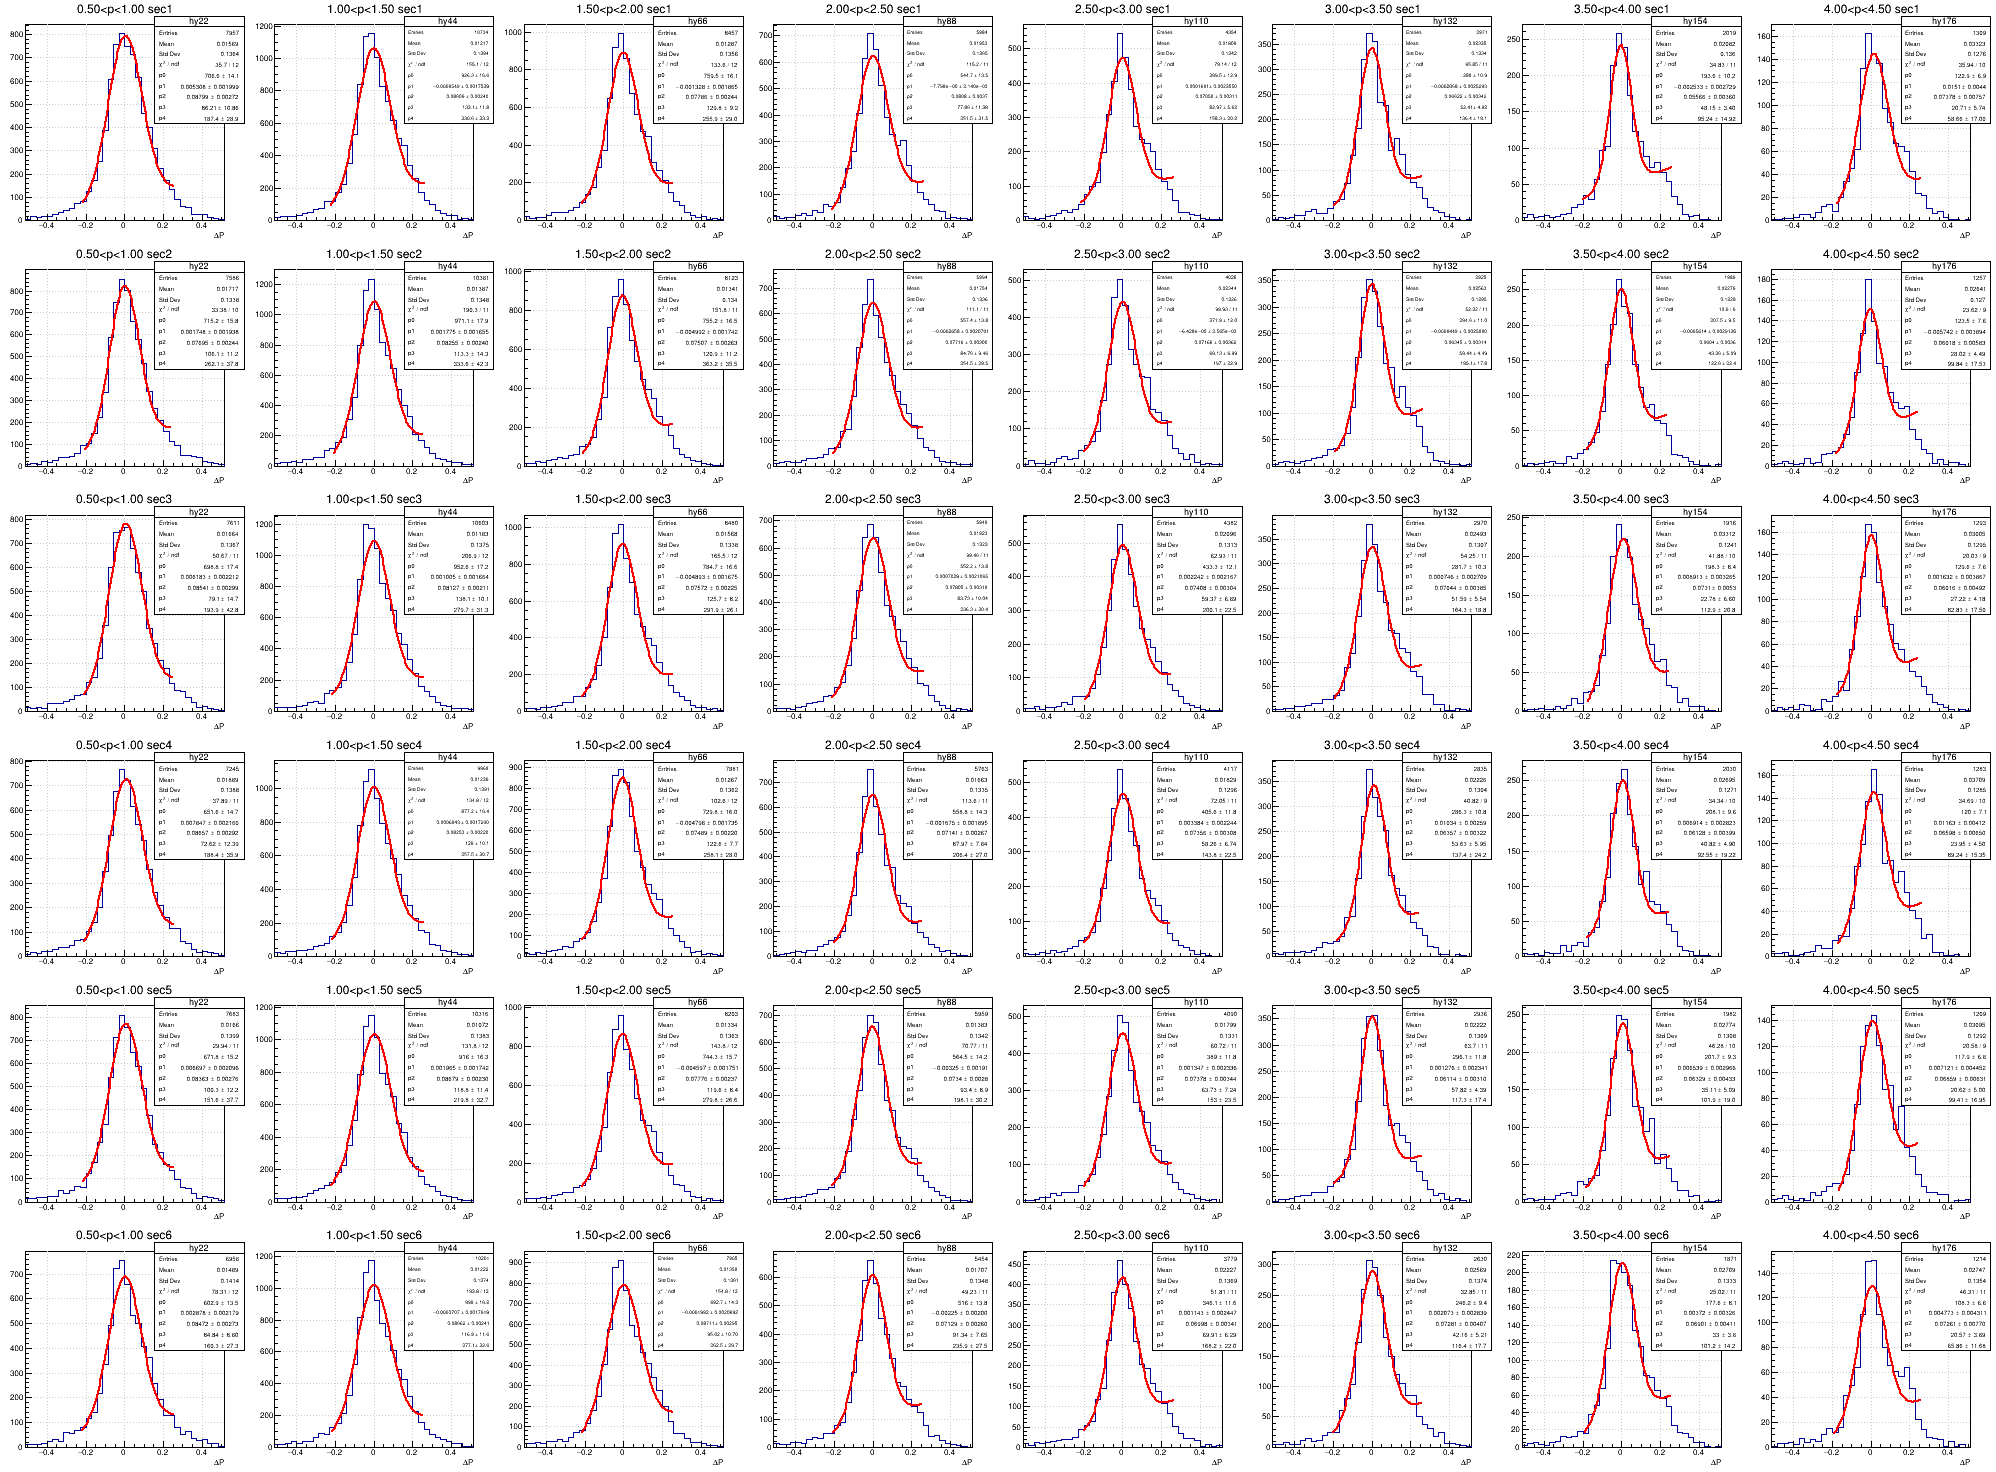

In [16]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(8,6,0.0001,0.0001)
c2.Draw()


for i in range(8):
    c2.cd(i+1)
    #dpp11.hys[i].Rebin(2)
    dpp12.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp12.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8+1)
    dpp22.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp22.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*2+1)
    dpp32.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp32.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*3+1)
    dpp42.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp42.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*4+1)
    dpp52.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp52.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*5+1)
    dpp62.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp62.hys[i].Draw()   
    
    
c2.Print("pics/Cont_phi/In_Corr_phi2_1d.png")

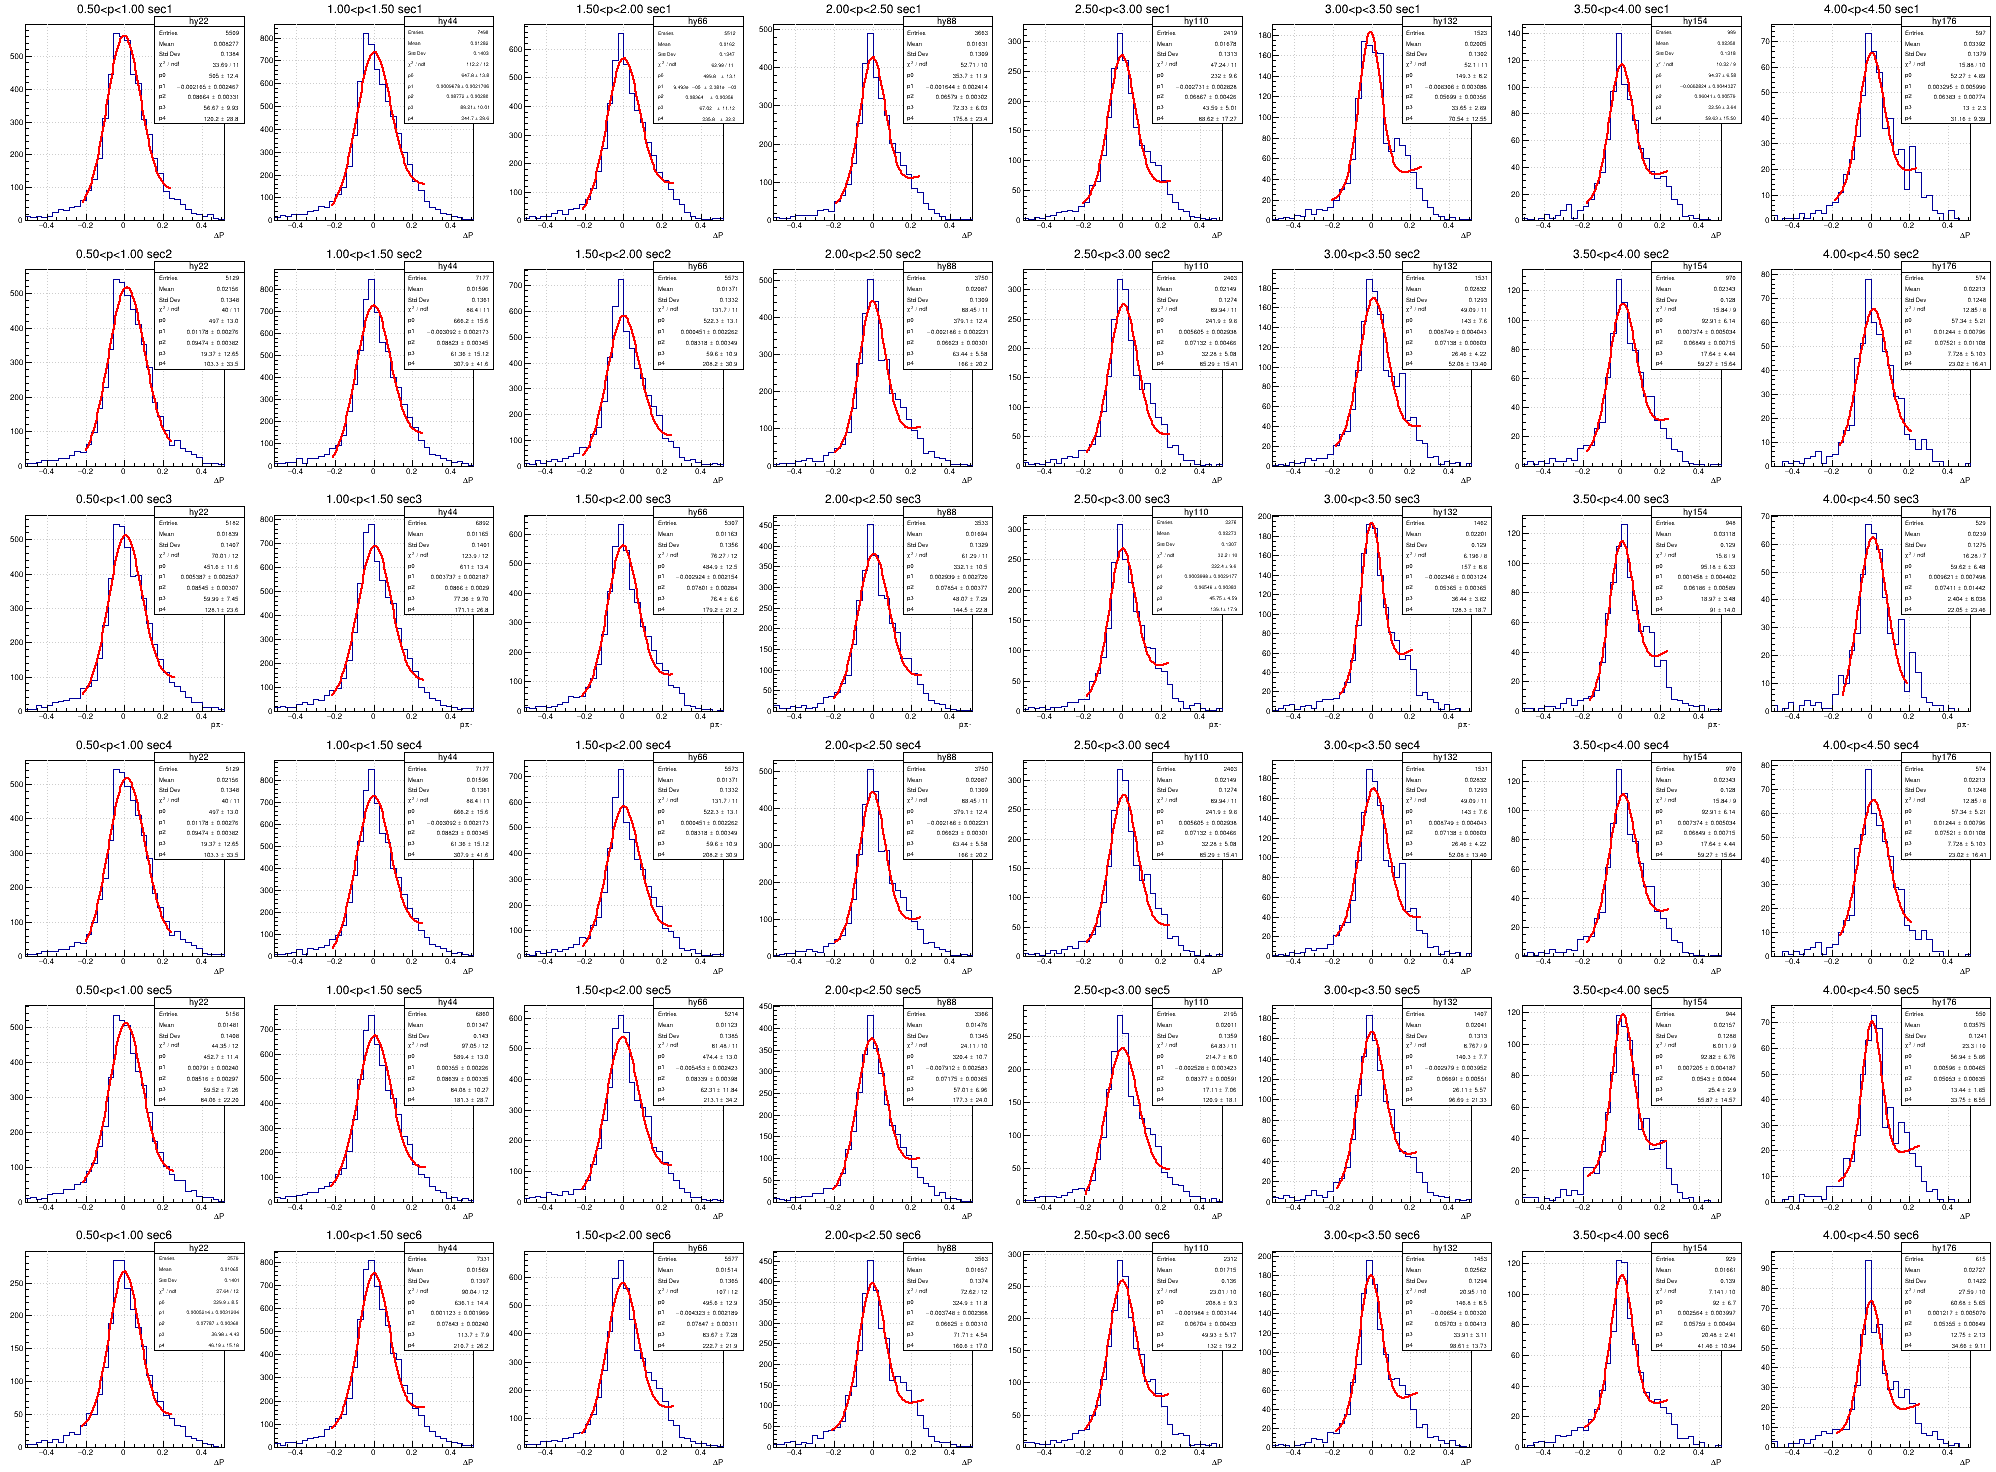

In [17]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(8,6,0.0001,0.0001)
c2.Draw()


for i in range(8):
    c2.cd(i+1)
    #dpp11.hys[i].Rebin(2)
    dpp13.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp13.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8+1)
    dpp23.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp23.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*2+1)
    dpp33.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp33.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*3+1)
    dpp43.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp43.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*4+1)
    dpp53.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp53.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*5+1)
    dpp63.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp63.hys[i].Draw()   
    
    
c2.Print("pics/Cont_phi/In_Corr_phi3_1d.png")

In [ ]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
#ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)

ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
c1.Draw()
c1.cd(1)
dpp11.Draw("colz")
dpp11.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp11.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp11.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)





c1.cd(2)
dpp21.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp21.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp21.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp21.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp31.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp31.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp31.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp31.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(4)
dpp41.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp41.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp41.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp41.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp51.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp51.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp51.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp51.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(6)
dpp61.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp61.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp61.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp61.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)





c1.Print("pics/Cont_phi/phi_dp2d_1.png")

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


python ERROR: cannot open image file "pics/Cont_phi/phi_dp2d_2.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file pics/Cont_phi/phi_dp2d_2.png


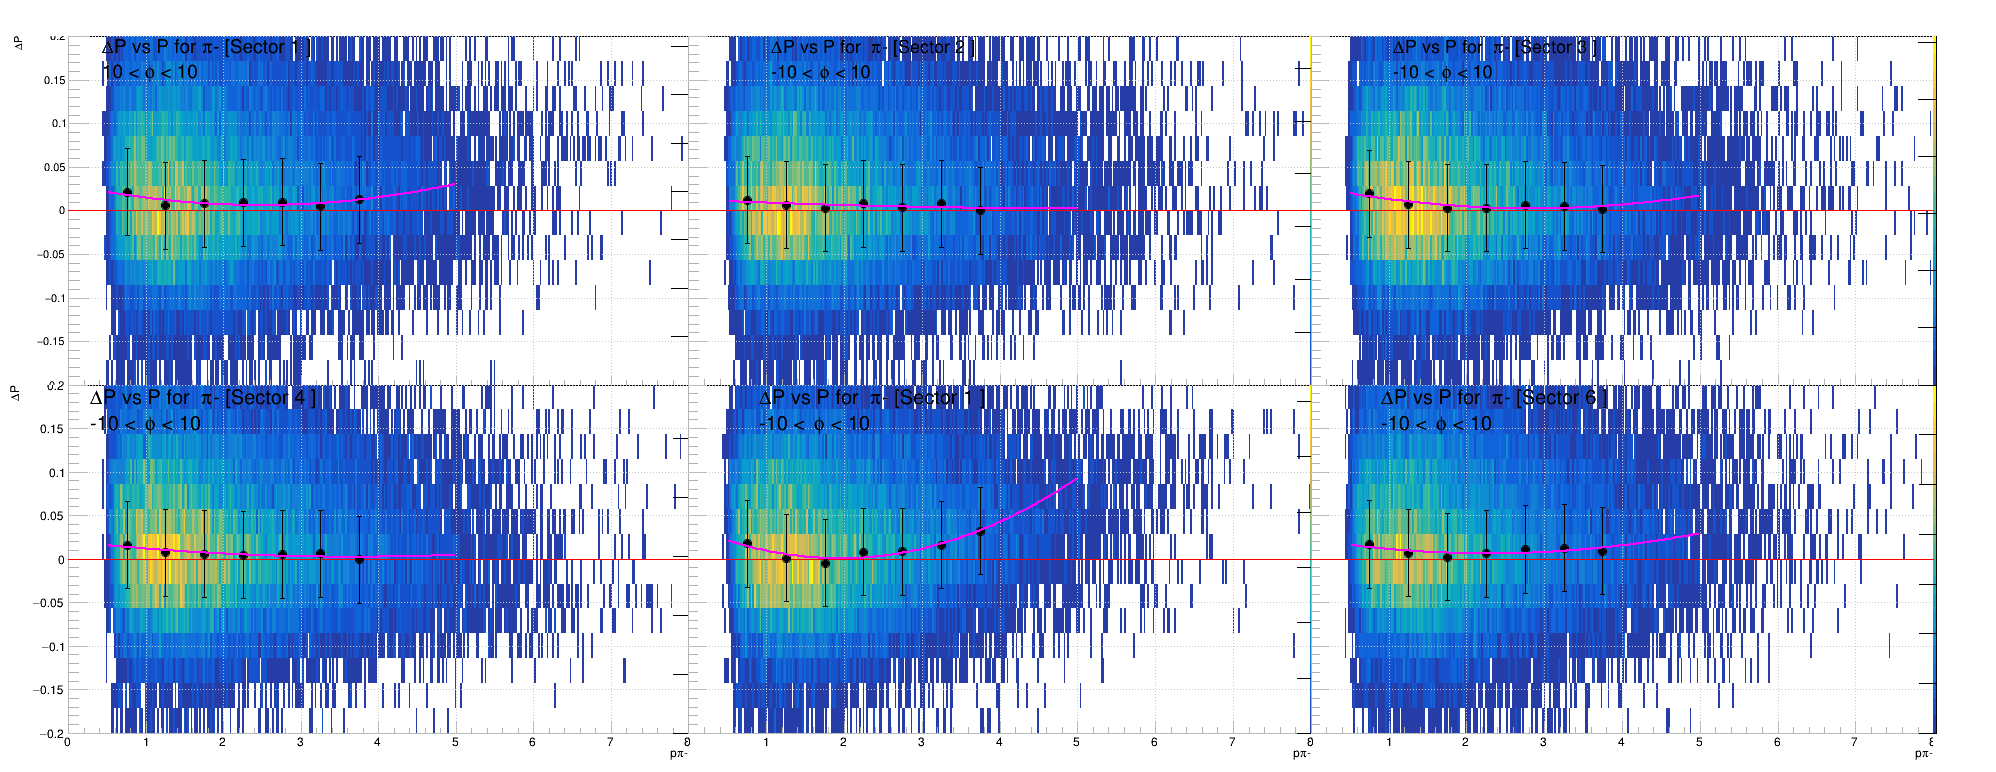

In [13]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)
c1.Draw()
c1.cd(1)
dpp12.Draw("colz")
dpp12.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp12.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp12.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)




c1.cd(2)
dpp22.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp22.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp22.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp22.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp32.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp32.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp32.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp32.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)

c1.cd(4)
dpp42.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp42.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp42.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp42.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp52.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp52.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp52.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp52.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)

c1.cd(6)
dpp62.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp62.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp62.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp62.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.Print("pics/Cont_phi/phi_dp2d_2.png")


0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


python ERROR: cannot open image file "pics/Cont_phi/phi_dp2d_3.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file pics/Cont_phi/phi_dp2d_3.png


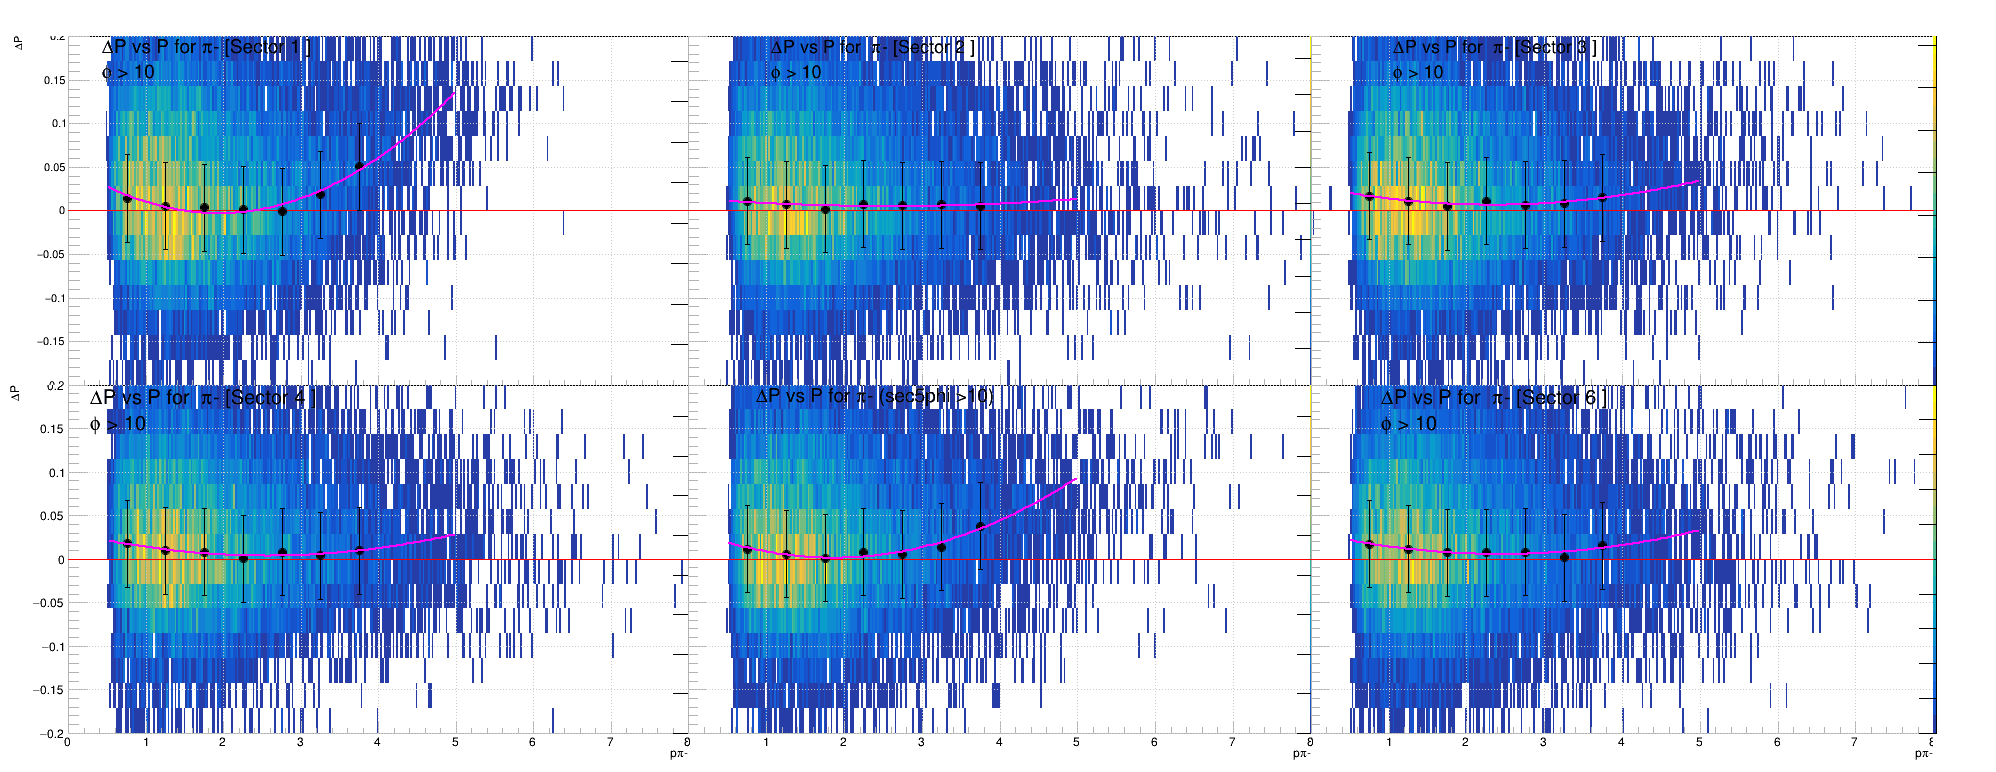

In [14]:
    line =  ROOT.TLine(0, 0, 8, 0)
    c1 = ROOT.TCanvas("c1","c1",2000,800)
    c1.Divide(3,2,0,0)
    c1.SetGrid()
    ROOT.gStyle.SetAxisColor(16, 'xy')
    ROOT.gStyle.SetOptFit(0)
    ROOT.gStyle.SetTitleY(1)
    ROOT.gStyle.SetTitleX(0.3)
    ROOT.gStyle.SetStatX(0.3)
    ROOT.gStyle.SetStatY(0.35)
    c1.Draw()
    c1.cd(1)
    dpp13.Draw("colz")
    dpp13.GetYaxis().SetRangeUser(-0.2,0.2)
    #dpp11.GetXaxis().SetRangeUser(0,7)

    line.SetLineColor(2)
    line.Draw("")

    dpp13.gr.Draw("P")

    for i in range(0,3):
        try:
            palette_histo = dpp13.GetListOfFunctions().FindObject("palette")
            x_left = 0
            x_right = 0
            y_up = 0
            y_down = 0
            palette_histo.SetX1NDC(0.905 + x_left)
            palette_histo.SetX2NDC(0.925 + x_right)
            palette_histo.SetY1NDC(0.1 + y_down)
            palette_histo.SetY2NDC(0.9 + y_up)
        except:
            print(i)




    c1.cd(2)
    dpp23.GetYaxis().SetRangeUser(-0.2,0.2)
    #dpp21.GetXaxis().SetRangeUser(0,7)
    dpp23.Draw("colz")
    line.SetLineColor(2)
    line.Draw("")
    dpp23.gr.Draw("P")
    for i in range(0,3):
        try:
            palette_histo = dpp23.GetListOfFunctions().FindObject("palette")
            x_left = 0
            x_right = 0
            y_up = 0
            y_down = 0
            palette_histo.SetX1NDC(0.905 + x_left)
            palette_histo.SetX2NDC(0.925 + x_right)
            palette_histo.SetY1NDC(0.1 + y_down)
            palette_histo.SetY2NDC(0.9 + y_up)
        except:
            print(i)



    c1.cd(3)
    dpp33.GetYaxis().SetRangeUser(-0.2,0.2)
    #dpp31.GetXaxis().SetRangeUser(0,7)
    dpp33.Draw("colz")
    line.SetLineColor(2)
    line.Draw("")
    dpp33.gr.Draw("P")
    for i in range(0,3):
        try:
            palette_histo = dpp33.GetListOfFunctions().FindObject("palette")
            x_left = 0
            x_right = 0
            y_up = 0
            y_down = 0
            palette_histo.SetX1NDC(0.905 + x_left)
            palette_histo.SetX2NDC(0.925 + x_right)
            palette_histo.SetY1NDC(0.1 + y_down)
            palette_histo.SetY2NDC(0.9 + y_up)
        except:
            print(i)


    c1.cd(4)
    dpp43.GetYaxis().SetRangeUser(-0.2,0.2)
    #dpp41.GetXaxis().SetRangeUser(0,7)
    dpp43.Draw("colz")
    line.SetLineColor(2)
    line.Draw("")
    dpp43.gr.Draw("P")
    for i in range(0,3):
        try:
            palette_histo = dpp43.GetListOfFunctions().FindObject("palette")
            x_left = 0
            x_right = 0
            y_up = 0
            y_down = 0
            palette_histo.SetX1NDC(0.905 + x_left)
            palette_histo.SetX2NDC(0.925 + x_right)
            palette_histo.SetY1NDC(0.1 + y_down)
            palette_histo.SetY2NDC(0.9 + y_up)
        except:
            print(i)


    c1.cd(5)
    dpp53.GetYaxis().SetRangeUser(-0.2,0.2)
    #dpp51.GetXaxis().SetRangeUser(0,7)
    dpp53.Draw("colz")
    line.SetLineColor(2)
    line.Draw("")
    dpp53.gr.Draw("P")
    for i in range(0,3):
        try:
            palette_histo = dpp53.GetListOfFunctions().FindObject("palette")
            x_left = 0
            x_right = 0
            y_up = 0
            y_down = 0
            palette_histo.SetX1NDC(0.905 + x_left)
            palette_histo.SetX2NDC(0.925 + x_right)
            palette_histo.SetY1NDC(0.1 + y_down)
            palette_histo.SetY2NDC(0.9 + y_up)
        except:
            print(i)


    c1.cd(6)
    dpp63.GetYaxis().SetRangeUser(-0.2,0.2)
    #dpp61.GetXaxis().SetRangeUser(0,7)
    dpp63.Draw("colz")
    line.SetLineColor(2)
    line.Draw("")
    dpp63.gr.Draw("P")
    for i in range(0,3):
        try:
            palette_histo = dpp63.GetListOfFunctions().FindObject("palette")
            x_left = 0
            x_right = 0
            y_up = 0
            y_down = 0
            palette_histo.SetX1NDC(0.905 + x_left)
            palette_histo.SetX2NDC(0.925 + x_right)
            palette_histo.SetY1NDC(0.1 + y_down)
            palette_histo.SetY2NDC(0.9 + y_up)
        except:
            print(i)


    c1.Print("pics/Cont_phi/phi_dp2d_3.png")

